In [ ]:
# !pip install git+https://github.com/alberanid/imdbpy
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas_profiling --upgrade
# !pip install plotly
# ! pip install wordcloud

In [ ]:
# Import Dataset
# Import File from Loacal Drive
# from google.colab import files
# data_to_load = files.upload()
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import collections
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
from wordcloud import WordCloud, STOPWORDS
from pandas_profiling import ProfileReport
%matplotlib inline
warnings.filterwarnings("ignore")

In [ ]:
# path = '/content/drive/MyDrive/Files/'

path = 'C:\\Users\\pawan\\OneDrive\\Desktop\\ott\\Data\\'
 
df_movies = pd.read_csv(path + 'ottmovies.csv')
 
df_movies.head()

ID                           Title  Year  Age  IMDb Rotten Tomatoes  \
0   1                       Inception  2010  13+   8.8             87%   
1   2                      The Matrix  1999  16+   8.7             88%   
2   3          Avengers: Infinity War  2018  13+   8.4             85%   
3   4              Back to the Future  1985   7+   8.5             96%   
4   5  The Good, the Bad and the Ugly  1966  16+   8.8             97%   

                        Directors  \
0               Christopher Nolan   
1  Lana Wachowski,Lilly Wachowski   
2         Anthony Russo,Joe Russo   
3                 Robert Zemeckis   
4                    Sergio Leone   

                                                Cast  \
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
1  Keanu Reeves,Laurence Fishburne,Carrie-Anne Mo...   
2  Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...   
3  Michael J. Fox,Christopher Lloyd,Lea Thompson,...   
4  Eli Wallach,Clint Eastwood,Lee Van Cleef,Aldo ...   

                             Genres                                 Country  \
0  Action,Adventure,Sci-Fi,Thriller            United States,United Kingdom   
1                     Action,Sci-Fi                           United States   
2           Action,Adventure,Sci-Fi                           United States   
3           Adventure,Comedy,Sci-Fi                           United States   
4                           Western  Italy,Spain,West Germany,United States   

                  Language                                           Plotline  \
0  English,Japanese,French  Dom Cobb is a skilled thief, the absolute best...   
1                  English  Thomas A. Anderson is a man living two lives. ...   
2                  English  As the Avengers and their allies have continue...   
3                  English  Marty McFly, a typical American teenager of th...   
4                  Italian  Blondie (The Good) (Clint Eastwood) is a profe...   

   Runtime   Kind  Seasons  Netflix  Hulu  Prime Video  Disney+  Type  
0    148.0  movie      NaN        1     0            0        0     0  
1    136.0  movie      NaN        1     0            0        0     0  
2    149.0  movie      NaN        1     0            0        0     0  
3    116.0  movie      NaN        1     0            0        0     0  
4    161.0  movie      NaN        1     0            1        0     0

In [ ]:
# profile = ProfileReport(df_movies)
# profile

In [ ]:
def data_investigate(df):
    print('No of Rows : ', df.shape[0])
    print('No of Coloums : ', df.shape[1])
    print('**'*25)
    print('Colums Names : \n', df.columns)
    print('**'*25)
    print('Datatype of Columns : \n', df.dtypes)
    print('**'*25)
    print('Missing Values : ')
    c = df.isnull().sum()
    c = c[c > 0]
    print(c)
    print('**'*25)
    print('Missing vaules %age wise :\n')
    print((100*(df.isnull().sum()/len(df.index))))
    print('**'*25)
    print('Pictorial Representation : ')
    plt.figure(figsize = (5, 5))
    sns.heatmap(df.isnull(), yticklabels = False, cbar = False)
    plt.show()

No of Rows :  16923
No of Coloums :  20
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Cast', 'Genres', 'Country', 'Language', 'Plotline', 'Runtime', 'Kind',
       'Seasons', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Directors           object
Cast                object
Genres              object
Country             object
Language            object
Plotline            object
Runtime            float64
Kind                object
Seasons            float64
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
dtype: object
*************

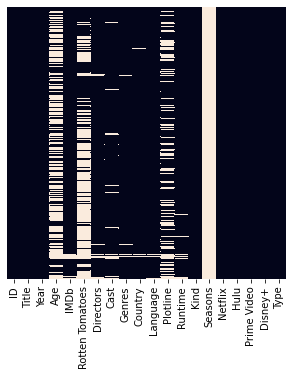

In [ ]:
data_investigate(df_movies)

In [ ]:
# ID
# df_movies = df_movies.drop(['ID'], axis = 1)
 
# Age
df_movies.loc[df_movies['Age'].isnull() & df_movies['Disney+'] == 1, "Age"] = '13'
# df_movies.fillna({'Age' : 18}, inplace = True)
df_movies.fillna({'Age' : 'NR'}, inplace = True)
df_movies['Age'].replace({'all': '0'}, inplace = True)
df_movies['Age'].replace({'7+': '7'}, inplace = True)
df_movies['Age'].replace({'13+': '13'}, inplace = True)
df_movies['Age'].replace({'16+': '16'}, inplace = True)
df_movies['Age'].replace({'18+': '18'}, inplace = True)
# df_movies['Age'] = df_movies['Age'].astype(int)
 
# IMDb
# df_movies.fillna({'IMDb' : df_movies['IMDb'].mean()}, inplace = True)
# df_movies.fillna({'IMDb' : df_movies['IMDb'].median()}, inplace = True)
df_movies.fillna({'IMDb' : "NA"}, inplace = True)
 
# Rotten Tomatoes
df_movies['Rotten Tomatoes'] = df_movies['Rotten Tomatoes'][df_movies['Rotten Tomatoes'].notnull()].str.replace('%', '').astype(int)
# df_movies['Rotten Tomatoes'] = df_movies['Rotten Tomatoes'][df_movies['Rotten Tomatoes'].notnull()].astype(int)
# df_movies.fillna({'Rotten Tomatoes' : df_movies['Rotten Tomatoes'].mean()}, inplace = True)
# df_movies.fillna({'Rotten Tomatoes' : df_movies['Rotten Tomatoes'].median()}, inplace = True)
# df_movies['Rotten Tomatoes'] = df_movies['Rotten Tomatoes'].astype(int)
df_movies.fillna({'Rotten Tomatoes' : "NA"}, inplace = True)
 
# Directors
# df_movies = df_movies.drop(['Directors'], axis = 1)
df_movies.fillna({'Directors' : "NA"}, inplace = True)
 
# Cast
df_movies.fillna({'Cast' : "NA"}, inplace = True)
 
# Genres
df_movies.fillna({'Genres': "NA"}, inplace = True)
 
# Country
df_movies.fillna({'Country': "NA"}, inplace = True)
 
# Language
df_movies.fillna({'Language': "NA"}, inplace = True)
 
# Plotline
df_movies.fillna({'Plotline': "NA"}, inplace = True)
 
# Runtime
# df_movies.fillna({'Runtime' : df_movies['Runtime'].mean()}, inplace = True)
# df_movies['Runtime'] = df_movies['Runtime'].astype(int)
df_movies.fillna({'Runtime' : "NA"}, inplace = True)
 
# Kind
# df_movies.fillna({'Kind': "NA"}, inplace = True)
 
# Type
# df_movies.fillna({'Type': "NA"}, inplace = True)
# df_movies = df_movies.drop(['Type'], axis = 1)
 
# Seasons
# df_movies.fillna({'Seasons': 1}, inplace = True)
# df_movies.fillna({'Seasons': "NA"}, inplace = True)
df_movies = df_movies.drop(['Seasons'], axis = 1)
# df_movies['Seasons'] = df_movies['Seasons'].astype(int)
# df_movies.fillna({'Seasons' : df_movies['Seasons'].mean()}, inplace = True)
# df_movies['Seasons'] = df_movies['Seasons'].astype(int)
 
# Service Provider
df_movies['Service Provider'] = df_movies.loc[:, ['Netflix', 'Prime Video', 'Disney+', 'Hulu']].idxmax(axis = 1)
# df_movies.drop(['Netflix','Prime Video','Disney+','Hulu'], axis = 1)

# Removing Duplicate and Missing Entries
df_movies.dropna(how = 'any', inplace = True)
df_movies.drop_duplicates(inplace = True)

No of Rows :  16923
No of Coloums :  20
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Cast', 'Genres', 'Country', 'Language', 'Plotline', 'Runtime', 'Kind',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type',
       'Service Provider'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb                object
Rotten Tomatoes     object
Directors           object
Cast                object
Genres              object
Country             object
Language            object
Plotline            object
Runtime             object
Kind                object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Service Provider    object
dtype: obje

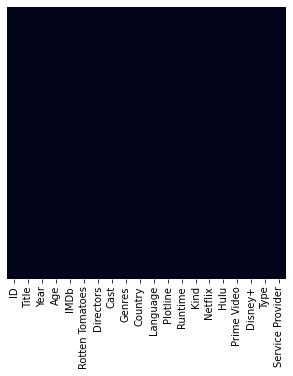

In [ ]:
data_investigate(df_movies)

In [ ]:
df_movies.head()

ID                           Title  Year Age IMDb Rotten Tomatoes  \
0   1                       Inception  2010  13  8.8              87   
1   2                      The Matrix  1999  16  8.7              88   
2   3          Avengers: Infinity War  2018  13  8.4              85   
3   4              Back to the Future  1985   7  8.5              96   
4   5  The Good, the Bad and the Ugly  1966  16  8.8              97   

                        Directors  \
0               Christopher Nolan   
1  Lana Wachowski,Lilly Wachowski   
2         Anthony Russo,Joe Russo   
3                 Robert Zemeckis   
4                    Sergio Leone   

                                                Cast  \
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
1  Keanu Reeves,Laurence Fishburne,Carrie-Anne Mo...   
2  Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...   
3  Michael J. Fox,Christopher Lloyd,Lea Thompson,...   
4  Eli Wallach,Clint Eastwood,Lee Van Cleef,Aldo ...   

                             Genres                                 Country  \
0  Action,Adventure,Sci-Fi,Thriller            United States,United Kingdom   
1                     Action,Sci-Fi                           United States   
2           Action,Adventure,Sci-Fi                           United States   
3           Adventure,Comedy,Sci-Fi                           United States   
4                           Western  Italy,Spain,West Germany,United States   

                  Language                                           Plotline  \
0  English,Japanese,French  Dom Cobb is a skilled thief, the absolute best...   
1                  English  Thomas A. Anderson is a man living two lives. ...   
2                  English  As the Avengers and their allies have continue...   
3                  English  Marty McFly, a typical American teenager of th...   
4                  Italian  Blondie (The Good) (Clint Eastwood) is a profe...   

  Runtime   Kind  Netflix  Hulu  Prime Video  Disney+  Type Service Provider  
0     148  movie        1     0            0        0     0          Netflix  
1     136  movie        1     0            0        0     0          Netflix  
2     149  movie        1     0            0        0     0          Netflix  
3     116  movie        1     0            0        0     0          Netflix  
4     161  movie        1     0            1        0     0          Netflix

In [ ]:
df_movies.describe()

ID          Year       Netflix          Hulu   Prime Video  \
count  16923.000000  16923.000000  16923.000000  16923.000000  16923.000000   
mean    8462.000000   2003.211901      0.214915      0.062637      0.727235   
std     4885.393638     20.526532      0.410775      0.242315      0.445394   
min        1.000000   1901.000000      0.000000      0.000000      0.000000   
25%     4231.500000   2001.000000      0.000000      0.000000      0.000000   
50%     8462.000000   2012.000000      0.000000      0.000000      1.000000   
75%    12692.500000   2016.000000      0.000000      0.000000      1.000000   
max    16923.000000   2020.000000      1.000000      1.000000      1.000000   

            Disney+     Type  
count  16923.000000  16923.0  
mean       0.033150      0.0  
std        0.179034      0.0  
min        0.000000      0.0  
25%        0.000000      0.0  
50%        0.000000      0.0  
75%        0.000000      0.0  
max        1.000000      0.0

In [ ]:
df_movies.corr()

ID      Year   Netflix      Hulu  Prime Video   Disney+  \
ID           1.000000 -0.217816 -0.644470 -0.129926     0.469301  0.263530   
Year        -0.217816  1.000000  0.256151  0.101337    -0.255578 -0.047258   
Netflix     -0.644470  0.256151  1.000000 -0.118032    -0.745141 -0.089649   
Hulu        -0.129926  0.101337 -0.118032  1.000000    -0.284654 -0.039693   
Prime Video  0.469301 -0.255578 -0.745141 -0.284654     1.000000 -0.289008   
Disney+      0.263530 -0.047258 -0.089649 -0.039693    -0.289008  1.000000   
Type              NaN       NaN       NaN       NaN          NaN       NaN   

             Type  
ID            NaN  
Year          NaN  
Netflix       NaN  
Hulu          NaN  
Prime Video   NaN  
Disney+       NaN  
Type          NaN

In [ ]:
# df_movies.sort_values('Year', ascending = True)
# df_movies.sort_values('IMDb', ascending = False)

In [ ]:
# df_movies.to_csv(path_or_buf= '/content/drive/MyDrive/Files/updated_ottmovies.csv', index = False)
 
# path = '/content/drive/MyDrive/Files/'
 
# udf_movies = pd.read_csv(path + 'updated_ottmovies.csv')
 
# udf_movies

In [ ]:
# df_netflix_movies = df_movies.loc[(df_movies['Netflix'] > 0)]
# df_hulu_movies = df_movies.loc[(df_movies['Hulu'] > 0)]
# df_prime_video_movies = df_movies.loc[(df_movies['Prime Video'] > 0)]
# df_disney_movies = df_movies.loc[(df_movies['Disney+'] > 0)]

In [ ]:
df_netflix_only_movies = df_movies[(df_movies['Netflix'] == 1) & (df_movies['Hulu'] == 0) & (df_movies['Prime Video'] == 0 ) & (df_movies['Disney+'] == 0)]
df_hulu_only_movies = df_movies[(df_movies['Netflix'] == 0) & (df_movies['Hulu'] == 1) & (df_movies['Prime Video'] == 0 ) & (df_movies['Disney+'] == 0)]
df_prime_video_only_movies = df_movies[(df_movies['Netflix'] == 0) & (df_movies['Hulu'] == 0) & (df_movies['Prime Video'] == 1 ) & (df_movies['Disney+'] == 0)]
df_disney_only_movies = df_movies[(df_movies['Netflix'] == 0) & (df_movies['Hulu'] == 0) & (df_movies['Prime Video'] == 0 ) & (df_movies['Disney+'] == 1)]

In [ ]:
df_movies_ott = df_movies.copy()

In [ ]:
# Platforms
netflix_movies_ott_count = len(df_movies_ott.loc[(df_movies_ott['Netflix'] > 0)])
hulu_movies_ott_count = len(df_movies_ott.loc[(df_movies_ott['Hulu'] > 0)])
prime_video_movies_ott_count = len(df_movies_ott.loc[(df_movies_ott['Prime Video'] > 0)])
disney_movies_ott_count = len(df_movies_ott.loc[(df_movies_ott['Disney+'] > 0)])
 
Platform = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
Count = [netflix_movies_ott_count, hulu_movies_ott_count, prime_video_movies_ott_count, disney_movies_ott_count]
 
fig = px.pie(names = Platform, values = Count, title = 'Movies Count Of Different Platforms', color_discrete_sequence = px.colors.sequential.Teal)
fig.update_traces(textposition = 'inside', textinfo = 'percent + label') 
fig.show()

In [ ]:
print(f'''
      Total '{df_movies_ott['Title'].count()}' Titles are available on All Platforms, out of Which,\n
      Total '{df_movies_ott['Netflix'].sum()}' Titles are available on 'Netflix'
      Total '{df_movies_ott['Hulu'].sum()}' Titles are available on 'Hulu'
      Total '{df_movies_ott['Prime Video'].sum()}' Titles are available on 'Prime video'
      Total '{df_movies_ott['Disney+'].sum()}' Titles are available on 'Disney+'
      ''')


      Total '16923' Titles are available on All Platforms, out of Which,

      Total '3637' Titles are available on 'Netflix'
      Total '1060' Titles are available on 'Hulu'
      Total '12307' Titles are available on 'Prime video'
      Total '561' Titles are available on 'Disney+'
      


In [ ]:
df_movies_ott['OTT_Count'] = df_movies_ott['Netflix'] + df_movies_ott['Hulu'] + df_movies_ott['Prime Video'] + df_movies_ott['Disney+']
 
(df_movies_ott['OTT_Count'].value_counts()/df_movies_ott.shape[0])*100

1    96.259528
2     3.687289
3     0.053182
Name: OTT_Count, dtype: float64

In [ ]:
print(f'''
      Total '{df_movies_ott[df_movies_ott['OTT_Count'] == 4].shape[0]}' Titles are available on All Platforms
      Total '{df_movies_ott[df_movies_ott['OTT_Count'] == 3].shape[0]}' Titles are available on at least 3 Platforms
      Total '{df_movies_ott[df_movies_ott['OTT_Count'] == 2].shape[0]}' Titles are available on at least 2 Platforms
      Total '{df_movies_ott[df_movies_ott['OTT_Count'] == 1].shape[0]}' Titles are available on at least 1 Platforms
      ''')


      Total '0' Titles are available on All Platforms
      Total '9' Titles are available on at least 3 Platforms
      Total '624' Titles are available on at least 2 Platforms
      Total '16290' Titles are available on at least 1 Platforms
      


In [ ]:
# Movies Available on All Platforms

# df_movies_ott[(df_movies_ott['Netflix'] == 1) & (df_movies_ott['Hulu'] == 1) & (df_movies_ott['Prime Video'] == 1) & (df_movies_ott['Disney+'] == 1)]
print('\nTotal ', df_movies_ott[df_movies_ott['OTT_Count'] == 4].shape[0], ' Titles are available on All Platforms\n')
movies_on_4_platforms = df_movies_ott[df_movies_ott['OTT_Count'] == 4]
movies_on_4_platforms


Total  0  Titles are available on All Platforms



Empty DataFrame
Columns: [ID, Title, Year, Age, IMDb, Rotten Tomatoes, Directors, Cast, Genres, Country, Language, Plotline, Runtime, Kind, Netflix, Hulu, Prime Video, Disney+, Type, Service Provider, OTT_Count]
Index: []

[0 rows x 21 columns]

In [ ]:
# Movies Available on at least 3 Platforms

print('\nTotal ', df_movies_ott[df_movies_ott['OTT_Count'] == 3].shape[0], ' Titles are available on at least 3 Platforms\n')
movies_on_3_platforms = df_movies_ott[df_movies_ott['OTT_Count'] == 3]
movies_on_3_platforms


Total  9  Titles are available on at least 3 Platforms



ID                  Title  Year Age IMDb Rotten Tomatoes  \
144      145             The Square  2013  16  7.2              20   
334      335          The Interview  2014  16  6.5              63   
489      490                 Blame!  2017  13  6.7              93   
601      602              Evolution  2001  13  6.1              17   
1113    1114  No Game No Life: Zero  2017  13  7.5              NA   
1982    1983                 Mother  2016  16  6.6             100   
3851    3852                The Kid  2019  16  5.9              87   
4192    4193             Inside Out  2011   7  8.1              98   
16246  16247        Rurouni Kenshin  1996  18  7.5              NA   

                           Directors  \
144                    Ruben Östlund   
334         Evan Goldberg,Seth Rogen   
489                 Hiroyuki Seshita   
601                     Ivan Reitman   
1113                 Atsuko Ishizuka   
1982                Darren Aronofsky   
3851               Vincent D'Onofrio   
4192   Pete Docter,Ronnie Del Carmen   
16246                  Keishi Ohtomo   

                                                    Cast  \
144    Claes Bang,Elisabeth Moss,Dominic West,Terry N...   
334    James Franco,Seth Rogen,Lizzy Caplan,Randall P...   
489    Takahiro Sakurai,Kana Hanazawa,Sora Amamiya,Ma...   
601    David Duchovny,Julianne Moore,Orlando Jones,Se...   
1113   Alexandra Bedford,Jessica Boone,Ricardo Contre...   
1982   Jennifer Lawrence,Javier Bardem,Ed Harris,Mich...   
3851   Jake Schur,Leila George,Chris Pratt,Dane DeHaa...   
4192   Amy Poehler,Phyllis Smith,Richard Kind,Bill Ha...   
16246  Takeru Satoh,Emi Takei,Yû Aoi,Munetaka Aoki,Gô...   

                                                 Genres  \
144                                        Comedy,Drama   
334                             Action,Adventure,Comedy   
489              Animation,Action,Drama,Sci-Fi,Thriller   
601                                       Comedy,Sci-Fi   
1113   Animation,Adventure,Comedy,Drama,Fantasy,Romance   
1982                               Drama,Horror,Mystery   
3851                            Biography,Drama,Western   
4192    Animation,Adventure,Comedy,Drama,Family,Fantasy   
16246                    Action,Adventure,Drama,History   

                                           Country  ...  \
144    Sweden,Germany,France,Denmark,United States  ...   
334                                  United States  ...   
489                                          Japan  ...   
601                                  United States  ...   
1113                                         Japan  ...   
1982                                 United States  ...   
3851                                 United States  ...   
4192                                 United States  ...   
16246                                        Japan  ...   

                                                Plotline Runtime   Kind  \
144    Christian is the respected curator of a contem...     151  movie   
334    In the action-comedy The Interview, Dave Skyla...     112  movie   
489    In the distant technological future, civilizat...     106  movie   
601    When a meteorite falls to Earth two college pr...     101  movie   
1113   The Movie following the light novel series by ...     110  movie   
1982   Amidst a wild flat meadow encircled by an Eden...     121  movie   
3851   New Mexico Territory, 1880. Rio Cutler and his...     100  movie   
4192   Growing up can be a bumpy road, and it's no ex...      95  movie   
16246                                                 NA     134  movie   

      Netflix  Hulu  Prime Video  Disney+  Type  Service Provider OTT_Count  
144         1     1            1        0     0           Netflix         3  
334         1     1            1        0     0           Netflix         3  
489         1     1            1        0     0           Netflix         3  
601         1     1            1        0     0           Netf

In [ ]:
# Movies Available on at least 2 Platforms
print('\nTotal ', df_movies_ott[df_movies_ott['OTT_Count'] == 2].shape[0], ' Titles are available on at least 2 Platforms\n')
movies_on_2_platforms = df_movies_ott[df_movies_ott['OTT_Count'] == 2]
movies_on_2_platforms


Total  624  Titles are available on at least 2 Platforms



ID                           Title  Year Age IMDb Rotten Tomatoes  \
4          5  The Good, the Bad and the Ugly  1966  16  8.8              97   
6          7                     The Pianist  2002  16  8.5              95   
11        12                        3 Idiots  2009  13  8.4             100   
15        16    Once Upon a Time in the West  1968  13  8.5              95   
31        32                           Drive  2011  16  7.8              38   
...      ...                             ...   ...  ..  ...             ...   
16555  16556            It's Alive with Brad  2018  NR   NA              NA   
16564  16565                #ThatsHarassment  2018  18  6.1              NA   
16567  16568                     Actually Me  2017  16  7.6              NA   
16572  16573                     Hello World  2016  NR  6.8              NA   
16573  16574                You Sang My Song  2017  NR  6.8              NA   

                  Directors  \
4              Sergio Leone   
6            Roman Polanski   
11          Rajkumar Hirani   
15             Sergio Leone   
31     Nicolas Winding Refn   
...                     ...   
16555                    NA   
16564            Sigal Avin   
16567        Richard Curtis   
16572          Tomohiko Itô   
16573           Walter Lang   

                                                    Cast  \
4      Eli Wallach,Clint Eastwood,Lee Van Cleef,Aldo ...   
6      Adrien Brody,Emilia Fox,Michal Zebrowski,Ed St...   
11     Aamir Khan,Madhavan,Sharman Joshi,Kareena Kapo...   
15     Claudia Cardinale,Henry Fonda,Jason Robards,Ch...   
31     Ryan Gosling,Carey Mulligan,Bryan Cranston,Alb...   
...                                                  ...   
16555                                        Shep Gordon   
16564  Emmy Rossum,Harry Lennix,David Schwimmer,Zazie...   
16567  Bill Nighy,Gregor Fisher,Rory MacGregor,Colin ...   
16572  Haruka Fukuhara,Minami Hamabe,Takumi Kitamura,...   
16573  Susan Hayward,Rory Calhoun,David Wayne,Thelma ...   

                                             Genres  \
4                                           Western   
6                         Biography,Drama,Music,War   
11                                     Comedy,Drama   
15                                          Western   
31                                      Crime,Drama   
...                                             ...   
16555                                         Short   
16564                                         Short   
16567                          Comedy,Drama,Romance   
16572  Animation,Comedy,Drama,Family,Romance,Sci-Fi   
16573                       Biography,Drama,Musical   

                                                 Country  ...  \
4                 Italy,Spain,West Germany,United States  ...   
6      United Kingdom,France,Poland,Germany,United St...  ...   
11                                                 India  ...   
15                                   Italy,United States  ...   
31                                         United States  ...   
...                                                  ...  ...   
16555                                      United States  ...   
16564                                      United States  ...   
16567                United Kingdom,United States,France  ...   
16572                                              Japan  ...   
16573                                      United States  ...   

                                                Plotline Runtime   Kind  \
4      Blondie (The Good) (Clint Eastwood) is a profe...     161  movie   
6      In this adaptation of the autobiography "The P...     150  movie   
11     Farhan Qureshi and Raju Rastogi want to re-uni...     170  movie   
15     Jill McBain travels to the wild frontier; Utah...     165  movie   
31     This action drama follows a mysterious man who...     100  movie   
...                                                  ...     ...    ...   


In [ ]:
# Movies Available on at least 1 Platform
print('\nTotal ', df_movies_ott[df_movies_ott['OTT_Count'] == 1].shape[0], ' Titles are available on at least 1 Platforms\n')
movies_on_1_platforms = df_movies_ott[df_movies_ott['OTT_Count'] == 1]
movies_on_1_platforms


Total  16290  Titles are available on at least 1 Platforms



ID                              Title  Year Age IMDb  \
0          1                          Inception  2010  13  8.8   
1          2                         The Matrix  1999  16  8.7   
2          3             Avengers: Infinity War  2018  13  8.4   
3          4                 Back to the Future  1985   7  8.5   
5          6  Spider-Man: Into the Spider-Verse  2018   7  8.4   
...      ...                                ...   ...  ..  ...   
16918  16919                 Pick of the Litter  2019   7  7.5   
16919  16920                          The Lodge  2016  16  6.1   
16920  16921                     Spin and Marty  1955   0  7.6   
16921  16922                      Teacher's Pet  2000   0  7.1   
16922  16923                   Paradise Islands  2017  13   NA   

      Rotten Tomatoes                                    Directors  \
0                  87                            Christopher Nolan   
1                  88               Lana Wachowski,Lilly Wachowski   
2                  85                      Anthony Russo,Joe Russo   
3                  96                              Robert Zemeckis   
5                  97  Bob Persichetti,Peter Ramsey,Rodney Rothman   
...               ...                                          ...   
16918              NA                       Don Hardy,Dana Nachman   
16919              NA                 Severin Fiala,Veronika Franz   
16920              NA                                           NA   
16921              NA                                George Seaton   
16922              NA                                           NA   

                                                    Cast  \
0      Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
1      Keanu Reeves,Laurence Fishburne,Carrie-Anne Mo...   
2      Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...   
3      Michael J. Fox,Christopher Lloyd,Lea Thompson,...   
5      Shameik Moore,Jake Johnson,Hailee Steinfeld,Ma...   
...                                                  ...   
16918  Diane Meer,Terry Blosser,Janet Gearheart,Sharo...   
16919  Riley Keough,Jaeden Martell,Lia McHugh,Richard...   
16920  Tim Considine,David Stollery,Roy Barcroft,Harr...   
16921  Clark Gable,Doris Day,Gig Young,Mamie Van Dore...   
16922                                                 NA   

                                         Genres  \
0              Action,Adventure,Sci-Fi,Thriller   
1                                 Action,Sci-Fi   
2                       Action,Adventure,Sci-Fi   
3                       Adventure,Comedy,Sci-Fi   
5      Animation,Action,Adventure,Family,Sci-Fi   
...                                         ...   
16918                               Documentary   
16919                     Drama,Horror,Thriller   
16920                            Family,Western   
16921                            Comedy,Romance   
16922                                     Drama   

                                   Country  ...  \
0             United States,United Kingdom  ...   
1                            United States  ...   
2                            United States  ...   
3                            United States  ...   
5                            United States  ...   
...                                    ...  ...   
16918                        United States  ...   
16919  United Kingdom,United States,Canada  ...   
16920                        United States  ...   
16921                        United States  ...   
16922                        United States  ...   

                                                Plotline Runtime   Kind  \
0      Dom Cobb is a skilled thief, the absolute best...     148  movie   
1      Thomas A. Anderson is a man living two lives. ...     136  movie   
2      As the Avengers and their allies have continue...     149  movie   
3      Marty McFly, a typical American teenager of th...     116  movie   
5      Phil Lord and Christopher Miller, the creative.

In [ ]:
df_movies_titles = df_movies.copy()

In [ ]:
df_movies_titles.drop(df_movies_titles.loc[df_movies_titles['Title'] == "NA"].index, inplace = True)
# df_movies_titles = df_movies_titles[df_movies_titles.Title != "NA"]
df_movies_titles['Title'] = df_movies_titles['Title']

In [ ]:
# Creating distinct dataframes only with the movies present on individual streaming platforms
netflix_titles_movies = df_movies_titles.loc[df_movies_titles['Netflix'] == 1]
hulu_titles_movies = df_movies_titles.loc[df_movies_titles['Hulu'] == 1]
prime_video_titles_movies = df_movies_titles.loc[df_movies_titles['Prime Video'] == 1]
disney_titles_movies = df_movies_titles.loc[df_movies_titles['Disney+'] == 1]

In [ ]:
df_movies_title = df_movies_titles['Title']
tvshow_titles_w = " ".join(df_movies_title)

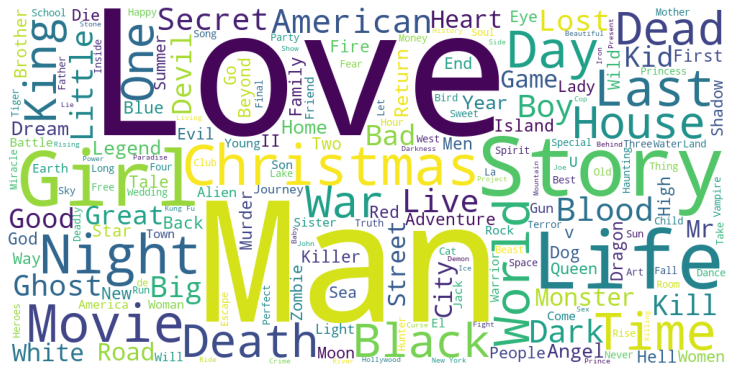

In [ ]:
stopwords = set(STOPWORDS)
 
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(tvshow_titles_w)
  
# plot the WordCloud image                       
plt.figure(figsize = (10, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [ ]:
df_movies_year = df_movies.copy()

In [ ]:
df_movies_year.drop(df_movies_year.loc[df_movies_year['Year'] == "NA"].index, inplace = True)
# df_movies_year = df_movies_year[df_movies_year.Year != "NA"]
df_movies_year['Year'] = df_movies_year['Year'].astype(int)

In [ ]:
df_year_new_movies = df_movies_year.sort_values(by = 'Year', ascending = False).reset_index()
df_year_new_movies = df_year_new_movies.drop(['index'], axis = 1)
# filter = (df_movies_year['Year'] == (df_movies_year['Year'].max()))
# df_year_new_movies = df_movies_year[filter]

# newest_rated_tvshow = df_movies_year.loc[df_movies_year['Year'].idxmax()]

print('\nMovies with Latest Year Ever  are : \n')
df_year_new_movies.head(5)


Movies with Latest Year Ever  are : 



ID                        Title  Year Age IMDb Rotten Tomatoes  \
0   761                 The Occupant  2020  18  6.4              50   
1   706                          Go!  2020  16  7.2              88   
2   682                   Horse Girl  2020  16  5.9              70   
3  2325     The Last Thing He Wanted  2020  16  4.3               5   
4  6544  Shubh Mangal Zyada Saavdhan  2020  NR  5.8              92   

                  Directors  \
0  David Pastor,Àlex Pastor   
1                Doug Liman   
2                Jeff Baena   
3                  Dee Rees   
4            Hitesh Kewalya   

                                                Cast  \
0  Javier Gutiérrez,Mario Casas,Bruna Cusí,Ruth D...   
1  Katie Holmes,Sarah Polley,Suzanne Krull,Desmon...   
2  Alison Brie,Molly Shannon,Goldenite,Stella Che...   
3  Anne Hathaway,Ben Affleck,Rosie Perez,Willem D...   
4  Ayushmann Khurrana,Jitendra Kumar,Gajraj Rao,N...   

                     Genres        Country                Language  \
0  Adventure,Drama,Thriller          Spain                 Spanish   
1              Comedy,Crime  United States                 English   
2    Drama,Mystery,Thriller  United States                 English   
3      Crime,Drama,Thriller  United States  English,Spanish,French   
4            Comedy,Romance          India                   Hindi   

                                            Plotline Runtime   Kind  Netflix  \
0                                                 NA     103  movie        1   
1  Told from three perspectives, a story of a bun...     102  movie        1   
2  Sarah, a socially isolated arts and crafts sto...     103  movie        1   
3                                                 NA     115  movie        1   
4  An eccentric marketing guru visits a Coca-Cola...     117  movie        0   

   Hulu  Prime Video  Disney+  Type Service Provider  
0     0            0        0     0          Netflix  
1     0            0        0     0          Netflix  
2     0            0        0     0          Netflix  
3     0            0        0     0          Netflix  
4     0            1        0     0      Prime Video

In [ ]:
df_year_old_movies = df_movies_year.sort_values(by = 'Year', ascending = True).reset_index()
df_year_old_movies = df_year_old_movies.drop(['index'], axis = 1)
# filter = (df_movies_year['Year'] == (df_movies_year['Year'].min()))
# df_year_old_movies = df_movies_year[filter]

print('\nMovies with Oldest Year Ever  are : \n')
df_year_old_movies.head(5)


Movies with Oldest Year Ever  are : 



ID                         Title  Year Age IMDb Rotten Tomatoes  \
0  16756       Space: The New Frontier  1901  16    7              NA   
1   4343            A Trip to the Moon  1902   0  8.2              44   
2   8557  From the Manger to the Cross  1912   7  5.7              NA   
3   9636         Fatty Joins the Force  1913  NR  5.3              NA   
4   9884               The Speed Kings  1913  NR    5              NA   

        Directors                                               Cast  \
0    Dave Bullock  David Boreanaz,Miguel Ferrer,Neil Patrick Harr...   
1  Georges Méliès  Victor André,Bleuette Bernon,Brunnet,Jehanne d...   
2   Sidney Olcott  R. Henderson Bland,Percy Dyer,Gene Gauntier,Al...   
3  George Nichols  Roscoe 'Fatty' Arbuckle,Charles Avery,Lou Bres...   
4   Wilfred Lucas  Ford Sterling,Mabel Normand,Teddy Tetzlaff,Ear...   

                                      Genres        Country      Language  \
0  Animation,Action,Adventure,Fantasy,Sci-Fi  United States       English   
1      Short,Adventure,Comedy,Fantasy,Sci-Fi         France   None,French   
2                            Biography,Drama  United States  None,English   
3                               Comedy,Short  United States  None,English   
4                        Short,Action,Comedy  United States  None,English   

                                            Plotline Runtime   Kind  Netflix  \
0  The American Muscle Car series relives that in...      75  movie        0   
1  An association of astronomers has convened to ...      13  movie        0   
2                                                 NA      60  movie        0   
3  7 years after the original Fortress movie, Bre...      12  movie        0   
4  In Fort Hernandez, San Antonio, a group of Mex...       8  movie        0   

   Hulu  Prime Video  Disney+  Type Service Provider  
0     0            1        0     0      Prime Video  
1     0            1        0     0      Prime Video  
2     0            1        0     0      Prime Video  
3     0            1        0     0      Prime Video  
4     0            1        0     0      Prime Video

In [ ]:
print(f'''
      Total '{df_movies_year['Year'].unique().shape[0]}' unique Year s were Given, They were Like this,\n
      
{df_movies_year.sort_values(by = 'Year', ascending = False)['Year'].unique()}\n

      The Latest Year TV Show Ever is '{df_year_new_movies['Title'][0]}' : '{df_year_new_movies['Year'].max()}'\n

      The Oldest Year TV Show Ever is '{df_year_old_movies['Title'][0]}' : '{df_year_old_movies['Year'].min()}'\n
      ''')


      Total '110' unique Year s were Given, They were Like this,

      
[2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007
 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995 1994 1993
 1992 1991 1990 1989 1988 1987 1986 1985 1984 1983 1982 1981 1980 1979
 1978 1977 1976 1975 1974 1973 1972 1971 1970 1969 1968 1967 1966 1965
 1964 1963 1962 1961 1960 1959 1958 1957 1956 1955 1954 1953 1952 1951
 1950 1949 1948 1947 1946 1945 1944 1943 1942 1941 1940 1939 1938 1937
 1936 1935 1934 1933 1932 1931 1930 1929 1928 1927 1926 1925 1924 1923
 1922 1921 1920 1919 1918 1917 1916 1915 1913 1912 1902 1901]


      The Latest Year TV Show Ever is 'The Occupant' : '2020'


      The Oldest Year TV Show Ever is 'Space: The New Frontier' : '1901'

      


In [ ]:
netflix_year_new_movies = df_year_new_movies.loc[df_year_new_movies['Netflix']==1].reset_index()
netflix_year_new_movies = netflix_year_new_movies.drop(['index'], axis = 1)

netflix_year_old_movies = df_year_old_movies.loc[df_year_old_movies['Netflix']==1].reset_index()
netflix_year_old_movies = netflix_year_old_movies.drop(['index'], axis = 1)

netflix_year_new_movies.head(5)

ID                     Title  Year Age IMDb Rotten Tomatoes  \
0    761              The Occupant  2020  18  6.4              50   
1    706                       Go!  2020  16  7.2              88   
2    682                Horse Girl  2020  16  5.9              70   
3   2325  The Last Thing He Wanted  2020  16  4.3               5   
4  16245                   Dracula  2020  16  7.4              74   

                  Directors  \
0  David Pastor,Àlex Pastor   
1                Doug Liman   
2                Jeff Baena   
3                  Dee Rees   
4      Francis Ford Coppola   

                                                Cast  \
0  Javier Gutiérrez,Mario Casas,Bruna Cusí,Ruth D...   
1  Katie Holmes,Sarah Polley,Suzanne Krull,Desmon...   
2  Alison Brie,Molly Shannon,Goldenite,Stella Che...   
3  Anne Hathaway,Ben Affleck,Rosie Perez,Willem D...   
4  Gary Oldman,Winona Ryder,Anthony Hopkins,Keanu...   

                     Genres                       Country  \
0  Adventure,Drama,Thriller                         Spain   
1              Comedy,Crime                 United States   
2    Drama,Mystery,Thriller                 United States   
3      Crime,Drama,Thriller                 United States   
4                    Horror  United Kingdom,United States   

                                 Language  \
0                                 Spanish   
1                                 English   
2                                 English   
3                  English,Spanish,French   
4  English,Romanian,Greek,Bulgarian,Latin   

                                            Plotline Runtime   Kind  Netflix  \
0                                                 NA     103  movie        1   
1  Told from three perspectives, a story of a bun...     102  movie        1   
2  Sarah, a socially isolated arts and crafts sto...     103  movie        1   
3                                                 NA     115  movie        1   
4  In the wake of the Fronde in 1667, the French ...     128  movie        1   

   Hulu  Prime Video  Disney+  Type Service Provider  
0     0            0        0     0          Netflix  
1     0            0        0     0          Netflix  
2     0            0        0     0          Netflix  
3     0            0        0     0          Netflix  
4     0            0        0     0          Netflix

In [ ]:
hulu_year_new_movies = df_year_new_movies.loc[df_year_new_movies['Hulu']==1].reset_index()
hulu_year_new_movies = hulu_year_new_movies.drop(['index'], axis = 1)

hulu_year_old_movies = df_year_old_movies.loc[df_year_old_movies['Hulu']==1].reset_index()
hulu_year_old_movies = hulu_year_old_movies.drop(['index'], axis = 1)

hulu_year_new_movies.head(5)

ID                             Title  Year Age IMDb Rotten Tomatoes  \
0   3589              Big Time Adolescence  2020  16    7              86   
1  16550  The Happy Days of Garry Marshall  2020  NR  8.3              NA   
2  16570                           Drag Me  2020  16  6.5              NA   
3   3927                   Spaceship Earth  2020  NR  6.4              89   
4   4308                     Alien Contact  2020  NR    7              NA   

         Directors                                               Cast  \
0      Jason Orley  Griffin Gluck,Larry John Meyers,Michael Devine...   
1  John Scheinfeld  Abigail Breslin,Anne Hathaway,Jennifer Garner,...   
2        Sam Raimi  Alison Lohman,Justin Long,Lorna Raver,Dileep R...   
3        Matt Wolf  Shelley Taylor Morgan,Kathelin Gray,Marie Hard...   
4       Rico Lowry                                 Charles Washington   

         Genres        Country                         Language  \
0  Comedy,Drama  United States                          English   
1   Documentary  United States                          English   
2        Horror  United States  English,Spanish,Hungarian,Czech   
3   Documentary  United States                          English   
4   Documentary  United States                          English   

                                            Plotline Runtime   Kind  Netflix  \
0                                                 NA      91  movie        0   
1                                                 NA      84  movie        0   
2                                                 NA      99  movie        0   
3  The true, stranger-than-fiction, adventure of ...     113  movie        0   
4  Actual UFO encounters between Alien spacecraft...      75  movie        0   

   Hulu  Prime Video  Disney+  Type Service Provider  
0     1            0        0     0             Hulu  
1     1            0        0     0             Hulu  
2     1            0        0     0             Hulu  
3     1            0        0     0             Hulu  
4     1            1        0     0      Prime Video

In [ ]:
prime_video_year_new_movies = df_year_new_movies.loc[df_year_new_movies['Prime Video']==1].reset_index()
prime_video_year_new_movies = prime_video_year_new_movies.drop(['index'], axis = 1)

prime_video_year_old_movies = df_year_old_movies.loc[df_year_old_movies['Prime Video']==1].reset_index()
prime_video_year_old_movies = prime_video_year_old_movies.drop(['index'], axis = 1)

prime_video_year_new_movies.head(5)

ID                              Title  Year Age IMDb Rotten Tomatoes  \
0   6544        Shubh Mangal Zyada Saavdhan  2020  NR  5.8              92   
1  16641           Russell Peters: Deported  2020  NR  6.3              NA   
2   6606                Happiness Continues  2020  NR  7.4              NA   
3   9400             Killer Camera Monsters  2020  NR  2.6              NA   
4  16694  Jayde Adams: Serious Black Jumper  2020  NR  7.1              NA   

         Directors                                               Cast  \
0   Hitesh Kewalya  Ayushmann Khurrana,Jitendra Kumar,Gajraj Rao,N...   
1      David Higby  Jason Collings,Vicky Kaushal,Taapsee Pannu,Rus...   
2  Anthony Mandler  Joe Jonas,Kevin Jonas,Nick Jonas,Priyanka Chop...   
3       Ryan McBay  Sarati,Lauren Compton,Steve Filice,Bernadette ...   
4      Peter Orton                                        Jayde Adams   

              Genres        Country Language  \
0     Comedy,Romance          India    Hindi   
1             Comedy  United States  English   
2  Documentary,Music             NA       NA   
3    Horror,Thriller  United States  English   
4             Comedy  United States  English   

                                            Plotline Runtime   Kind  Netflix  \
0  An eccentric marketing guru visits a Coca-Cola...     117  movie        0   
1                                                 NA      67  movie        0   
2  Blinded since childhood when a hideous car-cra...     104  movie        0   
3  In Seattle, the successful forensic psychiatri...      86  movie        0   
4                                                 NA      67  movie        0   

   Hulu  Prime Video  Disney+  Type Service Provider  
0     0            1        0     0      Prime Video  
1     0            1        0     0      Prime Video  
2     0            1        0     0      Prime Video  
3     0            1        0     0      Prime Video  
4     0            1        0     0      Prime Video

In [ ]:
disney_year_new_movies = df_year_new_movies.loc[df_year_new_movies['Disney+']==1].reset_index()
disney_year_new_movies = disney_year_new_movies.drop(['index'], axis = 1)

disney_year_old_movies = df_year_old_movies.loc[df_year_old_movies['Disney+']==1].reset_index()
disney_year_old_movies = disney_year_old_movies.drop(['index'], axis = 1)

disney_year_new_movies.head(5)

ID                                 Title  Year Age IMDb Rotten Tomatoes  \
0  16142  A Celebration of the Music from Coco  2020  13  7.1              NA   
1  16080                             Lamp Life  2020  13  6.7              NA   
2  15767                                Onward  2020   7  7.4              88   
3  16061           The Disney Family Singalong  2020   0  7.8              NA   
4  16171            Penguins: Life on the Edge  2020   0  6.9              NA   

                           Directors  \
0                      Ron de Moraes   
1                   Valerie LaPointe   
2                        Dan Scanlon   
3  Hamish Hamilton,James B. Merryman   
4    Alastair Fothergill,Jeff Wilson   

                                                Cast  \
0  Benjamin Bratt,Jaime Camil,Aran de la Peña,Fel...   
1  Annie Potts,Ally Maki,Jim Hanks,Emily Davis,Mi...   
2  Tom Holland,Chris Pratt,Julia Louis-Dreyfus,Oc...   
3  Christina Aguilera,Erin Andrews,Joshua Bassett...   
4  Blair Underwood,Matthew Aeberhard,John Aitchis...   

                                            Genres        Country  \
0                                    Music,Musical  United States   
1  Animation,Short,Adventure,Comedy,Family,Fantasy  United States   
2        Animation,Adventure,Comedy,Family,Fantasy  United States   
3                                   Family,Musical  United States   
4                               Documentary,Family  United States   

         Language                                           Plotline Runtime  \
0         English  After six months of scientifically advanced tr...      47   
1         English  When Penny and her family are invited on a cru...       7   
2         English  The historical film by the American director E...     102   
3         English  After committing check fraud, Preston Waters l...      NA   
4  English,French  In this film, edited from eight episodes of Di...      78   

    Kind  Netflix  Hulu  Prime Video  Disney+  Type Service Provider  
0  movie        0     0            0        1     0          Disney+  
1  movie        0     0            0        1     0          Disney+  
2  movie        0     0            0        1     0          Disney+  
3  movie        0     0            0        1     0          Disney+  
4  movie        0     0            0        1     0          Disney+

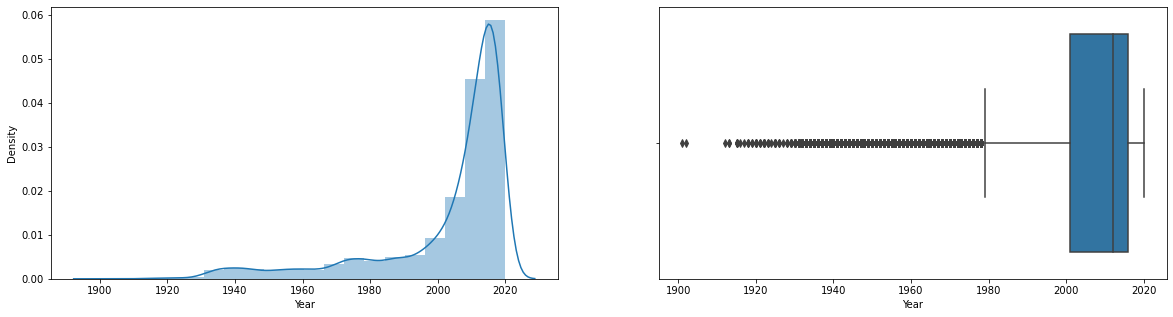

In [ ]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(df_movies_year['Year'],bins = 20, kde = True, ax = ax[0])
sns.boxplot(df_movies_year['Year'], ax = ax[1])
plt.show()

In [ ]:
# Creating distinct dataframes only with the movies present on individual streaming platforms
netflix_year_movies = df_movies_year.loc[df_movies_year['Netflix'] == 1]
hulu_year_movies = df_movies_year.loc[df_movies_year['Hulu'] == 1]
prime_video_year_movies = df_movies_year.loc[df_movies_year['Prime Video'] == 1]
disney_year_movies = df_movies_year.loc[df_movies_year['Disney+'] == 1]

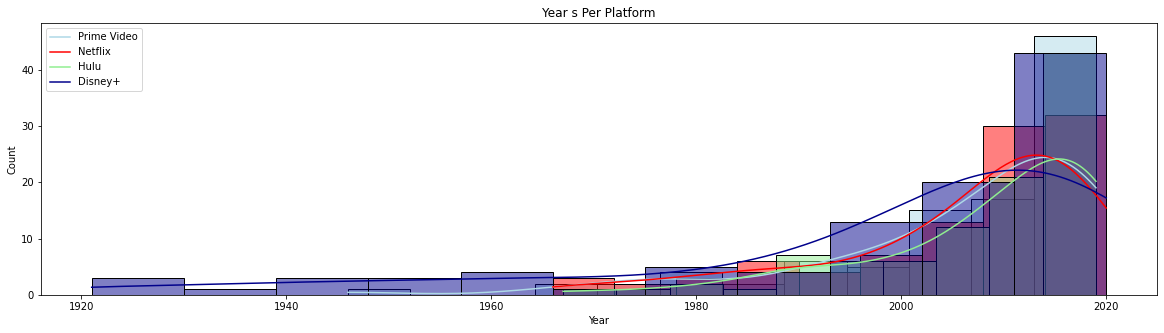

In [ ]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Year s Per Platform')

# Plotting the information from each dataset into a histogram
sns.histplot(prime_video_year_movies['Year'][:100], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_year_movies['Year'][:100], color = 'red', legend = True, kde = True)
sns.histplot(hulu_year_movies['Year'][:100], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_year_movies['Year'][:100], color = 'darkblue', legend = True, kde = True) 

# Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [ ]:
print(f'''
      The Latest TV Show Ever Got is '{df_year_new_movies['Title'][0]}' : '{df_year_new_movies['Year'].max()}'\n
      The Oldest TV Show Ever Got is '{df_year_old_movies['Title'][0]}' : '{df_year_old_movies['Year'].min()}'\n
      
      The Latest TV Show on 'Netflix' is '{netflix_year_new_movies['Title'][0]}' : '{netflix_year_new_movies['Year'].max()}'\n
      The Oldest TV Show on 'Netflix' is '{netflix_year_old_movies['Title'][0]}' : '{netflix_year_old_movies['Year'].min()}'\n
      
      The Latest TV Show on 'Hulu' is '{hulu_year_new_movies['Title'][0]}' : '{hulu_year_new_movies['Year'].max()}'\n
      The Oldest TV Show on 'Hulu' is '{hulu_year_old_movies['Title'][0]}' : '{hulu_year_old_movies['Year'].min()}'\n
      
      The Latest TV Show on 'Prime Video' is '{prime_video_year_new_movies['Title'][0]}' : '{prime_video_year_new_movies['Year'].max()}'\n
      The Oldest TV Show on 'Prime Video' is '{prime_video_year_old_movies['Title'][0]}' : '{prime_video_year_old_movies['Year'].min()}'\n
      
      The Latest TV Show on 'Disney+' is '{disney_year_new_movies['Title'][0]}' : '{disney_year_new_movies['Year'].max()}'\n
      The Oldest TV Show on 'Disney+' is '{disney_year_old_movies['Title'][0]}' : '{disney_year_old_movies['Year'].min()}'\n 
      ''')


      The Latest TV Show Ever Got is 'The Occupant' : '2020'

      The Oldest TV Show Ever Got is 'Space: The New Frontier' : '1901'

      
      The Latest TV Show on 'Netflix' is 'The Occupant' : '2020'

      The Oldest TV Show on 'Netflix' is 'The Battle of Midway' : '1942'

      
      The Latest TV Show on 'Hulu' is 'Big Time Adolescence' : '2020'

      The Oldest TV Show on 'Hulu' is 'The Hunchback of Notre Dame' : '1923'

      
      The Latest TV Show on 'Prime Video' is 'Shubh Mangal Zyada Saavdhan' : '2020'

      The Oldest TV Show on 'Prime Video' is 'Space: The New Frontier' : '1901'

      
      The Latest TV Show on 'Disney+' is 'A Celebration of the Music from Coco' : '2020'

      The Oldest TV Show on 'Disney+' is 'The Three Musketeers' : '1921'
 
      


In [ ]:
# def round_val(data):
#     if str(data) != 'nan':
#         return round(data)
# 		
# def round_fix(data):
#     if data in range(1801,1900):
#         # print(data)
#         return 1900
#     if data in range(1901,1910):
#         return 1910
#     if data in range(1911,1920):
#         return 1920
# 	if data in range(1921,1930):
#         return 1930
# 	if data in range(1931,1940):
#         return 1940
# 	if data in range(1941,1950):
#         return 1950
# 	if data in range(1951,1960):
#         return 1960
# 	if data in range(1961,1970):
#         return 1970
# 	if data in range(1971,1980):
#         return 1980
# 	if data in range(1981,1990):
#         return 1990
# 	if data in range(1991,2000):
#         return 2000
# 	if data in range(2000,2010):
#         return 2010
# 	if data in range(2010,2020):
#         return 2020
# 	if data in range(2020,2030):
#         return 2030
# 	if data in range(2300,2100):
#         return 2100
#     
# df_movies_year['Year Group'] = df_movies_year['Year'].apply(round_fix)
# 
# year_values = df_movies_year['Year Group'].value_counts().sort_index(ascending = False).tolist()
# year_index = df_movies_year['Year Group'].value_counts().sort_index(ascending = False).index
# 
# year_values, year_index

In [ ]:
year_count = df_movies_year.groupby('Year')['Title'].count()
year_tvshow = df_movies_year.groupby('Year')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
year_data_movies = pd.concat([year_count, year_tvshow], axis = 1).reset_index().rename(columns = {'Title' : 'Movies Count'})
year_data_movies = year_data_movies.sort_values(by = 'Movies Count', ascending = False)

In [ ]:
# Movies Count per Year - All Platforms Combined
year_data_movies.head()

Year  Movies Count  Netflix  Hulu  Prime Video  Disney+
106  2017          1449      576   140          792       22
107  2018          1287      561   168          618       15
105  2016          1236      451    81          735       17
104  2015          1090      281    78          761       10
103  2014           991      174    60          774       10

In [ ]:
# Highest Movies Count per Year - All Platforms Combined
df_year_high_movies = year_data_movies.sort_values(by = 'Movies Count', ascending = False).reset_index()
df_year_high_movies = df_year_high_movies.drop(['index'], axis = 1)
# filter = (year_data_movies['Movies Count'] = =  (year_data_movies['Movies Count'].max()))
# df_year_high_movies = year_data_movies[filter]
 
# highest_rated_tvshow = year_data_movies.loc[year_data_movies['Movies Count'].idxmax()]
 
print('\nYear with Highest Ever Movies Count are : All Platforms Combined\n')
df_year_high_movies.head(5)


Year with Highest Ever Movies Count are : All Platforms Combined



Year  Movies Count  Netflix  Hulu  Prime Video  Disney+
0  2017          1449      576   140          792       22
1  2018          1287      561   168          618       15
2  2016          1236      451    81          735       17
3  2015          1090      281    78          761       10
4  2014           991      174    60          774       10

In [ ]:
# Lowest Movies Count per Year - All Platforms Combined
df_year_low_movies = year_data_movies.sort_values(by = 'Movies Count', ascending = True).reset_index()
df_year_low_movies = df_year_low_movies.drop(['index'], axis = 1)
# filter = (year_data_movies['Movies Count'] = =  (year_data_movies['Movies Count'].min()))
# df_year_low_movies = year_data_movies[filter]
 
print('\nYear with Lowest Ever Movies Count are : All Platforms Combined\n')
df_year_low_movies.head(5)


Year with Lowest Ever Movies Count are : All Platforms Combined



Year  Movies Count  Netflix  Hulu  Prime Video  Disney+
0  1901             1        0     0            1        0
1  1912             1        0     0            1        0
2  1902             1        0     0            1        0
3  1927             1        0     0            1        0
4  1916             1        0     0            1        0

In [ ]:
print(f'''
      Total '{df_movies['Year'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see Movies from Total '{year_data_movies['Year'].unique().shape[0]}' Year, They were Like this, \n
 
      {year_data_movies.sort_values(by = 'Movies Count', ascending = False)['Year'].head(5).unique()} etc. \n
 
      The Year with Highest Movies Count have '{year_data_movies['Movies Count'].max()}' Movies Available is '{df_year_high_movies['Year'][0]}', &\n
      The Year with Lowest Movies Count have '{year_data_movies['Movies Count'].min()}' Movies Available is '{df_year_low_movies['Year'][0]}'
      ''')


      Total '16923' Titles are available on All Platforms, out of which

      You Can Choose to see Movies from Total '110' Year, They were Like this, 

 
      [2017 2018 2016 2015 2014] etc. 

 
      The Year with Highest Movies Count have '1449' Movies Available is '2017', &

      The Year with Lowest Movies Count have '1' Movies Available is '1901'
      


In [ ]:
# Highest Movies Count per Year - Netflix
netflix_year_movies = year_data_movies[year_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_year_movies = netflix_year_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
netflix_year_high_movies = df_year_high_movies.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_year_high_movies = netflix_year_high_movies.drop(['index'], axis = 1)
 
netflix_year_low_movies = df_year_high_movies.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_year_low_movies = netflix_year_low_movies.drop(['index'], axis = 1)
 
netflix_year_high_movies.head(5)

Year  Movies Count  Netflix  Hulu  Prime Video  Disney+
0  2017          1449      576   140          792       22
1  2018          1287      561   168          618       15
2  2016          1236      451    81          735       17
3  2019           703      430   119          164       24
4  2015          1090      281    78          761       10

In [ ]:
# Highest Movies Count per Year - Hulu
hulu_year_movies = year_data_movies[year_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_year_movies = hulu_year_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
hulu_year_high_movies = df_year_high_movies.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_year_high_movies = hulu_year_high_movies.drop(['index'], axis = 1)
 
hulu_year_low_movies = df_year_high_movies.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_year_low_movies = hulu_year_low_movies.drop(['index'], axis = 1)
 
hulu_year_high_movies.head(5)

Year  Movies Count  Netflix  Hulu  Prime Video  Disney+
0  2018          1287      561   168          618       15
1  2017          1449      576   140          792       22
2  2019           703      430   119          164       24
3  2016          1236      451    81          735       17
4  2015          1090      281    78          761       10

In [ ]:
# Highest Movies Count per Year - Prime Video
prime_video_year_movies = year_data_movies[year_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_year_movies = prime_video_year_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)
 
prime_video_year_high_movies = df_year_high_movies.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_year_high_movies = prime_video_year_high_movies.drop(['index'], axis = 1)
 
prime_video_year_low_movies = df_year_high_movies.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_year_low_movies = prime_video_year_low_movies.drop(['index'], axis = 1)
 
prime_video_year_high_movies.head(5)

Year  Movies Count  Netflix  Hulu  Prime Video  Disney+
0  2013           979      139    51          815       12
1  2017          1449      576   140          792       22
2  2014           991      174    60          774       10
3  2015          1090      281    78          761       10
4  2016          1236      451    81          735       17

In [ ]:
# Highest Movies Count per Year - Disney+
disney_year_movies = year_data_movies[year_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_year_movies = disney_year_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)
 
disney_year_high_movies = df_year_high_movies.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_year_high_movies = disney_year_high_movies.drop(['index'], axis = 1)
 
disney_year_low_movies = df_year_high_movies.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_year_low_movies = disney_year_low_movies.drop(['index'], axis = 1)
 
disney_year_high_movies.head(5)

Year  Movies Count  Netflix  Hulu  Prime Video  Disney+
0  2003           214       31     6          157       25
1  2019           703      430   119          164       24
2  2017          1449      576   140          792       22
3  2000           176       19     8          132       21
4  2002           196       21     9          152       21

In [ ]:
print(f'''
      The Year with Highest Movies Count Ever Got is '{df_year_high_movies['Year'][0]}' : '{df_year_high_movies['Movies Count'].max()}'\n
      The Year with Lowest Movies Count Ever Got is '{df_year_low_movies['Year'][0]}' : '{df_year_low_movies['Movies Count'].min()}'\n
      
      The Year with Highest Movies Count on 'Netflix' is '{netflix_year_high_movies['Year'][0]}' : '{netflix_year_high_movies['Netflix'].max()}'\n
      The Year with Lowest Movies Count on 'Netflix' is '{netflix_year_low_movies['Year'][0]}' : '{netflix_year_low_movies['Netflix'].min()}'\n
      
      The Year with Highest Movies Count on 'Hulu' is '{hulu_year_high_movies['Year'][0]}' : '{hulu_year_high_movies['Hulu'].max()}'\n
      The Year with Lowest Movies Count on 'Hulu' is '{hulu_year_low_movies['Year'][0]}' : '{hulu_year_low_movies['Hulu'].min()}'\n
      
      The Year with Highest Movies Count on 'Prime Video' is '{prime_video_year_high_movies['Year'][0]}' : '{prime_video_year_high_movies['Prime Video'].max()}'\n
      The Year with Lowest Movies Count on 'Prime Video' is '{prime_video_year_low_movies['Year'][0]}' : '{prime_video_year_low_movies['Prime Video'].min()}'\n
      
      The Year with Highest Movies Count on 'Disney+' is '{disney_year_high_movies['Year'][0]}' : '{disney_year_high_movies['Disney+'].max()}'\n
      The Year with Lowest Movies Count on 'Disney+' is '{disney_year_low_movies['Year'][0]}' : '{disney_year_low_movies['Disney+'].min()}'\n 
      ''')


      The Year with Highest Movies Count Ever Got is '2017' : '1449'

      The Year with Lowest Movies Count Ever Got is '1901' : '1'

      
      The Year with Highest Movies Count on 'Netflix' is '2017' : '576'

      The Year with Lowest Movies Count on 'Netflix' is '1941' : '0'

      
      The Year with Highest Movies Count on 'Hulu' is '2018' : '168'

      The Year with Lowest Movies Count on 'Hulu' is '1941' : '0'

      
      The Year with Highest Movies Count on 'Prime Video' is '2013' : '815'

      The Year with Lowest Movies Count on 'Prime Video' is '1901' : '1'

      
      The Year with Highest Movies Count on 'Disney+' is '2003' : '25'

      The Year with Lowest Movies Count on 'Disney+' is '1901' : '0'
 
      


In [ ]:
print(f'''
      Accross All Platforms the Average Movies Count of Year is '{round(year_data_movies['Movies Count'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Year on 'Netflix' is '{round(netflix_year_movies['Netflix'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Year on 'Hulu' is '{round(hulu_year_movies['Hulu'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Year on 'Prime Video' is '{round(prime_video_year_movies['Prime Video'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Year on 'Disney+' is '{round(disney_year_movies['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Movies Count of Year is '153.85'

      The Average Movies Count of Year on 'Netflix' is '58.66'

      The Average Movies Count of Year on 'Hulu' is '16.83'

      The Average Movies Count of Year on 'Prime Video' is '111.88'

      The Average Movies Count of Year on 'Disney+' is '6.76'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Year is '{year_data_movies['Year'].unique().shape[0]}'\n
      Total Count of Year on 'Netflix' is '{netflix_year_movies['Year'].unique().shape[0]}'\n
      Total Count of Year on 'Hulu' is '{hulu_year_movies['Year'].unique().shape[0]}'\n
      Total Count of Year on 'Prime Video' is '{prime_video_year_movies['Year'].unique().shape[0]}'\n
      Total Count of Year on 'Disney+' is '{disney_year_movies['Year'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Year is '110'

      Total Count of Year on 'Netflix' is '62'

      Total Count of Year on 'Hulu' is '63'

      Total Count of Year on 'Prime Video' is '110'

      Total Count of Year on 'Disney+' is '83'
 
      


In [ ]:
fig = px.bar(year_data_movies[:20], x = 'Year', y = 'Movies Count', color = 'Movies Count', color_continuous_scale = 'Blues_r')
fig.show()

In [ ]:
fig = px.histogram(year_data_movies, x = 'Year', y = 'Movies Count')
fig.show()

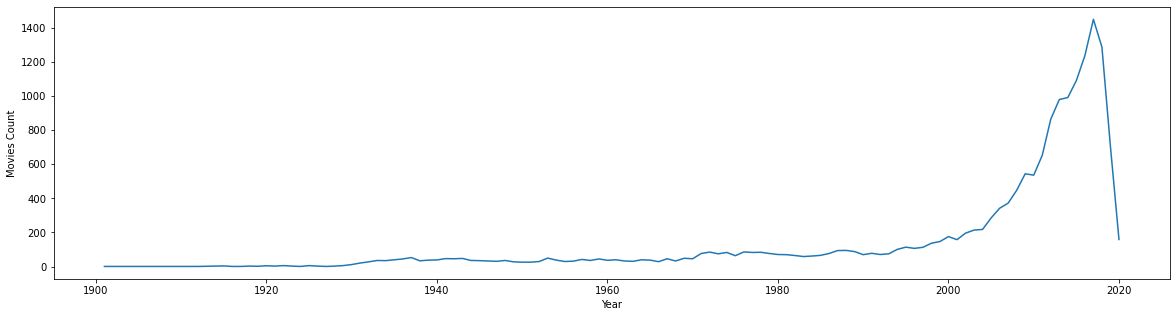

In [ ]:
fig = plt.figure(figsize = (20, 5))
sns.lineplot(data = year_data_movies, x = 'Year', y = 'Movies Count')
plt.show()

In [ ]:
print(f'''
      Accross All Platforms Total Count of Year is '{year_data_movies['Year'].unique().shape[0]}'\n
      Total Count of Year on 'Netflix' is '{netflix_year_movies['Year'].unique().shape[0]}'\n
      Total Count of Year on 'Hulu' is '{hulu_year_movies['Year'].unique().shape[0]}'\n
      Total Count of Year on 'Prime Video' is '{prime_video_year_movies['Year'].unique().shape[0]}'\n
      Total Count of Year on 'Disney+' is '{disney_year_movies['Year'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Year is '110'

      Total Count of Year on 'Netflix' is '62'

      Total Count of Year on 'Hulu' is '63'

      Total Count of Year on 'Prime Video' is '110'

      Total Count of Year on 'Disney+' is '83'
 
      


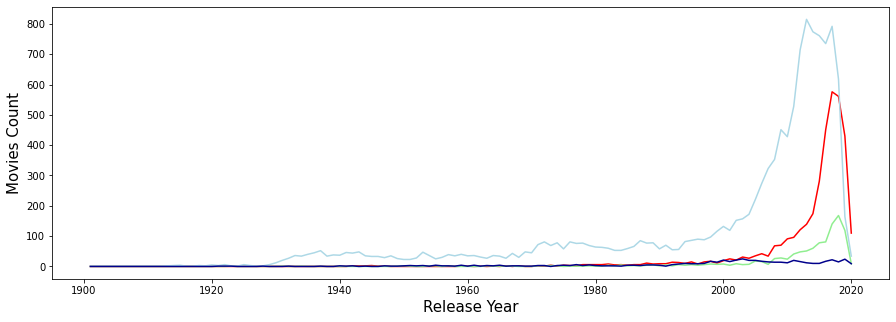

In [ ]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = year_data_movies['Year'], y = year_data_movies['Netflix'], color = 'red')
sns.lineplot(x = year_data_movies['Year'], y = year_data_movies['Hulu'], color = 'lightgreen')
sns.lineplot(x = year_data_movies['Year'], y = year_data_movies['Prime Video'], color = 'lightblue')
sns.lineplot(x = year_data_movies['Year'], y = year_data_movies['Disney+'], color = 'darkblue')
plt.xlabel('Release Year', fontsize = 15)
plt.ylabel('Movies Count', fontsize = 15)
plt.show()

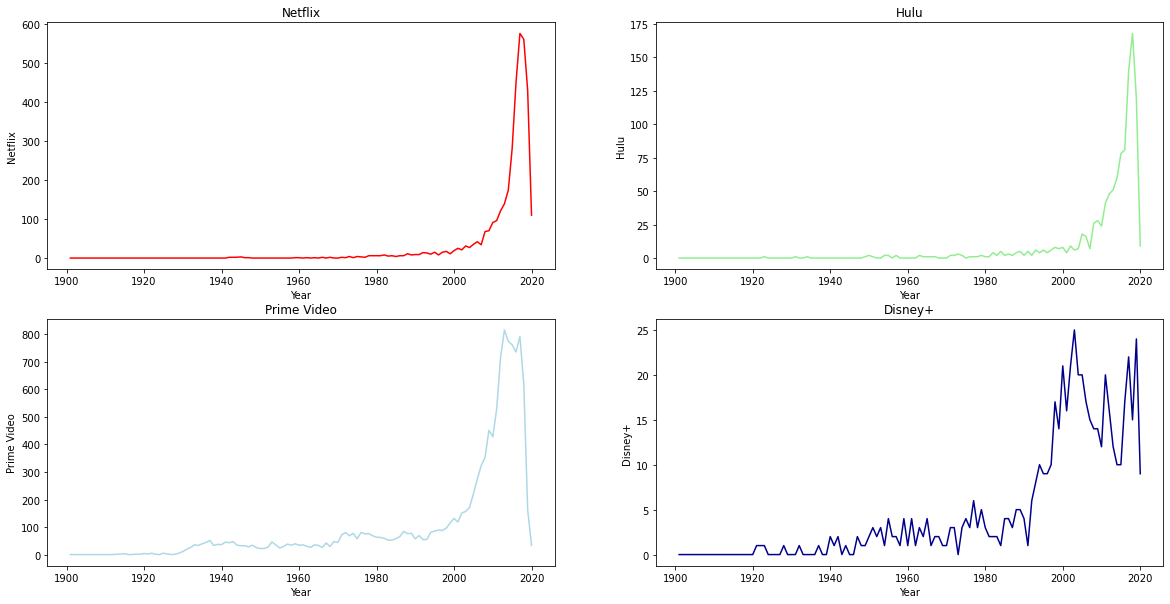

In [ ]:
fig, axes = plt.subplots(2, 2,figsize=(20 ,10))
 
n_y_ax1 = sns.lineplot(x = year_data_movies['Year'], y = year_data_movies['Netflix'], color = 'red', ax = axes[0, 0])
h_y_ax2 = sns.lineplot(x = year_data_movies['Year'], y = year_data_movies['Hulu'], color = 'lightgreen', ax = axes[0, 1])
p_y_ax3 = sns.lineplot(x = year_data_movies['Year'], y = year_data_movies['Prime Video'], color = 'lightblue', ax = axes[1, 0])
d_y_ax4 = sns.lineplot(x = year_data_movies['Year'], y = year_data_movies['Disney+'], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_y_ax1.title.set_text(labels[0])
h_y_ax2.title.set_text(labels[1])
p_y_ax3.title.set_text(labels[2])
d_y_ax4.title.set_text(labels[3])
 
plt.show()

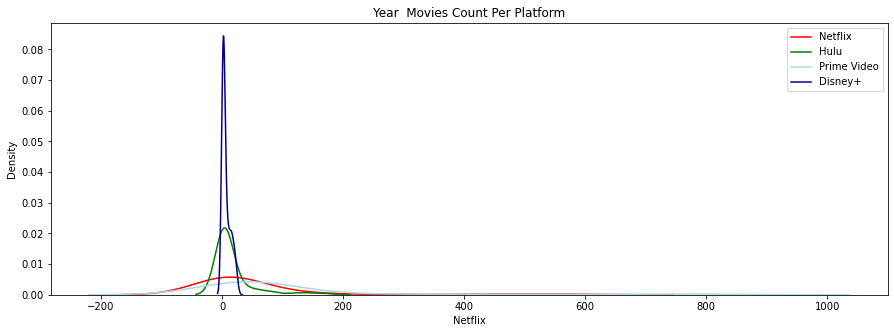

In [ ]:
# Defining plot size and title
plt.figure(figsize = (15, 5))
plt.title('Year  Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_year_movies['Netflix'], color = 'red', legend = True)
sns.kdeplot(hulu_year_movies['Hulu'], color = 'green', legend = True)
sns.kdeplot(prime_video_year_movies['Prime Video'], color = 'lightblue', legend = True)
sns.kdeplot(disney_year_movies['Disney+'], color = 'darkblue', legend = True)                                      
                                      
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

In [ ]:
df_movies_age = df_movies.copy()

In [ ]:
df_movies_age.drop(df_movies_age.loc[df_movies_age['Age'] == "NR"].index, inplace = True)
# df_movies_age = df_movies_age[df_movies_age.Age != "NR"]
df_movies_age['Age'] = df_movies_age['Age'].astype(int)

In [ ]:
# Creating distinct dataframes only with the movies present on individual streaming platforms
netflix_age_movies = df_movies_age.loc[df_movies_age['Netflix'] == 1]
hulu_age_movies = df_movies_age.loc[df_movies_age['Hulu'] == 1]
prime_video_age_movies = df_movies_age.loc[df_movies_age['Prime Video'] == 1]
disney_age_movies = df_movies_age.loc[df_movies_age['Disney+'] == 1]

In [ ]:
age_count = df_movies_age.groupby('Age')['Title'].count()
age_tvshow = df_movies_age.groupby('Age')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
age_data_movies = pd.concat([age_count, age_tvshow], axis = 1).reset_index().rename(columns = {'Title' : 'Movies Count'})
#age_data_movies = age_data_movies.sort_values(by = 'Movies Count', ascending = False)

In [ ]:
# Age with Movies Counts - All Platforms Combined
age_data_movies.sort_values(by = 'Movies Count', ascending = False)

Age  Movies Count  Netflix  Hulu  Prime Video  Disney+
3   16          3316      635   332         2509       12
1    7          1687      353   150         1067      195
2   13          1612      430   147         1068       93
4   18           991      327    56          653        2
0    0           907      132    52          489      259

In [ ]:
# Age with Movies Counts - All Platforms Combined
age_data_movies.sort_values(by = 'Age', ascending = False)

Age  Movies Count  Netflix  Hulu  Prime Video  Disney+
4   18           991      327    56          653        2
3   16          3316      635   332         2509       12
2   13          1612      430   147         1068       93
1    7          1687      353   150         1067      195
0    0           907      132    52          489      259

In [ ]:
df_age_high_movies = age_data_movies.sort_values(by = 'Movies Count', ascending = False).reset_index()
df_age_high_movies = df_age_high_movies.drop(['index'], axis = 1)
# filter = (age_data_movies['Movies Count'] = =  (age_data_movies['Movies Count'].max()))
# df_age_high_movies = age_data_movies[filter]
 
# highest_rated_tvshow = age_data_movies.loc[age_data_movies['Movies Count'].idxmax()]
 
# print('\nAge with Highest Ever Movies Count are : All Platforms Combined\n')
# df_age_high_movies.head(5)
 
df_age_low_movies = age_data_movies.sort_values(by = 'Movies Count', ascending = True).reset_index()
df_age_low_movies = df_age_low_movies.drop(['index'], axis = 1)
# filter = (age_data_movies['Movies Count'] = =  (age_data_movies['Movies Count'].min()))
# df_age_low_movies = age_data_movies[filter]
 
# print('\nAge with Lowest Ever Movies Count are : All Platforms Combined\n')
# df_age_low_movies.head(5)

In [ ]:
print(f'''
      Lets Talk about, 'All Platforms'
      
      Total '{df_movies_age['Age'].value_counts().shape[0]}' Rating as per 'Age' Categories are available on All Platforms & They are '{df_movies_age['Age'].unique()}'\n
      Total '{df_movies_age[df_movies_age['Age'] == 'NR'].shape[0]}' Movies are available on All Platforms Which are 'Not Rated' Yet\n
      Total '{df_movies_age[df_movies_age['Age'] == 0].shape[0]}' Movies are available for 'All' Audience on All Platforms\n
      Total '{df_movies_age[df_movies_age['Age'] == 7].shape[0]}' Movies are available Only for '7+' Audience on All Platforms\n
      Total '{df_movies_age[df_movies_age['Age'] == 13].shape[0]}' Movies are available Only for '13+' Audience on All Platforms\n
      Total '{df_movies_age[df_movies_age['Age'] == 16].shape[0]}' Movies are available Only for '16+' Audience on All Platforms\n
      Total '{df_movies_age[df_movies_age['Age'] == 18].shape[0]}' Movies are available Only for '18+' Audience on All Platforms\n
      ''')


      Lets Talk about, 'All Platforms'
      
      Total '5' Rating as per 'Age' Categories are available on All Platforms & They are '[13 16  7  0 18]'

      Total '0' Movies are available on All Platforms Which are 'Not Rated' Yet

      Total '907' Movies are available for 'All' Audience on All Platforms

      Total '1687' Movies are available Only for '7+' Audience on All Platforms

      Total '1612' Movies are available Only for '13+' Audience on All Platforms

      Total '3316' Movies are available Only for '16+' Audience on All Platforms

      Total '991' Movies are available Only for '18+' Audience on All Platforms

      


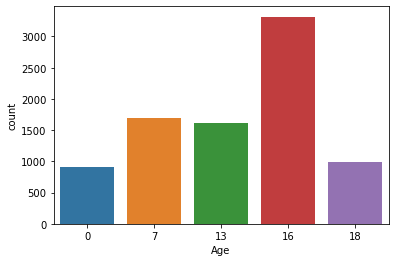

In [ ]:
sns.countplot(df_movies_age['Age'])
plt.show()

In [ ]:
# netflix_age_movies = age_data_movies[age_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_age_movies = netflix_age_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
netflix_age_high_movies = df_age_high_movies.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_age_high_movies = netflix_age_high_movies.drop(['index'], axis = 1)
 
netflix_age_low_movies = df_age_high_movies.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_age_low_movies = netflix_age_low_movies.drop(['index'], axis = 1)
 
netflix_age_high_movies.head(5)

Age  Movies Count  Netflix  Hulu  Prime Video  Disney+
0   16          3316      635   332         2509       12
1   13          1612      430   147         1068       93
2    7          1687      353   150         1067      195
3   18           991      327    56          653        2
4    0           907      132    52          489      259

In [ ]:
print(f'''
      Lets Talk about, 'Netflix'
      
      Total '{netflix_age_movies['Age'].value_counts().shape[0]}' Rating as per 'Age' Categories are available on 'Age' & They are '{netflix_age_movies['Age'].unique()}'\n
      Total '{netflix_age_movies[netflix_age_movies['Age'] == 'NR'].shape[0]}' Movies are available on 'Age' Which are 'Not Rated' Yet\n
      Total '{netflix_age_movies[netflix_age_movies['Age'] == 0].shape[0]}' Movies are available for 'All' Audience on 'Age'\n
      Total '{netflix_age_movies[netflix_age_movies['Age'] == 7].shape[0]}' Movies are available Only for '7+' Audience on 'Age'\n
      Total '{netflix_age_movies[netflix_age_movies['Age'] == 13].shape[0]}' Movies are available Only for '13+' Audience on 'Age'\n
      Total '{netflix_age_movies[netflix_age_movies['Age'] == 16].shape[0]}' Movies are available Only for '16+' Audience on 'Age'\n
      Total '{netflix_age_movies[netflix_age_movies['Age'] == 18].shape[0]}' Movies are available Only for '18+' Audience on 'Age'\n
      ''')


      Lets Talk about, 'Netflix'
      
      Total '5' Rating as per 'Age' Categories are available on 'Age' & They are '[13 16  7  0 18]'

      Total '0' Movies are available on 'Age' Which are 'Not Rated' Yet

      Total '132' Movies are available for 'All' Audience on 'Age'

      Total '353' Movies are available Only for '7+' Audience on 'Age'

      Total '430' Movies are available Only for '13+' Audience on 'Age'

      Total '635' Movies are available Only for '16+' Audience on 'Age'

      Total '327' Movies are available Only for '18+' Audience on 'Age'

      


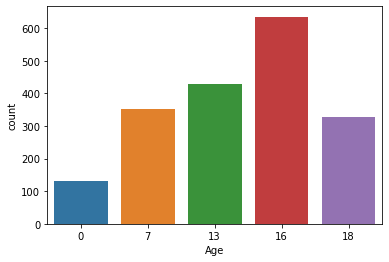

In [ ]:
sns.countplot(netflix_age_movies['Age'])
plt.show()

In [ ]:
# hulu_age_movies = age_data_movies[age_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_age_movies = hulu_age_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
hulu_age_high_movies = df_age_high_movies.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_age_high_movies = hulu_age_high_movies.drop(['index'], axis = 1)
 
hulu_age_low_movies = df_age_high_movies.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_age_low_movies = hulu_age_low_movies.drop(['index'], axis = 1)
 
hulu_age_high_movies.head(5)

Age  Movies Count  Netflix  Hulu  Prime Video  Disney+
0   16          3316      635   332         2509       12
1    7          1687      353   150         1067      195
2   13          1612      430   147         1068       93
3   18           991      327    56          653        2
4    0           907      132    52          489      259

In [ ]:
print(f'''
      Lets Talk about, 'Hulu'
      
      Total '{hulu_age_movies['Age'].value_counts().shape[0]}' Rating as per 'Age' Categories are available on 'Hulu' & They are '{hulu_age_movies['Age'].unique()}'\n
      Total '{hulu_age_movies[hulu_age_movies['Age'] == 'NR'].shape[0]}' Movies are available on 'Hulu' Which are 'Not Rated' Yet\n
      Total '{hulu_age_movies[hulu_age_movies['Age'] == 0].shape[0]}' Movies are available for 'All' Audience on 'Hulu'\n
      Total '{hulu_age_movies[hulu_age_movies['Age'] == 7].shape[0]}' Movies are available Only for '7+' Audience on 'Hulu'\n
      Total '{hulu_age_movies[hulu_age_movies['Age'] == 13].shape[0]}' Movies are available Only for '13+' Audience on 'Hulu'\n
      Total '{hulu_age_movies[hulu_age_movies['Age'] == 16].shape[0]}' Movies are available Only for '16+' Audience on 'Hulu'\n
      Total '{hulu_age_movies[hulu_age_movies['Age'] == 18].shape[0]}' Movies are available Only for '18+' Audience on 'Hulu'\n
      ''')


      Lets Talk about, 'Hulu'
      
      Total '5' Rating as per 'Age' Categories are available on 'Hulu' & They are '[13  7 16  0 18]'

      Total '0' Movies are available on 'Hulu' Which are 'Not Rated' Yet

      Total '52' Movies are available for 'All' Audience on 'Hulu'

      Total '150' Movies are available Only for '7+' Audience on 'Hulu'

      Total '147' Movies are available Only for '13+' Audience on 'Hulu'

      Total '332' Movies are available Only for '16+' Audience on 'Hulu'

      Total '56' Movies are available Only for '18+' Audience on 'Hulu'

      


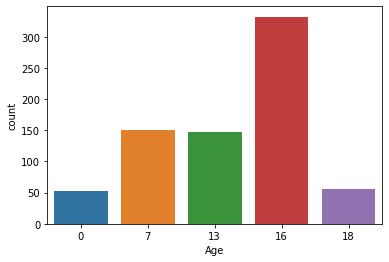

In [ ]:
sns.countplot(hulu_age_movies['Age'])
plt.show()

In [ ]:
# prime_video_age_movies = age_data_movies[age_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_age_movies = prime_video_age_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)
 
prime_video_age_high_movies = df_age_high_movies.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_age_high_movies = prime_video_age_high_movies.drop(['index'], axis = 1)
 
prime_video_age_low_movies = df_age_high_movies.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_age_low_movies = prime_video_age_low_movies.drop(['index'], axis = 1)
 
prime_video_age_high_movies.head(5)

Age  Movies Count  Netflix  Hulu  Prime Video  Disney+
0   16          3316      635   332         2509       12
1   13          1612      430   147         1068       93
2    7          1687      353   150         1067      195
3   18           991      327    56          653        2
4    0           907      132    52          489      259

In [ ]:
print(f'''
      Lets Talk about, 'Prime Video'
      
      Total '{prime_video_age_movies['Age'].value_counts().shape[0]}' Rating as per 'Age' Categories are available on 'Age' & They are '{prime_video_age_movies['Age'].unique()}'\n
      Total '{prime_video_age_movies[prime_video_age_movies['Age'] == 'NR'].shape[0]}' Movies are available on 'Age' Which are 'Not Rated' Yet\n
      Total '{prime_video_age_movies[prime_video_age_movies['Age'] == 0].shape[0]}' Movies are available for 'All' Audience on 'Age'\n
      Total '{prime_video_age_movies[prime_video_age_movies['Age'] == 7].shape[0]}' Movies are available Only for '7+' Audience on 'Age'\n
      Total '{prime_video_age_movies[prime_video_age_movies['Age'] == 13].shape[0]}' Movies are available Only for '13+' Audience on 'Age'\n
      Total '{prime_video_age_movies[prime_video_age_movies['Age'] == 16].shape[0]}' Movies are available Only for '16+' Audience on 'Age'\n
      Total '{prime_video_age_movies[prime_video_age_movies['Age'] == 18].shape[0]}' Movies are available Only for '18+' Audience on 'Age'\n
      ''')


      Lets Talk about, 'Prime Video'
      
      Total '5' Rating as per 'Age' Categories are available on 'Age' & They are '[16 13 18  7  0]'

      Total '0' Movies are available on 'Age' Which are 'Not Rated' Yet

      Total '489' Movies are available for 'All' Audience on 'Age'

      Total '1067' Movies are available Only for '7+' Audience on 'Age'

      Total '1068' Movies are available Only for '13+' Audience on 'Age'

      Total '2509' Movies are available Only for '16+' Audience on 'Age'

      Total '653' Movies are available Only for '18+' Audience on 'Age'

      


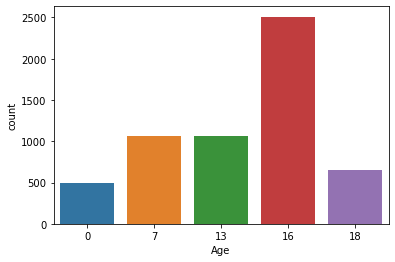

In [ ]:
sns.countplot(prime_video_age_movies['Age'])
plt.show()

In [ ]:
# disney_age_movies = age_data_movies[age_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_age_movies = disney_age_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)
 
disney_age_high_movies = df_age_high_movies.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_age_high_movies = disney_age_high_movies.drop(['index'], axis = 1)
 
disney_age_low_movies = df_age_high_movies.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_age_low_movies = disney_age_low_movies.drop(['index'], axis = 1)
 
disney_age_high_movies.head(5)

Age  Movies Count  Netflix  Hulu  Prime Video  Disney+
0    0           907      132    52          489      259
1    7          1687      353   150         1067      195
2   13          1612      430   147         1068       93
3   16          3316      635   332         2509       12
4   18           991      327    56          653        2

In [ ]:
print(f'''
      Lets Talk about, 'Disney+'
      
      Total '{disney_age_movies['Age'].value_counts().shape[0]}' Rating as per 'Age' Categories are available on 'Age' & They are '{disney_age_movies['Age'].unique()}'\n
      Total '{disney_age_movies[disney_age_movies['Age'] == 'NR'].shape[0]}' Movies are available on 'Age' Which are 'Not Rated' Yet\n
      Total '{disney_age_movies[disney_age_movies['Age'] == 0].shape[0]}' Movies are available for 'All' Audience on 'Age'\n
      Total '{disney_age_movies[disney_age_movies['Age'] == 7].shape[0]}' Movies are available Only for '7+' Audience on 'Age'\n
      Total '{disney_age_movies[disney_age_movies['Age'] == 13].shape[0]}' Movies are available Only for '13+' Audience on 'Age'\n
      Total '{disney_age_movies[disney_age_movies['Age'] == 16].shape[0]}' Movies are available Only for '16+' Audience on 'Age'\n
      Total '{disney_age_movies[disney_age_movies['Age'] == 18].shape[0]}' Movies are available Only for '18+' Audience on 'Age'\n
      ''')


      Lets Talk about, 'Disney+'
      
      Total '5' Rating as per 'Age' Categories are available on 'Age' & They are '[13  7  0 16 18]'

      Total '0' Movies are available on 'Age' Which are 'Not Rated' Yet

      Total '259' Movies are available for 'All' Audience on 'Age'

      Total '195' Movies are available Only for '7+' Audience on 'Age'

      Total '93' Movies are available Only for '13+' Audience on 'Age'

      Total '12' Movies are available Only for '16+' Audience on 'Age'

      Total '2' Movies are available Only for '18+' Audience on 'Age'

      


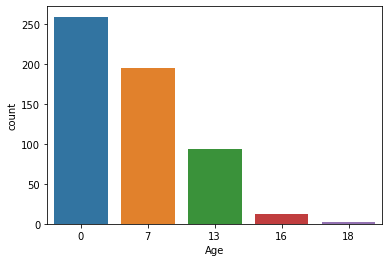

In [ ]:
sns.countplot(disney_age_movies['Age'])
plt.show()

In [ ]:
# Creating distinct dataframes only with the movies present on individual streaming platforms
netflix_age_movies = age_data_movies[age_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_age_movies = netflix_age_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

hulu_age_movies = age_data_movies[age_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_age_movies = hulu_age_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

prime_video_age_movies = age_data_movies[age_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_age_movies = prime_video_age_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)

disney_age_movies = age_data_movies[age_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_age_movies = disney_age_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)

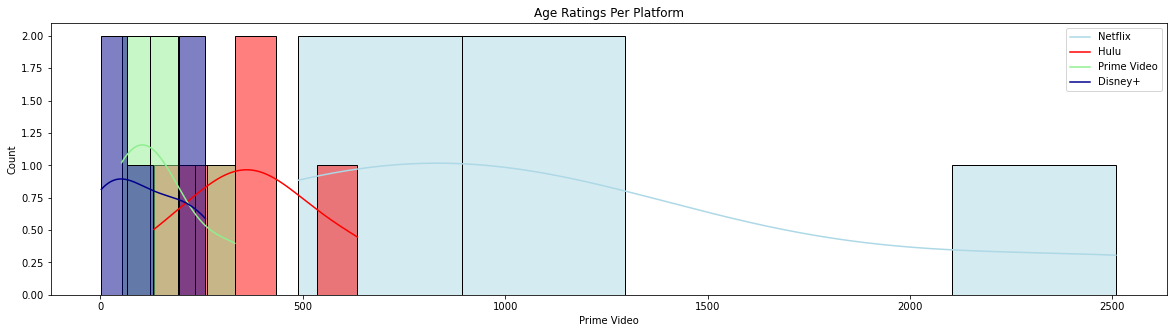

In [ ]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Age Ratings Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.histplot(prime_video_age_movies['Prime Video'], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_age_movies['Netflix'], color = 'red', legend = True, kde = True)
sns.histplot(hulu_age_movies['Hulu'], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_age_movies['Disney+'], color = 'darkblue', legend = True, kde = True) 
 
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

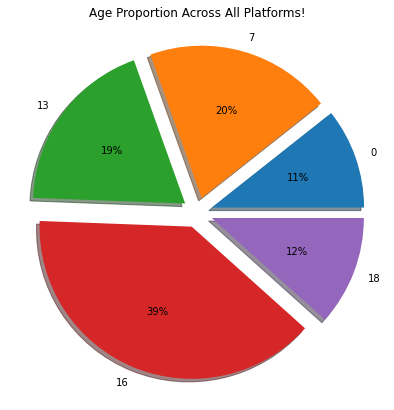

In [ ]:
plt.figure(figsize = (7, 7))
 
plt.pie(age_data_movies['Movies Count'], labels = age_data_movies.Age, explode = (0.1, 0.1, 0.1, 0.1, 0.1), autopct='%1.0f%%', labeldistance = 1.1, shadow = True)
 
plt.title('Age Proportion Across All Platforms!')
plt.show()

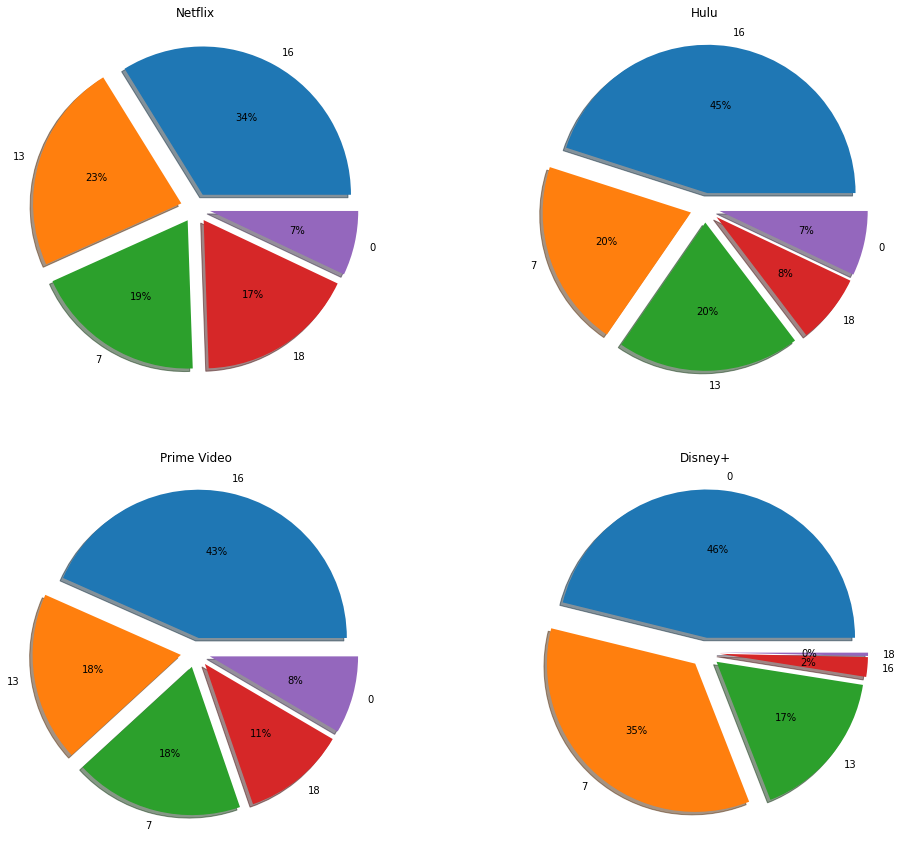

In [ ]:
fig = plt.figure(figsize = (35, 15))
 
ax = plt.subplot2grid((2, 4), (0, 0))

age_labels = ['All', '7+', '13+', '16+', '18+']
 
plt.pie(netflix_age_movies['Netflix'], labels = netflix_age_movies.Age, explode = (0.1, 0.1, 0.1, 0.1, 0.1), autopct = '%1.0f%%', labeldistance = 1.1, shadow = True)
 
plt.title('Netflix')
 
ax = plt.subplot2grid((2, 4), (0, 1))
 
plt.pie(hulu_age_movies['Hulu'], labels = hulu_age_movies.Age, explode = (0.1, 0.1, 0.1, 0.1, 0.1), autopct = '%1.0f%%', labeldistance = 1.1, shadow = True)
 
plt.title('Hulu')
 
ax = plt.subplot2grid((2, 4), (1, 0))
 
plt.pie(prime_video_age_movies['Prime Video'], labels = prime_video_age_movies.Age, explode = (0.1, 0.1, 0.1, 0.1, 0.1), autopct = '%1.0f%%', labeldistance = 1.1, shadow = True)
 
plt.title('Prime Video')
 
ax = plt.subplot2grid((2, 4), (1, 1))
 
plt.pie(disney_age_movies['Disney+'], labels = disney_age_movies.Age, explode = (0.1, 0.1, 0.1, 0.1, 0.1), autopct = '%1.0f%%', labeldistance = 1.1, shadow = True)
 
plt.title('Disney+')
 
plt.show()

In [ ]:
print(f'''
      The Age with Highest Movies Count Ever Got is '{df_age_high_movies['Age'][0]}' : '{df_age_high_movies['Movies Count'].max()}'\n
      The Age with Lowest Movies Count Ever Got is '{df_age_low_movies['Age'][0]}' : '{df_age_low_movies['Movies Count'].min()}'\n
      
      The Age with Highest Movies Count on 'Netflix' is '{netflix_age_high_movies['Age'][0]}' : '{netflix_age_high_movies['Netflix'].max()}'\n
      The Age with Lowest Movies Count on 'Netflix' is '{netflix_age_low_movies['Age'][0]}' : '{netflix_age_low_movies['Netflix'].min()}'\n
      
      The Age with Highest Movies Count on 'Hulu' is '{hulu_age_high_movies['Age'][0]}' : '{hulu_age_high_movies['Hulu'].max()}'\n
      The Age with Lowest Movies Count on 'Hulu' is '{hulu_age_low_movies['Age'][0]}' : '{hulu_age_low_movies['Hulu'].min()}'\n
      
      The Age with Highest Movies Count on 'Prime Video' is '{prime_video_age_high_movies['Age'][0]}' : '{prime_video_age_high_movies['Prime Video'].max()}'\n
      The Age with Lowest Movies Count on 'Prime Video' is '{prime_video_age_low_movies['Age'][0]}' : '{prime_video_age_low_movies['Prime Video'].min()}'\n
      
      The Age with Highest Movies Count on 'Disney+' is '{disney_age_high_movies['Age'][0]}' : '{disney_age_high_movies['Disney+'].max()}'\n
      The Age with Lowest Movies Count on 'Disney+' is '{disney_age_low_movies['Age'][0]}' : '{disney_age_low_movies['Disney+'].min()}'\n 
      ''')


      The Age with Highest Movies Count Ever Got is '16' : '3316'

      The Age with Lowest Movies Count Ever Got is '0' : '907'

      
      The Age with Highest Movies Count on 'Netflix' is '16' : '635'

      The Age with Lowest Movies Count on 'Netflix' is '0' : '132'

      
      The Age with Highest Movies Count on 'Hulu' is '16' : '332'

      The Age with Lowest Movies Count on 'Hulu' is '0' : '52'

      
      The Age with Highest Movies Count on 'Prime Video' is '16' : '2509'

      The Age with Lowest Movies Count on 'Prime Video' is '0' : '489'

      
      The Age with Highest Movies Count on 'Disney+' is '0' : '259'

      The Age with Lowest Movies Count on 'Disney+' is '18' : '2'
 
      


In [ ]:
print(f'''
      Accross All Platforms the Average Movies Count of Age is '{round(age_data_movies['Movies Count'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Age on 'Netflix' is '{round(netflix_age_movies['Netflix'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Age on 'Hulu' is '{round(hulu_age_movies['Hulu'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Age on 'Prime Video' is '{round(prime_video_age_movies['Prime Video'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Age on 'Disney+' is '{round(disney_age_movies['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Movies Count of Age is '1702.6'

      The Average Movies Count of Age on 'Netflix' is '375.4'

      The Average Movies Count of Age on 'Hulu' is '147.4'

      The Average Movies Count of Age on 'Prime Video' is '1157.2'

      The Average Movies Count of Age on 'Disney+' is '112.2'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Age is '{age_data_movies['Age'].unique().shape[0]}'\n
      Total Count of Age on 'Netflix' is '{netflix_age_movies['Age'].unique().shape[0]}'\n
      Total Count of Age on 'Hulu' is '{hulu_age_movies['Age'].unique().shape[0]}'\n
      Total Count of Age on 'Prime Video' is '{prime_video_age_movies['Age'].unique().shape[0]}'\n
      Total Count of Age on 'Disney+' is '{disney_age_movies['Age'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Age is '5'

      Total Count of Age on 'Netflix' is '5'

      Total Count of Age on 'Hulu' is '5'

      Total Count of Age on 'Prime Video' is '5'

      Total Count of Age on 'Disney+' is '5'
 
      


In [ ]:
fig = px.bar(x = age_data_movies['Age'], y = age_data_movies['Movies Count'], 
             color = age_data_movies['Movies Count'], color_continuous_scale = 'Teal_r', 
             labels = { 'x' : 'Age', 'y' : 'Number of Movies'})
fig.show()

In [ ]:
print(f'''
      Accross All Platforms Total Count of Age is '{age_data_movies['Age'].unique().shape[0]}'\n
      Total Count of Age on 'Netflix' is '{netflix_age_movies['Age'].unique().shape[0]}'\n
      Total Count of Age on 'Hulu' is '{hulu_age_movies['Age'].unique().shape[0]}'\n
      Total Count of Age on 'Prime Video' is '{prime_video_age_movies['Age'].unique().shape[0]}'\n
      Total Count of Age on 'Disney+' is '{disney_age_movies['Age'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Age is '5'

      Total Count of Age on 'Netflix' is '5'

      Total Count of Age on 'Hulu' is '5'

      Total Count of Age on 'Prime Video' is '5'

      Total Count of Age on 'Disney+' is '5'
 
      


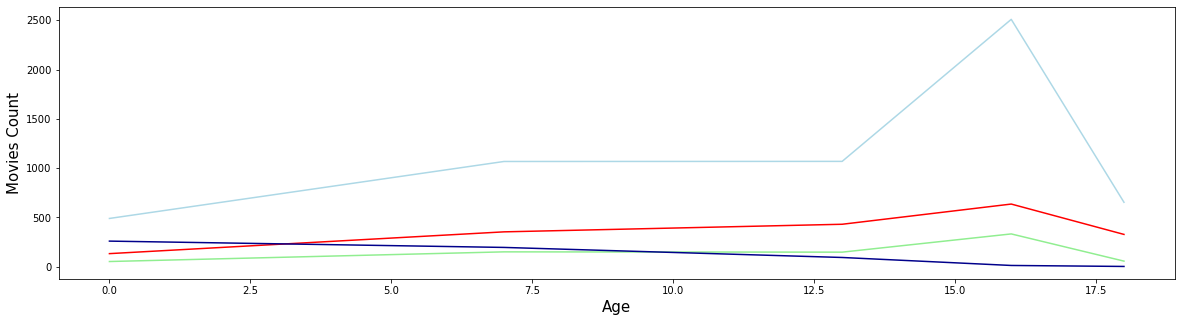

In [ ]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = age_data_movies['Age'][:10], y = age_data_movies['Netflix'][:10], color = 'red')
sns.lineplot(x = age_data_movies['Age'][:10], y = age_data_movies['Hulu'][:10], color = 'lightgreen')
sns.lineplot(x = age_data_movies['Age'][:10], y = age_data_movies['Prime Video'][:10], color = 'lightblue')
sns.lineplot(x = age_data_movies['Age'][:10], y = age_data_movies['Disney+'][:10], color = 'darkblue')
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Movies Count', fontsize = 15)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

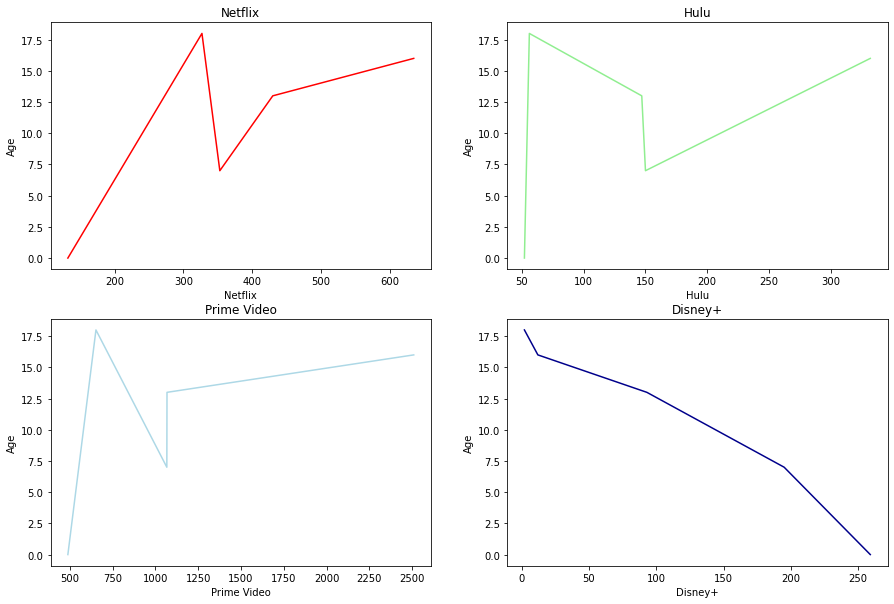

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15 , 10))
 
n_ag_ax1 = sns.lineplot(y = age_data_movies['Age'], x = age_data_movies['Netflix'], color = 'red', ax = axes[0, 0])
h_ag_ax2 = sns.lineplot(y = age_data_movies['Age'], x = age_data_movies['Hulu'], color = 'lightgreen', ax = axes[0, 1])
p_ag_ax3 = sns.lineplot(y = age_data_movies['Age'], x = age_data_movies['Prime Video'], color = 'lightblue', ax = axes[1, 0])
d_ag_ax4 = sns.lineplot(y = age_data_movies['Age'], x = age_data_movies['Disney+'], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_ag_ax1.title.set_text(labels[0])
h_ag_ax2.title.set_text(labels[1])
p_ag_ax3.title.set_text(labels[2])
d_ag_ax4.title.set_text(labels[3])
 
plt.show

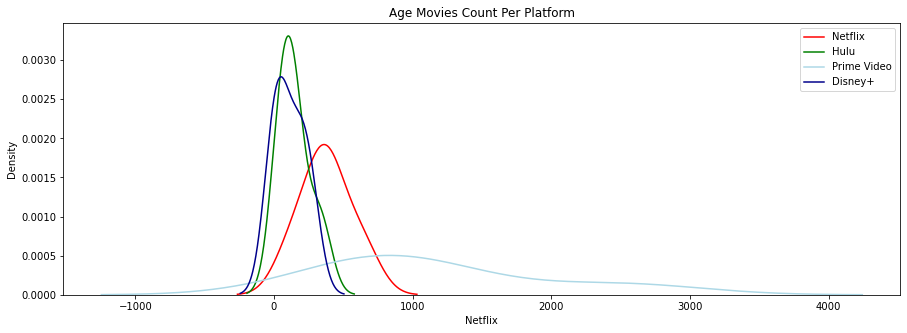

In [ ]:
# Defining plot size and title
plt.figure(figsize = (15, 5))
plt.title('Age Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_age_movies['Netflix'], color = 'red', legend = True)
sns.kdeplot(hulu_age_movies['Hulu'], color = 'green', legend = True)
sns.kdeplot(prime_video_age_movies['Prime Video'], color = 'lightblue', legend = True)
sns.kdeplot(disney_age_movies['Disney+'], color = 'darkblue', legend = True)                                      
                                      
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

In [ ]:
df_movies_imdb = df_movies.copy()

In [ ]:
df_movies_imdb.drop(df_movies_imdb.loc[df_movies_imdb['IMDb'] == "NA"].index, inplace = True)
# df_movies_imdb = df_movies_imdb[df_movies_imdb.IMDb != "NA"]
# df_movies_imdb['IMDb'] = df_movies_imdb['IMDb'].astype(int)
df_movies_imdb['IMDb'] = df_movies_imdb['IMDb'].astype(float)

In [ ]:
df_imdb_high_movies = df_movies_imdb.sort_values(by = 'IMDb', ascending = False).reset_index()
df_imdb_high_movies = df_imdb_high_movies.drop(['index'], axis = 1)
# filter = (df_movies_imdb['IMDb'] == (df_movies_imdb['IMDb'].max()))
# df_imdb_high_movies = df_movies_imdb[filter]
 
# highest_rated_tvshow = df_movies_imdb.loc[df_movies_imdb['IMDb'].idxmax()]
 
print('\nMovies with Highest Ever IMDb Rating are : \n')
df_imdb_high_movies.head(5)


Movies with Highest Ever IMDb Rating are : 



ID                             Title  Year Age  IMDb Rotten Tomatoes  \
0  15621         Ostatni ludzie Czarnobyla  2018  NR   9.8              NA   
1  11547  Ruby's Studio: the Feelings Show  2010   0   9.8              NA   
2  16587                 Almost Impossible  2017  18   9.7              NA   
3    812                        God of War  2017  NR   9.6              46   
4   1101                      It Takes Two  1995   7   9.4               8   

                  Directors  \
0            Amadeusz Kocan   
1  Jason Docter,Matt Docter   
2      Andrew Espinoza Long   
3               Cory Barlog   
4               Josef Fares   

                                                Cast  \
0                                                 NA   
1  Kelsey Collins Keener,Stevie P. Yurochko,Haley...   
2  Erica Chase,Andrew Espinoza Long,Richard Randa...   
3  Christopher Judge,Sunny Suljic,Jeremy Davies,D...   
4  Joseph Balderrama,Annabelle Dowler,Clare Corbe...   

                           Genres        Country            Language  \
0                     Documentary         Poland           Ukrainian   
1                          Family  United States             English   
2                     Short,Drama  United States             English   
3  Action,Adventure,Drama,Fantasy  United States  English,Norse, Old   
4                       Adventure         Sweden             English   

                                            Plotline Runtime   Kind  Netflix  \
0                                                 NA      52  movie        0   
1  In the Spring of 2013, meatballs served in the...      46  movie        0   
2                                                 NA       5  movie        0   
3  Kratos, the God of War, has defeated the Gods ...      NA  movie        1   
4  Embark on the craziest journey of your life in...     101  movie        1   

   Hulu  Prime Video  Disney+  Type Service Provider  
0     0            1        0     0      Prime Video  
1     0            1        0     0      Prime Video  
2     1            0        0     0             Hulu  
3     0            0        0     0          Netflix  
4     0            1        0     0          Netflix

In [ ]:
df_imdb_low_movies = df_movies_imdb.sort_values(by = 'IMDb', ascending = True).reset_index()
df_imdb_low_movies = df_imdb_low_movies.drop(['index'], axis = 1)
# filter = (df_movies_imdb['IMDb'] == (df_movies_imdb['IMDb'].min()))
# df_imdb_low_movies = df_movies_imdb[filter]
 
print('\nMovies with Lowest Ever IMDb Rating are : \n')
df_imdb_low_movies.head(5)


Movies with Lowest Ever IMDb Rating are : 



ID                             Title  Year Age  IMDb Rotten Tomatoes  \
0  13433  In Memoriam Alexander Litvinenko  2007  NR   0.0              NA   
1  13441     From Philadelphia To Fallujah  2011  NR   0.0              NA   
2   4238              9/11: 15 years later  2016  NR   0.0              NA   
3  14956   Justin Bieber: Always Believing  2013  NR   1.0              NA   
4  13303       Justin Bieber: Rise to Fame  2011   0   1.0              NA   

            Directors                                        Cast  \
0       Jos de Putter                                          NA   
1    David Hammelburg                                Harry Lennix   
2                  NA  Richard Gage,Luke Rudkowski,Coen Vermeeren   
3       Thomas Gibson              Justin Bieber,Anthony Mclemore   
4  Maureen Goldthorpe                               Justin Bieber   

              Genres         Country Language  \
0        Documentary     Netherlands  English   
1  Documentary,Short   United States  English   
2        Documentary     Netherlands  English   
3  Documentary,Music   United States  English   
4        Documentary  United Kingdom  English   

                                            Plotline Runtime   Kind  Netflix  \
0  The Hellcats are an all-female gang bent on bu...      55  movie        0   
1  Bee People is not just a documentary. It is an...      42  movie        0   
2                                                 NA      60  movie        0   
3  A Jewish commando unit hunting Nazi war crimin...      70  movie        0   
4  Maxwell is trying to bring in an oil well and ...      65  movie        0   

   Hulu  Prime Video  Disney+  Type Service Provider  
0     0            1        0     0      Prime Video  
1     0            1        0     0      Prime Video  
2     1            0        0     0             Hulu  
3     0            1        0     0      Prime Video  
4     0            1        0     0      Prime Video

In [ ]:
print(f'''
      Total '{df_movies_imdb['IMDb'].unique().shape[0]}' unique IMDb Ratings were Given, They were Like this,\n
      
{df_movies_imdb.sort_values(by = 'IMDb', ascending = False)['IMDb'].unique()}\n
 
      The Highest Ever IMDb Rating Ever Any TV Show Got is '{df_imdb_high_movies['Title'][0]}' : '{df_imdb_high_movies['IMDb'].max()}'\n
 
      The Lowest Ever IMDb Rating Ever Any TV Show Got is '{df_imdb_low_movies['Title'][0]}' : '{df_imdb_low_movies['IMDb'].min()}'\n
      ''')


      Total '87' unique IMDb Ratings were Given, They were Like this,

      
[9.8 9.7 9.6 9.4 9.3 9.2 9.1 9.  8.9 8.8 8.7 8.6 8.5 8.4 8.3 8.2 8.1 8.
 7.9 7.8 7.7 7.6 7.5 7.4 7.3 7.2 7.1 7.  6.9 6.8 6.7 6.6 6.5 6.4 6.3 6.2
 6.1 6.  5.9 5.8 5.7 5.6 5.5 5.4 5.3 5.2 5.1 5.  4.9 4.8 4.7 4.6 4.5 4.4
 4.3 4.2 4.1 4.  3.9 3.8 3.7 3.6 3.5 3.4 3.3 3.2 3.1 3.  2.9 2.8 2.7 2.6
 2.5 2.4 2.3 2.2 2.1 2.  1.9 1.8 1.7 1.6 1.5 1.4 1.3 1.  0. ]

 
      The Highest Ever IMDb Rating Ever Any TV Show Got is 'Ostatni ludzie Czarnobyla' : '9.8'

 
      The Lowest Ever IMDb Rating Ever Any TV Show Got is 'In Memoriam Alexander Litvinenko' : '0.0'

      


In [ ]:
imdb_count = df_movies_imdb.groupby('IMDb')['Title'].count()
imdb_tvshow = df_movies_imdb.groupby('IMDb')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
imdb_data_movies = pd.concat([imdb_count, imdb_tvshow], axis = 1).reset_index().rename(columns = {'Title' : 'Movies Count'})
imdb_data_movies = imdb_data_movies.sort_values(by = 'Movies Count', ascending = False)
 
# Most Frequent Ratings were Give to Movies - All Platforms Combined
imdb_data_movies.head(5)

IMDb  Movies Count  Netflix  Hulu  Prime Video  Disney+
53   6.4           584      153    44          392       22
52   6.3           570      155    26          391       20
54   6.5           545      126    33          370       33
51   6.2           543      145    32          368       21
55   6.6           523      109    37          382       20

In [ ]:
fig = px.pie(imdb_data_movies[:10], names = 'IMDb', values = 'Movies Count')
fig.update_traces(textinfo = 'percent+label', title = 'Movies Count based on IMDb Ratings')
fig.show()

In [ ]:
netflix_imdb_high_movies = df_imdb_high_movies.loc[df_imdb_high_movies['Netflix']==1].reset_index()
netflix_imdb_high_movies = netflix_imdb_high_movies.drop(['index'], axis = 1)
 
netflix_imdb_low_movies = df_imdb_low_movies.loc[df_imdb_low_movies['Netflix']==1].reset_index()
netflix_imdb_low_movies = netflix_imdb_low_movies.drop(['index'], axis = 1)
 
netflix_imdb_high_movies.head(5)

ID                           Title  Year Age  IMDb Rotten Tomatoes  \
0   812                      God of War  2017  NR   9.6              46   
1  1101                    It Takes Two  1995   7   9.4               8   
2   931                       Natsamrat  2016  NR   9.0              NA   
3     1                       Inception  2010  13   8.8              87   
4     5  The Good, the Bad and the Ugly  1966  16   8.8              97   

           Directors                                               Cast  \
0        Cory Barlog  Christopher Judge,Sunny Suljic,Jeremy Davies,D...   
1        Josef Fares  Joseph Balderrama,Annabelle Dowler,Clare Corbe...   
2   Mahesh Manjrekar  Nana Patekar,Medha Manjrekar,Mrunmayee Deshpan...   
3  Christopher Nolan  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
4       Sergio Leone  Eli Wallach,Clint Eastwood,Lee Van Cleef,Aldo ...   

                             Genres                                 Country  \
0    Action,Adventure,Drama,Fantasy                           United States   
1                         Adventure                                  Sweden   
2                      Drama,Family                                   India   
3  Action,Adventure,Sci-Fi,Thriller            United States,United Kingdom   
4                           Western  Italy,Spain,West Germany,United States   

                  Language                                           Plotline  \
0       English,Norse, Old  Kratos, the God of War, has defeated the Gods ...   
1                  English  Embark on the craziest journey of your life in...   
2                  Marathi  The film is a tragedy about a veteran theatre ...   
3  English,Japanese,French  Dom Cobb is a skilled thief, the absolute best...   
4                  Italian  Blondie (The Good) (Clint Eastwood) is a profe...   

  Runtime   Kind  Netflix  Hulu  Prime Video  Disney+  Type Service Provider  
0      NA  movie        1     0            0        0     0          Netflix  
1     101  movie        1     0            1        0     0          Netflix  
2     166  movie        1     0            0        0     0          Netflix  
3     148  movie        1     0            0        0     0          Netflix  
4     161  movie        1     0            1        0     0          Netflix

In [ ]:
hulu_imdb_high_movies = df_imdb_high_movies.loc[df_imdb_high_movies['Hulu']==1].reset_index()
hulu_imdb_high_movies = hulu_imdb_high_movies.drop(['index'], axis = 1)
 
hulu_imdb_low_movies = df_imdb_low_movies.loc[df_imdb_low_movies['Hulu']==1].reset_index()
hulu_imdb_low_movies = hulu_imdb_low_movies.drop(['index'], axis = 1)
 
hulu_imdb_high_movies.head(5)

ID              Title  Year Age  IMDb Rotten Tomatoes  \
0  16587  Almost Impossible  2017  18   9.7              NA   
1  16592   The Paley Center  2000  NR   9.1              NA   
2   3460    The Dark Knight  2008  13   9.0              87   
3   4178               Hide  2011  16   8.8              13   
4  16458            Wiseguy  1987  16   8.7              NA   

              Directors                                               Cast  \
0  Andrew Espinoza Long  Erica Chase,Andrew Espinoza Long,Richard Randa...   
1          Brad Lachman  Margaret Cho,Raúl Esparza,Kelli Giddish,Marisk...   
2     Christopher Nolan  Christian Bale,Heath Ledger,Aaron Eckhart,Mich...   
3          Dustin Brown  Mena Suvari,Mantas Valantiejus,Sadie C.,Andrew...   
4       Martin Scorsese  Robert De Niro,Ray Liotta,Joe Pesci,Lorraine B...   

                        Genres                       Country  \
0                  Short,Drama                 United States   
1                           NA                 United States   
2  Action,Crime,Drama,Thriller  United States,United Kingdom   
3                  Short,Drama                 United States   
4        Biography,Crime,Drama                 United States   

           Language                                           Plotline  \
0           English                                                 NA   
1           English                                                 NA   
2  English,Mandarin  Set within a year after the events of Batman B...   
3           English                                                 NA   
4   English,Italian                                                 NA   

  Runtime   Kind  Netflix  Hulu  Prime Video  Disney+  Type Service Provider  
0       5  movie        0     1            0        0     0             Hulu  
1      NA  movie        0     1            0        0     0             Hulu  
2     152  movie        0     1            0        0     0             Hulu  
3       4  movie        0     1            1        0     0      Prime Video  
4     146  movie        0     1            0        0     0             Hulu

In [ ]:
prime_video_imdb_high_movies = df_imdb_high_movies.loc[df_imdb_high_movies['Prime Video']==1].reset_index()
prime_video_imdb_high_movies = prime_video_imdb_high_movies.drop(['index'], axis = 1)
 
prime_video_imdb_low_movies = df_imdb_low_movies.loc[df_imdb_low_movies['Prime Video']==1].reset_index()
prime_video_imdb_low_movies = prime_video_imdb_low_movies.drop(['index'], axis = 1)
 
prime_video_imdb_high_movies.head(5)

ID                             Title  Year Age  IMDb Rotten Tomatoes  \
0  15621         Ostatni ludzie Czarnobyla  2018  NR   9.8              NA   
1  11547  Ruby's Studio: the Feelings Show  2010   0   9.8              NA   
2   1101                      It Takes Two  1995   7   9.4               8   
3  15596                   Living In Tents  2018  NR   9.3              NA   
4  13378                  Concrete Cowboys  1979  NR   9.3              79   

                  Directors  \
0            Amadeusz Kocan   
1  Jason Docter,Matt Docter   
2               Josef Fares   
3         Paul Gerard Crane   
4                  Ty Javos   

                                                Cast       Genres  \
0                                                 NA  Documentary   
1  Kelsey Collins Keener,Stevie P. Yurochko,Haley...       Family   
2  Joseph Balderrama,Annabelle Dowler,Clare Corbe...    Adventure   
3                                                 NA  Documentary   
4  Ty Javos,Benjamin Davies,Chris Sunberg,Bryce S...  Short,Drama   

         Country   Language  \
0         Poland  Ukrainian   
1  United States    English   
2         Sweden    English   
3  United States    English   
4         Canada    English   

                                            Plotline Runtime   Kind  Netflix  \
0                                                 NA      52  movie        0   
1  In the Spring of 2013, meatballs served in the...      46  movie        0   
2  Embark on the craziest journey of your life in...     101  movie        1   
3  This is the inspirational tale of a small boy'...      58  movie        0   
4  Rachel is 8 and for the first time on Christma...       5  movie        0   

   Hulu  Prime Video  Disney+  Type Service Provider  
0     0            1        0     0      Prime Video  
1     0            1        0     0      Prime Video  
2     0            1        0     0          Netflix  
3     0            1        0     0      Prime Video  
4     0            1        0     0      Prime Video

In [ ]:
disney_imdb_high_movies = df_imdb_high_movies.loc[df_imdb_high_movies['Disney+']==1].reset_index()
disney_imdb_high_movies = disney_imdb_high_movies.drop(['index'], axis = 1)
 
disney_imdb_low_movies = df_imdb_low_movies.loc[df_imdb_low_movies['Disney+']==1].reset_index()
disney_imdb_low_movies = disney_imdb_low_movies.drop(['index'], axis = 1)
 
disney_imdb_high_movies.head(5)

ID                               Title  Year Age  IMDb Rotten Tomatoes  \
0  16912                 Marvel's Spider-Man  2017   7   9.2              NA   
1  15732  Star Wars: The Empire Strikes Back  1980   7   8.7              94   
2  15731               Star Wars: A New Hope  1977   7   8.6              92   
3  15956       Newsies: The Broadway Musical  2017   7   8.5              NA   
4  15736                              WALL·E  2008   0   8.4              95   

                     Directors  \
0                   Ryan Smith   
1               Irvin Kershner   
2                 George Lucas   
3  Jeff Calhoun,Brett Sullivan   
4               Andrew Stanton   

                                                Cast  \
0  Yuri Lowenthal,Tara Platt,Travis Willingham,Wi...   
1  Mark Hamill,Harrison Ford,Carrie Fisher,Billy ...   
2  Mark Hamill,Harrison Ford,Carrie Fisher,Peter ...   
3  Jeremy Jordan,Kara Lindsay,Ben Fankhauser,Andr...   
4  Ben Burtt,Elissa Knight,Jeff Garlin,Fred Willa...   

                                           Genres  \
0  Action,Adventure,Comedy,Fantasy,Mystery,Sci-Fi   
1                 Action,Adventure,Fantasy,Sci-Fi   
2                 Action,Adventure,Fantasy,Sci-Fi   
3                                         Musical   
4       Animation,Adventure,Family,Romance,Sci-Fi   

                        Country Language  \
0                 United States  English   
1  United States,United Kingdom  English   
2  United States,United Kingdom  English   
3                 United States  English   
4                 United States  English   

                                            Plotline Runtime   Kind  Netflix  \
0  Hercules, son of the Greek God, Zeus, is turne...      NA  movie        0   
1  30 years after the defeat of Darth Vader and t...     124  movie        0   
2  From the largest elephant to the smallest shre...     121  movie        0   
3  Lady and Tramp's mischievous pup, Scamp, gets ...     149  movie        0   
4  A rat named Remy dreams of becoming a great Fr...      98  movie        0   

   Hulu  Prime Video  Disney+  Type Service Provider  
0     0            0        1     0          Disney+  
1     0            0        1     0          Disney+  
2     0            0        1     0          Disney+  
3     0            0        1     0          Disney+  
4     0            0        1     0          Disney+

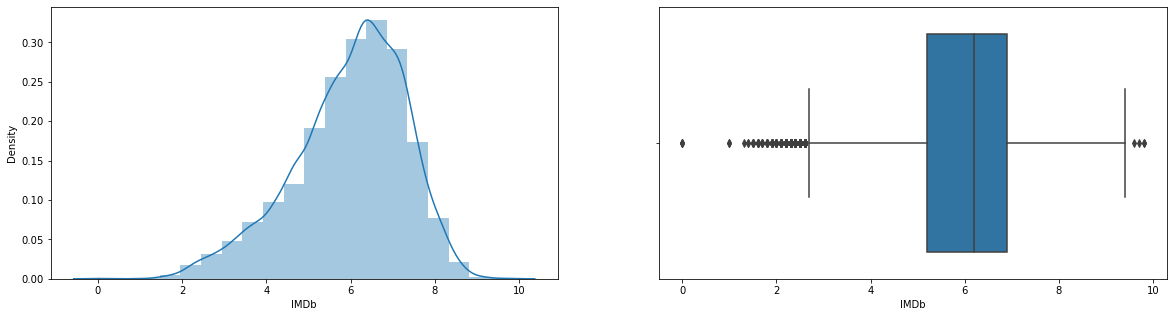

In [ ]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(df_movies_imdb['IMDb'],bins = 20, kde = True, ax = ax[0])
sns.boxplot(df_movies_imdb['IMDb'], ax = ax[1])
plt.show()

In [ ]:
# Creating distinct dataframes only with the movies present on individual streaming platforms
netflix_imdb_movies = df_movies_imdb.loc[df_movies_imdb['Netflix'] == 1]
hulu_imdb_movies = df_movies_imdb.loc[df_movies_imdb['Hulu'] == 1]
prime_video_imdb_movies = df_movies_imdb.loc[df_movies_imdb['Prime Video'] == 1]
disney_imdb_movies = df_movies_imdb.loc[df_movies_imdb['Disney+'] == 1]

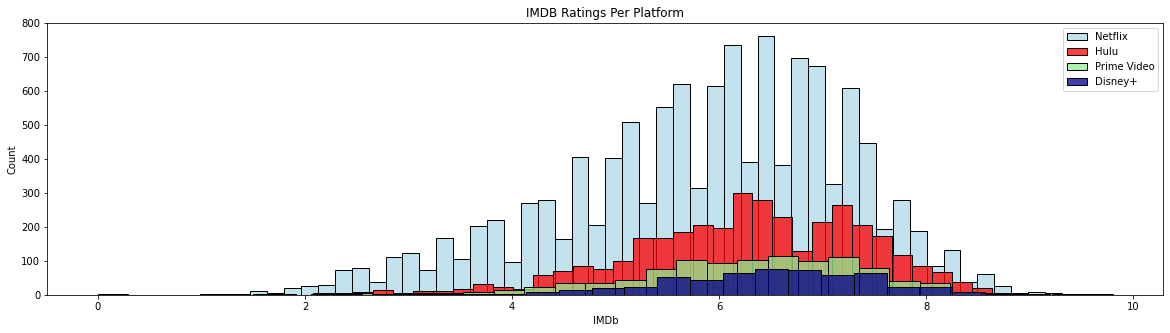

In [ ]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('IMDB Ratings Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.histplot(prime_video_imdb_movies['IMDb'], color = 'lightblue', legend = True, kde = False)
sns.histplot(netflix_imdb_movies['IMDb'], color = 'red', legend = True, kde = False)
sns.histplot(hulu_imdb_movies['IMDb'], color = 'lightgreen', legend = True, kde = False)
sns.histplot(disney_imdb_movies['IMDb'], color = 'darkblue', legend = True, kde = False) 
 
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

In [ ]:
print(f'''
      The TV Show with Highest IMDb Rating Ever Got is '{df_imdb_high_movies['Title'][0]}' : '{df_imdb_high_movies['IMDb'].max()}'\n
      The TV Show with Lowest IMDb Rating Ever Got is '{df_imdb_low_movies['Title'][0]}' : '{df_imdb_low_movies['IMDb'].min()}'\n
      
      The TV Show with Highest IMDb Rating on 'Netflix' is '{netflix_imdb_high_movies['Title'][0]}' : '{netflix_imdb_high_movies['IMDb'].max()}'\n
      The TV Show with Lowest IMDb Rating on 'Netflix' is '{netflix_imdb_low_movies['Title'][0]}' : '{netflix_imdb_low_movies['IMDb'].min()}'\n
      
      The TV Show with Highest IMDb Rating on 'Hulu' is '{hulu_imdb_high_movies['Title'][0]}' : '{hulu_imdb_high_movies['IMDb'].max()}'\n
      The TV Show with Lowest IMDb Rating on 'Hulu' is '{hulu_imdb_low_movies['Title'][0]}' : '{hulu_imdb_low_movies['IMDb'].min()}'\n
      
      The TV Show with Highest IMDb Rating on 'Prime Video' is '{prime_video_imdb_high_movies['Title'][0]}' : '{prime_video_imdb_high_movies['IMDb'].max()}'\n
      The TV Show with Lowest IMDb Rating on 'Prime Video' is '{prime_video_imdb_low_movies['Title'][0]}' : '{prime_video_imdb_low_movies['IMDb'].min()}'\n
      
      The TV Show with Highest IMDb Rating on 'Disney+' is '{disney_imdb_high_movies['Title'][0]}' : '{disney_imdb_high_movies['IMDb'].max()}'\n
      The TV Show with Lowest IMDb Rating on 'Disney+' is '{disney_imdb_low_movies['Title'][0]}' : '{disney_imdb_low_movies['IMDb'].min()}'\n 
      ''')


      The TV Show with Highest IMDb Rating Ever Got is 'Ostatni ludzie Czarnobyla' : '9.8'

      The TV Show with Lowest IMDb Rating Ever Got is 'In Memoriam Alexander Litvinenko' : '0.0'

      
      The TV Show with Highest IMDb Rating on 'Netflix' is 'God of War' : '9.6'

      The TV Show with Lowest IMDb Rating on 'Netflix' is 'Aerials' : '1.5'

      
      The TV Show with Highest IMDb Rating on 'Hulu' is 'Almost Impossible' : '9.7'

      The TV Show with Lowest IMDb Rating on 'Hulu' is '9/11: 15 years later' : '0.0'

      
      The TV Show with Highest IMDb Rating on 'Prime Video' is 'Ostatni ludzie Czarnobyla' : '9.8'

      The TV Show with Lowest IMDb Rating on 'Prime Video' is 'In Memoriam Alexander Litvinenko' : '0.0'

      
      The TV Show with Highest IMDb Rating on 'Disney+' is 'Marvel's Spider-Man' : '9.2'

      The TV Show with Lowest IMDb Rating on 'Disney+' is 'Jonas Brothers: The Concert Experience' : '1.6'
 
      


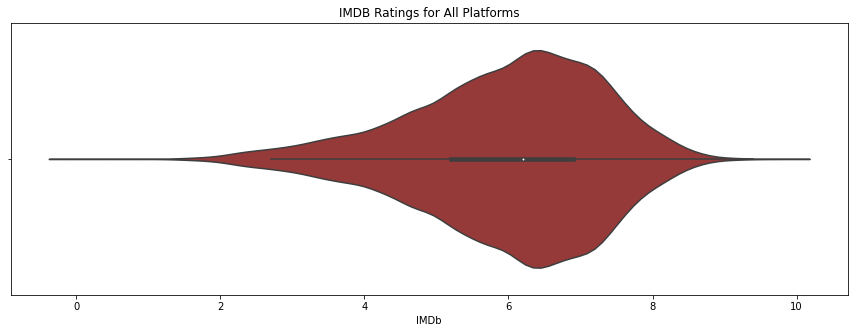

In [ ]:
# Distribution of tvshow rating in each platform
plt.figure(figsize = (15, 5))
plt.title('IMDB Ratings for All Platforms')
sns.violinplot(x = df_movies_imdb['IMDb'], color = 'brown', legend = True, kde = True, shade = False)
plt.show()

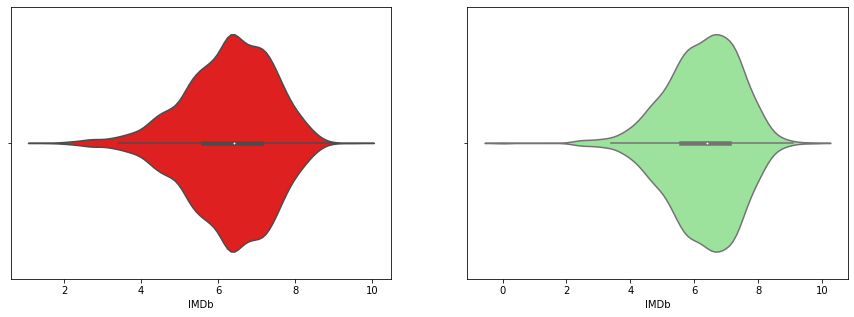

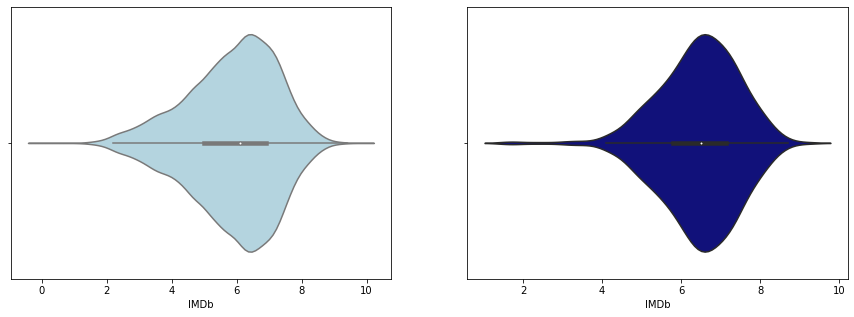

In [ ]:
# Distribution of tvshow rating in each platform
f1, ax1 = plt.subplots(1, 2 , figsize = (15, 5))
sns.violinplot(x = netflix_imdb_movies['IMDb'], color = 'red', ax = ax1[0])
sns.violinplot(x = hulu_imdb_movies['IMDb'], color = 'lightgreen', ax = ax1[1])
 
f2, ax2 = plt.subplots(1, 2 , figsize = (15, 5))
sns.violinplot(x = prime_video_imdb_movies['IMDb'], color = 'lightblue', ax = ax2[0])
sns.violinplot(x = disney_imdb_movies['IMDb'], color = 'darkblue', ax = ax2[1])
plt.show()

In [ ]:
print(f'''
      Accross All Platforms the Average IMDb Rating is '{round(df_movies_imdb['IMDb'].mean(), ndigits = 2)}'\n
      The Average IMDb Rating on 'Netflix' is '{round(netflix_imdb_movies['IMDb'].mean(), ndigits = 2)}'\n
      The Average IMDb Rating on 'Hulu' is '{round(hulu_imdb_movies['IMDb'].mean(), ndigits = 2)}'\n
      The Average IMDb Rating on 'Prime Video' is '{round(prime_video_imdb_movies['IMDb'].mean(), ndigits = 2)}'\n
      The Average IMDb Rating on 'Disney+' is '{round(disney_imdb_movies['IMDb'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average IMDb Rating is '5.98'

      The Average IMDb Rating on 'Netflix' is '6.28'

      The Average IMDb Rating on 'Hulu' is '6.28'

      The Average IMDb Rating on 'Prime Video' is '5.86'

      The Average IMDb Rating on 'Disney+' is '6.44'
 
      


In [ ]:
def round_val(data):
    if str(data) != 'nan':
        return round(data)
    
df_movies_imdb['IMDB Group'] = df_movies_imdb['IMDb'].apply(round_val)
 
imdb_values = df_movies_imdb['IMDB Group'].value_counts().sort_index(ascending = False).tolist()
imdb_index = df_movies_imdb['IMDB Group'].value_counts().sort_index(ascending = False).index
 
imdb_values, imdb_index

([4, 94, 1771, 4286, 5328, 2692, 1586, 606, 220, 5, 3],
 Int64Index([10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0], dtype='int64'))

In [ ]:
imdb_group_count = df_movies_imdb.groupby('IMDB Group')['Title'].count()
imdb_group_tvshow = df_movies_imdb.groupby('IMDB Group')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
imdb_group_data_movies = pd.concat([imdb_group_count, imdb_group_tvshow], axis = 1).reset_index().rename(columns = {'Title' : 'Movies Count'})
imdb_group_data_movies = imdb_group_data_movies.sort_values(by = 'Movies Count', ascending = False)

In [ ]:
# IMDB Group with Movies Counts - All Platforms Combined
imdb_group_data_movies.sort_values(by = 'Movies Count', ascending = False)

IMDB Group  Movies Count  Netflix  Hulu  Prime Video  Disney+
6            6          5328     1253   353         3742      201
7            7          4286     1040   323         2924      188
5            5          2692      509   157         2040       71
8            8          1771      489   134         1156       78
4            4          1586      216    57         1337       13
3            3           606       47    11          555        3
2            2           220       13     4          204        3
9            9            94       14     8           76        3
1            1             5        0     0            5        0
10          10             4        1     1            2        0
0            0             3        0     1            2        0

In [ ]:
imdb_group_data_movies.sort_values(by = 'IMDB Group', ascending = False)

IMDB Group  Movies Count  Netflix  Hulu  Prime Video  Disney+
10          10             4        1     1            2        0
9            9            94       14     8           76        3
8            8          1771      489   134         1156       78
7            7          4286     1040   323         2924      188
6            6          5328     1253   353         3742      201
5            5          2692      509   157         2040       71
4            4          1586      216    57         1337       13
3            3           606       47    11          555        3
2            2           220       13     4          204        3
1            1             5        0     0            5        0
0            0             3        0     1            2        0

In [ ]:
# IMDb with Movies Counts - All Platforms Combined
imdb_group_data_movies.sort_values(by = 'Movies Count', ascending = False)[:10]
 
df_imdb_group_high_movies = imdb_group_data_movies.sort_values(by = 'Movies Count', ascending = False).reset_index()
df_imdb_group_high_movies = df_imdb_group_high_movies.drop(['index'], axis = 1)
# filter = (imdb_group_data_movies['Movies Count'] ==  (imdb_group_data_movies['Movies Count'].max()))
# df_imdb_group_high_movies = imdb_group_data_movies[filter]
 
# highest_rated_tvshow = imdb_group_data_movies.loc[imdb_group_data_movies['Movies Count'].idxmax()]
 
# print('\nIMDb with Highest Ever Movies Count are : All Platforms Combined\n')
# df_imdb_group_high_movies.head(5)
 
df_imdb_group_low_movies = imdb_group_data_movies.sort_values(by = 'Movies Count', ascending = True).reset_index()
df_imdb_group_low_movies = df_imdb_group_low_movies.drop(['index'], axis = 1)
# filter = (imdb_group_data_movies['Movies Count'] = =  (imdb_group_data_movies['Movies Count'].min()))
# df_imdb_group_low_movies = imdb_group_data_movies[filter]
 
# print('\nIMDb with Lowest Ever Movies Count are : All Platforms Combined\n')
# df_imdb_group_low_movies.head(5)

In [ ]:
print(f'''
      Total '{df_movies_imdb['IMDB Group'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see Movies from Total '{imdb_group_data_movies['IMDB Group'].unique().shape[0]}' IMDB Group, They were Like this, \n
 
      {imdb_group_data_movies.sort_values(by = 'Movies Count', ascending = False)['IMDB Group'].unique()} etc. \n
 
      The IMDB Group with Highest Movies Count have '{imdb_group_data_movies['Movies Count'].max()}' Movies Available is '{df_imdb_group_high_movies['IMDB Group'][0]}', &\n
      The IMDB Group with Lowest Movies Count have '{imdb_group_data_movies['Movies Count'].min()}' Movies Available is '{df_imdb_group_low_movies['IMDB Group'][0]}'
      ''')


      Total '16595' Titles are available on All Platforms, out of which

      You Can Choose to see Movies from Total '11' IMDB Group, They were Like this, 

 
      [ 6  7  5  8  4  3  2  9  1 10  0] etc. 

 
      The IMDB Group with Highest Movies Count have '5328' Movies Available is '6', &

      The IMDB Group with Lowest Movies Count have '3' Movies Available is '0'
      


In [ ]:
fig = px.pie(imdb_group_data_movies[:10], names = 'IMDB Group', values = 'Movies Count')
fig.update_traces(textinfo = 'percent+label', title = 'Movies Count based on IMDB Group s')
fig.show()

In [ ]:
netflix_imdb_group_movies = imdb_group_data_movies[imdb_group_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_imdb_group_movies = netflix_imdb_group_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
netflix_imdb_group_high_movies = df_imdb_group_high_movies.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_imdb_group_high_movies = netflix_imdb_group_high_movies.drop(['index'], axis = 1)
 
netflix_imdb_group_low_movies = df_imdb_group_high_movies.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_imdb_group_low_movies = netflix_imdb_group_low_movies.drop(['index'], axis = 1)
 
netflix_imdb_group_high_movies.head(5)

IMDB Group  Movies Count  Netflix  Hulu  Prime Video  Disney+
0           6          5328     1253   353         3742      201
1           7          4286     1040   323         2924      188
2           5          2692      509   157         2040       71
3           8          1771      489   134         1156       78
4           4          1586      216    57         1337       13

In [ ]:
hulu_imdb_group_movies = imdb_group_data_movies[imdb_group_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_imdb_group_movies = hulu_imdb_group_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
hulu_imdb_group_high_movies = df_imdb_group_high_movies.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_imdb_group_high_movies = hulu_imdb_group_high_movies.drop(['index'], axis = 1)
 
hulu_imdb_group_low_movies = df_imdb_group_high_movies.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_imdb_group_low_movies = hulu_imdb_group_low_movies.drop(['index'], axis = 1)
 
hulu_imdb_group_high_movies.head(5)

IMDB Group  Movies Count  Netflix  Hulu  Prime Video  Disney+
0           6          5328     1253   353         3742      201
1           7          4286     1040   323         2924      188
2           5          2692      509   157         2040       71
3           8          1771      489   134         1156       78
4           4          1586      216    57         1337       13

In [ ]:
prime_video_imdb_group_movies = imdb_group_data_movies[imdb_group_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_imdb_group_movies = prime_video_imdb_group_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)
 
prime_video_imdb_group_high_movies = df_imdb_group_high_movies.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_imdb_group_high_movies = prime_video_imdb_group_high_movies.drop(['index'], axis = 1)
 
prime_video_imdb_group_low_movies = df_imdb_group_high_movies.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_imdb_group_low_movies = prime_video_imdb_group_low_movies.drop(['index'], axis = 1)
 
prime_video_imdb_group_high_movies.head(5)

IMDB Group  Movies Count  Netflix  Hulu  Prime Video  Disney+
0           6          5328     1253   353         3742      201
1           7          4286     1040   323         2924      188
2           5          2692      509   157         2040       71
3           4          1586      216    57         1337       13
4           8          1771      489   134         1156       78

In [ ]:
disney_imdb_group_movies = imdb_group_data_movies[imdb_group_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_imdb_group_movies = disney_imdb_group_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)
 
disney_imdb_group_high_movies = df_imdb_group_high_movies.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_imdb_group_high_movies = disney_imdb_group_high_movies.drop(['index'], axis = 1)
 
disney_imdb_group_low_movies = df_imdb_group_high_movies.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_imdb_group_low_movies = disney_imdb_group_low_movies.drop(['index'], axis = 1)
 
disney_imdb_group_high_movies.head(5)

IMDB Group  Movies Count  Netflix  Hulu  Prime Video  Disney+
0           6          5328     1253   353         3742      201
1           7          4286     1040   323         2924      188
2           8          1771      489   134         1156       78
3           5          2692      509   157         2040       71
4           4          1586      216    57         1337       13

In [ ]:
print(f'''
      The IMDB Group with Highest Movies Count Ever Got is '{df_imdb_group_high_movies['IMDB Group'][0]}' : '{df_imdb_group_high_movies['Movies Count'].max()}'\n
      The IMDB Group with Lowest Movies Count Ever Got is '{df_imdb_group_low_movies['IMDB Group'][0]}' : '{df_imdb_group_low_movies['Movies Count'].min()}'\n
      
      The IMDB Group with Highest Movies Count on 'Netflix' is '{netflix_imdb_group_high_movies['IMDB Group'][0]}' : '{netflix_imdb_group_high_movies['Netflix'].max()}'\n
      The IMDB Group with Lowest Movies Count on 'Netflix' is '{netflix_imdb_group_low_movies['IMDB Group'][0]}' : '{netflix_imdb_group_low_movies['Netflix'].min()}'\n
      
      The IMDB Group with Highest Movies Count on 'Hulu' is '{hulu_imdb_group_high_movies['IMDB Group'][0]}' : '{hulu_imdb_group_high_movies['Hulu'].max()}'\n
      The IMDB Group with Lowest Movies Count on 'Hulu' is '{hulu_imdb_group_low_movies['IMDB Group'][0]}' : '{hulu_imdb_group_low_movies['Hulu'].min()}'\n
      
      The IMDB Group with Highest Movies Count on 'Prime Video' is '{prime_video_imdb_group_high_movies['IMDB Group'][0]}' : '{prime_video_imdb_group_high_movies['Prime Video'].max()}'\n
      The IMDB Group with Lowest Movies Count on 'Prime Video' is '{prime_video_imdb_group_low_movies['IMDB Group'][0]}' : '{prime_video_imdb_group_low_movies['Prime Video'].min()}'\n
      
      The IMDB Group with Highest Movies Count on 'Disney+' is '{disney_imdb_group_high_movies['IMDB Group'][0]}' : '{disney_imdb_group_high_movies['Disney+'].max()}'\n
      The IMDB Group with Lowest Movies Count on 'Disney+' is '{disney_imdb_group_low_movies['IMDB Group'][0]}' : '{disney_imdb_group_low_movies['Disney+'].min()}'\n 
      ''')


      The IMDB Group with Highest Movies Count Ever Got is '6' : '5328'

      The IMDB Group with Lowest Movies Count Ever Got is '0' : '3'

      
      The IMDB Group with Highest Movies Count on 'Netflix' is '6' : '1253'

      The IMDB Group with Lowest Movies Count on 'Netflix' is '1' : '0'

      
      The IMDB Group with Highest Movies Count on 'Hulu' is '6' : '353'

      The IMDB Group with Lowest Movies Count on 'Hulu' is '1' : '0'

      
      The IMDB Group with Highest Movies Count on 'Prime Video' is '6' : '3742'

      The IMDB Group with Lowest Movies Count on 'Prime Video' is '10' : '2'

      
      The IMDB Group with Highest Movies Count on 'Disney+' is '6' : '201'

      The IMDB Group with Lowest Movies Count on 'Disney+' is '1' : '0'
 
      


In [ ]:
print(f'''
      Accross All Platforms the Averimdb_group Movies Count of IMDB Group is '{round(imdb_group_data_movies['Movies Count'].mean(), ndigits = 2)}'\n
      The Average imdb_group Movies Count of IMDB Group on 'Netflix' is '{round(netflix_imdb_group_movies['Netflix'].mean(), ndigits = 2)}'\n
      The Average imdb_group Movies Count of IMDB Group on 'Hulu' is '{round(hulu_imdb_group_movies['Hulu'].mean(), ndigits = 2)}'\n
      The Average imdb_group Movies Count of IMDB Group on 'Prime Video' is '{round(prime_video_imdb_group_movies['Prime Video'].mean(), ndigits = 2)}'\n
      The Average imdb_group Movies Count of IMDB Group on 'Disney+' is '{round(disney_imdb_group_movies['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Averimdb_group Movies Count of IMDB Group is '1508.64'

      The Average imdb_group Movies Count of IMDB Group on 'Netflix' is '398.0'

      The Average imdb_group Movies Count of IMDB Group on 'Hulu' is '104.9'

      The Average imdb_group Movies Count of IMDB Group on 'Prime Video' is '1094.82'

      The Average imdb_group Movies Count of IMDB Group on 'Disney+' is '70.0'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of IMDB Group is '{imdb_group_data_movies['IMDB Group'].unique().shape[0]}'\n
      Total Count of IMDB Group on 'Netflix' is '{netflix_imdb_group_movies['IMDB Group'].unique().shape[0]}'\n
      Total Count of IMDB Group on 'Hulu' is '{hulu_imdb_group_movies['IMDB Group'].unique().shape[0]}'\n
      Total Count of IMDB Group on 'Prime Video' is '{prime_video_imdb_group_movies['IMDB Group'].unique().shape[0]}'\n
      Total Count of IMDB Group on 'Disney+' is '{disney_imdb_group_movies['IMDB Group'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of IMDB Group is '11'

      Total Count of IMDB Group on 'Netflix' is '9'

      Total Count of IMDB Group on 'Hulu' is '10'

      Total Count of IMDB Group on 'Prime Video' is '11'

      Total Count of IMDB Group on 'Disney+' is '8'
 
      


In [ ]:
fig = px.bar(x = imdb_group_data_movies['IMDB Group'], y = imdb_group_data_movies['Movies Count'], 
             color = imdb_group_data_movies['Movies Count'], color_continuous_scale = 'Teal_r', 
             labels = { 'x' : 'IMDB Group', 'y' : 'Number of Movies'})
fig.show()

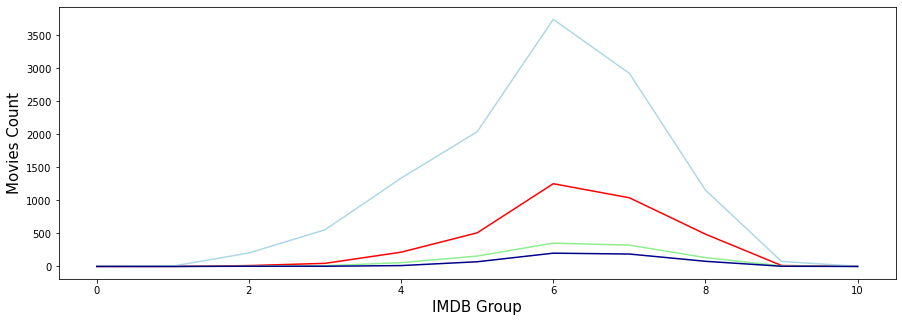

In [ ]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = imdb_group_data_movies['IMDB Group'], y = imdb_group_data_movies['Netflix'], color = 'red')
sns.lineplot(x = imdb_group_data_movies['IMDB Group'], y = imdb_group_data_movies['Hulu'], color = 'lightgreen')
sns.lineplot(x = imdb_group_data_movies['IMDB Group'], y = imdb_group_data_movies['Prime Video'], color = 'lightblue')
sns.lineplot(x = imdb_group_data_movies['IMDB Group'], y = imdb_group_data_movies['Disney+'], color = 'darkblue')
plt.xlabel('IMDB Group', fontsize = 15)
plt.ylabel('Movies Count', fontsize = 15)
plt.show()

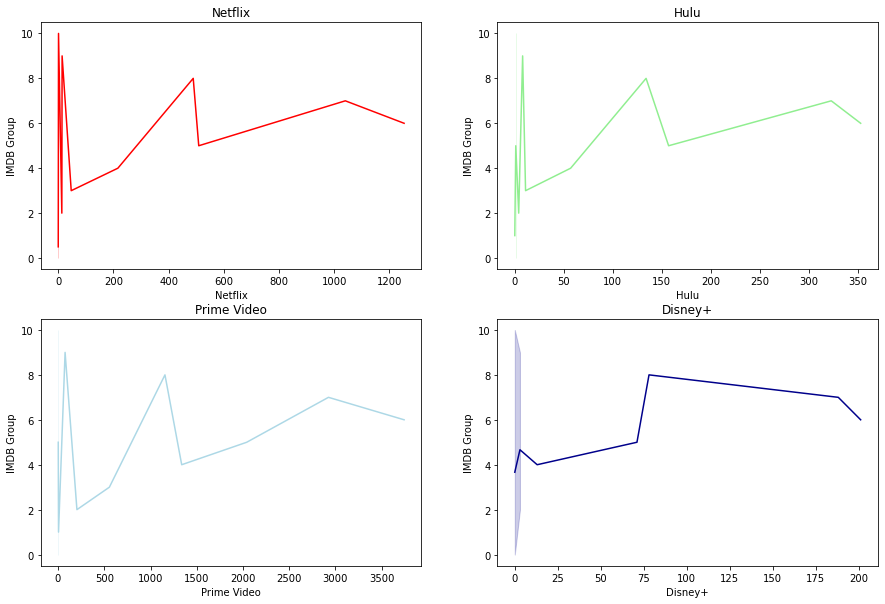

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15 , 10))
 
n_i_ax1 = sns.lineplot(y = imdb_group_data_movies['IMDB Group'], x = imdb_group_data_movies['Netflix'], color = 'red', ax = axes[0, 0])
h_i_ax2 = sns.lineplot(y = imdb_group_data_movies['IMDB Group'], x = imdb_group_data_movies['Hulu'], color = 'lightgreen', ax = axes[0, 1])
p_i_ax3 = sns.lineplot(y = imdb_group_data_movies['IMDB Group'], x = imdb_group_data_movies['Prime Video'], color = 'lightblue', ax = axes[1, 0])
d_i_ax4 = sns.lineplot(y = imdb_group_data_movies['IMDB Group'], x = imdb_group_data_movies['Disney+'], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_i_ax1.title.set_text(labels[0])
h_i_ax2.title.set_text(labels[1])
p_i_ax3.title.set_text(labels[2])
d_i_ax4.title.set_text(labels[3])
 
plt.show()

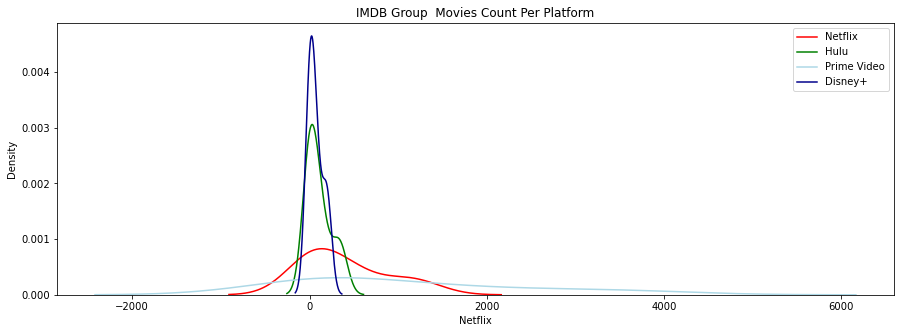

In [ ]:
# Defining plot size and title
plt.figure(figsize = (15, 5))
plt.title('IMDB Group  Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_imdb_group_movies['Netflix'], color = 'red', legend = True)
sns.kdeplot(hulu_imdb_group_movies['Hulu'], color = 'green', legend = True)
sns.kdeplot(prime_video_imdb_group_movies['Prime Video'], color = 'lightblue', legend = True)
sns.kdeplot(disney_imdb_group_movies['Disney+'], color = 'darkblue', legend = True)                                      
                                      
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

In [ ]:
df_movies_roto = df_movies.copy()

In [ ]:
df_movies_roto.drop(df_movies_roto.loc[df_movies_roto['Rotten Tomatoes'] == "NA"].index, inplace = True)
# df_movies_roto = df_movies_roto[df_movies_roto.Rotten Tomatoes != "NA"]
df_movies_roto['Rotten Tomatoes'] = df_movies_roto['Rotten Tomatoes'].astype(int)

In [ ]:
df_roto_high_movies = df_movies_roto.sort_values(by = 'Rotten Tomatoes', ascending = False).reset_index()
df_roto_high_movies = df_roto_high_movies.drop(['index'], axis = 1)
# filter = (df_movies_roto['Rotten Tomatoes'] == (df_movies_roto['Rotten Tomatoes'].max()))
# df_roto_high_movies = df_movies_roto[filter]
 
# highest_rated_tvshow = df_movies_roto.loc[df_movies_roto['Rotten Tomatoes'].idxmax()]
 
print('\nMovies with Highest Ever Rotten Tomatoes Rating are : \n')
df_roto_high_movies.head(5)


Movies with Highest Ever Rotten Tomatoes Rating are : 



ID              Title  Year Age IMDb  Rotten Tomatoes  \
0  4561             Pyaasa  1957  NR  8.5              100   
1  4405  My Name Is Nobody  1973   7  7.5              100   
2  5255      Racing Dreams  2010   7    7              100   
3  5259      Shoot to Kill  1988  16  6.8              100   
4   412      Ice Guardians  2016  NR  7.5              100   

            Directors                                               Cast  \
0           Guru Dutt  Guru Dutt,Waheeda Rehman,Mala Sinha,Rehman,Joh...   
1      Tonino Valerii  Terence Hill,Henry Fonda,Jean Martin,R.G. Arms...   
2      Marshall Curry  Annabeth Barnes,Josh Hobson,Brandon Warren,Rus...   
3  Roger Spottiswoode  Sidney Poitier,Tom Berenger,Kirstie Alley,Clan...   
4        Brett Harvey  Jay Baruchel,Jarome Iginla,Chris Chelios,Brett...   

                                  Genres                       Country  \
0                  Drama,Musical,Romance                         India   
1                         Comedy,Western     Italy,France,West Germany   
2                      Documentary,Sport                 United States   
3  Action,Adventure,Crime,Drama,Thriller          United States,Canada   
4                      Documentary,Sport  Canada,Ireland,United States   

  Language                                           Plotline Runtime   Kind  \
0    Hindi  Unemployed Vijay is the youngest in his family...     146  movie   
1  Italian  Jack Beauregard, once the greatest gunslinger ...     116  movie   
2  English  Sidney Poitier returned to the big screen in t...      93  movie   
3  English  Down on his luck and perpetually impecunious, ...     110  movie   
4  English                                                 NA     108  movie   

   Netflix  Hulu  Prime Video  Disney+  Type Service Provider  
0        0     0            1        0     0      Prime Video  
1        0     0            1        0     0      Prime Video  
2        0     0            1        0     0      Prime Video  
3        0     0            1        0     0      Prime Video  
4        1     0            0        0     0          Netflix

In [ ]:
df_roto_low_movies = df_movies_roto.sort_values(by = 'Rotten Tomatoes', ascending = True).reset_index()
df_roto_low_movies = df_roto_low_movies.drop(['index'], axis = 1)
# filter = (df_movies_roto['Rotten Tomatoes'] == (df_movies_roto['Rotten Tomatoes'].min()))
# df_roto_low_movies = df_movies_roto[filter]
 
print('\nMovies with Lowest Ever Rotten Tomatoes Rating are : \n')
df_roto_low_movies.head(5)


Movies with Lowest Ever Rotten Tomatoes Rating are : 



ID             Title  Year Age IMDb  Rotten Tomatoes          Directors  \
0  2015         Term Life  2016  16  5.6                0  Peter Billingsley   
1  8168       Speed Kills  2018  16  4.3                0     Jodi Scurfield   
2  3331        John Henry  2020  16  3.5                0        Will Forbes   
3  1422  The Coldest Game  2019  18  6.2                0    Lukasz Kosmicki   
4  9800    Shadows & Lies  2010  16  4.3                0         Jay Anania   

                                                Cast  \
0  Vince Vaughn,Hailee Steinfeld,Bill Paxton,Jona...   
1  John Travolta,Katheryn Winnick,Jennifer Esposi...   
2  Terry Crews,Jamila Velazquez,Ludacris,Ken Fore...   
3  Bill Pullman,Lotte Verbeek,James Bloor,Robert ...   
4  James Franco,Julianne Nicholson,Martin Donovan...   

                        Genres                    Country         Language  \
0  Action,Crime,Drama,Thriller              United States          English   
1  Action,Crime,Drama,Thriller  Puerto Rico,United States  English,Spanish   
2               Drama,Thriller              United States          English   
3       History,Sport,Thriller       Poland,United States  English,Russian   
4                  Crime,Drama              United States          English   

                                            Plotline Runtime   Kind  Netflix  \
0                                                 NA      93  movie        1   
1                                                 NA     102  movie        0   
2  Ex-gang member John Henry (Terry Crews) is a q...      91  movie        1   
3  Playing a major chess match in Warsaw against ...     102  movie        1   
4                                                 NA     100  movie        0   

   Hulu  Prime Video  Disney+  Type Service Provider  
0     0            0        0     0          Netflix  
1     0            1        0     0      Prime Video  
2     0            0        0     0          Netflix  
3     0            0        0     0          Netflix  
4     0            1        0     0      Prime Video

In [ ]:
print(f'''
      Total '{df_movies_roto['Rotten Tomatoes'].unique().shape[0]}' unique Rotten Tomatoes Ratings were Given, They were Like this,\n
      
{df_movies_roto.sort_values(by = 'Rotten Tomatoes', ascending = False)['Rotten Tomatoes'].unique()}\n
 
      The Highest Ever Rotten Tomatoes Rating Ever Any TV Show Got is '{df_roto_high_movies['Title'][0]}' : '{df_roto_high_movies['Rotten Tomatoes'].max()}'\n
 
      The Lowest Ever Rotten Tomatoes Rating Ever Any TV Show Got is '{df_roto_low_movies['Title'][0]}' : '{df_roto_low_movies['Rotten Tomatoes'].min()}'\n
      ''')


      Total '101' unique Rotten Tomatoes Ratings were Given, They were Like this,

      
[100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83
  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47
  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31  30  29
  28  27  26  25  24  23  22  21  20  19  18  17  16  15  14  13  12  11
  10   9   8   7   6   5   4   3   2   1   0]

 
      The Highest Ever Rotten Tomatoes Rating Ever Any TV Show Got is 'Pyaasa' : '100'

 
      The Lowest Ever Rotten Tomatoes Rating Ever Any TV Show Got is 'Term Life' : '0'

      


In [ ]:
netflix_roto_high_movies = df_roto_high_movies.loc[df_roto_high_movies['Netflix']==1].reset_index()
netflix_roto_high_movies = netflix_roto_high_movies.drop(['index'], axis = 1)
 
netflix_roto_low_movies = df_roto_low_movies.loc[df_roto_low_movies['Netflix']==1].reset_index()
netflix_roto_low_movies = netflix_roto_low_movies.drop(['index'], axis = 1)
 
netflix_roto_high_movies.head(5)

ID                            Title  Year Age IMDb  Rotten Tomatoes  \
0   412                    Ice Guardians  2016  NR  7.5              100   
1  2340          Maria Bamford: Old Baby  2017  18    6              100   
2   946                            07:19  2016  NR  5.9              100   
3   421                         Shirkers  2018  NR  7.4              100   
4   970  Restless Creature: Wendy Whelan  2017  NR  7.1              100   

                        Directors  \
0                    Brett Harvey   
1                      Jessica Yu   
2               Jorge Michel Grau   
3                       Sandi Tan   
4  Linda Saffire,Adam Schlesinger   

                                                Cast              Genres  \
0  Jay Baruchel,Jarome Iginla,Chris Chelios,Brett...   Documentary,Sport   
1  Maria Bamford,Rhea Butcher,Alex Blue Davis,Mel...  Documentary,Comedy   
2  Carmen Beato,Demián Bichir,Héctor Bonilla,Octa...       Drama,History   
3  Sandi Tan,Jasmine Kin Kia Ng,Philip Cheah,Soph...         Documentary   
4           Peter Martins,David Prottas,Wendy Whelan         Documentary   

                        Country Language  \
0  Canada,Ireland,United States  English   
1                 United States  English   
2                        Mexico  Spanish   
3  United States,United Kingdom  English   
4                 United States  English   

                                            Plotline Runtime   Kind  Netflix  \
0                                                 NA     108  movie        1   
1                                                 NA      64  movie        1   
2  Martin and Fernando are at the reception of th...      94  movie        1   
3  In 1992, teenager Sandi Tan and her friends So...      97  movie        1   
4                                                 NA      90  movie        1   

   Hulu  Prime Video  Disney+  Type Service Provider  
0     0            0        0     0          Netflix  
1     0            0        0     0          Netflix  
2     0            0        0     0          Netflix  
3     0            0        0     0          Netflix  
4     0            0        0     0          Netflix

In [ ]:
hulu_roto_high_movies = df_roto_high_movies.loc[df_roto_high_movies['Hulu']==1].reset_index()
hulu_roto_high_movies = hulu_roto_high_movies.drop(['index'], axis = 1)
 
hulu_roto_low_movies = df_roto_low_movies.loc[df_roto_low_movies['Hulu']==1].reset_index()
hulu_roto_low_movies = hulu_roto_low_movies.drop(['index'], axis = 1)
 
hulu_roto_high_movies.head(5)

ID                      Title  Year Age IMDb  Rotten Tomatoes  \
0  3665  After the Screaming Stops  2018  18  7.2              100   
1  3638  Andy Irons: Kissed by God  2018  NR  8.2              100   
2  3656                       Burn  2012  16  5.7              100   
3  3739             Food Evolution  2017   7    7              100   
4  3741                    The Den  2013  16    6              100   

                   Directors  \
0  Joe Pearlman,David Soutar   
1     Steve Jones,Todd Jones   
2                   Mike Gan   
3     Scott Hamilton Kennedy   
4            Zachary Donohue   

                                                Cast                   Genres  \
0  Luke Goss,Matt Goss,Ron Perlman,Robin Antin,Ge...        Documentary,Music   
1              Bruce Irons,Lyndie Irons,Kelly Slater              Documentary   
2  Tilda Cobham-Hervey,Josh Hutcherson,Suki Water...    Comedy,Crime,Thriller   
3  Raoul Adamchak,Charles Benbrook,Karl Haro von ...              Documentary   
4  Melanie Papalia,David Schlachtenhaufen,Adam Sh...  Horror,Mystery,Thriller   

          Country Language                                           Plotline  \
0  United Kingdom  English  In the 1980s, "Bros" were one of the biggest b...   
1   United States  English  A film about bipolar disorder and opioid addic...   
2   United States  English                                                 NA   
3   United States  English  Food Evolution looks at one of the most critic...   
4   United States  English  A young woman studying the habits of webcam ch...   

  Runtime   Kind  Netflix  Hulu  Prime Video  Disney+  Type Service Provider  
0      98  movie        0     1            0        0     0             Hulu  
1     100  movie        0     1            1        0     0      Prime Video  
2      88  movie        0     1            1        0     0      Prime Video  
3      92  movie        0     1            0        0     0             Hulu  
4      76  movie        0     1            0        0     0             Hulu

In [ ]:
prime_video_roto_high_movies = df_roto_high_movies.loc[df_roto_high_movies['Prime Video']==1].reset_index()
prime_video_roto_high_movies = prime_video_roto_high_movies.drop(['index'], axis = 1)
 
prime_video_roto_low_movies = df_roto_low_movies.loc[df_roto_low_movies['Prime Video']==1].reset_index()
prime_video_roto_low_movies = prime_video_roto_low_movies.drop(['index'], axis = 1)
 
prime_video_roto_high_movies.head(5)

ID              Title  Year Age IMDb  Rotten Tomatoes  \
0   4561             Pyaasa  1957  NR  8.5              100   
1   4405  My Name Is Nobody  1973   7  7.5              100   
2   5255      Racing Dreams  2010   7    7              100   
3   5259      Shoot to Kill  1988  16  6.8              100   
4  10259        The Surface  2015  NR  4.8              100   

            Directors                                               Cast  \
0           Guru Dutt  Guru Dutt,Waheeda Rehman,Mala Sinha,Rehman,Joh...   
1      Tonino Valerii  Terence Hill,Henry Fonda,Jean Martin,R.G. Arms...   
2      Marshall Curry  Annabeth Barnes,Josh Hobson,Brandon Warren,Rus...   
3  Roger Spottiswoode  Sidney Poitier,Tom Berenger,Kirstie Alley,Clan...   
4       Gil Cates Jr.  Sean Astin,Mimi Rogers,Chris Mulkey,John Emmet...   

                                  Genres                    Country Language  \
0                  Drama,Musical,Romance                      India    Hindi   
1                         Comedy,Western  Italy,France,West Germany  Italian   
2                      Documentary,Sport              United States  English   
3  Action,Adventure,Crime,Drama,Thriller       United States,Canada  English   
4                         Drama,Thriller              United States  English   

                                            Plotline Runtime   Kind  Netflix  \
0  Unemployed Vijay is the youngest in his family...     146  movie        0   
1  Jack Beauregard, once the greatest gunslinger ...     116  movie        0   
2  Sidney Poitier returned to the big screen in t...      93  movie        0   
3  Down on his luck and perpetually impecunious, ...     110  movie        0   
4                                                 NA      90  movie        0   

   Hulu  Prime Video  Disney+  Type Service Provider  
0     0            1        0     0      Prime Video  
1     0            1        0     0      Prime Video  
2     0            1        0     0      Prime Video  
3     0            1        0     0      Prime Video  
4     0            1        0     0      Prime Video

In [ ]:
disney_roto_high_movies = df_roto_high_movies.loc[df_roto_high_movies['Disney+']==1].reset_index()
disney_roto_high_movies = disney_roto_high_movies.drop(['index'], axis = 1)
 
disney_roto_low_movies = df_roto_low_movies.loc[df_roto_low_movies['Disney+']==1].reset_index()
disney_roto_low_movies = disney_roto_low_movies.drop(['index'], axis = 1)
 
disney_roto_high_movies.head(5)

ID                                              Title  Year Age IMDb  \
0  15804             The Many Adventures of Winnie the Pooh  1977   0  7.6   
1  15807                           Mickey's Christmas Carol  1983   0    8   
2  15844                                         Old Yeller  1957   0  7.3   
3  15846  Phineas and Ferb the Movie: Across the 2nd Dim...  2011   0  7.4   
4  15858                  Tinker Bell and the Lost Treasure  2009   0  6.7   

   Rotten Tomatoes                                          Directors  \
0              100  John Lounsbery,Wolfgang Reitherman,Ben Sharpsteen   
1              100                                    Burny Mattinson   
2              100                                   Robert Stevenson   
3              100  Robert Hughes,Dan Povenmire,Jay Lender,Jeff 'S...   
4              100                                          Klay Hall   

                                                Cast  \
0  Sebastian Cabot,Junius Matthews,Barbara Luddy,...   
1  Alan Young,Wayne Allwine,Hal Smith,Will Ryan,E...   
2  Dorothy McGuire,Fess Parker,Jeff York,Chuck Co...   
3  Vincent Martella,Ashley Tisdale,Thomas Brodie-...   
4  Mae Whitman,Jesse McCartney,Jane Horrocks,Lucy...   

                                              Genres  \
0          Animation,Adventure,Comedy,Family,Musical   
1              Animation,Short,Comedy,Family,Fantasy   
2                     Adventure,Drama,Family,Western   
3  Animation,Action,Adventure,Comedy,Family,Music...   
4                 Animation,Adventure,Family,Fantasy   

                      Country                          Language  \
0               United States                           English   
1               United States                           English   
2               United States                           English   
3  United States,Taiwan,China  Mandarin,Chinese,Min Nan,English   
4               United States                           English   

                                            Plotline Runtime   Kind  Netflix  \
0  When young Victor's pet dog Sparky (who stars ...      74  movie        0   
1  Sam Flynn, the tech-savvy 27-year-old son of K...      26  movie        0   
2  Two stories. The Wind in the Willows: Concise ...      83  movie        0   
3  During World War II in England, Charlie (Ian W...      78  movie        0   
4  A little girl comes to a town that is embattle...      81  movie        0   

   Hulu  Prime Video  Disney+  Type Service Provider  
0     0            0        1     0          Disney+  
1     0            0        1     0          Disney+  
2     0            0        1     0          Disney+  
3     0            0        1     0          Disney+  
4     0            0        1     0          Disney+

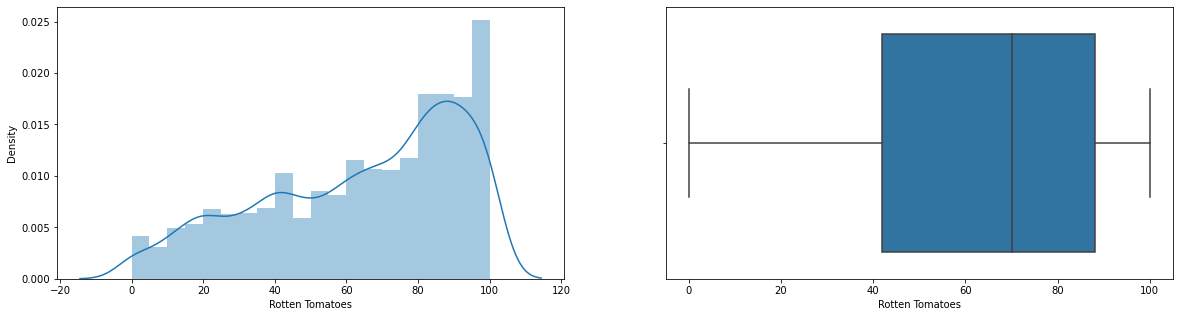

In [ ]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(df_movies_roto['Rotten Tomatoes'],bins = 20, kde = True, ax = ax[0])
sns.boxplot(df_movies_roto['Rotten Tomatoes'], ax = ax[1])
plt.show()

In [ ]:
# Creating distinct dataframes only with the movies present on individual streaming platforms
netflix_roto_movies = df_movies_roto.loc[df_movies_roto['Netflix'] == 1]
hulu_roto_movies = df_movies_roto.loc[df_movies_roto['Hulu'] == 1]
prime_video_roto_movies = df_movies_roto.loc[df_movies_roto['Prime Video'] == 1]
disney_roto_movies = df_movies_roto.loc[df_movies_roto['Disney+'] == 1]

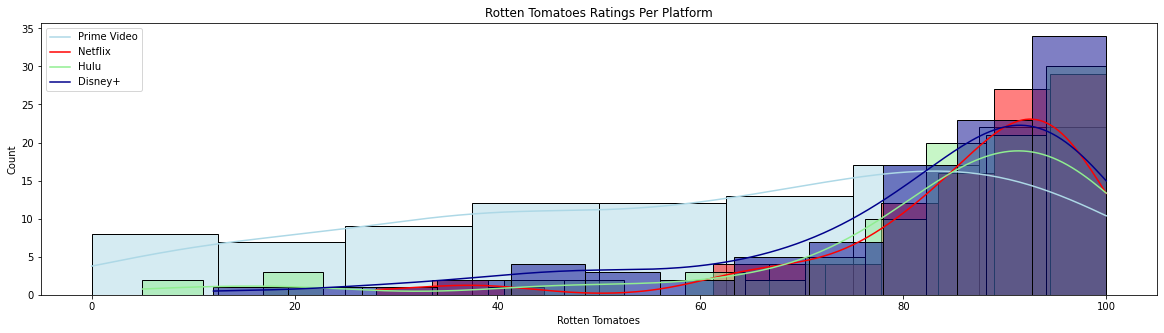

In [ ]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Rotten Tomatoes Ratings Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.histplot(prime_video_roto_movies['Rotten Tomatoes'][:100], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_roto_movies['Rotten Tomatoes'][:100], color = 'red', legend = True, kde = True)
sns.histplot(hulu_roto_movies['Rotten Tomatoes'][:100], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_roto_movies['Rotten Tomatoes'][:100], color = 'darkblue', legend = True, kde = True) 
 
# Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [ ]:
print(f'''
      The TV Show with Highest Rotten Tomatoes Rating Ever Got is '{df_roto_high_movies['Title'][0]}' : '{df_roto_high_movies['Rotten Tomatoes'].max()}'\n
      The TV Show with Lowest Rotten Tomatoes Rating Ever Got is '{df_roto_low_movies['Title'][0]}' : '{df_roto_low_movies['Rotten Tomatoes'].min()}'\n
      
      The TV Show with Highest Rotten Tomatoes Rating on 'Netflix' is '{netflix_roto_high_movies['Title'][0]}' : '{netflix_roto_high_movies['Rotten Tomatoes'].max()}'\n
      The TV Show with Lowest Rotten Tomatoes Rating on 'Netflix' is '{netflix_roto_low_movies['Title'][0]}' : '{netflix_roto_low_movies['Rotten Tomatoes'].min()}'\n
      
      The TV Show with Highest Rotten Tomatoes Rating on 'Hulu' is '{hulu_roto_high_movies['Title'][0]}' : '{hulu_roto_high_movies['Rotten Tomatoes'].max()}'\n
      The TV Show with Lowest Rotten Tomatoes Rating on 'Hulu' is '{hulu_roto_low_movies['Title'][0]}' : '{hulu_roto_low_movies['Rotten Tomatoes'].min()}'\n
      
      The TV Show with Highest Rotten Tomatoes Rating on 'Prime Video' is '{prime_video_roto_high_movies['Title'][0]}' : '{prime_video_roto_high_movies['Rotten Tomatoes'].max()}'\n
      The TV Show with Lowest Rotten Tomatoes Rating on 'Prime Video' is '{prime_video_roto_low_movies['Title'][0]}' : '{prime_video_roto_low_movies['Rotten Tomatoes'].min()}'\n
      
      The TV Show with Highest Rotten Tomatoes Rating on 'Disney+' is '{disney_roto_high_movies['Title'][0]}' : '{disney_roto_high_movies['Rotten Tomatoes'].max()}'\n
      The TV Show with Lowest Rotten Tomatoes Rating on 'Disney+' is '{disney_roto_low_movies['Title'][0]}' : '{disney_roto_low_movies['Rotten Tomatoes'].min()}'\n 
      ''')


      The TV Show with Highest Rotten Tomatoes Rating Ever Got is 'Pyaasa' : '100'

      The TV Show with Lowest Rotten Tomatoes Rating Ever Got is 'Term Life' : '0'

      
      The TV Show with Highest Rotten Tomatoes Rating on 'Netflix' is 'Ice Guardians' : '100'

      The TV Show with Lowest Rotten Tomatoes Rating on 'Netflix' is 'Term Life' : '0'

      
      The TV Show with Highest Rotten Tomatoes Rating on 'Hulu' is 'After the Screaming Stops' : '100'

      The TV Show with Lowest Rotten Tomatoes Rating on 'Hulu' is 'Four Lovers' : '0'

      
      The TV Show with Highest Rotten Tomatoes Rating on 'Prime Video' is 'Pyaasa' : '100'

      The TV Show with Lowest Rotten Tomatoes Rating on 'Prime Video' is 'Speed Kills' : '0'

      
      The TV Show with Highest Rotten Tomatoes Rating on 'Disney+' is 'The Many Adventures of Winnie the Pooh' : '100'

      The TV Show with Lowest Rotten Tomatoes Rating on 'Disney+' is 'Mulan II' : '0'
 
      


In [ ]:
print(f'''
      Accross All Platforms the Average Rotten Tomatoes Rating is '{round(df_movies_roto['Rotten Tomatoes'].mean(), ndigits = 2)}'\n
      The Average Rotten Tomatoes Rating on 'Netflix' is '{round(netflix_roto_movies['Rotten Tomatoes'].mean(), ndigits = 2)}'\n
      The Average Rotten Tomatoes Rating on 'Hulu' is '{round(hulu_roto_movies['Rotten Tomatoes'].mean(), ndigits = 2)}'\n
      The Average Rotten Tomatoes Rating on 'Prime Video' is '{round(prime_video_roto_movies['Rotten Tomatoes'].mean(), ndigits = 2)}'\n
      The Average Rotten Tomatoes Rating on 'Disney+' is '{round(disney_roto_movies['Rotten Tomatoes'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Rotten Tomatoes Rating is '63.95'

      The Average Rotten Tomatoes Rating on 'Netflix' is '64.64'

      The Average Rotten Tomatoes Rating on 'Hulu' is '65.85'

      The Average Rotten Tomatoes Rating on 'Prime Video' is '62.94'

      The Average Rotten Tomatoes Rating on 'Disney+' is '62.54'
 
      


In [ ]:
def round_val(data):
    if str(data) != 'nan':
        return round(data)
        
def round_fix(data):
    if data in range(0,11):
        # print(data)
        return 10
    if data in range(11,21):
        return 20
    if data in range(21,31):
        return 30
    if data in range(31,41):
        return 40
    if data in range(41,51):
        return 50
    if data in range(51,61):
        return 60
    if data in range(61,71):
        return 70
    if data in range(71,81):
        return 80
    if data in range(81,91):
        return 90
    if data in range(91,101):
        return 100
    
df_movies_roto['Rotten Tomatoes Group'] = df_movies_roto['Rotten Tomatoes'].apply(round_fix)
 
roto_values = df_movies_roto['Rotten Tomatoes Group'].value_counts().sort_index(ascending = False).tolist()
roto_index = df_movies_roto['Rotten Tomatoes Group'].value_counts().sort_index(ascending = False).index
 
roto_values, roto_index

([1265, 1103, 844, 666, 528, 543, 510, 374, 389, 264],
 Int64Index([100, 90, 80, 70, 60, 50, 40, 30, 20, 10], dtype='int64'))

In [ ]:
roto_group_count = df_movies_roto.groupby('Rotten Tomatoes Group')['Title'].count()
roto_group_tvshow = df_movies_roto.groupby('Rotten Tomatoes Group')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
roto_group_data_movies = pd.concat([roto_group_count, roto_group_tvshow], axis = 1).reset_index().rename(columns = {'Title' : 'Movies Count'})
roto_group_data_movies = roto_group_data_movies.sort_values(by = 'Movies Count', ascending = False)

In [ ]:
# Rotten Tomatoes Group with Movies Counts - All Platforms Combined
roto_group_data_movies.sort_values(by = 'Movies Count', ascending = False)

Rotten Tomatoes Group  Movies Count  Netflix  Hulu  Prime Video  Disney+
9                    100          1265      386   128          746       61
8                     90          1103      284   166          674       52
7                     80           844      217    81          535       55
6                     70           666      185    70          410       39
4                     50           543      142    53          350       26
5                     60           528      138    49          333       40
3                     40           510      139    51          323       39
1                     20           389      110    35          253       24
2                     30           374       97    39          236       25
0                     10           264       68    25          191        7

In [ ]:
roto_group_data_movies.sort_values(by = 'Rotten Tomatoes Group', ascending = False)

Rotten Tomatoes Group  Movies Count  Netflix  Hulu  Prime Video  Disney+
9                    100          1265      386   128          746       61
8                     90          1103      284   166          674       52
7                     80           844      217    81          535       55
6                     70           666      185    70          410       39
5                     60           528      138    49          333       40
4                     50           543      142    53          350       26
3                     40           510      139    51          323       39
2                     30           374       97    39          236       25
1                     20           389      110    35          253       24
0                     10           264       68    25          191        7

In [ ]:
df_roto_group_high_movies = roto_group_data_movies.sort_values(by = 'Movies Count', ascending = False).reset_index()
df_roto_group_high_movies = df_roto_group_high_movies.drop(['index'], axis = 1)
# filter = (roto_group_data_movies['Movies Count'] ==  (roto_group_data_movies['Movies Count'].max()))
# df_roto_group_high_movies = roto_group_data_movies[filter]
 
# highest_rated_tvshow = roto_group_data_movies.loc[roto_group_data_movies['Movies Count'].idxmax()]
 
# print('\nRotten Tomatoes with Highest Ever Movies Count are : All Platforms Combined\n')
# df_roto_group_high_movies.head(5)
 
df_roto_group_low_movies = roto_group_data_movies.sort_values(by = 'Movies Count', ascending = True).reset_index()
df_roto_group_low_movies = df_roto_group_low_movies.drop(['index'], axis = 1)
# filter = (roto_group_data_movies['Movies Count'] = =  (roto_group_data_movies['Movies Count'].min()))
# df_roto_group_low_movies = roto_group_data_movies[filter]
 
# print('\nRotten Tomatoes with Lowest Ever Movies Count are : All Platforms Combined\n')
# df_roto_group_low_movies.head(5)

In [ ]:
print(f'''
      Total '{df_movies_roto['Rotten Tomatoes Group'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see Movies from Total '{roto_group_data_movies['Rotten Tomatoes Group'].unique().shape[0]}' Rotten Tomatoes Group, They were Like this, \n
 
      {roto_group_data_movies.sort_values(by = 'Movies Count', ascending = False)['Rotten Tomatoes Group'].unique()} etc. \n
 
      The Rotten Tomatoes Group with Highest Movies Count have '{roto_group_data_movies['Movies Count'].max()}' Movies Available is '{df_roto_group_high_movies['Rotten Tomatoes Group'][0]}', &\n
      The Rotten Tomatoes Group with Lowest Movies Count have '{roto_group_data_movies['Movies Count'].min()}' Movies Available is '{df_roto_group_low_movies['Rotten Tomatoes Group'][0]}'
      ''')


      Total '6486' Titles are available on All Platforms, out of which

      You Can Choose to see Movies from Total '10' Rotten Tomatoes Group, They were Like this, 

 
      [100  90  80  70  50  60  40  20  30  10] etc. 

 
      The Rotten Tomatoes Group with Highest Movies Count have '1265' Movies Available is '100', &

      The Rotten Tomatoes Group with Lowest Movies Count have '264' Movies Available is '10'
      


In [ ]:
fig = px.pie(roto_group_data_movies[:10], names = 'Rotten Tomatoes Group', values = 'Movies Count')
fig.update_traces(textinfo = 'percent+label', title = 'Movies Count based on Rotten Tomatoes Group s')
fig.show()

In [ ]:
netflix_roto_group_movies = roto_group_data_movies[roto_group_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_roto_group_movies = netflix_roto_group_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
netflix_roto_group_high_movies = df_roto_group_high_movies.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_roto_group_high_movies = netflix_roto_group_high_movies.drop(['index'], axis = 1)
 
netflix_roto_group_low_movies = df_roto_group_high_movies.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_roto_group_low_movies = netflix_roto_group_low_movies.drop(['index'], axis = 1)
 
netflix_roto_group_high_movies.head(5)

Rotten Tomatoes Group  Movies Count  Netflix  Hulu  Prime Video  Disney+
0                    100          1265      386   128          746       61
1                     90          1103      284   166          674       52
2                     80           844      217    81          535       55
3                     70           666      185    70          410       39
4                     50           543      142    53          350       26

In [ ]:
hulu_roto_group_movies = roto_group_data_movies[roto_group_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_roto_group_movies = hulu_roto_group_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
hulu_roto_group_high_movies = df_roto_group_high_movies.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_roto_group_high_movies = hulu_roto_group_high_movies.drop(['index'], axis = 1)
 
hulu_roto_group_low_movies = df_roto_group_high_movies.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_roto_group_low_movies = hulu_roto_group_low_movies.drop(['index'], axis = 1)
 
hulu_roto_group_high_movies.head(5)

Rotten Tomatoes Group  Movies Count  Netflix  Hulu  Prime Video  Disney+
0                     90          1103      284   166          674       52
1                    100          1265      386   128          746       61
2                     80           844      217    81          535       55
3                     70           666      185    70          410       39
4                     50           543      142    53          350       26

In [ ]:
prime_video_roto_group_movies = roto_group_data_movies[roto_group_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_roto_group_movies = prime_video_roto_group_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)
 
prime_video_roto_group_high_movies = df_roto_group_high_movies.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_roto_group_high_movies = prime_video_roto_group_high_movies.drop(['index'], axis = 1)
 
prime_video_roto_group_low_movies = df_roto_group_high_movies.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_roto_group_low_movies = prime_video_roto_group_low_movies.drop(['index'], axis = 1)
 
prime_video_roto_group_high_movies.head(5)

Rotten Tomatoes Group  Movies Count  Netflix  Hulu  Prime Video  Disney+
0                    100          1265      386   128          746       61
1                     90          1103      284   166          674       52
2                     80           844      217    81          535       55
3                     70           666      185    70          410       39
4                     50           543      142    53          350       26

In [ ]:
disney_roto_group_movies = roto_group_data_movies[roto_group_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_roto_group_movies = disney_roto_group_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)
 
disney_roto_group_high_movies = df_roto_group_high_movies.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_roto_group_high_movies = disney_roto_group_high_movies.drop(['index'], axis = 1)
 
disney_roto_group_low_movies = df_roto_group_high_movies.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_roto_group_low_movies = disney_roto_group_low_movies.drop(['index'], axis = 1)
 
disney_roto_group_high_movies.head(5)

Rotten Tomatoes Group  Movies Count  Netflix  Hulu  Prime Video  Disney+
0                    100          1265      386   128          746       61
1                     80           844      217    81          535       55
2                     90          1103      284   166          674       52
3                     60           528      138    49          333       40
4                     70           666      185    70          410       39

In [ ]:
print(f'''
      The Rotten Tomatoes Group with Highest Movies Count Ever Got is '{df_roto_group_high_movies['Rotten Tomatoes Group'][0]}' : '{df_roto_group_high_movies['Movies Count'].max()}'\n
      The Rotten Tomatoes Group with Lowest Movies Count Ever Got is '{df_roto_group_low_movies['Rotten Tomatoes Group'][0]}' : '{df_roto_group_low_movies['Movies Count'].min()}'\n
      
      The Rotten Tomatoes Group with Highest Movies Count on 'Netflix' is '{netflix_roto_group_high_movies['Rotten Tomatoes Group'][0]}' : '{netflix_roto_group_high_movies['Netflix'].max()}'\n
      The Rotten Tomatoes Group with Lowest Movies Count on 'Netflix' is '{netflix_roto_group_low_movies['Rotten Tomatoes Group'][0]}' : '{netflix_roto_group_low_movies['Netflix'].min()}'\n
      
      The Rotten Tomatoes Group with Highest Movies Count on 'Hulu' is '{hulu_roto_group_high_movies['Rotten Tomatoes Group'][0]}' : '{hulu_roto_group_high_movies['Hulu'].max()}'\n
      The Rotten Tomatoes Group with Lowest Movies Count on 'Hulu' is '{hulu_roto_group_low_movies['Rotten Tomatoes Group'][0]}' : '{hulu_roto_group_low_movies['Hulu'].min()}'\n
      
      The Rotten Tomatoes Group with Highest Movies Count on 'Prime Video' is '{prime_video_roto_group_high_movies['Rotten Tomatoes Group'][0]}' : '{prime_video_roto_group_high_movies['Prime Video'].max()}'\n
      The Rotten Tomatoes Group with Lowest Movies Count on 'Prime Video' is '{prime_video_roto_group_low_movies['Rotten Tomatoes Group'][0]}' : '{prime_video_roto_group_low_movies['Prime Video'].min()}'\n
      
      The Rotten Tomatoes Group with Highest Movies Count on 'Disney+' is '{disney_roto_group_high_movies['Rotten Tomatoes Group'][0]}' : '{disney_roto_group_high_movies['Disney+'].max()}'\n
      The Rotten Tomatoes Group with Lowest Movies Count on 'Disney+' is '{disney_roto_group_low_movies['Rotten Tomatoes Group'][0]}' : '{disney_roto_group_low_movies['Disney+'].min()}'\n 
      ''')


      The Rotten Tomatoes Group with Highest Movies Count Ever Got is '100' : '1265'

      The Rotten Tomatoes Group with Lowest Movies Count Ever Got is '10' : '264'

      
      The Rotten Tomatoes Group with Highest Movies Count on 'Netflix' is '100' : '386'

      The Rotten Tomatoes Group with Lowest Movies Count on 'Netflix' is '10' : '68'

      
      The Rotten Tomatoes Group with Highest Movies Count on 'Hulu' is '90' : '166'

      The Rotten Tomatoes Group with Lowest Movies Count on 'Hulu' is '10' : '25'

      
      The Rotten Tomatoes Group with Highest Movies Count on 'Prime Video' is '100' : '746'

      The Rotten Tomatoes Group with Lowest Movies Count on 'Prime Video' is '10' : '191'

      
      The Rotten Tomatoes Group with Highest Movies Count on 'Disney+' is '100' : '61'

      The Rotten Tomatoes Group with Lowest Movies Count on 'Disney+' is '10' : '7'
 
      


In [ ]:
print(f'''
      Accross All Platforms the Averroto_group Movies Count of Rotten Tomatoes Group is '{round(roto_group_data_movies['Movies Count'].mean(), ndigits = 2)}'\n
      The Average roto_group Movies Count of Rotten Tomatoes Group on 'Netflix' is '{round(netflix_roto_group_movies['Netflix'].mean(), ndigits = 2)}'\n
      The Average roto_group Movies Count of Rotten Tomatoes Group on 'Hulu' is '{round(hulu_roto_group_movies['Hulu'].mean(), ndigits = 2)}'\n
      The Average roto_group Movies Count of Rotten Tomatoes Group on 'Prime Video' is '{round(prime_video_roto_group_movies['Prime Video'].mean(), ndigits = 2)}'\n
      The Average roto_group Movies Count of Rotten Tomatoes Group on 'Disney+' is '{round(disney_roto_group_movies['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Averroto_group Movies Count of Rotten Tomatoes Group is '648.6'

      The Average roto_group Movies Count of Rotten Tomatoes Group on 'Netflix' is '176.6'

      The Average roto_group Movies Count of Rotten Tomatoes Group on 'Hulu' is '69.7'

      The Average roto_group Movies Count of Rotten Tomatoes Group on 'Prime Video' is '405.1'

      The Average roto_group Movies Count of Rotten Tomatoes Group on 'Disney+' is '36.8'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Rotten Tomatoes Group is '{roto_group_data_movies['Rotten Tomatoes Group'].unique().shape[0]}'\n
      Total Count of Rotten Tomatoes Group on 'Netflix' is '{netflix_roto_group_movies['Rotten Tomatoes Group'].unique().shape[0]}'\n
      Total Count of Rotten Tomatoes Group on 'Hulu' is '{hulu_roto_group_movies['Rotten Tomatoes Group'].unique().shape[0]}'\n
      Total Count of Rotten Tomatoes Group on 'Prime Video' is '{prime_video_roto_group_movies['Rotten Tomatoes Group'].unique().shape[0]}'\n
      Total Count of Rotten Tomatoes Group on 'Disney+' is '{disney_roto_group_movies['Rotten Tomatoes Group'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Rotten Tomatoes Group is '10'

      Total Count of Rotten Tomatoes Group on 'Netflix' is '10'

      Total Count of Rotten Tomatoes Group on 'Hulu' is '10'

      Total Count of Rotten Tomatoes Group on 'Prime Video' is '10'

      Total Count of Rotten Tomatoes Group on 'Disney+' is '10'
 
      


In [ ]:
fig = px.bar(x = roto_group_data_movies['Rotten Tomatoes Group'], y = roto_group_data_movies['Movies Count'], 
             color = roto_group_data_movies['Movies Count'], color_continuous_scale = 'Teal_r', 
             labels = { 'x' : 'Rotten Tomatoes Group', 'y' : 'Number of Movies'})
fig.show()

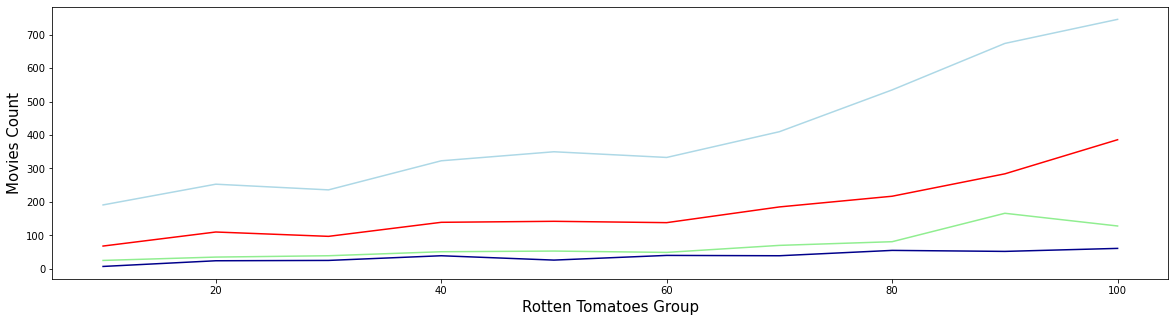

In [ ]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = roto_group_data_movies['Rotten Tomatoes Group'], y = roto_group_data_movies['Netflix'], color = 'red')
sns.lineplot(x = roto_group_data_movies['Rotten Tomatoes Group'], y = roto_group_data_movies['Hulu'], color = 'lightgreen')
sns.lineplot(x = roto_group_data_movies['Rotten Tomatoes Group'], y = roto_group_data_movies['Prime Video'], color = 'lightblue')
sns.lineplot(x = roto_group_data_movies['Rotten Tomatoes Group'], y = roto_group_data_movies['Disney+'], color = 'darkblue')
plt.xlabel('Rotten Tomatoes Group', fontsize = 15)
plt.ylabel('Movies Count', fontsize = 15)
plt.show()

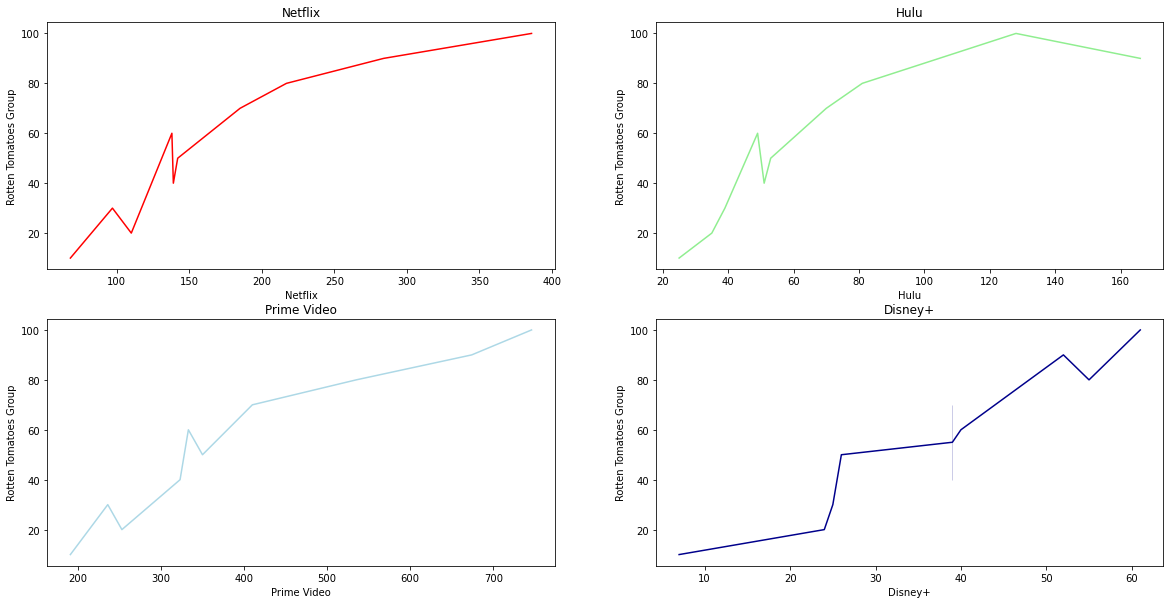

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 10))
 
n_r_ax1 = sns.lineplot(y = roto_group_data_movies['Rotten Tomatoes Group'], x = roto_group_data_movies['Netflix'], color = 'red', ax = axes[0, 0])
h_r_ax2 = sns.lineplot(y = roto_group_data_movies['Rotten Tomatoes Group'], x = roto_group_data_movies['Hulu'], color = 'lightgreen', ax = axes[0, 1])
p_r_ax3 = sns.lineplot(y = roto_group_data_movies['Rotten Tomatoes Group'], x = roto_group_data_movies['Prime Video'], color = 'lightblue', ax = axes[1, 0])
d_r_ax4 = sns.lineplot(y = roto_group_data_movies['Rotten Tomatoes Group'], x = roto_group_data_movies['Disney+'], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_r_ax1.title.set_text(labels[0])
h_r_ax2.title.set_text(labels[1])
p_r_ax3.title.set_text(labels[2])
d_r_ax4.title.set_text(labels[3])
 
plt.show()

In [ ]:
df_movies_directors = df_movies.copy()

In [ ]:
# Create directors dict where key=name and value=number of directors
 
directors = {}
 
for i in df_movies_directors['Directors'].dropna():
    if i != "NA":
        #print(i,len(i.split(',')))
        directors[i] = len(i.split(','))
    else:
        directors[i] = 0
    
# Add this information to our dataframe as a new column
 
df_movies_directors['Number of Directors'] = df_movies_directors['Directors'].map(directors).astype(int)

In [ ]:
df_directors_most_movies = df_movies_directors.sort_values(by = 'Number of Directors', ascending = False).reset_index()
df_directors_most_movies = df_directors_most_movies.drop(['index'], axis = 1)
# filter = (df_movies_directors['Directors'] == (df_movies_directors['Number of Directors'].max()))
# df_directors_most_movies = df_movies_directors[filter]
 
# mostest_rated_tvshow = df_movies_directors.loc[df_movies_directors['Number of Directors'].idxmax()]
 
print('\nMovies with Highest Ever Directors Count are : \n')
df_directors_most_movies.head(5)


Movies with Highest Ever Directors Count are : 



ID                        Title  Year Age IMDb Rotten Tomatoes  \
0  11086                    The Owner  2012  NR  6.9              NA   
1  12269  Fun Size Horror: Volume One  2015  NR  4.6              NA   
2  11869            A Taste of Phobia  2018  NR  3.1              NA   
3    359                     Veronica  2017  16  4.3              79   
4   4422              The Proposition  2005  16  4.3              85   

                                           Directors  \
0  Xavier Agudo,Ian Bonner,Michael Canzoniero,Fra...   
1  Bryan Chojnowski,Lisa J Dooley,Ned Ehrbar,Mali...   
2  Domiziano Cristopharo,Jason Impey,Sunny King,S...   
3  Elizabeth Banks,Steven Brill,Steve Carr,Rusty ...   
4  Elizabeth Banks,Steven Brill,Steve Carr,Rusty ...   

                                                Cast  Genres  \
0  Jorge Mario Agudelo,Chiraz Aich,Christine Altm...   Drama   
1  Tara Perry,Aidan Flynn,Guy Perry,Nev Scharrel,...  Horror   
2  Lianne O'Shea,Kehinde Bankole,Roberta Gemma,Ma...  Horror   
3  Dennis Quaid,Greg Kinnear,Common,Charlie Saxto...  Comedy   
4  Dennis Quaid,Greg Kinnear,Common,Charlie Saxto...  Comedy   

                 Country  ...  \
0  United States,Germany  ...   
1          United States  ...   
2         United Kingdom  ...   
3          United States  ...   
4          United States  ...   

                                            Plotline Runtime   Kind Netflix  \
0                                                 NA      94  movie       0   
1  Alienated by her peers as a young girl, Scarle...      86  movie       0   
2  Blending drama with the explanations of passio...      90  movie       0   
3  Ineffectual, 'has-been' film-maker (Dennis Qua...      94  movie       1   
4  Ineffectual, 'has-been' film-maker (Dennis Qua...      94  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Directors  
0     0            1        0     0       Prime Video                  28  
1     0            1        0     0       Prime Video                  18  
2     0            1        0     0       Prime Video                  17  
3     0            0        0     0           Netflix                  13  
4     0            1        0     0       Prime Video                  13  

[5 rows x 21 columns]

In [ ]:
df_directors_least_movies = df_movies_directors.sort_values(by = 'Number of Directors', ascending = True).reset_index()
df_directors_least_movies = df_directors_least_movies.drop(['index'], axis = 1)
# filter = (df_movies_directors['Directors'] == (df_movies_directors['Number of Directors'].min()))
# df_directors_least_movies = df_movies_directors[filter]
 
print('\nMovies with Lowest Ever Directors Count are : \n')
df_directors_least_movies.head(5)


Movies with Lowest Ever Directors Count are : 



ID                                              Title  Year Age IMDb  \
0  16923                                   Paradise Islands  2017  13   NA   
1  15706  Evening Waterfalls, 8 hours for sleep and medi...  2016  NR   NA   
2  15705                               Laughter Is Medicine  2018  16  3.9   
3  15704                                           Snowsurf  2015   7   NA   
4  15703                         TurboDojo - Absinthe Films  2017  NR   NA   

  Rotten Tomatoes Directors                    Cast  Genres        Country  \
0              NA        NA                      NA   Drama  United States   
1              NA        NA                      NA      NA             NA   
2              NA        NA  Shannon DaQueen Butler  Comedy  United States   
3              NA        NA                      NA      NA             NA   
4              NA        NA                      NA      NA             NA   

   ...                                           Plotline Runtime   Kind  \
0  ...                                                 NA      NA  movie   
1  ...  A film where critics share their opinion of Me...      NA  movie   
2  ...  Although it can be difficult to detect the inf...      60  movie   
3  ...  Murder Gardens is the story of Chase Washingto...      63  movie   
4  ...                                                 NA      NA  movie   

  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  \
0       0     0            0        1     0           Disney+   
1       0     0            1        0     0       Prime Video   
2       0     0            1        0     0       Prime Video   
3       0     0            1        0     0       Prime Video   
4       0     0            1        0     0       Prime Video   

  Number of Directors  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 21 columns]

In [ ]:
print(f'''
      Total '{df_movies_directors['Directors'].unique().shape[0]}' unique Directors are Available, They were Like this,\n
      
      {df_movies_directors.sort_values(by = 'Number of Directors', ascending = False)['Directors'].unique()[:5]} etc.\n
 
      The Highest Ever Directors Rating Ever Any TV Show Got is '{df_directors_most_movies['Title'][0]}' : '{df_directors_most_movies['Number of Directors'].max()}'\n
 
      The Lowest Ever Directors Rating Ever Any TV Show Got is '{df_directors_least_movies['Title'][0]}' : '{df_directors_least_movies['Number of Directors'].min()}'\n
      ''')


      Total '11615' unique Directors are Available, They were Like this,

      
      ['Xavier Agudo,Ian Bonner,Michael Canzoniero,Francois Coetzee,Mairtín de Barra,Todd Felderstein,Nicolas Fogliarini,Yango Gonzalez,Nino Leitner,Craig Lines,Vishesh Mankal,Varun Mathur,Steve Murphy,Asmit Pathare,Neha Raheja Thakker,Adam Ruszkowski,Alexander Schönauer,Sabine Sebaaly,Prashant Sehgal,Fahad Shaikh,Marty Shea,Brian Shephard,Nicole Sylvester,Arne V. Nostitz-Rieneck,John Versical,Rafael Yoshida,Reenita Malhotra,Giacomo Mantovani'
 'Bryan Chojnowski,Lisa J Dooley,Ned Ehrbar,Mali Elfman,Dick Grunert,Max Isaacson,Anthony Lund,Michael May,Glen Murakami,Grant Olin,Ali Presley Paras,Eric Pereira,Zeke Pinheiro,Jerry Pyle,Anisa Qureshi,Ben Rekhi,Erin Stegeman,Josh C. Waller'
 'Domiziano Cristopharo,Jason Impey,Sunny King,Sam Mason-Bell,Tony Newton,Poison Rouge,Alessandro Sisti,Rob Ulitski,Jackson Batchelor,Sophia Cacciola,Michael J. Epstein,Dustin Ferguson,Alessandro Giordani,Chris Milewski,Davide P

In [ ]:
netflix_directors_most_movies = df_directors_most_movies.loc[df_directors_most_movies['Netflix']==1].reset_index()
netflix_directors_most_movies = netflix_directors_most_movies.drop(['index'], axis = 1)
 
netflix_directors_least_movies = df_directors_least_movies.loc[df_directors_least_movies['Netflix']==1].reset_index()
netflix_directors_least_movies = netflix_directors_least_movies.drop(['index'], axis = 1)
 
netflix_directors_most_movies.head(5)

ID                        Title  Year Age IMDb Rotten Tomatoes  \
0   359                     Veronica  2017  16  4.3              79   
1  2358           Berlin, I Love You  2019  16  4.6              11   
2  2267                Truth or Dare  2017  16  4.3              NA   
3  2974           X: Past Is Present  2015  13  5.3              NA   
4   660  Kahlil Gibran's The Prophet  2014   7  7.1              66   

                                           Directors  \
0  Elizabeth Banks,Steven Brill,Steve Carr,Rusty ...   
1  Dianna Agron,Peter Chelsom,Claus Clausen,Ferna...   
2  Elizabeth Banks,Steven Brill,Steve Carr,Rusty ...   
3  Hemant Gaba,Pratim D. Gupta,Sudhish Kamath,Nal...   
4  Roger Allers,Gaëtan Brizzi,Paul Brizzi,Joan C....   

                                                Cast                 Genres  \
0  Dennis Quaid,Greg Kinnear,Common,Charlie Saxto...                 Comedy   
1  Keira Knightley,Helen Mirren,Luke Wilson,Jim S...          Drama,Romance   
2  Dennis Quaid,Greg Kinnear,Common,Charlie Saxto...                 Comedy   
3  Rajat Kapoor,Radhika Apte,Bidita Bag,Piaa Bajp...  Drama,Mystery,Romance   
4  Liam Neeson,Salma Hayek,John Krasinski,Frank L...        Animation,Drama   

                                             Country  ...  \
0                                      United States  ...   
1                                            Germany  ...   
2                                      United States  ...   
3                                              India  ...   
4  Qatar,France,Lebanon,Canada,United States,Irel...  ...   

                                            Plotline Runtime   Kind Netflix  \
0  Ineffectual, 'has-been' film-maker (Dennis Qua...      94  movie       1   
1                                                 NA     120  movie       1   
2  Ineffectual, 'has-been' film-maker (Dennis Qua...      94  movie       1   
3                                                 NA     105  movie       1   
4                                                 NA      85  movie       1   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Directors  
0     0            0        0     0           Netflix                  13  
1     0            0        0     0           Netflix                  13  
2     0            1        0     0           Netflix                  13  
3     0            1        0     0           Netflix                  11  
4     0            0        0     0           Netflix                  10  

[5 rows x 21 columns]

In [ ]:
hulu_directors_most_movies = df_directors_most_movies.loc[df_directors_most_movies['Hulu']==1].reset_index()
hulu_directors_most_movies = hulu_directors_most_movies.drop(['index'], axis = 1)
 
hulu_directors_least_movies = df_directors_least_movies.loc[df_directors_least_movies['Hulu']==1].reset_index()
hulu_directors_least_movies = hulu_directors_least_movies.drop(['index'], axis = 1)
 
hulu_directors_most_movies.head(5)

ID                                          Title  Year Age IMDb  \
0   4032                                   Wakko's Wish  1999   0  7.3   
1   3704                                     Southbound  2015  16  5.9   
2   3912  Tiny Toon Adventures: How I Spent My Vacation  1992  NR    8   
3  16501                 Victoria's Secret Fashion Show  1999   7  7.6   
4   3861                                      Planet 51  2009   7    6   

  Rotten Tomatoes                                          Directors  \
0              NA  Liz Holzman,Rusty Mills,Tom Ruegger,Russell Ca...   
1              81  Roxanne Benjamin,Matt Bettinelli-Olpin,David B...   
2              NA  Rich Arons,Ken Boyer,Kent Butterworth,Barry Ca...   
3              NA  Hamish Hamilton,Yemisi Brookes,Dee Koppang O'L...   
4              23           Jorge Blanco,Javier Abad,Marcos Martínez   

                                                Cast  \
0  Rob Paulsen,Jess Harnell,Tress MacNeille,Mauri...   
1  Chad Villella,Matt Bettinelli-Olpin,Kristina P...   
2  Charlie Adler,Tress MacNeille,Joe Alaskey,Don ...   
3  Behati Prinsloo,Adriana Lima,Alessandra Ambros...   
4  Dwayne Johnson,Jessica Biel,Justin Long,Gary O...   

                                              Genres  \
0  Animation,Adventure,Comedy,Drama,Family,Fantas...   
1                                             Horror   
2          Animation,Adventure,Comedy,Family,Fantasy   
3                                         Reality-TV   
4           Animation,Adventure,Comedy,Family,Sci-Fi   

                              Country  ...  \
0                       United States  ...   
1                       United States  ...   
2                       United States  ...   
3                       United States  ...   
4  Spain,United Kingdom,United States  ...   

                                            Plotline Runtime   Kind Netflix  \
0  The Warner Brothers (and the Warner Sister) go...      80  movie       0   
1  On a desolate stretch of desert highway, weary...      89  movie       0   
2  Term-time ends at Acme Looniversity and the Ti...      79  movie       0   
3  Shinichi Kanou is a young secluded Otaku who i...      45  movie       0   
4  Lem is just an average teenager working on get...      91  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Directors  
0     1            0        0     0              Hulu                   8  
1     1            1        0     0       Prime Video                   8  
2     1            0        0     0              Hulu                   7  
3     1            0        0     0              Hulu                   4  
4     1            0        0     0              Hulu                   3  

[5 rows x 21 columns]

In [ ]:
prime_video_directors_most_movies = df_directors_most_movies.loc[df_directors_most_movies['Prime Video']==1].reset_index()
prime_video_directors_most_movies = prime_video_directors_most_movies.drop(['index'], axis = 1)
 
prime_video_directors_least_movies = df_directors_least_movies.loc[df_directors_least_movies['Prime Video']==1].reset_index()
prime_video_directors_least_movies = prime_video_directors_least_movies.drop(['index'], axis = 1)
 
prime_video_directors_most_movies.head(5)

ID                        Title  Year Age IMDb Rotten Tomatoes  \
0  11086                    The Owner  2012  NR  6.9              NA   
1  12269  Fun Size Horror: Volume One  2015  NR  4.6              NA   
2  11869            A Taste of Phobia  2018  NR  3.1              NA   
3   4422              The Proposition  2005  16  4.3              85   
4   8445               Happy Birthday  2016  16  4.3              20   

                                           Directors  \
0  Xavier Agudo,Ian Bonner,Michael Canzoniero,Fra...   
1  Bryan Chojnowski,Lisa J Dooley,Ned Ehrbar,Mali...   
2  Domiziano Cristopharo,Jason Impey,Sunny King,S...   
3  Elizabeth Banks,Steven Brill,Steve Carr,Rusty ...   
4  Elizabeth Banks,Steven Brill,Steve Carr,Rusty ...   

                                                Cast  Genres  \
0  Jorge Mario Agudelo,Chiraz Aich,Christine Altm...   Drama   
1  Tara Perry,Aidan Flynn,Guy Perry,Nev Scharrel,...  Horror   
2  Lianne O'Shea,Kehinde Bankole,Roberta Gemma,Ma...  Horror   
3  Dennis Quaid,Greg Kinnear,Common,Charlie Saxto...  Comedy   
4  Dennis Quaid,Greg Kinnear,Common,Charlie Saxto...  Comedy   

                 Country  ...  \
0  United States,Germany  ...   
1          United States  ...   
2         United Kingdom  ...   
3          United States  ...   
4          United States  ...   

                                            Plotline Runtime   Kind Netflix  \
0                                                 NA      94  movie       0   
1  Alienated by her peers as a young girl, Scarle...      86  movie       0   
2  Blending drama with the explanations of passio...      90  movie       0   
3  Ineffectual, 'has-been' film-maker (Dennis Qua...      94  movie       0   
4  In this unearthed lost movie from 1990 that th...      94  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Directors  
0     0            1        0     0       Prime Video                  28  
1     0            1        0     0       Prime Video                  18  
2     0            1        0     0       Prime Video                  17  
3     0            1        0     0       Prime Video                  13  
4     0            1        0     0       Prime Video                  13  

[5 rows x 21 columns]

In [ ]:
disney_directors_most_movies = df_directors_most_movies.loc[df_directors_most_movies['Disney+']==1].reset_index()
disney_directors_most_movies = disney_directors_most_movies.drop(['index'], axis = 1)
 
disney_directors_least_movies = df_directors_least_movies.loc[df_directors_least_movies['Disney+']==1].reset_index()
disney_directors_least_movies = disney_directors_least_movies.drop(['index'], axis = 1)
 
disney_directors_most_movies.head(5)

ID                            Title  Year Age IMDb Rotten Tomatoes  \
0  15786                         Fantasia  1940   0  7.7              95   
1  15797                            Bambi  1942   0  7.3              90   
2  16077            Belle's Magical World  1998   0  5.3              17   
3  15835                    Fantasia 2000  1999   0  7.2              81   
4  15777  Snow White and the Seven Dwarfs  1937   0  7.6              98   

                                           Directors  \
0  James Algar,Samuel Armstrong,Ford Beebe Jr.,No...   
1  James Algar,Samuel Armstrong,David Hand,Graham...   
2  Bob Kline,Cullen Blaine,Dale Case,Daniel de la...   
3  James Algar,Gaëtan Brizzi,Paul Brizzi,Hendel B...   
4  William Cottrell,David Hand,Wilfred Jackson,La...   

                                                Cast  \
0  Deems Taylor,Leopold Stokowski,The Philadelphi...   
1  Hardie Albright,Stan Alexander,Bobette Audrey,...   
2  Jeff Bennett,Robby Benson,Paige O'Hara,Jim Cum...   
3  Steve Martin,Itzhak Perlman,Quincy Jones,Bette...   
4  Roy Atwell,Stuart Buchanan,Adriana Caselotti,E...   

                                            Genres        Country  ...  \
0           Animation,Family,Fantasy,Music,Musical  United States  ...   
1                           Animation,Drama,Family  United States  ...   
2  Animation,Comedy,Family,Fantasy,Musical,Romance  United States  ...   
3            Animation,Comedy,Family,Fantasy,Music  United States  ...   
4         Animation,Family,Fantasy,Musical,Romance  United States  ...   

                                            Plotline Runtime   Kind Netflix  \
0  Alice, an unpretentious and individual 19-year...     125  movie       0   
1  When two pre-teens named Hallie and Annie meet...      70  movie       0   
2  Robbie, the master's baby, has been mysterious...      92  movie       0   
3  Captain Jack Sparrow (Johnny Depp) crosses pat...      75  movie       0   
4                                                 NA      83  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Directors  
0     0            0        1     0           Disney+                  12  
1     0            0        1     0           Disney+                   9  
2     0            0        1     0           Disney+                   8  
3     0            0        1     0           Disney+                   8  
4     0            0        1     0           Disney+                   6  

[5 rows x 21 columns]

In [ ]:
print(f'''
      The TV Show with Highest Director Count Ever Got is '{df_directors_most_movies['Title'][0]}' : '{df_directors_most_movies['Number of Directors'].max()}'\n
      The TV Show with Lowest Director Count Ever Got is '{df_directors_least_movies['Title'][0]}' : '{df_directors_least_movies['Number of Directors'].min()}'\n
      
      The TV Show with Highest Director Count on 'Netflix' is '{netflix_directors_most_movies['Title'][0]}' : '{netflix_directors_most_movies['Number of Directors'].max()}'\n
      The TV Show with Lowest Director Count on 'Netflix' is '{netflix_directors_least_movies['Title'][0]}' : '{netflix_directors_least_movies['Number of Directors'].min()}'\n
      
      The TV Show with Highest Director Count on 'Hulu' is '{hulu_directors_most_movies['Title'][0]}' : '{hulu_directors_most_movies['Number of Directors'].max()}'\n
      The TV Show with Lowest Director Count on 'Hulu' is '{hulu_directors_least_movies['Title'][0]}' : '{hulu_directors_least_movies['Number of Directors'].min()}'\n
      
      The TV Show with Highest Director Count on 'Prime Video' is '{prime_video_directors_most_movies['Title'][0]}' : '{prime_video_directors_most_movies['Number of Directors'].max()}'\n
      The TV Show with Lowest Director Count on 'Prime Video' is '{prime_video_directors_least_movies['Title'][0]}' : '{prime_video_directors_least_movies['Number of Directors'].min()}'\n
      
      The TV Show with Highest Director Count on 'Disney+' is '{disney_directors_most_movies['Title'][0]}' : '{disney_directors_most_movies['Number of Directors'].max()}'\n
      The TV Show with Lowest Director Count on 'Disney+' is '{disney_directors_least_movies['Title'][0]}' : '{disney_directors_least_movies['Number of Directors'].min()}'\n 
      ''')


      The TV Show with Highest Director Count Ever Got is 'The Owner' : '28'

      The TV Show with Lowest Director Count Ever Got is 'Paradise Islands' : '0'

      
      The TV Show with Highest Director Count on 'Netflix' is 'Veronica' : '13'

      The TV Show with Lowest Director Count on 'Netflix' is '2015 Dream Concert' : '0'

      
      The TV Show with Highest Director Count on 'Hulu' is 'Wakko's Wish' : '8'

      The TV Show with Lowest Director Count on 'Hulu' is 'Oddbods: Party Monsters' : '0'

      
      The TV Show with Highest Director Count on 'Prime Video' is 'The Owner' : '28'

      The TV Show with Lowest Director Count on 'Prime Video' is 'Evening Waterfalls, 8 hours for sleep and meditation ultra dark' : '0'

      
      The TV Show with Highest Director Count on 'Disney+' is 'Fantasia' : '12'

      The TV Show with Lowest Director Count on 'Disney+' is 'Paradise Islands' : '0'
 
      


In [ ]:
print(f'''
      Accross All Platforms the Average Director Count is '{round(df_movies_directors['Number of Directors'].mean(), ndigits = 2)}'\n
      The Average Director Count on 'Netflix' is '{round(netflix_directors_most_movies['Number of Directors'].mean(), ndigits = 2)}'\n
      The Average Director Count on 'Hulu' is '{round(hulu_directors_most_movies['Number of Directors'].mean(), ndigits = 2)}'\n
      The Average Director Count on 'Prime Video' is '{round(prime_video_directors_most_movies['Number of Directors'].mean(), ndigits = 2)}'\n
      The Average Director Count on 'Disney+' is '{round(disney_directors_most_movies['Number of Directors'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Director Count is '1.11'

      The Average Director Count on 'Netflix' is '1.12'

      The Average Director Count on 'Hulu' is '1.1'

      The Average Director Count on 'Prime Video' is '1.1'

      The Average Director Count on 'Disney+' is '1.33'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Directors is '{df_movies_directors['Directors'].unique().shape[0]}'\n
      Total Count of Directors on 'Netflix' is '{netflix_directors_most_movies['Directors'].unique().shape[0]}'\n
      Total Count of Directors on 'Hulu' is '{hulu_directors_most_movies['Directors'].unique().shape[0]}'\n
      Total Count of Directors on 'Prime Video' is '{prime_video_directors_most_movies['Directors'].unique().shape[0]}'\n
      Total Count of Directors on 'Disney+' is '{disney_directors_most_movies['Directors'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Directors is '11615'

      Total Count of Directors on 'Netflix' is '2825'

      Total Count of Directors on 'Hulu' is '961'

      Total Count of Directors on 'Prime Video' is '8988'

      Total Count of Directors on 'Disney+' is '412'
 
      


In [ ]:
df_movies_directors.drop(df_movies_directors.loc[df_movies_directors['Directors'] == "NA"].index, inplace = True)
# df_movies_directors = df_movies_directors[df_movies_directors.Directors != "NA"]

In [ ]:
df_dirs = df_movies_directors['Directors'].str.split(',').apply(pd.Series).stack()
del df_movies_directors['Directors']
df_dirs.index = df_dirs.index.droplevel(-1)
df_dirs.name = 'Directors'
df_movies_directors = df_movies_directors.join(df_dirs)
df_movies_directors.drop_duplicates(inplace=True)

In [ ]:
df_movies_directors.head(5)

ID                   Title  Year Age IMDb Rotten Tomatoes  \
0   1               Inception  2010  13  8.8              87   
1   2              The Matrix  1999  16  8.7              88   
1   2              The Matrix  1999  16  8.7              88   
2   3  Avengers: Infinity War  2018  13  8.4              85   
2   3  Avengers: Infinity War  2018  13  8.4              85   

                                                Cast  \
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
1  Keanu Reeves,Laurence Fishburne,Carrie-Anne Mo...   
1  Keanu Reeves,Laurence Fishburne,Carrie-Anne Mo...   
2  Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...   
2  Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...   

                             Genres                       Country  \
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                     Action,Sci-Fi                 United States   
1                     Action,Sci-Fi                 United States   
2           Action,Adventure,Sci-Fi                 United States   
2           Action,Adventure,Sci-Fi                 United States   

                  Language  ... Runtime   Kind Netflix  Hulu  Prime Video  \
0  English,Japanese,French  ...     148  movie       1     0            0   
1                  English  ...     136  movie       1     0            0   
1                  English  ...     136  movie       1     0            0   
2                  English  ...     149  movie       1     0            0   
2                  English  ...     149  movie       1     0            0   

   Disney+  Type  Service Provider Number of Directors          Directors  
0        0     0           Netflix                   1  Christopher Nolan  
1        0     0           Netflix                   2     Lana Wachowski  
1        0     0           Netflix                   2    Lilly Wachowski  
2        0     0           Netflix                   2      Anthony Russo  
2        0     0           Netflix                   2          Joe Russo  

[5 rows x 21 columns]

In [ ]:
directors_count = df_movies_directors.groupby('Directors')['Title'].count()
directors_tvshow = df_movies_directors.groupby('Directors')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
directors_data_movies = pd.concat([directors_count, directors_tvshow], axis = 1).reset_index().rename(columns = {'Title' : 'Movies Count'})
directors_data_movies = directors_data_movies.sort_values(by = 'Movies Count', ascending = False)

In [ ]:
# Directors with Movies Counts - All Platforms Combined
directors_data_movies.sort_values(by = 'Movies Count', ascending = False)[:10]

Directors  Movies Count  Netflix  Hulu  Prime Video  Disney+
5226        Jay Chapman            36       12     0           29        0
6248        Joseph Kane            31        0     0           31        0
1985         Cheh Chang            29        2     0           28        0
10597      Sam Newfield            23        1     0           22        0
5621       Jim Wynorski            23        0     0           23        0
5107          Jan Suter            21       21     0            0        0
2792     David DeCoteau            21        0     0           21        0
9783        Raúl Campos            21       21     0            0        0
5232          Jay Karas            21       15     1            6        1
12460  William Beaudine            20        0     0           20        0

In [ ]:
df_directors_high_movies = directors_data_movies.sort_values(by = 'Movies Count', ascending = False).reset_index()
df_directors_high_movies = df_directors_high_movies.drop(['index'], axis = 1)
# filter = (directors_data_movies['Movies Count'] == (directors_data_movies['Movies Count'].max()))
# df_directors_high_movies = directors_data_movies[filter]
 
# highest_rated_tvshow = directors_data_movies.loc[directors_data_movies['Movies Count'].idxmax()]

In [ ]:
print('\nDirectors with Highest Ever Movies Count are : All Platforms Combined\n')
df_directors_high_movies.head(5)


Directors with Highest Ever Movies Count are : All Platforms Combined



Directors  Movies Count  Netflix  Hulu  Prime Video  Disney+
0   Jay Chapman            36       12     0           29        0
1   Joseph Kane            31        0     0           31        0
2    Cheh Chang            29        2     0           28        0
3  Sam Newfield            23        1     0           22        0
4  Jim Wynorski            23        0     0           23        0

In [ ]:
df_directors_low_movies = directors_data_movies.sort_values(by = 'Movies Count', ascending = True).reset_index()
df_directors_low_movies = df_directors_low_movies.drop(['index'], axis = 1)
# filter = (directors_data_movies['Movies Count'] == (directors_data_movies['Movies Count'].min()))
# df_directors_low_movies = directors_data_movies[filter]

In [ ]:
print('\nDirectors with Lowest Ever Movies Count are : All Platforms Combined\n')
df_directors_low_movies.head(5)


Directors with Lowest Ever Movies Count are : All Platforms Combined



Directors  Movies Count  Netflix  Hulu  Prime Video  Disney+
0  Peter Ettedgui             1        0     0            1        0
1  Dexton Deboree             1        0     1            0        0
2    Dezsö Magyar             1        0     0            1        0
3         Dhanush             1        1     0            1        0
4    Dheer Momaya             1        1     0            0        0

In [ ]:
print(f'''
      Total '{df_movies['Directors'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see Movies from Total '{directors_data_movies['Directors'].unique().shape[0]}' Directors, They were Like this,\n
 
      {directors_data_movies.sort_values(by = 'Movies Count', ascending = False)['Directors'].head(5).unique()} etc. \n
 
      The Director with Highest Movies Count have '{directors_data_movies['Movies Count'].max()}' Movies Available is '{df_directors_high_movies['Directors'][0]}', &\n
      The Director with Lowest Movies Count have '{directors_data_movies['Movies Count'].min()}' Movies Available is '{df_directors_low_movies['Directors'][0]}'
      ''')


      Total '16923' Titles are available on All Platforms, out of which

      You Can Choose to see Movies from Total '12760' Directors, They were Like this,

 
      ['Jay Chapman' 'Joseph Kane' 'Cheh Chang' 'Sam Newfield' 'Jim Wynorski'] etc. 

 
      The Director with Highest Movies Count have '36' Movies Available is 'Jay Chapman', &

      The Director with Lowest Movies Count have '1' Movies Available is 'Peter Ettedgui'
      


In [ ]:
fig = px.pie(directors_data_movies[:10], names = 'Directors', values = 'Movies Count')
fig.update_traces(textinfo = 'percent+label', title = 'Movies Count based on IMDb Ratings')
fig.show()

In [ ]:
# netflix_directors_movies = directors_data_movies[directors_data_movies['Netflix'] != 0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_directors_movies = netflix_directors_movies.drop(['index', 'Hulu','Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
netflix_directors_high_movies = df_directors_high_movies.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_directors_high_movies = netflix_directors_high_movies.drop(['index'], axis = 1)
 
netflix_directors_low_movies = df_directors_high_movies.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_directors_low_movies = netflix_directors_low_movies.drop(['index'], axis = 1)
 
netflix_directors_high_movies.head(5)

Directors  Movies Count  Netflix  Hulu  Prime Video  Disney+
0     Jan Suter            21       21     0            0        0
1   Raúl Campos            21       21     0            0        0
2  Marcus Raboy            18       16     0            2        0
3     Jay Karas            21       15     1            6        1
4   Jay Chapman            36       12     0           29        0

In [ ]:
# hulu_directors_movies = directors_data_movies[directors_data_movies['Hulu'] != 0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_directors_movies = hulu_directors_movies.drop(['index', 'Netflix','Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
hulu_directors_high_movies = df_directors_high_movies.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_directors_high_movies = hulu_directors_high_movies.drop(['index'], axis = 1)
 
hulu_directors_low_movies = df_directors_high_movies.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_directors_low_movies = hulu_directors_low_movies.drop(['index'], axis = 1)
 
hulu_directors_high_movies.head(5)

Directors  Movies Count  Netflix  Hulu  Prime Video  Disney+
0  Savage Steve Holland             6        2     5            0        1
1           Tyler Perry             6        2     4            4        0
2          Richard Rich            10        2     4            2        2
3           Alan Metter             4        1     3            1        0
4           William Lau             5        2     3            0        0

In [ ]:
# prime_video_directors_movies = directors_data_movies[directors_data_movies['Prime Video'] != 0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_directors_movies = prime_video_directors_movies.drop(['index', 'Netflix','Hulu', 'Disney+', 'Movies Count'], axis = 1)
 
prime_video_directors_high_movies = df_directors_high_movies.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_directors_high_movies = prime_video_directors_high_movies.drop(['index'], axis = 1)
 
prime_video_directors_low_movies = df_directors_high_movies.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_directors_low_movies = prime_video_directors_low_movies.drop(['index'], axis = 1)
 
prime_video_directors_high_movies.head(5)

Directors  Movies Count  Netflix  Hulu  Prime Video  Disney+
0   Joseph Kane            31        0     0           31        0
1   Jay Chapman            36       12     0           29        0
2    Cheh Chang            29        2     0           28        0
3  Jim Wynorski            23        0     0           23        0
4  Sam Newfield            23        1     0           22        0

In [ ]:
# disney_directors_movies = directors_data_movies[directors_data_movies['Disney+'] != 0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_directors_movies = disney_directors_movies.drop(['index', 'Netflix','Hulu', 'Prime Video', 'Movies Count'], axis = 1)
 
disney_directors_high_movies = df_directors_high_movies.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_directors_high_movies = disney_directors_high_movies.drop(['index'], axis = 1)
 
disney_directors_low_movies = df_directors_high_movies.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_directors_low_movies = disney_directors_low_movies.drop(['index'], axis = 1)
 
disney_directors_high_movies.head(5)

Directors  Movies Count  Netflix  Hulu  Prime Video  Disney+
0         Paul Hoen            15        0     0            0       15
1       James Algar            12        0     0            0       12
2  Robert Stevenson            14        0     1            2       11
3  Vincent McEveety             9        0     0            0        9
4      Kenny Ortega             8        0     0            0        8

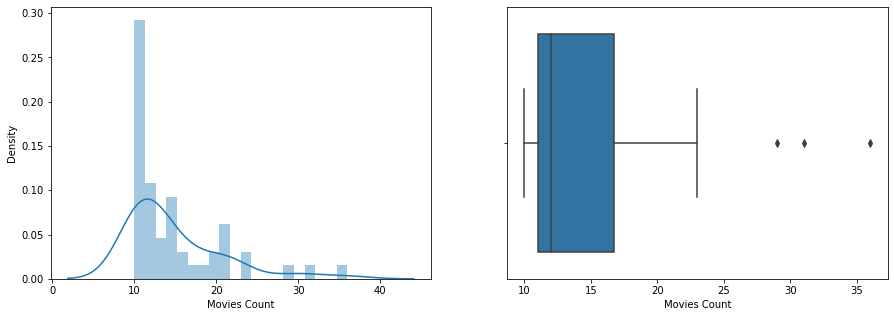

In [ ]:
f, ax = plt.subplots(1, 2 , figsize = (15, 5))
sns.distplot(directors_data_movies['Movies Count'][:50],bins = 20, kde = True, ax = ax[0])
sns.boxplot(directors_data_movies['Movies Count'][:50], ax = ax[1])
plt.show()

In [ ]:
# Creating distinct dataframes only with the movies present on individual streaming platforms
netflix_directors_movies = directors_data_movies[directors_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_directors_movies = netflix_directors_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

hulu_directors_movies = directors_data_movies[directors_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_directors_movies = hulu_directors_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

prime_video_directors_movies = directors_data_movies[directors_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_directors_movies = prime_video_directors_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)

disney_directors_movies = directors_data_movies[directors_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_directors_movies = disney_directors_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)

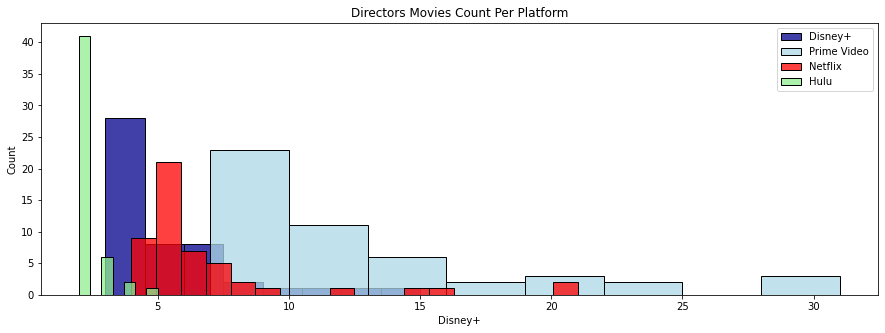

In [ ]:
# Defining plot size and title
plt.figure(figsize = (15, 5))
plt.title('Directors Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(disney_directors_movies['Disney+'][:50], color = 'darkblue', legend = True, kde = False)  
sns.histplot(prime_video_directors_movies['Prime Video'][:50], color = 'lightblue', legend = True, kde = False)
sns.histplot(netflix_directors_movies['Netflix'][:50], color = 'red', legend = True, kde = False)
sns.histplot(hulu_directors_movies['Hulu'][:50], color = 'lightgreen', legend = True, kde = False)                                
 
# Setting the legend
plt.legend(['Disney+', 'Prime Video', 'Netflix', 'Hulu'])
plt.show()

In [ ]:
print(f'''
      The Director with Highest Movies Count Rating Ever Got is '{df_directors_high_movies['Directors'][0]}' : '{df_directors_high_movies['Movies Count'].max()}'\n
      The Director with Lowest Movies Count Rating Ever Got is '{df_directors_low_movies['Directors'][0]}' : '{df_directors_low_movies['Movies Count'].min()}'\n
      
      The Director with Highest Movies Count Rating on 'Netflix' is '{netflix_directors_high_movies['Directors'][0]}' : '{netflix_directors_high_movies['Netflix'].max()}'\n
      The Director with Lowest Movies Count Rating on 'Netflix' is '{netflix_directors_low_movies['Directors'][0]}' : '{netflix_directors_low_movies['Netflix'].min()}'\n
      
      The Director with Highest Movies Count Rating on 'Hulu' is '{hulu_directors_high_movies['Directors'][0]}' : '{hulu_directors_high_movies['Hulu'].max()}'\n
      The Director with Lowest Movies Count Rating on 'Hulu' is '{hulu_directors_low_movies['Directors'][0]}' : '{hulu_directors_low_movies['Hulu'].min()}'\n
      
      The Director with Highest Movies Count Rating on 'Prime Video' is '{prime_video_directors_high_movies['Directors'][0]}' : '{prime_video_directors_high_movies['Prime Video'].max()}'\n
      The Director with Lowest Movies Count Rating on 'Prime Video' is '{prime_video_directors_low_movies['Directors'][0]}' : '{prime_video_directors_low_movies['Prime Video'].min()}'\n
      
      The Director with Highest Movies Count Rating on 'Disney+' is '{disney_directors_high_movies['Directors'][0]}' : '{disney_directors_high_movies['Disney+'].max()}'\n
      The Director with Lowest Movies Count Rating on 'Disney+' is '{disney_directors_low_movies['Directors'][0]}' : '{disney_directors_low_movies['Disney+'].min()}'\n 
      ''')


      The Director with Highest Movies Count Rating Ever Got is 'Jay Chapman' : '36'

      The Director with Lowest Movies Count Rating Ever Got is 'Peter Ettedgui' : '1'

      
      The Director with Highest Movies Count Rating on 'Netflix' is 'Jan Suter' : '21'

      The Director with Lowest Movies Count Rating on 'Netflix' is 'Jeff Rector' : '0'

      
      The Director with Highest Movies Count Rating on 'Hulu' is 'Savage Steve Holland' : '5'

      The Director with Lowest Movies Count Rating on 'Hulu' is 'Jay Chapman' : '0'

      
      The Director with Highest Movies Count Rating on 'Prime Video' is 'Joseph Kane' : '31'

      The Director with Lowest Movies Count Rating on 'Prime Video' is 'Özcan Alper' : '0'

      
      The Director with Highest Movies Count Rating on 'Disney+' is 'Paul Hoen' : '15'

      The Director with Lowest Movies Count Rating on 'Disney+' is 'Jay Chapman' : '0'
 
      


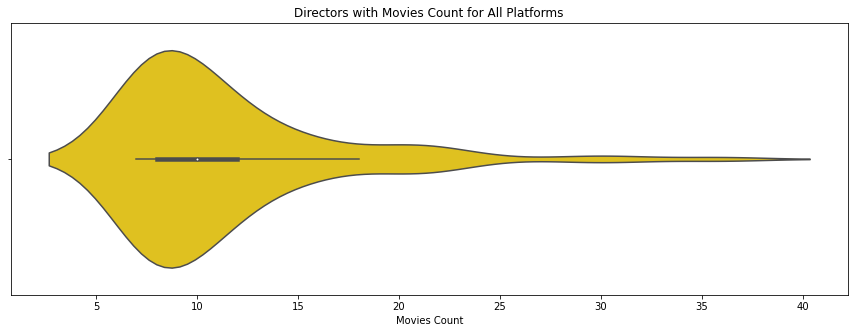

In [ ]:
# Distribution of tvshow rating in each platform
plt.figure(figsize = (15, 5))
plt.title('Directors with Movies Count for All Platforms')
sns.violinplot(x = directors_data_movies['Movies Count'][:100], color = 'gold', legend = True, kde = True, shade = False)
plt.show()

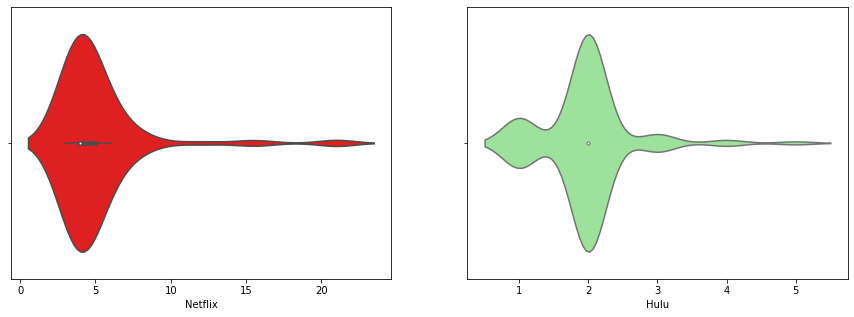

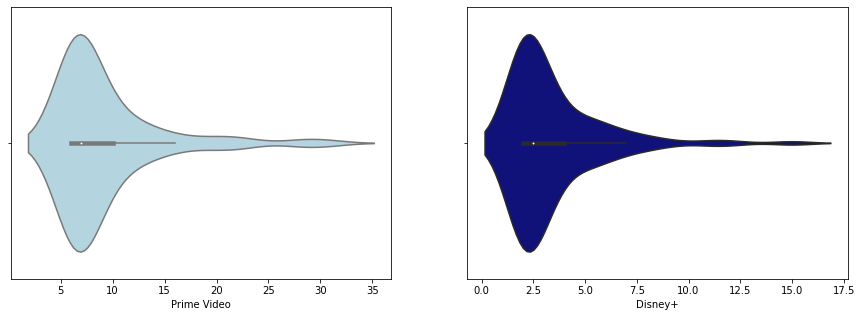

In [ ]:
# Distribution of Directors Movies Count in each platform
f1, ax1 = plt.subplots(1, 2 , figsize = (15, 5))
sns.violinplot(x = netflix_directors_movies['Netflix'][:100], color = 'red', ax = ax1[0])
sns.violinplot(x = hulu_directors_movies['Hulu'][:100], color = 'lightgreen', ax = ax1[1])
 
f2, ax2 = plt.subplots(1, 2 , figsize = (15, 5))
sns.violinplot(x = prime_video_directors_movies['Prime Video'][:100], color = 'lightblue', ax = ax2[0])
sns.violinplot(x = disney_directors_movies['Disney+'][:100], color = 'darkblue', ax = ax2[1])
plt.show()

In [ ]:
print(f'''
      Accross All Platforms the Average Movies Count of Directors is '{round(directors_data_movies['Movies Count'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Directors on 'Netflix' is '{round(netflix_directors_movies['Netflix'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Directors on 'Hulu' is '{round(hulu_directors_movies['Hulu'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Directors on 'Prime Video' is '{round(prime_video_directors_movies['Prime Video'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Directors on 'Disney+' is '{round(disney_directors_movies['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Movies Count of Directors is '1.48'

      The Average Movies Count of Directors on 'Netflix' is '1.29'

      The Average Movies Count of Directors on 'Hulu' is '1.09'

      The Average Movies Count of Directors on 'Prime Video' is '1.37'

      The Average Movies Count of Directors on 'Disney+' is '1.57'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Directors is '{directors_data_movies['Directors'].unique().shape[0]}'\n
      Total Count of Directors on 'Netflix' is '{netflix_directors_movies['Directors'].unique().shape[0]}'\n
      Total Count of Directors on 'Hulu' is '{hulu_directors_movies['Directors'].unique().shape[0]}'\n
      Total Count of Directors on 'Prime Video' is '{prime_video_directors_movies['Directors'].unique().shape[0]}'\n
      Total Count of Directors on 'Disney+' is '{disney_directors_movies['Directors'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Directors is '12760'

      Total Count of Directors on 'Netflix' is '3174'

      Total Count of Directors on 'Hulu' is '1066'

      Total Count of Directors on 'Prime Video' is '9909'

      Total Count of Directors on 'Disney+' is '473'
 
      


In [ ]:
fig = px.bar(x = directors_data_movies['Directors'][:50], y = directors_data_movies['Movies Count'][:50], 
             color = directors_data_movies['Movies Count'][:50], color_continuous_scale = 'Teal_r',
             labels = { 'x' : 'Directors', 'y' : 'Number of Movies'})
fig.show()

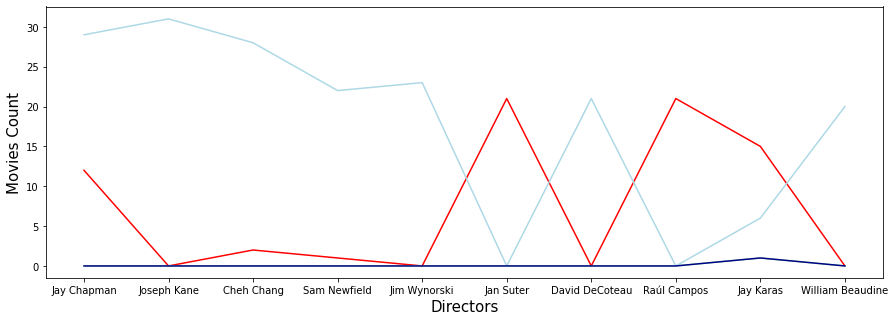

In [ ]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = directors_data_movies['Directors'][:10], y = directors_data_movies['Netflix'][:10], color = 'red')
sns.lineplot(x = directors_data_movies['Directors'][:10], y = directors_data_movies['Hulu'][:10], color = 'lightgreen')
sns.lineplot(x = directors_data_movies['Directors'][:10], y = directors_data_movies['Prime Video'][:10], color = 'lightblue')
sns.lineplot(x = directors_data_movies['Directors'][:10], y = directors_data_movies['Disney+'][:10], color = 'darkblue')
plt.xlabel('Directors', fontsize = 15)
plt.ylabel('Movies Count', fontsize = 15)
plt.show()

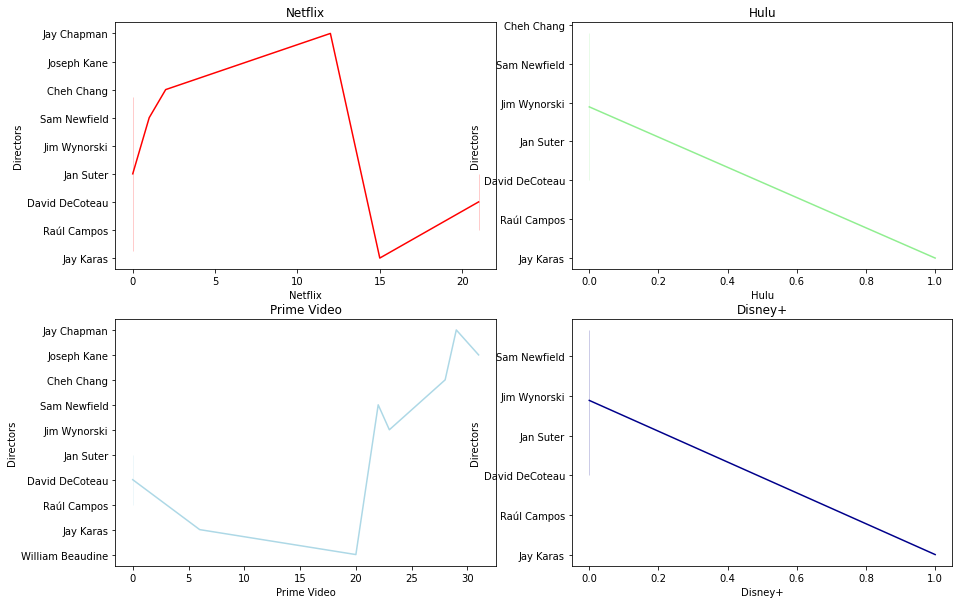

In [ ]:
fig, axes = plt.subplots(2, 2,figsize=(15 ,10))
 
n_d_ax1 = sns.lineplot(y = directors_data_movies['Directors'][:10], x = directors_data_movies['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_d_ax2 = sns.lineplot(y = directors_data_movies['Directors'][:10], x = directors_data_movies['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_d_ax3 = sns.lineplot(y = directors_data_movies['Directors'][:10], x = directors_data_movies['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_d_ax4 = sns.lineplot(y = directors_data_movies['Directors'][:10], x = directors_data_movies['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_d_ax1.title.set_text(labels[0])
h_d_ax2.title.set_text(labels[1])
p_d_ax3.title.set_text(labels[2])
d_d_ax4.title.set_text(labels[3])
 
plt.show()

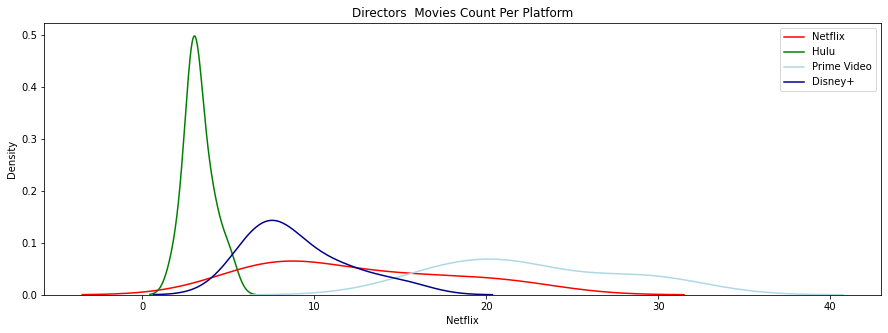

In [ ]:
# Defining plot size and title
plt.figure(figsize = (15, 5))
plt.title('Directors  Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_directors_movies['Netflix'][:10], color = 'red', legend = True)
sns.kdeplot(hulu_directors_movies['Hulu'][:10], color = 'green', legend = True)
sns.kdeplot(prime_video_directors_movies['Prime Video'][:10], color = 'lightblue', legend = True)
sns.kdeplot(disney_directors_movies['Disney+'][:10], color = 'darkblue', legend = True)                                      
                                      
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

In [ ]:
df_movies_casts = df_movies.copy()

In [ ]:
# Create casts dict where key=name and value = number of casts
 
casts = {}
 
for i in df_movies_casts['Cast'].dropna():
    if i != "NA":
        #print(i,len(i.split(',')))
        casts[i] = len(i.split(','))
    else:
        casts[i] = 0
    
# Add this information to our dataframe as a new column
 
df_movies_casts['Number of Cast'] = df_movies_casts['Cast'].map(casts).astype(int)

In [ ]:
df_casts_most_movies = df_movies_casts.sort_values(by = 'Number of Cast', ascending = False).reset_index()
df_casts_most_movies = df_casts_most_movies.drop(['index'], axis = 1)
# filter = (df_movies_casts['Cast'] == (df_movies_casts['Number of Cast'].max()))
# df_casts_most_movies = df_movies_casts[filter]
 
# mostest_rated_tvshow = df_movies_casts.loc[df_movies_casts['Number of Cast'].idxmax()]
 
print('\nMovies with Highest Ever Cast Count are : \n')
df_casts_most_movies.head(5)


Movies with Highest Ever Cast Count are : 



ID                        Title  Year Age IMDb Rotten Tomatoes  \
0    380                 Heneral Luna  2015  16  7.5              75   
1  15970  Around the World in 80 Days  2004   0  6.8              32   
2   4624                      7 Boxes  2012  16  7.1              97   
3   4156               Catching Faith  2015  NR  4.8              NA   
4  10904                A Broken Code  2012  NR  5.9              NA   

                             Directors  \
0                        Jerrold Tarog   
1         Michael Anderson,John Farrow   
2  Juan Carlos Maneglia,Tana Schémbori   
3                     John K.D. Graham   
4         Josh Webber,Michael Girgenti   

                                                Cast  \
0  John Arcilla,Arron Villaflor,Mon Confiado,Bing...   
1  Cantinflas,Finlay Currie,Robert Morley,Ronald ...   
2  Celso Franco,Víctor Sosa,Lali Gonzalez,Nico Ga...   
3  Lorena Segura York,Garrett Westton,Bill Engval...   
4  Michael Girgenti,Josh Webber,Bill T. Williams,...   

                                   Genres         Country  ...  \
0            Action,Biography,History,War     Philippines  ...   
1         Adventure,Comedy,Family,Romance   United States  ...   
2  Adventure,Crime,Drama,Mystery,Thriller  Paraguay,Spain  ...   
3                      Drama,Family,Sport   United States  ...   
4                    Crime,Drama,Thriller   United States  ...   

                                            Plotline Runtime   Kind Netflix  \
0  Set during the Philippine-American war, Henera...     118  movie       1   
1  Race car driver, Jim Douglas goes to Monte Car...     167  movie       0   
2  It's Friday night in Asunción, Paraguay and th...     105  movie       0   
3  From the outside, Alexa has the perfect life. ...      88  movie       0   
4  Each morning, Yusef, a doting father-of-one, h...      90  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Cast  
0     0            0        0     0           Netflix           1400  
1     0            0        1     0           Disney+           1304  
2     0            1        0     0       Prime Video            689  
3     1            1        0     0       Prime Video            491  
4     0            1        0     0       Prime Video            476  

[5 rows x 21 columns]

In [ ]:
df_casts_least_movies = df_movies_casts.sort_values(by = 'Number of Cast', ascending = True).reset_index()
df_casts_least_movies = df_casts_least_movies.drop(['index'], axis = 1)
# filter = (df_movies_casts['Cast'] == (df_movies_casts['Number of Cast'].min()))
# df_casts_least_movies = df_movies_casts[filter]
 
print('\nMovies with Lowest Ever Cast Count are : \n')
df_casts_least_movies.head(5)


Movies with Lowest Ever Cast Count are : 



ID                                            Title  Year Age IMDb  \
0  16923                                 Paradise Islands  2017  13   NA   
1   3047                            True: Wuzzle Wegg Day  2020  NR  7.4   
2   3042                    Ayotzinapa: The Turtle's Pace  2018  NR  7.5   
3   3025  Hoshino Gen Dome Tour "POP VIRUS" at Tokyo Dome  2019  NR   NA   
4   3015                       Hans Teeuwen: Real Rancour  2016  NR   NA   

  Rotten Tomatoes Directors Cast     Genres        Country  ... Plotline  \
0              NA        NA   NA      Drama  United States  ...       NA   
1              NA        NA   NA  Animation         Canada  ...       NA   
2              NA        NA   NA         NA             NA  ...       NA   
3              NA        NA   NA         NA             NA  ...       NA   
4              NA        NA   NA         NA             NA  ...       NA   

  Runtime   Kind Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  \
0      NA  movie       0     0            0        1     0           Disney+   
1      23  movie       1     0            0        0     0           Netflix   
2      NA  movie       1     0            0        0     0           Netflix   
3      NA  movie       1     0            0        0     0           Netflix   
4      NA  movie       1     0            0        0     0           Netflix   

  Number of Cast  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 21 columns]

In [ ]:
print(f'''
      Total '{df_movies_casts['Cast'].unique().shape[0]}' unique Casts are Available, They were Like this,\n
      
      {df_movies_casts.sort_values(by = 'Number of Cast', ascending = False)['Cast'].unique()[:5]} etc.\n
 
      The Highest Ever Cast Count Any TV Show Got is '{df_casts_most_movies['Title'][0]}' : '{df_casts_most_movies['Number of Cast'].max()}'\n
 
      The Lowest Ever Cast Count Any TV Show Got is '{df_casts_least_movies['Title'][0]}' : '{df_casts_least_movies['Number of Cast'].min()}'\n
      ''')


      Total '15903' unique Casts are Available, They were Like this,

      
      ["John Arcilla,Arron Villaflor,Mon Confiado,Bing Pimentel,Mylene Dizon,Perla Bautista,Lorenz Martinez,Joem Bascon,Alvin Anson,Alex Vincent Medina,Arthur Acuña,Archie Alemania,Jeffrey Quizon,Leo Martinez,Nonie Buencamino,Ketchup Eusebio,Ronnie Lazaro,Paulo Avelino,Benjamin Alves,OJ Mariano,Dennis Marasigan,Joel Saracho,Menggie Cobarrubias,Bernard Laxa,Paolo O'Hara,Buddy Caramat,Nor Domingo,Moises Magisa,Ildeflor Adao,VJ Mendoza,Anthony Falcon,E.A. Rocha,Greg Dorris,Nicco Manalo,Cesar Batistis,Rolando Inocencio,Anna Luna,Victor F. Araja,Miguel Faustmann,David Bianco,Paul Holmes,Nico Antonio,Jake Feraren,Allan Paule,Marc Abaya,Junjun Quintana,Victor Medina,Amos Francia,Dido de la Paz,Coleen Perez,Pepe Herrera,RJ Agustin,Abner Delina,Armando Laput Jr.,Janzhed Negrite,Jennifer Blair-Bianco,Giovanni Baldisseri,Kevin Limjoco,Tarek El Tayech,Karen Gaerlan,Brent Metken,Rob Rownd,Macky Bulagay,Ronnie Martinez,Kev

In [ ]:
netflix_casts_most_movies = df_casts_most_movies.loc[df_casts_most_movies['Netflix']==1].reset_index()
netflix_casts_most_movies = netflix_casts_most_movies.drop(['index'], axis = 1)
 
netflix_casts_least_movies = df_casts_least_movies.loc[df_casts_least_movies['Netflix']==1].reset_index()
netflix_casts_least_movies = netflix_casts_least_movies.drop(['index'], axis = 1)
 
netflix_casts_most_movies.head(5)

ID                               Title  Year Age IMDb Rotten Tomatoes  \
0   380                        Heneral Luna  2015  16  7.5              75   
1    29                        The Irishman  2019  16  7.8              62   
2  2785  Bring It On: Worldwide #Cheersmack  2017  13  4.3              NA   
3  1929                         Like Arrows  2018  NR  6.5              NA   
4  1326                        Sandy Wexler  2017  16  5.2              27   

         Directors                                               Cast  \
0    Jerrold Tarog  John Arcilla,Arron Villaflor,Mon Confiado,Bing...   
1  Martin Scorsese  Robert De Niro,Al Pacino,Joe Pesci,Harvey Keit...   
2   Robert Adetuyi  Stephan Benson,Kai Luke Brummer,Sophie de Bruy...   
3    Kevin Peeples  Micah Lynn Hanson,Alan Powell,Elizabeth Becka,...   
4     Steven Brill  Adam Sandler,Jennifer Hudson,Kevin James,Colin...   

                         Genres        Country  ...  \
0  Action,Biography,History,War    Philippines  ...   
1         Biography,Crime,Drama  United States  ...   
2          Comedy,Romance,Sport  United States  ...   
3                         Drama  United States  ...   
4                        Comedy  United States  ...   

                                            Plotline Runtime   Kind Netflix  \
0  Set during the Philippine-American war, Henera...     118  movie       1   
1  Frank "The Irishman" Sheeran is a man with a l...     209  movie       1   
2  Vivica A. Fox makes her Bring It On debut as C...      95  movie       1   
3                                                 NA     100  movie       1   
4  Sandy Wexler (Adam Sandler) is a talent manage...     130  movie       1   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Cast  
0     0            0        0     0           Netflix           1400  
1     0            0        0     0           Netflix            472  
2     0            0        0     0           Netflix            450  
3     0            0        0     0           Netflix            303  
4     0            0        0     0           Netflix            260  

[5 rows x 21 columns]

In [ ]:
hulu_casts_most_movies = df_casts_most_movies.loc[df_casts_most_movies['Hulu']==1].reset_index()
hulu_casts_most_movies = hulu_casts_most_movies.drop(['index'], axis = 1)
 
hulu_casts_least_movies = df_casts_least_movies.loc[df_casts_least_movies['Hulu']==1].reset_index()
hulu_casts_least_movies = hulu_casts_least_movies.drop(['index'], axis = 1)
 
hulu_casts_most_movies.head(5)

ID                                      Title  Year Age IMDb  \
0  4156                             Catching Faith  2015  NR  4.8   
1  3510                                   Creed II  2018  13  7.1   
2  3460                            The Dark Knight  2008  13    9   
3  3709                             Tom of Finland  2017  NR  6.8   
4  3802  C.S.A.: The Confederate States of America  2005  13  6.4   

  Rotten Tomatoes          Directors  \
0              NA   John K.D. Graham   
1              83   Steven Caple Jr.   
2              87  Christopher Nolan   
3              84     Dome Karukoski   
4              80     Kevin Willmott   

                                                Cast  \
0  Lorena Segura York,Garrett Westton,Bill Engval...   
1  Michael B. Jordan,Sylvester Stallone,Tessa Tho...   
2  Christian Bale,Heath Ledger,Aaron Eckhart,Mich...   
3  Pekka Strang,Seumas F. Sargent,Chris Myland,Al...   
4  Greg Kirsch,Renee Patrick,Molly Graham,William...   

                        Genres  \
0           Drama,Family,Sport   
1                  Drama,Sport   
2  Action,Crime,Drama,Thriller   
3              Biography,Drama   
4             Comedy,Drama,War   

                                             Country  ...  \
0                                      United States  ...   
1                                      United States  ...   
2                       United States,United Kingdom  ...   
3  Finland,Sweden,Denmark,Germany,Iceland,United ...  ...   
4                                      United States  ...   

                                            Plotline Runtime   Kind Netflix  \
0  From the outside, Alexa has the perfect life. ...      88  movie       0   
1  Years after Adonis Creed made a name for himse...     130  movie       0   
2  Set within a year after the events of Batman B...     152  movie       0   
3  Touko Laaksonen, a decorated officer, returns ...     117  movie       0   
4  Set in an contemporary alternative world where...      89  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Cast  
0     1            1        0     0       Prime Video            491  
1     1            1        0     0       Prime Video            299  
2     1            0        0     0              Hulu            241  
3     1            0        0     0              Hulu            233  
4     1            0        0     0              Hulu            224  

[5 rows x 21 columns]

In [ ]:
prime_video_casts_most_movies = df_casts_most_movies.loc[df_casts_most_movies['Prime Video']==1].reset_index()
prime_video_casts_most_movies = prime_video_casts_most_movies.drop(['index'], axis = 1)
 
prime_video_casts_least_movies = df_casts_least_movies.loc[df_casts_least_movies['Prime Video']==1].reset_index()
prime_video_casts_least_movies = prime_video_casts_least_movies.drop(['index'], axis = 1)
 
prime_video_casts_most_movies.head(5)

ID                             Title  Year Age IMDb Rotten Tomatoes  \
0   4624                           7 Boxes  2012  16  7.1              97   
1   4156                    Catching Faith  2015  NR  4.8              NA   
2  10904                     A Broken Code  2012  NR  5.9              NA   
3   6448       Sharknado 2: The Second One  2014  16    4              61   
4   6592  Angry Video Game Nerd: The Movie  2014  NR  5.6              NA   

                             Directors  \
0  Juan Carlos Maneglia,Tana Schémbori   
1                     John K.D. Graham   
2         Josh Webber,Michael Girgenti   
3                  Anthony C. Ferrante   
4               Kevin Finn,James Rolfe   

                                                Cast  \
0  Celso Franco,Víctor Sosa,Lali Gonzalez,Nico Ga...   
1  Lorena Segura York,Garrett Westton,Bill Engval...   
2  Michael Girgenti,Josh Webber,Bill T. Williams,...   
3  Ian Ziering,Tara Reid,Vivica A. Fox,Mark McGra...   
4  James Rolfe,Jeremy Suarez,Sarah Glendening,Bob...   

                                           Genres         Country  ...  \
0          Adventure,Crime,Drama,Mystery,Thriller  Paraguay,Spain  ...   
1                              Drama,Family,Sport   United States  ...   
2                            Crime,Drama,Thriller   United States  ...   
3  Action,Adventure,Comedy,Horror,Sci-Fi,Thriller   United States  ...   
4                         Adventure,Comedy,Sci-Fi   United States  ...   

                                            Plotline Runtime   Kind Netflix  \
0  It's Friday night in Asunción, Paraguay and th...     105  movie       0   
1  From the outside, Alexa has the perfect life. ...      88  movie       0   
2  Each morning, Yusef, a doting father-of-one, h...      90  movie       0   
3  It's the closing night at the last drive-in th...      95  movie       0   
4  Roger Mortis and Doug Bigelow are cops that ar...     115  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Cast  
0     0            1        0     0       Prime Video            689  
1     1            1        0     0       Prime Video            491  
2     0            1        0     0       Prime Video            476  
3     0            1        0     0       Prime Video            452  
4     0            1        0     0       Prime Video            449  

[5 rows x 21 columns]

In [ ]:
disney_casts_most_movies = df_casts_most_movies.loc[df_casts_most_movies['Disney+']==1].reset_index()
disney_casts_most_movies = disney_casts_most_movies.drop(['index'], axis = 1)
 
disney_casts_least_movies = df_casts_least_movies.loc[df_casts_least_movies['Disney+']==1].reset_index()
disney_casts_least_movies = disney_casts_least_movies.drop(['index'], axis = 1)
 
disney_casts_most_movies.head(5)

ID                                Title  Year Age IMDb Rotten Tomatoes  \
0  15970          Around the World in 80 Days  2004   0  6.8              32   
1  15875                  Muppets Most Wanted  2014   7  6.4              80   
2  15773                           Iron Man 3  2013  13  7.1              79   
3  15750  Captain America: The Winter Soldier  2014  13  7.7              90   
4  15743        Star Wars: Return of the Jedi  1983   7  8.3              82   

                      Directors  \
0  Michael Anderson,John Farrow   
1                   James Bobin   
2                   Shane Black   
3       Anthony Russo,Joe Russo   
4              Richard Marquand   

                                                Cast  \
0  Cantinflas,Finlay Currie,Robert Morley,Ronald ...   
1  Ricky Gervais,Ty Burrell,Tina Fey,Steve Whitmi...   
2  Robert Downey Jr.,Gwyneth Paltrow,Don Cheadle,...   
3  Chris Evans,Samuel L. Jackson,Scarlett Johanss...   
4  Mark Hamill,Harrison Ford,Carrie Fisher,Billy ...   

                                          Genres  \
0                Adventure,Comedy,Family,Romance   
1  Adventure,Comedy,Crime,Family,Musical,Mystery   
2                        Action,Adventure,Sci-Fi   
3               Action,Adventure,Sci-Fi,Thriller   
4                Action,Adventure,Fantasy,Sci-Fi   

                        Country  ...  \
0                 United States  ...   
1  United States,United Kingdom  ...   
2                 United States  ...   
3                 United States  ...   
4  United States,United Kingdom  ...   

                                            Plotline Runtime   Kind Netflix  \
0  Race car driver, Jim Douglas goes to Monte Car...     167  movie       0   
1  Three out of work silent movie actors are acci...     107  movie       0   
2  Disney animators set pictures to Western class...     130  movie       0   
3  Jack Skellington, the pumpkin king of Hallowee...     136  movie       0   
4  When a devastating event befalls the city of S...     131  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Cast  
0     0            0        1     0           Disney+           1304  
1     0            0        1     0           Disney+            302  
2     0            0        1     0           Disney+            268  
3     0            0        1     0           Disney+            245  
4     0            0        1     0           Disney+            217  

[5 rows x 21 columns]

In [ ]:
print(f'''
      The TV Show with Highest Cast Count Ever Got is '{df_casts_most_movies['Title'][0]}' : '{df_casts_most_movies['Number of Cast'].max()}'\n
      The TV Show with Lowest Cast Count Ever Got is '{df_casts_least_movies['Title'][0]}' : '{df_casts_least_movies['Number of Cast'].min()}'\n
      
      The TV Show with Highest Cast Count on 'Netflix' is '{netflix_casts_most_movies['Title'][0]}' : '{netflix_casts_most_movies['Number of Cast'].max()}'\n
      The TV Show with Lowest Cast Count on 'Netflix' is '{netflix_casts_least_movies['Title'][0]}' : '{netflix_casts_least_movies['Number of Cast'].min()}'\n
      
      The TV Show with Highest Cast Count on 'Hulu' is '{hulu_casts_most_movies['Title'][0]}' : '{hulu_casts_most_movies['Number of Cast'].max()}'\n
      The TV Show with Lowest Cast Count on 'Hulu' is '{hulu_casts_least_movies['Title'][0]}' : '{hulu_casts_least_movies['Number of Cast'].min()}'\n
      
      The TV Show with Highest Cast Count on 'Prime Video' is '{prime_video_casts_most_movies['Title'][0]}' : '{prime_video_casts_most_movies['Number of Cast'].max()}'\n
      The TV Show with Lowest Cast Count on 'Prime Video' is '{prime_video_casts_least_movies['Title'][0]}' : '{prime_video_casts_least_movies['Number of Cast'].min()}'\n
      
      The TV Show with Highest Cast Count on 'Disney+' is '{disney_casts_most_movies['Title'][0]}' : '{disney_casts_most_movies['Number of Cast'].max()}'\n
      The TV Show with Lowest Cast Count on 'Disney+' is '{disney_casts_least_movies['Title'][0]}' : '{disney_casts_least_movies['Number of Cast'].min()}'\n 
      ''')


      The TV Show with Highest Cast Count Ever Got is 'Heneral Luna' : '1400'

      The TV Show with Lowest Cast Count Ever Got is 'Paradise Islands' : '0'

      
      The TV Show with Highest Cast Count on 'Netflix' is 'Heneral Luna' : '1400'

      The TV Show with Lowest Cast Count on 'Netflix' is 'True: Wuzzle Wegg Day' : '0'

      
      The TV Show with Highest Cast Count on 'Hulu' is 'Catching Faith' : '491'

      The TV Show with Lowest Cast Count on 'Hulu' is 'Scotch: A Golden Dream' : '0'

      
      The TV Show with Highest Cast Count on 'Prime Video' is '7 Boxes' : '689'

      The TV Show with Lowest Cast Count on 'Prime Video' is 'Gottfried Helnwein and the Dreaming Child' : '0'

      
      The TV Show with Highest Cast Count on 'Disney+' is 'Around the World in 80 Days' : '1304'

      The TV Show with Lowest Cast Count on 'Disney+' is 'Paradise Islands' : '0'
 
      


In [ ]:
print(f'''
      Accross All Platforms the Average Cast Count is '{round(df_movies_casts['Number of Cast'].mean(), ndigits = 2)}'\n
      The Average Cast Count on 'Netflix' is '{round(netflix_casts_most_movies['Number of Cast'].mean(), ndigits = 2)}'\n
      The Average Cast Count on 'Hulu' is '{round(hulu_casts_most_movies['Number of Cast'].mean(), ndigits = 2)}'\n
      The Average Cast Count on 'Prime Video' is '{round(prime_video_casts_most_movies['Number of Cast'].mean(), ndigits = 2)}'\n
      The Average Cast Count on 'Disney+' is '{round(disney_casts_most_movies['Number of Cast'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Cast Count is '31.39'

      The Average Cast Count on 'Netflix' is '33.26'

      The Average Cast Count on 'Hulu' is '40.98'

      The Average Cast Count on 'Prime Video' is '29.84'

      The Average Cast Count on 'Disney+' is '48.27'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Cast is '{df_movies_casts['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Netflix' is '{netflix_casts_most_movies['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Hulu' is '{hulu_casts_most_movies['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Prime Video' is '{prime_video_casts_most_movies['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Disney+' is '{disney_casts_most_movies['Cast'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Cast is '15903'

      Total Count of Cast on 'Netflix' is '3424'

      Total Count of Cast on 'Hulu' is '1038'

      Total Count of Cast on 'Prime Video' is '11644'

      Total Count of Cast on 'Disney+' is '540'
 
      


In [ ]:
df_movies_casts.drop(df_movies_casts.loc[df_movies_casts['Cast'] == "NA"].index, inplace = True)
# df_movies_casts = df_movies_casts[df_movies_casts.Cast != "NA"]

In [ ]:
df_cas = df_movies_casts['Cast'].str.split(',').apply(pd.Series).stack()
del df_movies_casts['Cast']
df_cas.index = df_cas.index.droplevel(-1)
df_cas.name = 'Cast'
df_movies_casts = df_movies_casts.join(df_cas)
df_movies_casts.drop_duplicates(inplace = True)

In [ ]:
df_movies_casts.head(5)

ID      Title  Year Age IMDb Rotten Tomatoes          Directors  \
0   1  Inception  2010  13  8.8              87  Christopher Nolan   
0   1  Inception  2010  13  8.8              87  Christopher Nolan   
0   1  Inception  2010  13  8.8              87  Christopher Nolan   
0   1  Inception  2010  13  8.8              87  Christopher Nolan   
0   1  Inception  2010  13  8.8              87  Christopher Nolan   

                             Genres                       Country  \
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   

                  Language  ... Runtime   Kind Netflix  Hulu  Prime Video  \
0  English,Japanese,French  ...     148  movie       1     0            0   
0  English,Japanese,French  ...     148  movie       1     0            0   
0  English,Japanese,French  ...     148  movie       1     0            0   
0  English,Japanese,French  ...     148  movie       1     0            0   
0  English,Japanese,French  ...     148  movie       1     0            0   

   Disney+  Type  Service Provider Number of Cast                  Cast  
0        0     0           Netflix             84     Leonardo DiCaprio  
0        0     0           Netflix             84  Joseph Gordon-Levitt  
0        0     0           Netflix             84           Elliot Page  
0        0     0           Netflix             84             Tom Hardy  
0        0     0           Netflix             84          Ken Watanabe  

[5 rows x 21 columns]

In [ ]:
casts_count = df_movies_casts.groupby('Cast')['Title'].count()
casts_tvshow = df_movies_casts.groupby('Cast')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
casts_data_movies = pd.concat([casts_count, casts_tvshow], axis = 1).reset_index().rename(columns = {'Title' : 'Movies Count'})
casts_data_movies = casts_data_movies.sort_values(by = 'Movies Count', ascending = False)

In [ ]:
# Cast with Movies Counts - All Platforms Combined
casts_data_movies.sort_values(by = 'Movies Count', ascending = False)[:10]

Cast  Movies Count  Netflix  Hulu  Prime Video  Disney+
99089        Frank Welker            84       16    14           16       42
116679        Herman Hack            74        0     0           72        2
13322    Amitabh Bachchan            67       24     0           53        0
256998      Ronald Reagan            66       19     8           40        0
264023  Samuel L. Jackson            63       15     6           32       18
22172         Anupam Kher            61       27     2           36        0
3093         Adolf Hitler            61       14     5           45        3
140977       Jim Cummings            60       11     7            8       35
91411        Eric Roberts            58        2     2           54        0
28049        Barack Obama            57       23     6           27        2

In [ ]:
df_casts_high_movies = casts_data_movies.sort_values(by = 'Movies Count', ascending = False).reset_index()
df_casts_high_movies = df_casts_high_movies.drop(['index'], axis = 1)
# filter = (casts_data_movies['Movies Count'] = =  (casts_data_movies['Movies Count'].max()))
# df_casts_high_movies = casts_data_movies[filter]
 
# highest_rated_tvshow = casts_data_movies.loc[casts_data_movies['Movies Count'].idxmax()]

In [ ]:
print('\nCast with Highest Ever Movies Count are : All Platforms Combined\n')
df_casts_high_movies.head(5)


Cast with Highest Ever Movies Count are : All Platforms Combined



Cast  Movies Count  Netflix  Hulu  Prime Video  Disney+
0       Frank Welker            84       16    14           16       42
1        Herman Hack            74        0     0           72        2
2   Amitabh Bachchan            67       24     0           53        0
3      Ronald Reagan            66       19     8           40        0
4  Samuel L. Jackson            63       15     6           32       18

In [ ]:
df_casts_low_movies = casts_data_movies.sort_values(by = 'Movies Count', ascending = True).reset_index()
df_casts_low_movies = df_casts_low_movies.drop(['index'], axis = 1)
# filter = (casts_data_movies['Movies Count'] = =  (casts_data_movies['Movies Count'].min()))
# df_casts_low_movies = casts_data_movies[filter]

In [ ]:
print('\nCast with Lowest Ever Movies Count are : All Platforms Combined\n')
df_casts_low_movies.head(5)


Cast with Lowest Ever Movies Count are : All Platforms Combined



Cast  Movies Count  Netflix  Hulu  Prime Video  Disney+
0   Oliver Lewis             1        0     0            1        0
1     Dave Parks             1        0     0            1        0
2  Dave Paquitte             1        0     0            1        0
3   Dave Padayao             1        1     0            0        0
4  Dave Osterman             1        0     0            1        0

In [ ]:
print(f'''
      Total '{df_movies['Cast'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see Movies from Total '{casts_data_movies['Cast'].unique().shape[0]}' Cast, They were Like this, \n
 
      {casts_data_movies.sort_values(by = 'Movies Count', ascending = False)['Cast'].head(5).unique()} etc. \n
 
      The Cast with Highest Movies Count have '{casts_data_movies['Movies Count'].max()}' Movies Available is '{df_casts_high_movies['Cast'][0]}', &\n
      The Cast with Lowest Movies Count have '{casts_data_movies['Movies Count'].min()}' Movies Available is '{df_casts_low_movies['Cast'][0]}'
      ''')


      Total '16923' Titles are available on All Platforms, out of which

      You Can Choose to see Movies from Total '315871' Cast, They were Like this, 

 
      ['Frank Welker' 'Herman Hack' 'Amitabh Bachchan' 'Ronald Reagan'
 'Samuel L. Jackson'] etc. 

 
      The Cast with Highest Movies Count have '84' Movies Available is 'Frank Welker', &

      The Cast with Lowest Movies Count have '1' Movies Available is 'Oliver Lewis'
      


In [ ]:
fig = px.pie(casts_data_movies[:10], names = 'Cast', values = 'Movies Count')
fig.update_traces(textinfo = 'percent+label', title = 'Movies Count based on IMDb Ratings')
fig.show()

In [ ]:
# netflix_casts_movies = casts_data_movies[casts_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_casts_movies = netflix_casts_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
netflix_casts_high_movies = df_casts_high_movies.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_casts_high_movies = netflix_casts_high_movies.drop(['index'], axis = 1)
 
netflix_casts_low_movies = df_casts_high_movies.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_casts_low_movies = netflix_casts_low_movies.drop(['index'], axis = 1)
 
netflix_casts_high_movies.head(5)

Cast  Movies Count  Netflix  Hulu  Prime Video  Disney+
0    Shah Rukh Khan            49       30     0           21        0
1       Anupam Kher            61       27     2           36        0
2  Amitabh Bachchan            67       24     0           53        0
3   Fred Tatasciore            45       24     5            8       11
4      Paresh Rawal            43       23     1           25        0

In [ ]:
# hulu_casts_movies = casts_data_movies[casts_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_casts_movies = hulu_casts_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
hulu_casts_high_movies = df_casts_high_movies.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_casts_high_movies = hulu_casts_high_movies.drop(['index'], axis = 1)
 
hulu_casts_low_movies = df_casts_high_movies.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_casts_low_movies = hulu_casts_low_movies.drop(['index'], axis = 1)
 
hulu_casts_high_movies.head(5)

Cast  Movies Count  Netflix  Hulu  Prime Video  Disney+
0    Frank Welker            84       16    14           16       42
1    Nicolas Cage            37       11     9           18        2
2     Liam Neeson            27        6     9           11        6
3      Bill Nighy            24        6     9           12        3
4  Todd Haberkorn            23       11     8            6        0

In [ ]:
# prime_video_casts_movies = casts_data_movies[casts_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_casts_movies = prime_video_casts_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)
 
prime_video_casts_high_movies = df_casts_high_movies.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_casts_high_movies = prime_video_casts_high_movies.drop(['index'], axis = 1)
 
prime_video_casts_low_movies = df_casts_high_movies.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_casts_low_movies = prime_video_casts_low_movies.drop(['index'], axis = 1)
 
prime_video_casts_high_movies.head(5)

Cast  Movies Count  Netflix  Hulu  Prime Video  Disney+
0           Herman Hack            74        0     0           72        2
1        George Morrell            56        0     0           56        0
2          Eric Roberts            58        2     2           54        0
3      Amitabh Bachchan            67       24     0           53        0
4  George 'Gabby' Hayes            47        0     0           47        0

In [ ]:
# disney_casts_movies = casts_data_movies[casts_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_casts_movies = disney_casts_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)
 
disney_casts_high_movies = df_casts_high_movies.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_casts_high_movies = disney_casts_high_movies.drop(['index'], axis = 1)
 
disney_casts_low_movies = df_casts_high_movies.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_casts_low_movies = disney_casts_low_movies.drop(['index'], axis = 1)
 
disney_casts_high_movies.head(5)

Cast  Movies Count  Netflix  Hulu  Prime Video  Disney+
0  Frank Welker            84       16    14           16       42
1  Jeff Bennett            53        8     6            4       36
2  Jim Cummings            60       11     7            8       35
3   Kath Soucie            38        4     4            6       26
4      Stan Lee            44        5     2           16       26

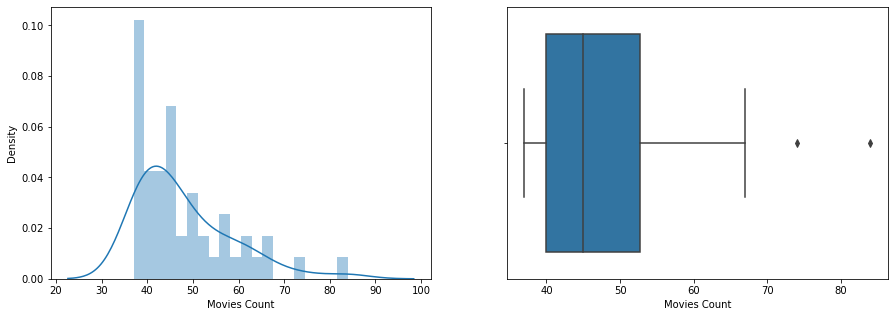

In [ ]:
f, ax = plt.subplots(1, 2 , figsize = (15, 5))
sns.distplot(casts_data_movies['Movies Count'][:50], bins = 20, kde = True, ax = ax[0])
sns.boxplot(casts_data_movies['Movies Count'][:50], ax = ax[1])
plt.show()

In [ ]:
# Creating distinct dataframes only with the movies present on individual streaming platforms
netflix_casts_movies = casts_data_movies[casts_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_casts_movies = netflix_casts_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

hulu_casts_movies = casts_data_movies[casts_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_casts_movies = hulu_casts_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

prime_video_casts_movies = casts_data_movies[casts_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_casts_movies = prime_video_casts_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)

disney_casts_movies = casts_data_movies[casts_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_casts_movies = disney_casts_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)

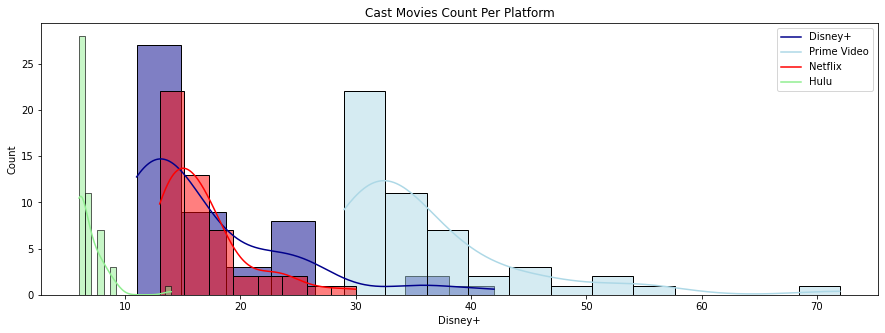

In [ ]:
# Defining plot size and title
plt.figure(figsize = (15, 5))
plt.title('Cast Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(disney_casts_movies['Disney+'][:50], color = 'darkblue', legend = True, kde = True)  
sns.histplot(prime_video_casts_movies['Prime Video'][:50], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_casts_movies['Netflix'][:50], color = 'red', legend = True, kde = True)
sns.histplot(hulu_casts_movies['Hulu'][:50], color = 'lightgreen', legend = True, kde = True)                                
 
# Setting the legend
plt.legend(['Disney+', 'Prime Video', 'Netflix', 'Hulu'])
plt.show()

In [ ]:
print(f'''
      The Cast with Highest Movies Count Rating Ever Got is '{df_casts_high_movies['Cast'][0]}' : '{df_casts_high_movies['Movies Count'].max()}'\n
      The Cast with Lowest Movies Count Rating Ever Got is '{df_casts_low_movies['Cast'][0]}' : '{df_casts_low_movies['Movies Count'].min()}'\n
      
      The Cast with Highest Movies Count Rating on 'Netflix' is '{netflix_casts_high_movies['Cast'][0]}' : '{netflix_casts_high_movies['Netflix'].max()}'\n
      The Cast with Lowest Movies Count Rating on 'Netflix' is '{netflix_casts_low_movies['Cast'][0]}' : '{netflix_casts_low_movies['Netflix'].min()}'\n
      
      The Cast with Highest Movies Count Rating on 'Hulu' is '{hulu_casts_high_movies['Cast'][0]}' : '{hulu_casts_high_movies['Hulu'].max()}'\n
      The Cast with Lowest Movies Count Rating on 'Hulu' is '{hulu_casts_low_movies['Cast'][0]}' : '{hulu_casts_low_movies['Hulu'].min()}'\n
      
      The Cast with Highest Movies Count Rating on 'Prime Video' is '{prime_video_casts_high_movies['Cast'][0]}' : '{prime_video_casts_high_movies['Prime Video'].max()}'\n
      The Cast with Lowest Movies Count Rating on 'Prime Video' is '{prime_video_casts_low_movies['Cast'][0]}' : '{prime_video_casts_low_movies['Prime Video'].min()}'\n
      
      The Cast with Highest Movies Count Rating on 'Disney+' is '{disney_casts_high_movies['Cast'][0]}' : '{disney_casts_high_movies['Disney+'].max()}'\n
      The Cast with Lowest Movies Count Rating on 'Disney+' is '{disney_casts_low_movies['Cast'][0]}' : '{disney_casts_low_movies['Disney+'].min()}'\n 
      ''')


      The Cast with Highest Movies Count Rating Ever Got is 'Frank Welker' : '84'

      The Cast with Lowest Movies Count Rating Ever Got is 'Oliver Lewis' : '1'

      
      The Cast with Highest Movies Count Rating on 'Netflix' is 'Shah Rukh Khan' : '30'

      The Cast with Lowest Movies Count Rating on 'Netflix' is 'Hayley Norris' : '0'

      
      The Cast with Highest Movies Count Rating on 'Hulu' is 'Frank Welker' : '14'

      The Cast with Lowest Movies Count Rating on 'Hulu' is 'Hayley Norris' : '0'

      
      The Cast with Highest Movies Count Rating on 'Prime Video' is 'Herman Hack' : '72'

      The Cast with Lowest Movies Count Rating on 'Prime Video' is 'Rob Moore' : '0'

      
      The Cast with Highest Movies Count Rating on 'Disney+' is 'Frank Welker' : '42'

      The Cast with Lowest Movies Count Rating on 'Disney+' is 'Hayley Norris' : '0'
 
      


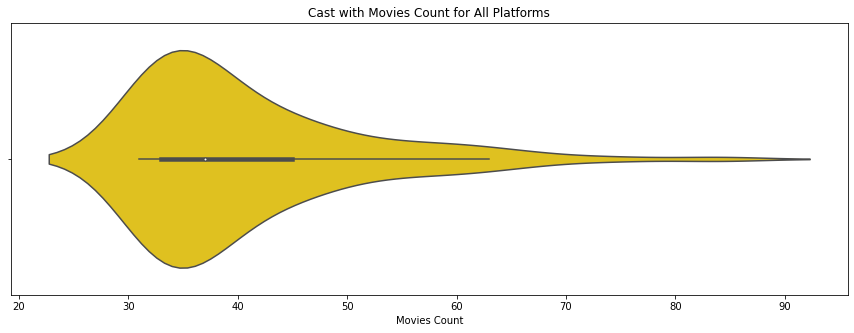

In [ ]:
# Distribution of tvshow rating in each platform
plt.figure(figsize = (15, 5))
plt.title('Cast with Movies Count for All Platforms')
sns.violinplot(x = casts_data_movies['Movies Count'][:100], color = 'gold', legend = True, kde = True, shade = False)
plt.show()

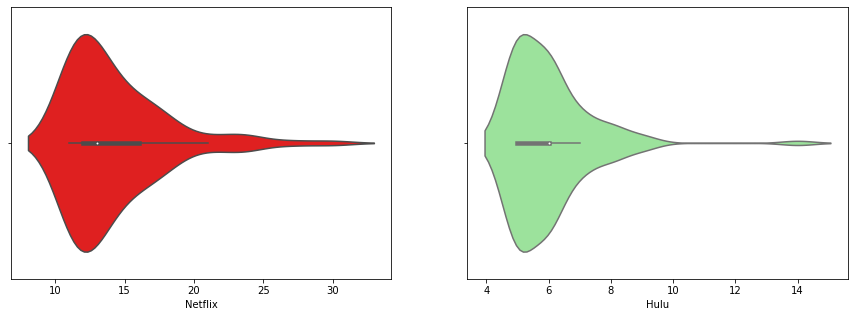

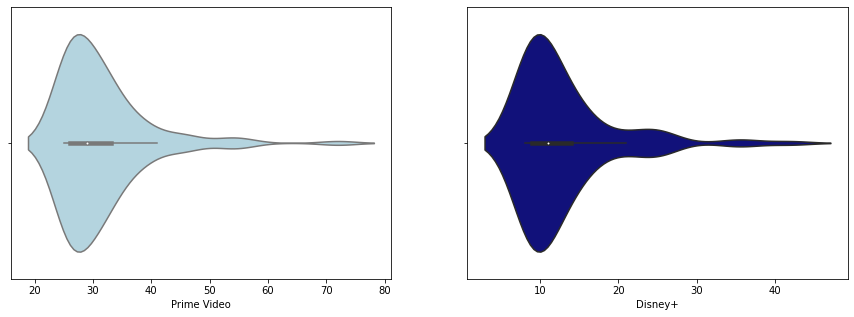

In [ ]:
# Distribution of Cast Movies Count in each platform
f1, ax1 = plt.subplots(1, 2 , figsize = (15, 5))
sns.violinplot(x = netflix_casts_movies['Netflix'][:100], color = 'red', ax = ax1[0])
sns.violinplot(x = hulu_casts_movies['Hulu'][:100], color = 'lightgreen', ax = ax1[1])
 
f2, ax2 = plt.subplots(1, 2 , figsize = (15, 5))
sns.violinplot(x = prime_video_casts_movies['Prime Video'][:100], color = 'lightblue', ax = ax2[0])
sns.violinplot(x = disney_casts_movies['Disney+'][:100], color = 'darkblue', ax = ax2[1])
plt.show()

In [ ]:
print(f'''
      Accross All Platforms the Average Movies Count of Cast is '{round(casts_data_movies['Movies Count'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Cast on 'Netflix' is '{round(netflix_casts_movies['Netflix'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Cast on 'Hulu' is '{round(hulu_casts_movies['Hulu'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Cast on 'Prime Video' is '{round(prime_video_casts_movies['Prime Video'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Cast on 'Disney+' is '{round(disney_casts_movies['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Movies Count of Cast is '1.68'

      The Average Movies Count of Cast on 'Netflix' is '1.32'

      The Average Movies Count of Cast on 'Hulu' is '1.15'

      The Average Movies Count of Cast on 'Prime Video' is '1.52'

      The Average Movies Count of Cast on 'Disney+' is '1.31'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Cast is '{casts_data_movies['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Netflix' is '{netflix_casts_movies['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Hulu' is '{hulu_casts_movies['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Prime Video' is '{prime_video_casts_movies['Cast'].unique().shape[0]}'\n
      Total Count of Cast on 'Disney+' is '{disney_casts_movies['Cast'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Cast is '315871'

      Total Count of Cast on 'Netflix' is '91466'

      Total Count of Cast on 'Hulu' is '37628'

      Total Count of Cast on 'Prime Video' is '240844'

      Total Count of Cast on 'Disney+' is '20717'
 
      


In [ ]:
fig = px.bar(x = casts_data_movies['Cast'][:50], y = casts_data_movies['Movies Count'][:50], 
             color = casts_data_movies['Movies Count'][:50], color_continuous_scale = 'Teal_r', 
             labels = { 'x' : 'Cast', 'y' : 'Number of Movies'})
fig.show()

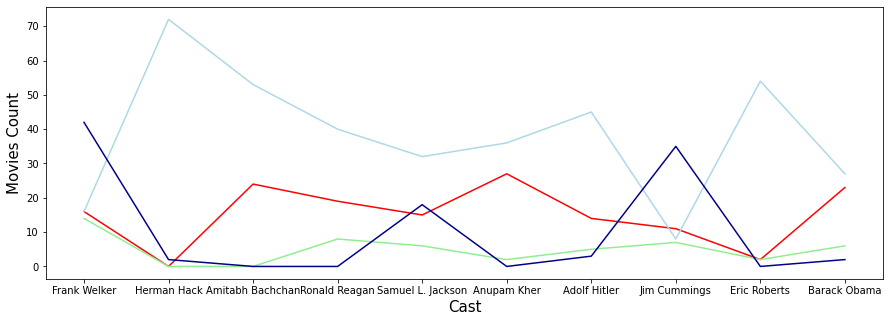

In [ ]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = casts_data_movies['Cast'][:10], y = casts_data_movies['Netflix'][:10], color = 'red')
sns.lineplot(x = casts_data_movies['Cast'][:10], y = casts_data_movies['Hulu'][:10], color = 'lightgreen')
sns.lineplot(x = casts_data_movies['Cast'][:10], y = casts_data_movies['Prime Video'][:10], color = 'lightblue')
sns.lineplot(x = casts_data_movies['Cast'][:10], y = casts_data_movies['Disney+'][:10], color = 'darkblue')
plt.xlabel('Cast', fontsize = 15)
plt.ylabel('Movies Count', fontsize = 15)
plt.show()

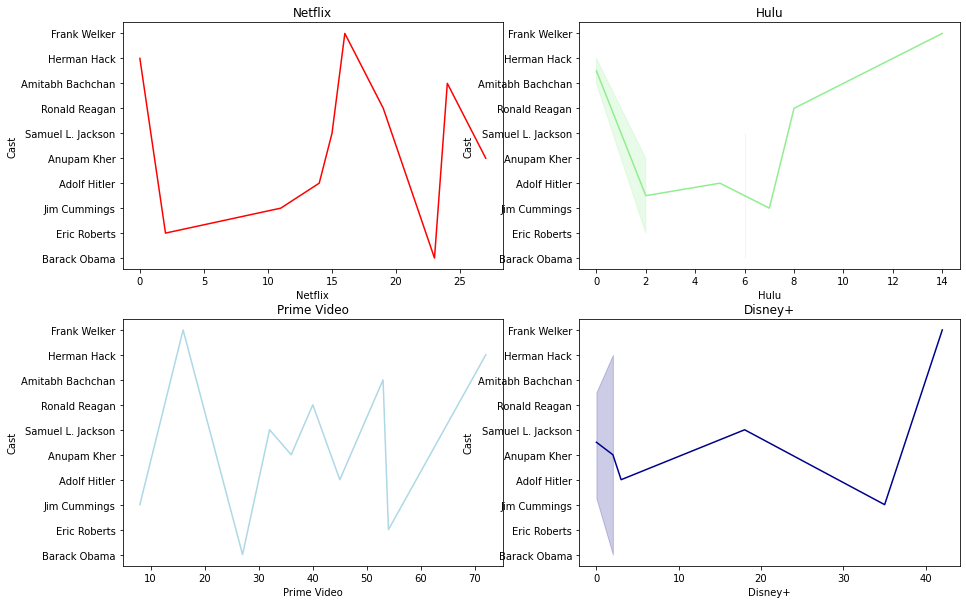

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15 , 10))
 
n_c_ax1 = sns.lineplot(y = casts_data_movies['Cast'][:10], x = casts_data_movies['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_c_ax2 = sns.lineplot(y = casts_data_movies['Cast'][:10], x = casts_data_movies['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_c_ax3 = sns.lineplot(y = casts_data_movies['Cast'][:10], x = casts_data_movies['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_c_ax4 = sns.lineplot(y = casts_data_movies['Cast'][:10], x = casts_data_movies['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_c_ax1.title.set_text(labels[0])
h_c_ax2.title.set_text(labels[1])
p_c_ax3.title.set_text(labels[2])
d_c_ax4.title.set_text(labels[3])
 
plt.show()

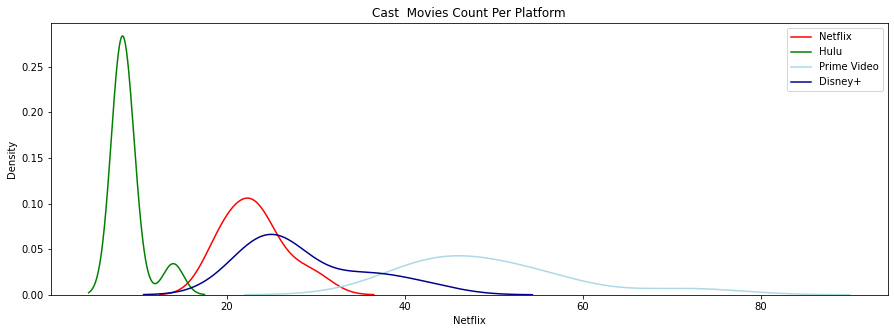

In [ ]:
# Defining plot size and title
plt.figure(figsize = (15, 5))
plt.title('Cast  Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_casts_movies['Netflix'][:10], color = 'red', legend = True)
sns.kdeplot(hulu_casts_movies['Hulu'][:10], color = 'green', legend = True)
sns.kdeplot(prime_video_casts_movies['Prime Video'][:10], color = 'lightblue', legend = True)
sns.kdeplot(disney_casts_movies['Disney+'][:10], color = 'darkblue', legend = True)                                                                         
 
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

In [ ]:
df_movies_genres = df_movies.copy()

In [ ]:
# Create genres dict where key=name and value = number of genres
 
genres = {}
 
for i in df_movies_genres['Genres'].dropna():
    if i != "NA":
        #print(i,len(i.split(',')))
        genres[i] = len(i.split(','))
    else:
        genres[i] = 0
    
# Add this information to our dataframe as a new column
 
df_movies_genres['Number of Genres'] = df_movies_genres['Genres'].map(genres).astype(int)

In [ ]:
df_genres_most_movies = df_movies_genres.sort_values(by = 'Number of Genres', ascending = False).reset_index()
df_genres_most_movies = df_genres_most_movies.drop(['index'], axis = 1)
# filter = (df_movies_genres['Genres'] == (df_movies_genres['Number of Genres'].max()))
# df_genres_most_movies = df_movies_genres[filter]
 
# mostest_rated_tvshow = df_movies_genres.loc[df_movies_genres['Number of Genres'].idxmax()]
 
print('\nMovies with Highest Ever Genres Count are : \n')
df_genres_most_movies.head(5)


Movies with Highest Ever Genres Count are : 



ID                              Title  Year Age IMDb Rotten Tomatoes  \
0  12791      Gappa, the Triphibian Monster  1967   7  4.3              NA   
1   6260                           Motorama  1991  16  6.4              60   
2    288  April and the Extraordinary World  2015   7  7.3              97   
3   7986                   Gumby: The Movie  1995   0  6.3              20   
4   8618       Inspector Gadget's Last Case  2002   7  4.9              NA   

                          Directors  \
0                   Hiroshi Noguchi   
1                       Barry Shils   
2  Christian Desmares,Franck Ekinci   
3                        Art Clokey   
4                   Michael Maliani   

                                                Cast  \
0  Tamio Kawaji,Yôko Yamamoto,Yûji Odaka,Kôji Wad...   
1  Jordan Christopher Michael,Martha Quinn,Michae...   
2  Marion Cotillard,Marc-André Grondin,Philippe K...   
3  Dal McKennon,Art Clokey,Gloria Clokey,Manny La...   
4  Maurice LaMarche,Bettina Bush,Jim Byrnes,Micha...   

                                              Genres                Country  \
0  Action,Adventure,Comedy,Drama,Family,Fantasy,H...                  Japan   
1  Adventure,Comedy,Crime,Drama,Fantasy,Mystery,S...          United States   
2  Animation,Adventure,Comedy,Drama,Family,Myster...  France,Canada,Belgium   
3  Animation,Adventure,Comedy,Family,Fantasy,Musi...          United States   
4  Animation,Action,Adventure,Comedy,Crime,Family...   Canada,United States   

   ...                                           Plotline Runtime   Kind  \
0  ...  A frontier preacher's life is destroyed when a...      90  movie   
1  ...  An American nurse takes a temporary position o...      90  movie   
2  ...  In 1941, the world is radically different from...     105  movie   
3  ...  Part I depicts the lives of two low-life thiev...      90  movie   
4  ...  The tough gun-man Burt Sullivan (Franco Nero) ...      73  movie   

  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider Number of Genres  
0       0     0            1        0     0       Prime Video                9  
1       0     0            1        0     0       Prime Video                8  
2       1     0            0        0     0           Netflix                8  
3       0     0            1        0     0       Prime Video                8  
4       0     0            1        0     0       Prime Video                8  

[5 rows x 21 columns]

In [ ]:
df_genres_least_movies = df_movies_genres.sort_values(by = 'Number of Genres', ascending = True).reset_index()
df_genres_least_movies = df_genres_least_movies.drop(['index'], axis = 1)
# filter = (df_movies_genres['Genres'] == (df_movies_genres['Number of Genres'].min()))
# df_genres_least_movies = df_movies_genres[filter]
 
print('\nMovies with Lowest Ever Genres Count are : \n')
df_genres_least_movies.head(5)


Movies with Lowest Ever Genres Count are : 



ID                                           Title  Year Age IMDb  \
0   3455  ChuChuTV Surprise Eggs Learning Videos (Hindi)  2019  NR   NA   
1  15658            Princess Diana: The Quiet Revolution  2017  NR   NA   
2  15663        Lost Technology of Ancient Egypt: Part I  2018  NR   NA   
3  15666                      Brad Stine - Boycott This!  2016  NR   NA   
4  11897   Magick of Solomon: Lemegeton Secrets Revealed  2010  NR  3.8   

  Rotten Tomatoes Directors Cast Genres Country  ...  \
0              NA        NA   NA     NA      NA  ...   
1              NA        NA   NA     NA      NA  ...   
2              NA        NA   NA     NA      NA  ...   
3              NA        NA   NA     NA      NA  ...   
4              NA        NA   NA     NA      NA  ...   

                                            Plotline Runtime   Kind Netflix  \
0                                                 NA      NA  movie       1   
1  From deep in the heart of Texas, the Christian...      NA  movie       0   
2  «Napoli Dogs» is a soap opera set in the charm...      NA  movie       0   
3                                                 NA      NA  movie       0   
4  Still reeling from a rocky divorce and the rec...      NA  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Genres  
0     0            0        0     0           Netflix                0  
1     0            1        0     0       Prime Video                0  
2     0            1        0     0       Prime Video                0  
3     0            1        0     0       Prime Video                0  
4     0            1        0     0       Prime Video                0  

[5 rows x 21 columns]

In [ ]:
print(f'''
      Total '{df_movies_genres['Genres'].unique().shape[0]}' unique Genres Counts were Given, They were Like this,\n
      
      {df_movies_genres.sort_values(by = 'Number of Genres', ascending = False)['Genres'].unique()[:5]} etc.\n
 
      The Highest Ever Genres Count Ever Any TV Show Got is '{df_genres_most_movies['Title'][0]}' : '{df_genres_most_movies['Number of Genres'].max()}'\n
 
      The Lowest Ever Genres Count Ever Any TV Show Got is '{df_genres_least_movies['Title'][0]}' : '{df_genres_least_movies['Number of Genres'].min()}'\n
      ''')


      Total '1888' unique Genres Counts were Given, They were Like this,

      
      ['Action,Adventure,Comedy,Drama,Family,Fantasy,Horror,Sci-Fi,Thriller'
 'Adventure,Comedy,Crime,Drama,Fantasy,Mystery,Sci-Fi,Thriller'
 'Animation,Adventure,Comedy,Drama,Family,Mystery,Sci-Fi,Thriller'
 'Animation,Adventure,Comedy,Family,Fantasy,Music,Sci-Fi,Western'
 'Animation,Action,Adventure,Comedy,Crime,Family,Mystery,Sci-Fi'] etc.

 
      The Highest Ever Genres Count Ever Any TV Show Got is 'Gappa, the Triphibian Monster' : '9'

 
      The Lowest Ever Genres Count Ever Any TV Show Got is 'ChuChuTV Surprise Eggs Learning Videos (Hindi)' : '0'

      


In [ ]:
netflix_genres_most_movies = df_genres_most_movies.loc[df_genres_most_movies['Netflix']==1].reset_index()
netflix_genres_most_movies = netflix_genres_most_movies.drop(['index'], axis = 1)
 
netflix_genres_least_movies = df_genres_least_movies.loc[df_genres_least_movies['Netflix']==1].reset_index()
netflix_genres_least_movies = netflix_genres_least_movies.drop(['index'], axis = 1)
 
netflix_genres_most_movies.head(5)

ID                                              Title  Year Age IMDb  \
0   288                  April and the Extraordinary World  2015   7  7.3   
1  2047  Alpha and Omega: The Legend of the Saw Tooth Cave  2014   7  5.4   
2  1054                                  WHAT DID JACK DO?  2017  16  6.5   
3   122                          The Princess and the Frog  2009   0  7.1   
4  2012                       Tremors 4: The Legend Begins  2004  13  5.3   

  Rotten Tomatoes                         Directors  \
0              97  Christian Desmares,Franck Ekinci   
1              NA                      Richard Rich   
2              92                       David Lynch   
3              85          Ron Clements,John Musker   
4              NA                       S.S. Wilson   

                                                Cast  \
0  Marion Cotillard,Marc-André Grondin,Philippe K...   
1  Kate Higgins,Ben Diskin,Debi Derryberry,Mariev...   
2      Jack Cruz,David Lynch,Toototabon,Emily Stofle   
3  Anika Noni Rose,Bruno Campos,Keith David,Micha...   
4  Michael Gross,Sara Botsford,Billy Drago,Brent ...   

                                              Genres                Country  \
0  Animation,Adventure,Comedy,Drama,Family,Myster...  France,Canada,Belgium   
1  Animation,Action,Adventure,Comedy,Drama,Family...    United States,India   
2  Short,Comedy,Crime,Drama,Fantasy,Music,Mystery...          United States   
3  Animation,Adventure,Comedy,Family,Fantasy,Musi...          United States   
4  Action,Adventure,Comedy,Horror,Sci-Fi,Thriller...          United States   

   ...                                           Plotline Runtime   Kind  \
0  ...  In 1941, the world is radically different from...     105  movie   
1  ...                                                 NA      45  movie   
2  ...  Dressed up in a formal suit, evoking memories ...      17  movie   
3  ...  A modern day retelling of the classic story Th...      97  movie   
4  ...  In 1889, the town of Rejection, Nevada, depend...     101  movie   

  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider Number of Genres  
0       1     0            0        0     0           Netflix                8  
1       1     0            0        0     0           Netflix                8  
2       1     0            0        0     0           Netflix                8  
3       1     0            0        1     0           Netflix                7  
4       1     0            0        0     0           Netflix                7  

[5 rows x 21 columns]

In [ ]:
hulu_genres_most_movies = df_genres_most_movies.loc[df_genres_most_movies['Hulu']==1].reset_index()
hulu_genres_most_movies = hulu_genres_most_movies.drop(['index'], axis = 1)
 
hulu_genres_least_movies = df_genres_least_movies.loc[df_genres_least_movies['Hulu']==1].reset_index()
hulu_genres_least_movies = hulu_genres_least_movies.drop(['index'], axis = 1)
 
hulu_genres_most_movies.head(5)

ID             Title  Year Age IMDb Rotten Tomatoes  \
0  3947   Sherlock Gnomes  2018   7  5.2              27   
1  4032      Wakko's Wish  1999   0  7.3              NA   
2  3549            Thelma  2017  NR    7              85   
3  3583        Anthropoid  2016  16  7.2              66   
4  3828  The Osiris Child  2016  NR  5.6              62   

                                           Directors  \
0                                     John Stevenson   
1  Liz Holzman,Rusty Mills,Tom Ruegger,Russell Ca...   
2                                      Joachim Trier   
3                                         Sean Ellis   
4                                       Shane Abbess   

                                                Cast  \
0  Kelly Asbury,Mary J. Blige,Emily Blunt,Julio B...   
1  Rob Paulsen,Jess Harnell,Tress MacNeille,Mauri...   
2  Eili Harboe,Kaya Wilkins,Henrik Rafaelsen,Elle...   
3  Jamie Dornan,Cillian Murphy,Brian Caspe,Karel ...   
4  Kellan Lutz,Daniel MacPherson,Isabel Lucas,Luk...   

                                              Genres  \
0  Animation,Adventure,Comedy,Family,Fantasy,Myst...   
1  Animation,Adventure,Comedy,Drama,Family,Fantas...   
2  Drama,Fantasy,Horror,Mystery,Romance,Sci-Fi,Th...   
3  Action,Biography,Drama,History,Romance,Thrille...   
4  Action,Adventure,Drama,Fantasy,Horror,Sci-Fi,T...   

                                             Country  ...  \
0  United Kingdom,United States,India,Canada,Fran...  ...   
1                                      United States  ...   
2                       Norway,France,Denmark,Sweden  ...   
3  Czech Republic,United Kingdom,United States,Fr...  ...   
4                                          Australia  ...   

                                            Plotline Runtime   Kind Netflix  \
0  Sherlock Gnomes (Johnny Depp) and his assistan...      86  movie       0   
1  The Warner Brothers (and the Warner Sister) go...      80  movie       0   
2  Having just enrolled at a university in Oslo a...     116  movie       0   
3  ANTHROPOID is based on the extraordinary true ...     120  movie       0   
4  Set in a time of interplanetary colonization, ...      99  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Genres  
0     1            1        0     0       Prime Video                7  
1     1            0        0     0              Hulu                7  
2     1            0        0     0              Hulu                7  
3     1            0        0     0              Hulu                7  
4     1            0        0     0              Hulu                7  

[5 rows x 21 columns]

In [ ]:
prime_video_genres_most_movies = df_genres_most_movies.loc[df_genres_most_movies['Prime Video']==1].reset_index()
prime_video_genres_most_movies = prime_video_genres_most_movies.drop(['index'], axis = 1)
 
prime_video_genres_least_movies = df_genres_least_movies.loc[df_genres_least_movies['Prime Video']==1].reset_index()
prime_video_genres_least_movies = prime_video_genres_least_movies.drop(['index'], axis = 1)
 
prime_video_genres_most_movies.head(5)

ID                          Title  Year Age IMDb Rotten Tomatoes  \
0  12791  Gappa, the Triphibian Monster  1967   7  4.3              NA   
1   6260                       Motorama  1991  16  6.4              60   
2   7986               Gumby: The Movie  1995   0  6.3              20   
3   8618   Inspector Gadget's Last Case  2002   7  4.9              NA   
4  16827    One Thousand and One Nights  2015  NR  6.6              NA   

         Directors                                               Cast  \
0  Hiroshi Noguchi  Tamio Kawaji,Yôko Yamamoto,Yûji Odaka,Kôji Wad...   
1      Barry Shils  Jordan Christopher Michael,Martha Quinn,Michae...   
2       Art Clokey  Dal McKennon,Art Clokey,Gloria Clokey,Manny La...   
3  Michael Maliani  Maurice LaMarche,Bettina Bush,Jim Byrnes,Micha...   
4  Eiichi Yamamoto  Sachiko Itô,Haruko Katô,Noboru Mitani,Hiroshi ...   

                                              Genres               Country  \
0  Action,Adventure,Comedy,Drama,Family,Fantasy,H...                 Japan   
1  Adventure,Comedy,Crime,Drama,Fantasy,Mystery,S...         United States   
2  Animation,Adventure,Comedy,Family,Fantasy,Musi...         United States   
3  Animation,Action,Adventure,Comedy,Crime,Family...  Canada,United States   
4  Animation,Action,Adventure,Comedy,Drama,Fantas...                 Japan   

   ...                                           Plotline Runtime   Kind  \
0  ...  A frontier preacher's life is destroyed when a...      90  movie   
1  ...  An American nurse takes a temporary position o...      90  movie   
2  ...  Part I depicts the lives of two low-life thiev...      90  movie   
3  ...  The tough gun-man Burt Sullivan (Franco Nero) ...      73  movie   
4  ...                                                 NA     128  movie   

  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider Number of Genres  
0       0     0            1        0     0       Prime Video                9  
1       0     0            1        0     0       Prime Video                8  
2       0     0            1        0     0       Prime Video                8  
3       0     0            1        0     0       Prime Video                8  
4       0     0            1        0     0       Prime Video                8  

[5 rows x 21 columns]

In [ ]:
disney_genres_most_movies = df_genres_most_movies.loc[df_genres_most_movies['Disney+']==1].reset_index()
disney_genres_most_movies = disney_genres_most_movies.drop(['index'], axis = 1)
 
disney_genres_least_movies = df_genres_least_movies.loc[df_genres_least_movies['Disney+']==1].reset_index()
disney_genres_least_movies = disney_genres_least_movies.drop(['index'], axis = 1)
 
disney_genres_most_movies.head(5)

ID                              Title  Year Age IMDb Rotten Tomatoes  \
0  16106            Atlantis: Milo's Return  2003   0  5.1              NA   
1  15997  The Wizards Return: Alex vs. Alex  2013   7  6.5              NA   
2    122          The Princess and the Frog  2009   0  7.1              85   
3  15958                     Saludos Amigos  1942  13  6.1              75   
4  15986                     Leroy & Stitch  2006   0  6.2              40   

                                           Directors  \
0                Victor Cook,Toby Shelton,Tad Stones   
1                                    Victor Gonzalez   
2                           Ron Clements,John Musker   
3  Wilfred Jackson,Jack Kinney,Hamilton Luske,Bil...   
4                        Tony Craig,Roberts Gannaway   

                                                Cast  \
0  James Arnold Taylor,Cree Summer,John Mahoney,J...   
1  Selena Gomez,Jake T. Austin,Jennifer Stone,Gre...   
2  Anika Noni Rose,Bruno Campos,Keith David,Micha...   
3  Fred Shields,José Oliveira,Lee Blair,Mary Blai...   
4  Daveigh Chase,Chris Sanders,David Ogden Stiers...   

                                              Genres  \
0  Animation,Action,Adventure,Comedy,Drama,Family...   
1  Animation,Action,Adventure,Comedy,Drama,Family...   
2  Animation,Adventure,Comedy,Family,Fantasy,Musi...   
3  Animation,Short,Adventure,Comedy,Family,Fantas...   
4  Animation,Action,Adventure,Comedy,Drama,Family...   

                        Country  ...  \
0                 United States  ...   
1                 United States  ...   
2                 United States  ...   
3  United States,Brazil,Bolivia  ...   
4                 United States  ...   

                                            Plotline Runtime   Kind Netflix  \
0                                                 NA      70  movie       0   
1  Dylan Shoenfield is the pink princess of the u...      60  movie       0   
2  A modern day retelling of the classic story Th...      97  movie       1   
3                                                 NA      42  movie       0   
4  Five happy years after baby Mary's arrival in ...      73  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Genres  
0     0            0        1     0           Disney+                8  
1     0            0        1     0           Disney+                8  
2     0            0        1     0           Netflix                7  
3     0            0        1     0           Disney+                7  
4     0            0        1     0           Disney+                7  

[5 rows x 21 columns]

In [ ]:
print(f'''
      The TV Show with Highest Genres Count Ever Got is '{df_genres_most_movies['Title'][0]}' : '{df_genres_most_movies['Number of Genres'].max()}'\n
      The TV Show with Lowest Genres Count Ever Got is '{df_genres_least_movies['Title'][0]}' : '{df_genres_least_movies['Number of Genres'].min()}'\n
      
      The TV Show with Highest Genres Count on 'Netflix' is '{netflix_genres_most_movies['Title'][0]}' : '{netflix_genres_most_movies['Number of Genres'].max()}'\n
      The TV Show with Lowest Genres Count on 'Netflix' is '{netflix_genres_least_movies['Title'][0]}' : '{netflix_genres_least_movies['Number of Genres'].min()}'\n
      
      The TV Show with Highest Genres Count on 'Hulu' is '{hulu_genres_most_movies['Title'][0]}' : '{hulu_genres_most_movies['Number of Genres'].max()}'\n
      The TV Show with Lowest Genres Count on 'Hulu' is '{hulu_genres_least_movies['Title'][0]}' : '{hulu_genres_least_movies['Number of Genres'].min()}'\n
      
      The TV Show with Highest Genres Count on 'Prime Video' is '{prime_video_genres_most_movies['Title'][0]}' : '{prime_video_genres_most_movies['Number of Genres'].max()}'\n
      The TV Show with Lowest Genres Count on 'Prime Video' is '{prime_video_genres_least_movies['Title'][0]}' : '{prime_video_genres_least_movies['Number of Genres'].min()}'\n
      
      The TV Show with Highest Genres Count on 'Disney+' is '{disney_genres_most_movies['Title'][0]}' : '{disney_genres_most_movies['Number of Genres'].max()}'\n
      The TV Show with Lowest Genres Count on 'Disney+' is '{disney_genres_least_movies['Title'][0]}' : '{disney_genres_least_movies['Number of Genres'].min()}'\n 
      ''')


      The TV Show with Highest Genres Count Ever Got is 'Gappa, the Triphibian Monster' : '9'

      The TV Show with Lowest Genres Count Ever Got is 'ChuChuTV Surprise Eggs Learning Videos (Hindi)' : '0'

      
      The TV Show with Highest Genres Count on 'Netflix' is 'April and the Extraordinary World' : '8'

      The TV Show with Lowest Genres Count on 'Netflix' is 'ChuChuTV Surprise Eggs Learning Videos (Hindi)' : '0'

      
      The TV Show with Highest Genres Count on 'Hulu' is 'Sherlock Gnomes' : '7'

      The TV Show with Lowest Genres Count on 'Hulu' is 'Thomas & Friends: Songs from the Station' : '0'

      
      The TV Show with Highest Genres Count on 'Prime Video' is 'Gappa, the Triphibian Monster' : '9'

      The TV Show with Lowest Genres Count on 'Prime Video' is 'Princess Diana: The Quiet Revolution' : '0'

      
      The TV Show with Highest Genres Count on 'Disney+' is 'Atlantis: Milo's Return' : '8'

      The TV Show with Lowest Genres Count on 'Disney+

In [ ]:
print(f'''
      Accross All Platforms the Average Genres Count is '{round(df_movies_genres['Number of Genres'].mean(), ndigits = 2)}'\n
      The Average Genres Count on 'Netflix' is '{round(netflix_genres_most_movies['Number of Genres'].mean(), ndigits = 2)}'\n
      The Average Genres Count on 'Hulu' is '{round(hulu_genres_most_movies['Number of Genres'].mean(), ndigits = 2)}'\n
      The Average Genres Count on 'Prime Video' is '{round(prime_video_genres_most_movies['Number of Genres'].mean(), ndigits = 2)}'\n
      The Average Genres Count on 'Disney+' is '{round(disney_genres_most_movies['Number of Genres'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Genres Count is '2.37'

      The Average Genres Count on 'Netflix' is '2.39'

      The Average Genres Count on 'Hulu' is '2.62'

      The Average Genres Count on 'Prime Video' is '2.3'

      The Average Genres Count on 'Disney+' is '3.73'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Genres is '{df_movies_genres['Genres'].unique().shape[0]}'\n
      Total Count of Genres on 'Netflix' is '{netflix_genres_most_movies['Genres'].unique().shape[0]}'\n
      Total Count of Genres on 'Hulu' is '{hulu_genres_most_movies['Genres'].unique().shape[0]}'\n
      Total Count of Genres on 'Prime Video' is '{prime_video_genres_most_movies['Genres'].unique().shape[0]}'\n
      Total Count of Genres on 'Disney+' is '{disney_genres_most_movies['Genres'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Genres is '1888'

      Total Count of Genres on 'Netflix' is '700'

      Total Count of Genres on 'Hulu' is '364'

      Total Count of Genres on 'Prime Video' is '1511'

      Total Count of Genres on 'Disney+' is '281'
 
      


In [ ]:
df_movies_genres.drop(df_movies_genres.loc[df_movies_genres['Genres'] == "NA"].index, inplace = True)
# df_movies_genres = df_movies_genres[df_movies_genres.Genres != "NA"]

In [ ]:
df_gen = df_movies_genres['Genres'].str.split(',').apply(pd.Series).stack()
del df_movies_genres['Genres']
df_gen.index = df_gen.index.droplevel(-1)
df_gen.name = 'Genres'
df_movies_genres = df_movies_genres.join(df_gen)
df_movies_genres.drop_duplicates(inplace = True)

In [ ]:
df_movies_genres.head(5)

ID       Title  Year Age IMDb Rotten Tomatoes  \
0   1   Inception  2010  13  8.8              87   
0   1   Inception  2010  13  8.8              87   
0   1   Inception  2010  13  8.8              87   
0   1   Inception  2010  13  8.8              87   
1   2  The Matrix  1999  16  8.7              88   

                        Directors  \
0               Christopher Nolan   
0               Christopher Nolan   
0               Christopher Nolan   
0               Christopher Nolan   
1  Lana Wachowski,Lilly Wachowski   

                                                Cast  \
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
1  Keanu Reeves,Laurence Fishburne,Carrie-Anne Mo...   

                        Country                 Language  ... Runtime   Kind  \
0  United States,United Kingdom  English,Japanese,French  ...     148  movie   
0  United States,United Kingdom  English,Japanese,French  ...     148  movie   
0  United States,United Kingdom  English,Japanese,French  ...     148  movie   
0  United States,United Kingdom  English,Japanese,French  ...     148  movie   
1                 United States                  English  ...     136  movie   

  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  \
0       1     0            0        0     0           Netflix   
0       1     0            0        0     0           Netflix   
0       1     0            0        0     0           Netflix   
0       1     0            0        0     0           Netflix   
1       1     0            0        0     0           Netflix   

  Number of Genres     Genres  
0                4     Action  
0                4  Adventure  
0                4     Sci-Fi  
0                4   Thriller  
1                2     Action  

[5 rows x 21 columns]

In [ ]:
genres_count = df_movies_genres.groupby('Genres')['Title'].count()
genres_tvshow = df_movies_genres.groupby('Genres')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
genres_data_movies = pd.concat([genres_count, genres_tvshow], axis = 1).reset_index().rename(columns = {'Title' : 'Movies Count'})
genres_data_movies = genres_data_movies.sort_values(by = 'Movies Count', ascending = False)

In [ ]:
genres_data_movies.head(5)

Genres  Movies Count  Netflix  Hulu  Prime Video  Disney+
7         Drama          7381     1592   511         5436      150
4        Comedy          4718     1351   308         3012      284
23     Thriller          3498      717   264         2660       23
0        Action          2801      617   158         2058       99
6   Documentary          2556      515   152         1881       65

In [ ]:
# Genres with Movies Counts - All Platforms Combined
genres_data_movies.sort_values(by = 'Movies Count', ascending = False)[:10]

Genres  Movies Count  Netflix  Hulu  Prime Video  Disney+
7         Drama          7381     1592   511         5436      150
4        Comedy          4718     1351   308         3012      284
23     Thriller          3498      717   264         2660       23
0        Action          2801      617   158         2058       99
6   Documentary          2556      515   152         1881       65
18      Romance          2476      595   180         1731       88
12       Horror          2266      287   139         1903       15
5         Crime          1963      444   122         1462       24
1     Adventure          1849      358   133         1181      262
8        Family          1513      314   120          720      414

In [ ]:
df_genres_high_movies = genres_data_movies.sort_values(by = 'Movies Count', ascending = False).reset_index()
df_genres_high_movies = df_genres_high_movies.drop(['index'], axis = 1)
# filter = (genres_data_movies['Movies Count'] = =  (genres_data_movies['Movies Count'].max()))
# df_genres_high_movies = genres_data_movies[filter]
 
# highest_rated_tvshow = genres_data_movies.loc[genres_data_movies['Movies Count'].idxmax()]
 
print('\nGenres with Highest Ever Movies Count are : All Platforms Combined\n')
df_genres_high_movies.head(5)


Genres with Highest Ever Movies Count are : All Platforms Combined



Genres  Movies Count  Netflix  Hulu  Prime Video  Disney+
0        Drama          7381     1592   511         5436      150
1       Comedy          4718     1351   308         3012      284
2     Thriller          3498      717   264         2660       23
3       Action          2801      617   158         2058       99
4  Documentary          2556      515   152         1881       65

In [ ]:
df_genres_low_movies = genres_data_movies.sort_values(by = 'Movies Count', ascending = True).reset_index()
df_genres_low_movies = df_genres_low_movies.drop(['index'], axis = 1)
# filter = (genres_data_movies['Movies Count'] = =  (genres_data_movies['Movies Count'].min()))
# df_genres_low_movies = genres_data_movies[filter]
 
print('\nGenres with Lowest Ever Movies Count are : All Platforms Combined\n')
df_genres_low_movies.head(5)


Genres with Lowest Ever Movies Count are : All Platforms Combined



Genres  Movies Count  Netflix  Hulu  Prime Video  Disney+
0   Talk-Show             2        0     0            2        0
1  Reality-TV            11        3     1            6        1
2   Film-Noir            81        4     2           76        0
3        News            93        6     2           83        2
4       Short           395       78    21          285       22

In [ ]:
print(f'''
      Total '{df_movies['Genres'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see Movies from Total '{genres_data_movies['Genres'].unique().shape[0]}' Genres, They were Like this, \n
 
      {genres_data_movies.sort_values(by = 'Movies Count', ascending = False)['Genres'].head(5).unique()} etc. \n
 
      The Genres with Highest Movies Count have '{genres_data_movies['Movies Count'].max()}' Movies Available is '{df_genres_high_movies['Genres'][0]}', &\n
      The Genres with Lowest Movies Count have '{genres_data_movies['Movies Count'].min()}' Movies Available is '{df_genres_low_movies['Genres'][0]}'
      ''')


      Total '16923' Titles are available on All Platforms, out of which

      You Can Choose to see Movies from Total '26' Genres, They were Like this, 

 
      ['Drama' 'Comedy' 'Thriller' 'Action' 'Documentary'] etc. 

 
      The Genres with Highest Movies Count have '7381' Movies Available is 'Drama', &

      The Genres with Lowest Movies Count have '2' Movies Available is 'Talk-Show'
      


In [ ]:
fig = px.pie(genres_data_movies[:10], names = 'Genres', values = 'Movies Count')
fig.update_traces(textinfo = 'percent+label', title = 'Movies Count based on IMDb Ratings')
fig.show()

In [ ]:
# netflix_genres_movies = genres_data_movies[genres_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_genres_movies = netflix_genres_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
netflix_genres_high_movies = df_genres_high_movies.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_genres_high_movies = netflix_genres_high_movies.drop(['index'], axis = 1)
 
netflix_genres_low_movies = df_genres_high_movies.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_genres_low_movies = netflix_genres_low_movies.drop(['index'], axis = 1)
 
netflix_genres_high_movies.head(5)

Genres  Movies Count  Netflix  Hulu  Prime Video  Disney+
0     Drama          7381     1592   511         5436      150
1    Comedy          4718     1351   308         3012      284
2  Thriller          3498      717   264         2660       23
3    Action          2801      617   158         2058       99
4   Romance          2476      595   180         1731       88

In [ ]:
# hulu_genres_movies = genres_data_movies[genres_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_genres_movies = hulu_genres_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
hulu_genres_high_movies = df_genres_high_movies.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_genres_high_movies = hulu_genres_high_movies.drop(['index'], axis = 1)
 
hulu_genres_low_movies = df_genres_high_movies.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_genres_low_movies = hulu_genres_low_movies.drop(['index'], axis = 1)
 
hulu_genres_high_movies.head(5)

Genres  Movies Count  Netflix  Hulu  Prime Video  Disney+
0     Drama          7381     1592   511         5436      150
1    Comedy          4718     1351   308         3012      284
2  Thriller          3498      717   264         2660       23
3   Romance          2476      595   180         1731       88
4    Action          2801      617   158         2058       99

In [ ]:
# prime_video_genres_movies = genres_data_movies[genres_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_genres_movies = prime_video_genres_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)
 
prime_video_genres_high_movies = df_genres_high_movies.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_genres_high_movies = prime_video_genres_high_movies.drop(['index'], axis = 1)
 
prime_video_genres_low_movies = df_genres_high_movies.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_genres_low_movies = prime_video_genres_low_movies.drop(['index'], axis = 1)
 
prime_video_genres_high_movies.head(5)

Genres  Movies Count  Netflix  Hulu  Prime Video  Disney+
0     Drama          7381     1592   511         5436      150
1    Comedy          4718     1351   308         3012      284
2  Thriller          3498      717   264         2660       23
3    Action          2801      617   158         2058       99
4    Horror          2266      287   139         1903       15

In [ ]:
# disney_genres_movies = genres_data_movies[genres_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_genres_movies = disney_genres_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)
 
disney_genres_high_movies = df_genres_high_movies.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_genres_high_movies = disney_genres_high_movies.drop(['index'], axis = 1)
 
disney_genres_low_movies = df_genres_high_movies.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_genres_low_movies = disney_genres_low_movies.drop(['index'], axis = 1)
 
disney_genres_high_movies.head(5)

Genres  Movies Count  Netflix  Hulu  Prime Video  Disney+
0     Family          1513      314   120          720      414
1     Comedy          4718     1351   308         3012      284
2  Adventure          1849      358   133         1181      262
3    Fantasy          1131      275    91          648      176
4      Drama          7381     1592   511         5436      150

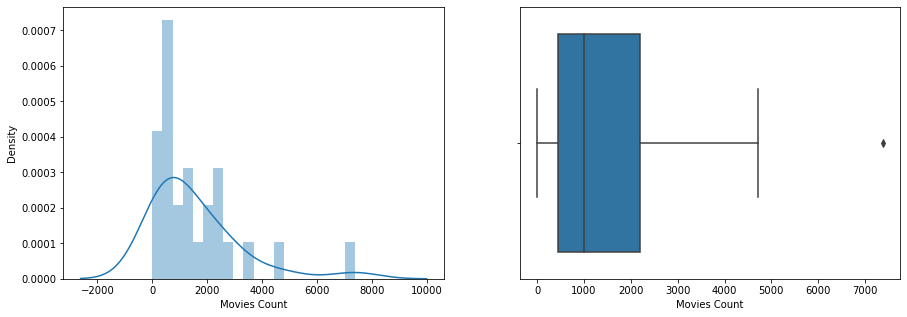

In [ ]:
f, ax = plt.subplots(1, 2 , figsize = (15, 5))
sns.distplot(genres_data_movies['Movies Count'], bins = 20, kde = True, ax = ax[0])
sns.boxplot(genres_data_movies['Movies Count'], ax = ax[1])
plt.show()

In [ ]:
# Creating distinct dataframes only with the movies present on individual streaming platforms
netflix_genres_movies = genres_data_movies[genres_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_genres_movies = netflix_genres_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

hulu_genres_movies = genres_data_movies[genres_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_genres_movies = hulu_genres_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

prime_video_genres_movies = genres_data_movies[genres_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_genres_movies = prime_video_genres_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)

disney_genres_movies = genres_data_movies[genres_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_genres_movies = disney_genres_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)

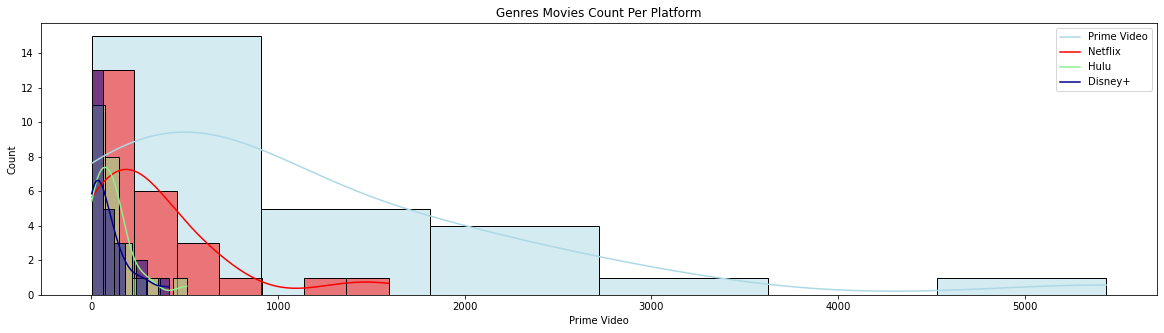

In [ ]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Genres Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(prime_video_genres_movies['Prime Video'][:100], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_genres_movies['Netflix'][:100], color = 'red', legend = True, kde = True)
sns.histplot(hulu_genres_movies['Hulu'][:100], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_genres_movies['Disney+'][:100], color = 'darkblue', legend = True, kde = True)                                
 
# Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [ ]:
print(f'''
      The Genres with Highest Movies Count Rating Ever Got is '{df_genres_high_movies['Genres'][0]}' : '{df_genres_high_movies['Movies Count'].max()}'\n
      The Genres with Lowest Movies Count Rating Ever Got is '{df_genres_low_movies['Genres'][0]}' : '{df_genres_low_movies['Movies Count'].min()}'\n
      
      The Genres with Highest Movies Count Rating on 'Netflix' is '{netflix_genres_high_movies['Genres'][0]}' : '{netflix_genres_high_movies['Netflix'].max()}'\n
      The Genres with Lowest Movies Count Rating on 'Netflix' is '{netflix_genres_low_movies['Genres'][0]}' : '{netflix_genres_low_movies['Netflix'].min()}'\n
      
      The Genres with Highest Movies Count Rating on 'Hulu' is '{hulu_genres_high_movies['Genres'][0]}' : '{hulu_genres_high_movies['Hulu'].max()}'\n
      The Genres with Lowest Movies Count Rating on 'Hulu' is '{hulu_genres_low_movies['Genres'][0]}' : '{hulu_genres_low_movies['Hulu'].min()}'\n
      
      The Genres with Highest Movies Count Rating on 'Prime Video' is '{prime_video_genres_high_movies['Genres'][0]}' : '{prime_video_genres_high_movies['Prime Video'].max()}'\n
      The Genres with Lowest Movies Count Rating on 'Prime Video' is '{prime_video_genres_low_movies['Genres'][0]}' : '{prime_video_genres_low_movies['Prime Video'].min()}'\n
      
      The Genres with Highest Movies Count Rating on 'Disney+' is '{disney_genres_high_movies['Genres'][0]}' : '{disney_genres_high_movies['Disney+'].max()}'\n
      The Genres with Lowest Movies Count Rating on 'Disney+' is '{disney_genres_low_movies['Genres'][0]}' : '{disney_genres_low_movies['Disney+'].min()}'\n 
      ''')


      The Genres with Highest Movies Count Rating Ever Got is 'Drama' : '7381'

      The Genres with Lowest Movies Count Rating Ever Got is 'Talk-Show' : '2'

      
      The Genres with Highest Movies Count Rating on 'Netflix' is 'Drama' : '1592'

      The Genres with Lowest Movies Count Rating on 'Netflix' is 'Talk-Show' : '0'

      
      The Genres with Highest Movies Count Rating on 'Hulu' is 'Drama' : '511'

      The Genres with Lowest Movies Count Rating on 'Hulu' is 'Talk-Show' : '0'

      
      The Genres with Highest Movies Count Rating on 'Prime Video' is 'Drama' : '5436'

      The Genres with Lowest Movies Count Rating on 'Prime Video' is 'Talk-Show' : '2'

      
      The Genres with Highest Movies Count Rating on 'Disney+' is 'Family' : '414'

      The Genres with Lowest Movies Count Rating on 'Disney+' is 'Talk-Show' : '0'
 
      


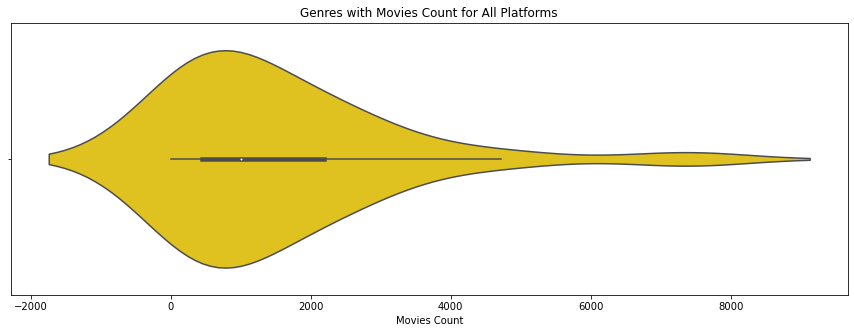

In [ ]:
# Distribution of tvshow rating in each platform
plt.figure(figsize = (15, 5))
plt.title('Genres with Movies Count for All Platforms')
sns.violinplot(x = genres_data_movies['Movies Count'], color = 'gold', legend = True, kde = True, shade = False)
plt.show()

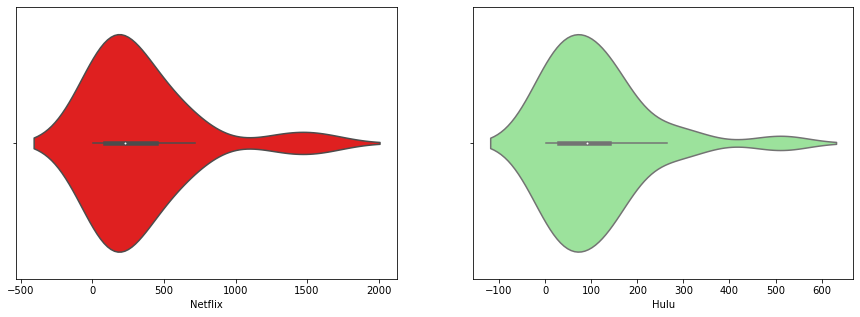

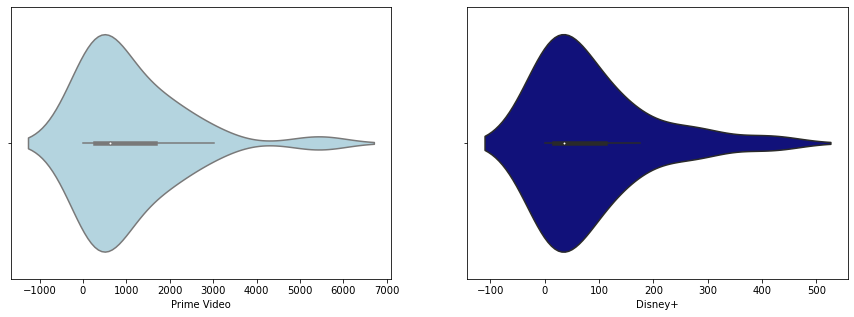

In [ ]:
# Distribution of Genres Movies Count in each platform
f1, ax1 = plt.subplots(1, 2 , figsize = (15, 5))
sns.violinplot(x = netflix_genres_movies['Netflix'], color = 'red', ax = ax1[0])
sns.violinplot(x = hulu_genres_movies['Hulu'], color = 'lightgreen', ax = ax1[1])
 
f2, ax2 = plt.subplots(1, 2 , figsize = (15, 5))
sns.violinplot(x = prime_video_genres_movies['Prime Video'], color = 'lightblue', ax = ax2[0])
sns.violinplot(x = disney_genres_movies['Disney+'], color = 'darkblue', ax = ax2[1])
plt.show()

In [ ]:
print(f'''
      Accross All Platforms the Average Movies Count of Genres is '{round(genres_data_movies['Movies Count'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Genres on 'Netflix' is '{round(netflix_genres_movies['Netflix'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Genres on 'Hulu' is '{round(hulu_genres_movies['Hulu'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Genres on 'Prime Video' is '{round(prime_video_genres_movies['Prime Video'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Genres on 'Disney+' is '{round(disney_genres_movies['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Movies Count of Genres is '1545.54'

      The Average Movies Count of Genres on 'Netflix' is '347.2'

      The Average Movies Count of Genres on 'Hulu' is '111.16'

      The Average Movies Count of Genres on 'Prime Video' is '1089.58'

      The Average Movies Count of Genres on 'Disney+' is '87.12'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Genres is '{genres_data_movies['Genres'].unique().shape[0]}'\n
      Total Count of Genres on 'Netflix' is '{netflix_genres_movies['Genres'].unique().shape[0]}'\n
      Total Count of Genres on 'Hulu' is '{hulu_genres_movies['Genres'].unique().shape[0]}'\n
      Total Count of Genres on 'Prime Video' is '{prime_video_genres_movies['Genres'].unique().shape[0]}'\n
      Total Count of Genres on 'Disney+' is '{disney_genres_movies['Genres'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Genres is '26'

      Total Count of Genres on 'Netflix' is '25'

      Total Count of Genres on 'Hulu' is '25'

      Total Count of Genres on 'Prime Video' is '26'

      Total Count of Genres on 'Disney+' is '24'
 
      


In [ ]:
fig = px.bar(x = genres_data_movies['Genres'], y = genres_data_movies['Movies Count'], 
             color = genres_data_movies['Movies Count'], color_continuous_scale = 'Teal_r', 
             labels = { 'x' : 'Genres', 'y' : 'Number of Movies'})
fig.show()

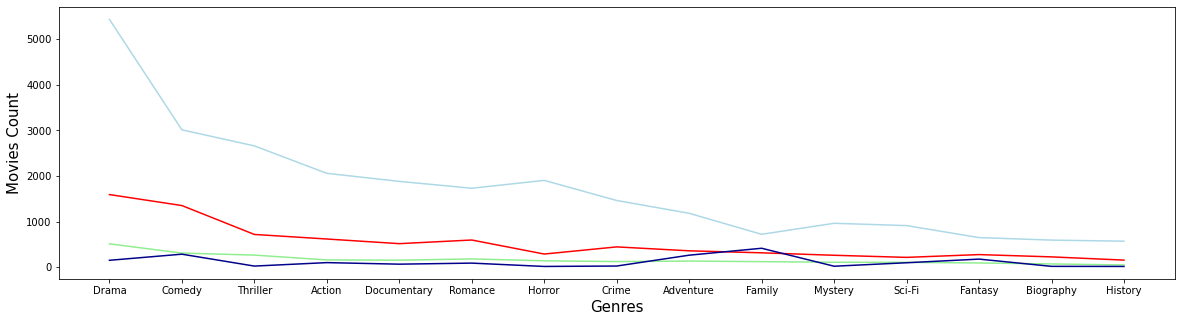

In [ ]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = genres_data_movies['Genres'][:15], y = genres_data_movies['Netflix'][:15], color = 'red')
sns.lineplot(x = genres_data_movies['Genres'][:15], y = genres_data_movies['Hulu'][:15], color = 'lightgreen')
sns.lineplot(x = genres_data_movies['Genres'][:15], y = genres_data_movies['Prime Video'][:15], color = 'lightblue')
sns.lineplot(x = genres_data_movies['Genres'][:15], y = genres_data_movies['Disney+'][:15], color = 'darkblue')
plt.xlabel('Genres', fontsize = 15)
plt.ylabel('Movies Count', fontsize = 15)
plt.show()

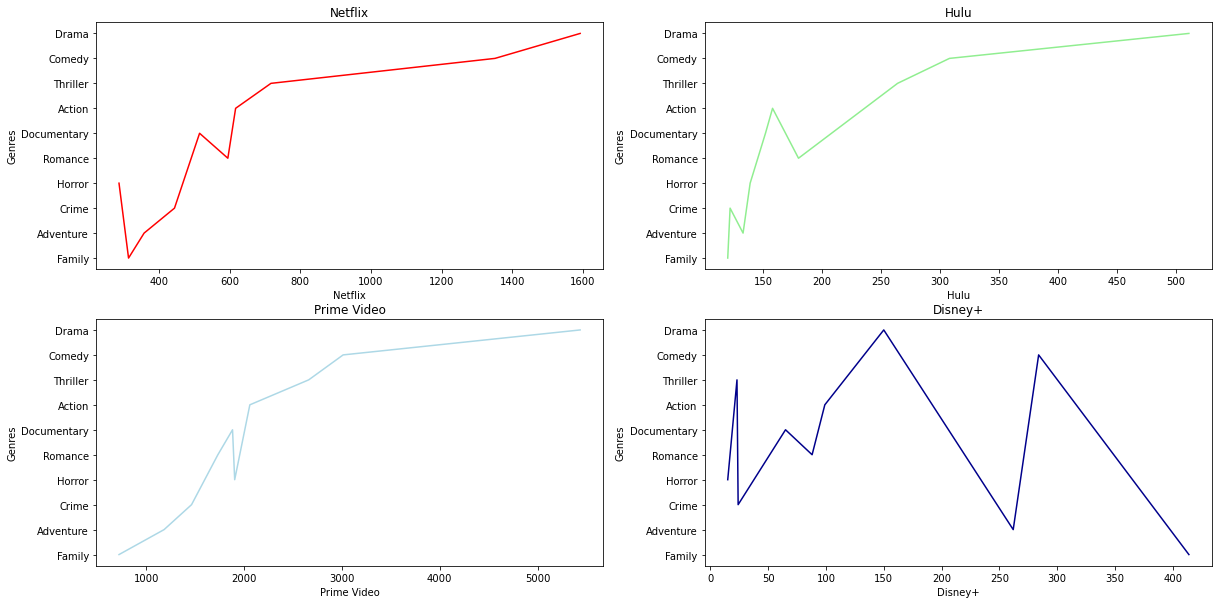

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 10))
 
n_c_ax1 = sns.lineplot(y = genres_data_movies['Genres'][:10], x = genres_data_movies['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_c_ax2 = sns.lineplot(y = genres_data_movies['Genres'][:10], x = genres_data_movies['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_c_ax3 = sns.lineplot(y = genres_data_movies['Genres'][:10], x = genres_data_movies['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_c_ax4 = sns.lineplot(y = genres_data_movies['Genres'][:10], x = genres_data_movies['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_c_ax1.title.set_text(labels[0])
h_c_ax2.title.set_text(labels[1])
p_c_ax3.title.set_text(labels[2])
d_c_ax4.title.set_text(labels[3])
 
plt.show()

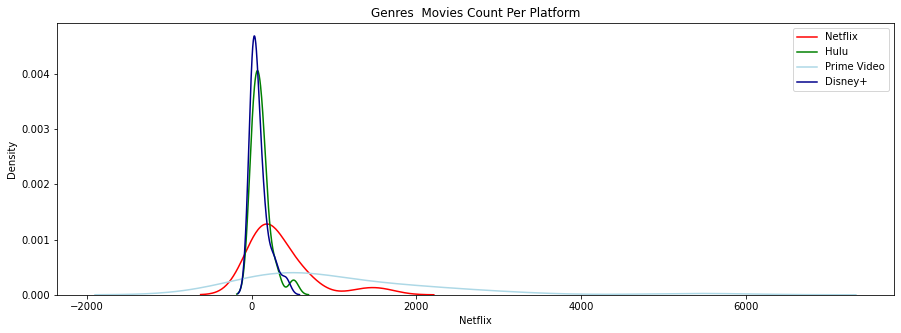

In [ ]:
# Defining plot size and title
plt.figure(figsize = (15, 5))
plt.title('Genres  Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_genres_movies['Netflix'], color = 'red', legend = True)
sns.kdeplot(hulu_genres_movies['Hulu'], color = 'green', legend = True)
sns.kdeplot(prime_video_genres_movies['Prime Video'], color = 'lightblue', legend = True)
sns.kdeplot(disney_genres_movies['Disney+'], color = 'darkblue', legend = True)                                      
                                      
 
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

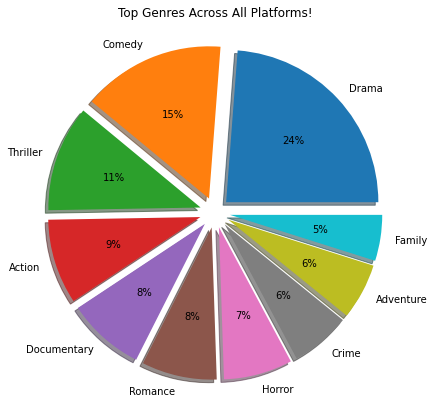

In [ ]:
plt.figure(figsize = (7, 7))
plt.pie(genres_data_movies['Movies Count'][:10], labels = genres_data_movies.Genres[:10], explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct='%1.0f%%', labeldistance = 1.1, shadow = True)
plt.title('Top Genres Across All Platforms!')
plt.show()

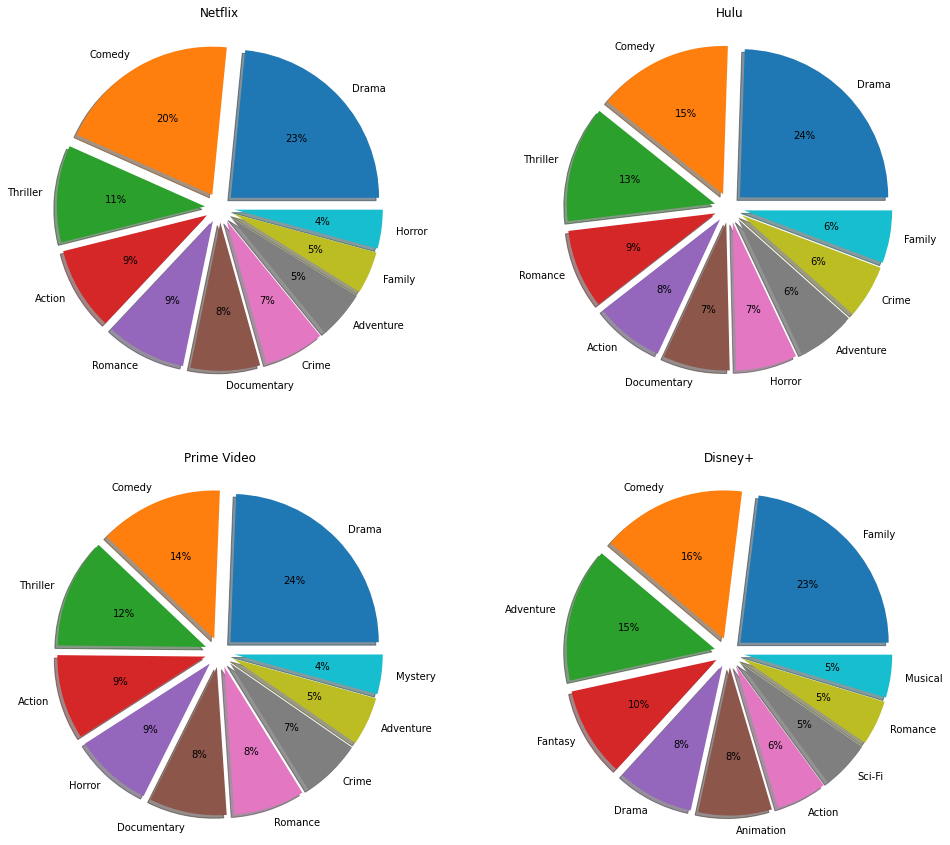

In [ ]:
fig = plt.figure(figsize = (35, 15))
 
ax = plt.subplot2grid((2, 4), (0, 0))
 
plt.pie(netflix_genres_movies['Netflix'][:10], labels = netflix_genres_movies.Genres[:10], explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct = '%1.0f%%', labeldistance = 1.1, shadow = True)
 
plt.title('Netflix')
 
ax = plt.subplot2grid((2, 4), (0, 1))
 
plt.pie(hulu_genres_movies['Hulu'][:10], labels = hulu_genres_movies.Genres[:10], explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct = '%1.0f%%', labeldistance = 1.1, shadow = True)
 
plt.title('Hulu')
 
ax = plt.subplot2grid((2, 4), (1, 0))
 
plt.pie(prime_video_genres_movies['Prime Video'][:10], labels = prime_video_genres_movies.Genres[:10], explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct = '%1.0f%%', labeldistance = 1.1, shadow = True)
 
plt.title('Prime Video')
 
ax = plt.subplot2grid((2, 4), (1, 1))
 
plt.pie(disney_genres_movies['Disney+'][:10], labels = disney_genres_movies.Genres[:10], explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct = '%1.0f%%', labeldistance = 1.1, shadow = True)
 
plt.title('Disney+')
 
plt.show()

In [ ]:
fig = go.Figure(go.Funnel(y = genres_data_movies['Genres'][:10],x = genres_data_movies['Movies Count'][:10]))
fig.show()

In [ ]:
df_movies_countries = df_movies.copy()

In [ ]:
# Create countries dict where key=name and value = number of countries
 
countries = {}
 
for i in df_movies_countries['Country'].dropna():
    if i != "NA":
        #print(i,len(i.split(',')))
        countries[i] = len(i.split(','))
    else:
        countries[i] = 0
    
# Add this information to our dataframe as a new column
 
df_movies_countries['Number of Country'] = df_movies_countries['Country'].map(countries).astype(int)

In [ ]:
df_countries_most_movies = df_movies_countries.sort_values(by = 'Number of Country', ascending = False).reset_index()
df_countries_most_movies = df_countries_most_movies.drop(['index'], axis = 1)
# filter = (df_movies_countries['Country'] == (df_movies_countries['Number of Country'].max()))
# df_countries_most_movies = df_movies_countries[filter]
 
# mostest_rated_tvshow = df_movies_countries.loc[df_movies_countries['Number of Country'].idxmax()]
 
print('\nMovies with Highest Ever Country Count are : \n')
df_countries_most_movies.head(5)


Movies with Highest Ever Country Count are : 



ID                    Title  Year Age IMDb Rotten Tomatoes  \
0   6906  Somewhere Else Tomorrow  2013  13  7.5              NA   
1   6333            Poverty, Inc.  2014  NR  7.7              NA   
2   4382                  Samsara  2011  13  8.5              76   
3   8004               Lost Kites  2016  NR    7              NA   
4  16012                 Mulan II  2004   0  5.7               0   

                          Directors  \
0                      Daniel Rintz   
1           Michael Matheson Miller   
2                        Ron Fricke   
3       Samuel Rich,Gabriella Fritz   
4  Darrell Rooney,Lynne Southerland   

                                                Cast  \
0  Issa Breibish,Kristian Bruun,Megan Gay,Grant J...   
1                                      Robert Sirico   
2  Balinese Tari Legong Dancers,Ni Made Megahadi ...   
3                                                 NA   
4  Ming-Na Wen,BD Wong,Mark Moseley,Lucy Liu,Harv...   

                                   Genres  \
0        Documentary,Adventure,Drama,News   
1                Documentary,History,News   
2                       Documentary,Music   
3                             Documentary   
4  Animation,Action,Comedy,Family,Musical   

                                             Country  ...  \
0  Germany,Canada,Vietnam,United Kingdom,Turkey,T...  ...   
1  United States,United Kingdom,Thailand,Swazilan...  ...   
2  United States,Indonesia,Singapore,Thailand,Ken...  ...   
3  United States,Belgium,Brazil,Cambodia,China,In...  ...   
4  United States,South Korea,Singapore,Russia,Mal...  ...   

                                            Plotline Runtime   Kind Netflix  \
0  Promising young student Chi-Hao is sent away t...     107  movie       0   
1  The lady is Mrs. Hilyard, a wealthy poetess wh...      94  movie       0   
2                                                 NA     102  movie       0   
3  All fourteen-year-old Robbie Hendrick ever wan...      50  movie       0   
4  Tia and her brother Tony have supernatural pow...      79  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Country  
0     0            1        0     0       Prime Video                27  
1     0            1        0     0       Prime Video                20  
2     0            1        0     0       Prime Video                19  
3     0            1        0     0       Prime Video                18  
4     0            0        1     0           Disney+                15  

[5 rows x 21 columns]

In [ ]:
df_countries_least_movies = df_movies_countries.sort_values(by = 'Number of Country', ascending = True).reset_index()
df_countries_least_movies = df_countries_least_movies.drop(['index'], axis = 1)
# filter = (df_movies_countries['Country'] == (df_movies_countries['Number of Country'].min()))
# df_countries_least_movies = df_movies_countries[filter]
 
print('\nMovies with Lowest Ever Country Count are : \n')
df_countries_least_movies.head(5)


Movies with Lowest Ever Country Count are : 



ID                                              Title  Year Age IMDb  \
0  15581  Chonda Pierce Presents: Stand Up for Families ...  2016  NR   NA   
1   3307       Marvel & ESPN Films Present: 1 of 1: Genesis  2015   7  4.9   
2   3318                      Marco Luque - We are together  2017  NR  4.3   
3   2756                        Luccas Neto in: Summer Camp  2019  NR   NA   
4   3340                             The Republic Of Imbaba  2015  NR   NA   

  Rotten Tomatoes   Directors  \
0              NA          NA   
1              NA  Eric Drath   
2              NA          NA   
3              NA          NA   
4              NA          NA   

                                                Cast Genres Country  ...  \
0                                                 NA     NA      NA  ...   
1  Axel Alonso,Carmelo Anthony,Josh Bloomberg,Bra...     NA      NA  ...   
2                                                 NA     NA      NA  ...   
3                                                 NA     NA      NA  ...   
4                                                 NA     NA      NA  ...   

  Plotline Runtime   Kind Netflix  Hulu  Prime Video  Disney+  Type  \
0       NA      NA  movie       0     0            1        0     0   
1       NA      77  movie       1     0            0        0     0   
2       NA      NA  movie       1     0            0        0     0   
3       NA      NA  movie       1     0            0        0     0   
4       NA      NA  movie       1     0            0        0     0   

   Service Provider Number of Country  
0       Prime Video                 0  
1           Netflix                 0  
2           Netflix                 0  
3           Netflix                 0  
4           Netflix                 0  

[5 rows x 21 columns]

In [ ]:
print(f'''
      Total '{df_movies_countries['Country'].unique().shape[0]}' unique Countires are Available, They were Like this,\n
      
      {df_movies_countries.sort_values(by = 'Number of Country', ascending = False)['Country'].unique()[:5]} etc.\n
 
      The Highest Ever Country Count Any TV Show Got is '{df_countries_most_movies['Title'][0]}' : '{df_countries_most_movies['Number of Country'].max()}'\n
 
      The Lowest Ever Country Count Any TV Show Got is '{df_countries_least_movies['Title'][0]}' : '{df_countries_least_movies['Number of Country'].min()}'\n
      ''')


      Total '1377' unique Countires are Available, They were Like this,

      
      ['Germany,Canada,Vietnam,United Kingdom,Turkey,Tunisia,Thailand,Syria,Spain,Singapore,Poland,Pakistan,New Zealand,Nepal,Malaysia,Libya,Laos,Jordan,Iran,Indonesia,India,France,Egypt,Czech Republic,China,Cambodia,Australia'
 'United States,United Kingdom,Thailand,Swaziland,South Korea,South Africa,Rwanda,Russia,Peru,Kenya,Italy,Ireland,India,Haiti,Georgia,Ethiopia,Dominican Republic,Cambodia,Bangladesh,Argentina'
 'United States,Indonesia,Singapore,Thailand,Kenya,Denmark,Brazil,Jordan,United Arab Emirates,Saudi Arabia,South Africa,Italy,Ghana,Egypt,China,Japan,Ethiopia,South Korea,Namibia'
 'United States,Belgium,Brazil,Cambodia,China,India,Kenya,Mexico,Moldova,Netherlands,Romania,Rwanda,Thailand,Turkey,Uganda,Ukraine,United Kingdom,Republic of North Macedonia'
 'United States,South Korea,Singapore,Russia,Malaysia,Kazakhstan,Taiwan,Hong Kong,Japan,China,India,Syria,Iran,Egypt,Pakistan'] etc.

 
      T

In [ ]:
netflix_countries_most_movies = df_countries_most_movies.loc[df_countries_most_movies['Netflix']==1].reset_index()
Lnetflix_countries_most_movies = netflix_countries_most_movies.drop(['index'], axis = 1)
 
netflix_countries_least_movies = df_countries_least_movies.loc[df_countries_least_movies['Netflix']==1].reset_index()
netflix_countries_least_movies = netflix_countries_least_movies.drop(['index'], axis = 1)
 
netflix_countries_most_movies.head(5)

index    ID                                 Title  Year Age IMDb  \
0     15   287  A Shaun the Sheep Movie: Farmageddon  2019   0  6.8   
1     16  2880                The Thief and the Fool  2013  NR  7.1   
2     19   554             Resident Evil: Extinction  2007  16  6.3   
3     26   781              Resident Evil: Afterlife  2010  16  6.3   
4     35   166                       The Breadwinner  2017  13  7.7   

  Rotten Tomatoes                   Directors  \
0              96  Will Becher,Richard Phelan   
1              NA            Richard Williams   
2              24             Russell Mulcahy   
3              22             Russell Mulcahy   
4              95                 Nora Twomey   

                                                Cast  \
0  Justin Fletcher,John Sparkes,Amalia Vitale,Kat...   
1  Vincent Price,Bobbi Page,Steve Lively,Ed E. Ca...   
2  Milla Jovovich,Oded Fehr,Ali Larter,Iain Glen,...   
3  Milla Jovovich,Oded Fehr,Ali Larter,Iain Glen,...   
4  Saara Chaudry,Soma Chhaya,Noorin Gulamgaus,Laa...   

                                              Genres  ...  \
0   Animation,Adventure,Comedy,Family,Fantasy,Sci-Fi  ...   
1  Animation,Action,Adventure,Comedy,Family,Fanta...  ...   
2                               Action,Horror,Sci-Fi  ...   
3                               Action,Horror,Sci-Fi  ...   
4                         Animation,Drama,Family,War  ...   

                                            Plotline Runtime   Kind Netflix  \
0  There is something strange going on in the pea...      86  movie       1   
1  When Tack upsets ZigZag the Vizier, the wizard...      90  movie       1   
2  Years after the Raccoon City disaster, Alice i...      94  movie       1   
3  Years after the Raccoon City disaster, Alice i...      94  movie       1   
4  From executive producer Angelina Jolie and the...      94  movie       1   

  Hulu  Prime Video  Disney+  Type  Service Provider  Number of Country  
0    0            0        0     0           Netflix                 10  
1    0            0        0     0           Netflix                  9  
2    0            0        0     0           Netflix                  8  
3    0            0        0     0           Netflix                  8  
4    0            0        0     0           Netflix                  7  

[5 rows x 22 columns]

In [ ]:
hulu_countries_most_movies = df_countries_most_movies.loc[df_countries_most_movies['Hulu']==1].reset_index()
hulu_countries_most_movies = hulu_countries_most_movies.drop(['index'], axis = 1)
 
hulu_countries_least_movies = df_countries_least_movies.loc[df_countries_least_movies['Hulu']==1].reset_index()
hulu_countries_least_movies = hulu_countries_least_movies.drop(['index'], axis = 1)
 
hulu_countries_most_movies.head(5)

ID           Title  Year Age IMDb Rotten Tomatoes            Directors  \
0   3552           Monos  2019  16  6.9              92     Alejandro Landes   
1  16472  Curious George  2006   0  6.5              NA  Matthew O'Callaghan   
2  16432     Underground  2016  18  8.1              96       Emir Kusturica   
3   3685       Manderlay  2005  NR  7.3              50       Lars von Trier   
4   3640    The Commuter  2018  13  6.3              55   Jaume Collet-Serra   

                                                Cast  \
0  Sofia Buenaventura,Julián Giraldo,Karen Quinte...   
1  Frank Welker,Will Ferrell,Shane Baumel,Timyra-...   
2  Predrag 'Miki' Manojlovic,Lazar Ristovski,Mirj...   
3  Bryce Dallas Howard,Isaach De Bankolé,Danny Gl...   
4  Liam Neeson,Vera Farmiga,Patrick Wilson,Jonath...   

                              Genres  \
0           Adventure,Drama,Thriller   
1  Animation,Adventure,Comedy,Family   
2           Comedy,Drama,Fantasy,War   
3                              Drama   
4            Action,Mystery,Thriller   

                                             Country  ...  \
0  Colombia,Argentina,Netherlands,Germany,Sweden,...  ...   
1  United States,Germany,Taiwan,France,Canada,Sou...  ...   
2  Federal Republic of Yugoslavia,France,Germany,...  ...   
3  Denmark,Sweden,Netherlands,France,Germany,Unit...  ...   
4  United States,United Kingdom,France,China,Cana...  ...   

                                            Plotline Runtime   Kind Netflix  \
0  Teenage commandos perform military training ex...     102  movie       0   
1                                                 NA      87  movie       0   
2                                                 NA     170  movie       0   
3  After gangster Mulligan's (Willem Dafoe's) car...     139  movie       0   
4  Michael MacCauley, a former police officer and...     104  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Country  
0     1            0        0     0              Hulu                10  
1     1            0        0     0              Hulu                 8  
2     1            0        0     0              Hulu                 8  
3     1            0        0     0              Hulu                 8  
4     1            1        0     0       Prime Video                 6  

[5 rows x 21 columns]

In [ ]:
prime_video_countries_most_movies = df_countries_most_movies.loc[df_countries_most_movies['Prime Video']==1].reset_index()
prime_video_countries_most_movies = prime_video_countries_most_movies.drop(['index'], axis = 1)
 
prime_video_countries_least_movies = df_countries_least_movies.loc[df_countries_least_movies['Prime Video']==1].reset_index()
prime_video_countries_least_movies = prime_video_countries_least_movies.drop(['index'], axis = 1)
 
prime_video_countries_most_movies.head(5)

ID                    Title  Year Age IMDb Rotten Tomatoes  \
0   6906  Somewhere Else Tomorrow  2013  13  7.5              NA   
1   6333            Poverty, Inc.  2014  NR  7.7              NA   
2   4382                  Samsara  2011  13  8.5              76   
3   8004               Lost Kites  2016  NR    7              NA   
4  10318              Caffeinated  2015  NR  6.6              NA   

                     Directors  \
0                 Daniel Rintz   
1      Michael Matheson Miller   
2                   Ron Fricke   
3  Samuel Rich,Gabriella Fritz   
4   Hanh Nguyen,Vishal Solanki   

                                                Cast  \
0  Issa Breibish,Kristian Bruun,Megan Gay,Grant J...   
1                                      Robert Sirico   
2  Balinese Tari Legong Dancers,Ni Made Megahadi ...   
3                                                 NA   
4  Jeremy Adams,Andrew Alcala,Sarah Allen,Grazian...   

                             Genres  \
0  Documentary,Adventure,Drama,News   
1          Documentary,History,News   
2                 Documentary,Music   
3                       Documentary   
4        Documentary,Adventure,News   

                                             Country  ...  \
0  Germany,Canada,Vietnam,United Kingdom,Turkey,T...  ...   
1  United States,United Kingdom,Thailand,Swazilan...  ...   
2  United States,Indonesia,Singapore,Thailand,Ken...  ...   
3  United States,Belgium,Brazil,Cambodia,China,In...  ...   
4  United States,Colombia,Ethiopia,Guatemala,Hond...  ...   

                                            Plotline Runtime   Kind Netflix  \
0  Promising young student Chi-Hao is sent away t...     107  movie       0   
1  The lady is Mrs. Hilyard, a wealthy poetess wh...      94  movie       0   
2                                                 NA     102  movie       0   
3  All fourteen-year-old Robbie Hendrick ever wan...      50  movie       0   
4                                                 NA      80  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Country  
0     0            1        0     0       Prime Video                27  
1     0            1        0     0       Prime Video                20  
2     0            1        0     0       Prime Video                19  
3     0            1        0     0       Prime Video                18  
4     0            1        0     0       Prime Video                15  

[5 rows x 21 columns]

In [ ]:
disney_countries_most_movies = df_countries_most_movies.loc[df_countries_most_movies['Disney+']==1].reset_index()
disney_countries_most_movies = disney_countries_most_movies.drop(['index'], axis = 1)
 
disney_countries_least_movies = df_countries_least_movies.loc[df_countries_least_movies['Disney+']==1].reset_index()
disney_countries_least_movies = disney_countries_least_movies.drop(['index'], axis = 1)
 
disney_countries_most_movies.head(5)

ID                                     Title  Year Age IMDb  \
0  16012                                  Mulan II  2004   0  5.7   
1  15984  The Little Mermaid II: Return to the Sea  2000   7  5.6   
2  16196                                 The Flood  2018  16  5.9   
3  15960                                Thumbelina  1994   0  6.4   
4   5026                                Robin Hood  1922  13  5.3   

  Rotten Tomatoes                             Directors  \
0               0      Darrell Rooney,Lynne Southerland   
1              17  Jim Kammerud,Brian Smith,Bill Speers   
2              75                        Mikael Salomon   
3              27                Don Bluth,Gary Goldman   
4              43                         Otto Bathurst   

                                                Cast  \
0  Ming-Na Wen,BD Wong,Mark Moseley,Lucy Liu,Harv...   
1  Jodi Benson,Samuel E. Wright,Tara Strong,Pat C...   
2  Morgan Freeman,Christian Slater,Randy Quaid,Mi...   
3  Gino Conforti,Barbara Cook,Jodi Benson,Will Ry...   
4  Taron Egerton,Jamie Foxx,Ben Mendelsohn,Eve He...   

                                     Genres  \
0    Animation,Action,Comedy,Family,Musical   
1    Animation,Drama,Family,Fantasy,Musical   
2               Action,Crime,Drama,Thriller   
3  Animation,Family,Fantasy,Musical,Romance   
4           Action,Adventure,Drama,Thriller   

                                             Country  ...  \
0  United States,South Korea,Singapore,Russia,Mal...  ...   
1  United States,Canada,Australia,Taiwan,Hong Kon...  ...   
2  United States,United Kingdom,Denmark,France,Ja...  ...   
3  Ireland,United States,Canada,United Kingdom,De...  ...   
4     United States,Hong Kong,Croatia,France,Hungary  ...   

                                            Plotline Runtime   Kind Netflix  \
0  Tia and her brother Tony have supernatural pow...      79  movie       0   
1  The Russo family and friends are headed to Tus...      75  movie       0   
2                                                 NA      97  movie       0   
3  The sultan is grooming Aladdin as new vizier, ...      86  movie       0   
4  In New York's 1880's newspaper district a dedi...     116  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Country  
0     0            0        1     0           Disney+                15  
1     0            0        1     0           Disney+                 8  
2     0            0        1     0           Disney+                 8  
3     0            0        1     0           Disney+                 8  
4     0            1        1     0       Prime Video                 5  

[5 rows x 21 columns]

In [ ]:
print(f'''
      The TV Show with Highest Country Count Ever Got is '{df_countries_most_movies['Title'][0]}' : '{df_countries_most_movies['Number of Country'].max()}'\n
      The TV Show with Lowest Country Count Ever Got is '{df_countries_least_movies['Title'][0]}' : '{df_countries_least_movies['Number of Country'].min()}'\n
      
      The TV Show with Highest Country Count on 'Netflix' is '{netflix_countries_most_movies['Title'][0]}' : '{netflix_countries_most_movies['Number of Country'].max()}'\n
      The TV Show with Lowest Country Count on 'Netflix' is '{netflix_countries_least_movies['Title'][0]}' : '{netflix_countries_least_movies['Number of Country'].min()}'\n
      
      The TV Show with Highest Country Count on 'Hulu' is '{hulu_countries_most_movies['Title'][0]}' : '{hulu_countries_most_movies['Number of Country'].max()}'\n
      The TV Show with Lowest Country Count on 'Hulu' is '{hulu_countries_least_movies['Title'][0]}' : '{hulu_countries_least_movies['Number of Country'].min()}'\n
      
      The TV Show with Highest Country Count on 'Prime Video' is '{prime_video_countries_most_movies['Title'][0]}' : '{prime_video_countries_most_movies['Number of Country'].max()}'\n
      The TV Show with Lowest Country Count on 'Prime Video' is '{prime_video_countries_least_movies['Title'][0]}' : '{prime_video_countries_least_movies['Number of Country'].min()}'\n
      
      The TV Show with Highest Country Count on 'Disney+' is '{disney_countries_most_movies['Title'][0]}' : '{disney_countries_most_movies['Number of Country'].max()}'\n
      The TV Show with Lowest Country Count on 'Disney+' is '{disney_countries_least_movies['Title'][0]}' : '{disney_countries_least_movies['Number of Country'].min()}'\n 
      ''')


      The TV Show with Highest Country Count Ever Got is 'Somewhere Else Tomorrow' : '27'

      The TV Show with Lowest Country Count Ever Got is 'Chonda Pierce Presents: Stand Up for Families - Home Is Where the Heart Is' : '0'

      
      The TV Show with Highest Country Count on 'Netflix' is 'A Shaun the Sheep Movie: Farmageddon' : '10'

      The TV Show with Lowest Country Count on 'Netflix' is 'Marvel & ESPN Films Present: 1 of 1: Genesis' : '0'

      
      The TV Show with Highest Country Count on 'Hulu' is 'Monos' : '10'

      The TV Show with Lowest Country Count on 'Hulu' is 'Oddbods: Party Monsters' : '0'

      
      The TV Show with Highest Country Count on 'Prime Video' is 'Somewhere Else Tomorrow' : '27'

      The TV Show with Lowest Country Count on 'Prime Video' is 'Chonda Pierce Presents: Stand Up for Families - Home Is Where the Heart Is' : '0'

      
      The TV Show with Highest Country Count on 'Disney+' is 'Mulan II' : '15'

      The TV Show with Lowe

In [ ]:
print(f'''
      Accross All Platforms the Average Country Count is '{round(df_movies_countries['Number of Country'].mean(), ndigits = 2)}'\n
      The Average Country Count on 'Netflix' is '{round(netflix_countries_most_movies['Number of Country'].mean(), ndigits = 2)}'\n
      The Average Country Count on 'Hulu' is '{round(hulu_countries_most_movies['Number of Country'].mean(), ndigits = 2)}'\n
      The Average Country Count on 'Prime Video' is '{round(prime_video_countries_most_movies['Number of Country'].mean(), ndigits = 2)}'\n
      The Average Country Count on 'Disney+' is '{round(disney_countries_most_movies['Number of Country'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Country Count is '1.27'

      The Average Country Count on 'Netflix' is '1.29'

      The Average Country Count on 'Hulu' is '1.47'

      The Average Country Count on 'Prime Video' is '1.25'

      The Average Country Count on 'Disney+' is '1.37'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Country is '{df_movies_countries['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Netflix' is '{netflix_countries_most_movies['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Hulu' is '{hulu_countries_most_movies['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Prime Video' is '{prime_video_countries_most_movies['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Disney+' is '{disney_countries_most_movies['Country'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Country is '1377'

      Total Count of Country on 'Netflix' is '457'

      Total Count of Country on 'Hulu' is '207'

      Total Count of Country on 'Prime Video' is '1034'

      Total Count of Country on 'Disney+' is '58'
 
      


In [ ]:
df_movies_countries.drop(df_movies_countries.loc[df_movies_countries['Country'] == "NA"].index, inplace = True)
# df_movies_countries = df_movies_countries[df_movies_countries.Country != "NA"]

In [ ]:
df_cou = df_movies_countries['Country'].str.split(',').apply(pd.Series).stack()
del df_movies_countries['Country']
df_cou.index = df_cou.index.droplevel(-1)
df_cou.name = 'Country'
df_movies_countries = df_movies_countries.join(df_cou)
df_movies_countries.drop_duplicates(inplace = True)

In [ ]:
df_movies_countries.head(5)

ID                   Title  Year Age IMDb Rotten Tomatoes  \
0   1               Inception  2010  13  8.8              87   
0   1               Inception  2010  13  8.8              87   
1   2              The Matrix  1999  16  8.7              88   
2   3  Avengers: Infinity War  2018  13  8.4              85   
3   4      Back to the Future  1985   7  8.5              96   

                        Directors  \
0               Christopher Nolan   
0               Christopher Nolan   
1  Lana Wachowski,Lilly Wachowski   
2         Anthony Russo,Joe Russo   
3                 Robert Zemeckis   

                                                Cast  \
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
1  Keanu Reeves,Laurence Fishburne,Carrie-Anne Mo...   
2  Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...   
3  Michael J. Fox,Christopher Lloyd,Lea Thompson,...   

                             Genres                 Language  ... Runtime  \
0  Action,Adventure,Sci-Fi,Thriller  English,Japanese,French  ...     148   
0  Action,Adventure,Sci-Fi,Thriller  English,Japanese,French  ...     148   
1                     Action,Sci-Fi                  English  ...     136   
2           Action,Adventure,Sci-Fi                  English  ...     149   
3           Adventure,Comedy,Sci-Fi                  English  ...     116   

    Kind Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  \
0  movie       1     0            0        0     0           Netflix   
0  movie       1     0            0        0     0           Netflix   
1  movie       1     0            0        0     0           Netflix   
2  movie       1     0            0        0     0           Netflix   
3  movie       1     0            0        0     0           Netflix   

  Number of Country         Country  
0                 2   United States  
0                 2  United Kingdom  
1                 1   United States  
2                 1   United States  
3                 1   United States  

[5 rows x 21 columns]

In [ ]:
countries_count = df_movies_countries.groupby('Country')['Title'].count()
countries_tvshow = df_movies_countries.groupby('Country')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
countries_data_movies = pd.concat([countries_count, countries_tvshow], axis = 1).reset_index().rename(columns = {'Title' : 'Movies Count'})
countries_data_movies = countries_data_movies.sort_values(by = 'Movies Count', ascending = False)

In [ ]:
# Country with Movies Counts - All Platforms Combined
countries_data_movies.sort_values(by = 'Movies Count', ascending = False)[:10]

Country  Movies Count  Netflix  Hulu  Prime Video  Disney+
159   United States         10771     1800   790         8040      546
158  United Kingdom          1815      354   147         1331       61
26           Canada          1175      224    93          857       40
65            India          1143      569     9          659        4
52           France           791      188    83          537       16
54          Germany           527      125    44          380        5
72            Italy           450       58    18          386        1
8         Australia           342       65    24          244       21
138           Spain           333      125    24          195        1
74            Japan           305       95    45          168        7

In [ ]:
df_countries_high_movies = countries_data_movies.sort_values(by = 'Movies Count', ascending = False).reset_index()
df_countries_high_movies = df_countries_high_movies.drop(['index'], axis = 1)
# filter = (countries_data_movies['Movies Count'] = =  (countries_data_movies['Movies Count'].max()))
# df_countries_high_movies = countries_data_movies[filter]
 
# highest_rated_tvshow = countries_data_movies.loc[countries_data_movies['Movies Count'].idxmax()]
 
print('\nCountry with Highest Ever Movies Count are : All Platforms Combined\n')
df_countries_high_movies.head(5)


Country with Highest Ever Movies Count are : All Platforms Combined



Country  Movies Count  Netflix  Hulu  Prime Video  Disney+
0   United States         10771     1800   790         8040      546
1  United Kingdom          1815      354   147         1331       61
2          Canada          1175      224    93          857       40
3           India          1143      569     9          659        4
4          France           791      188    83          537       16

In [ ]:
df_countries_low_movies = countries_data_movies.sort_values(by = 'Movies Count', ascending = True).reset_index()
df_countries_low_movies = df_countries_low_movies.drop(['index'], axis = 1)
# filter = (countries_data_movies['Movies Count'] = =  (countries_data_movies['Movies Count'].min()))
# df_countries_low_movies = countries_data_movies[filter]
 
print('\nCountry with Lowest Ever Movies Count are : All Platforms Combined\n')
df_countries_low_movies.head(5)


Country with Lowest Ever Movies Count are : All Platforms Combined



Country  Movies Count  Netflix  Hulu  Prime Video  Disney+
0                Macao             1        0     0            1        0
1  U.S. Virgin Islands             1        0     0            1        0
2             Botswana             1        0     0            0        1
3              Vanuatu             1        0     0            1        0
4              Bahrain             1        0     0            1        0

In [ ]:
print(f'''
      Total '{df_movies['Country'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see Movies from Total '{countries_data_movies['Country'].unique().shape[0]}' Country, They were Like this, \n
 
      {countries_data_movies.sort_values(by = 'Movies Count', ascending = False)['Country'].head(5).unique()} etc. \n
 
      The Country with Highest Movies Count have '{countries_data_movies['Movies Count'].max()}' Movies Available is '{df_countries_high_movies['Country'][0]}', &\n
      The Country with Lowest Movies Count have '{countries_data_movies['Movies Count'].min()}' Movies Available is '{df_countries_low_movies['Country'][0]}'
      ''')


      Total '16923' Titles are available on All Platforms, out of which

      You Can Choose to see Movies from Total '169' Country, They were Like this, 

 
      ['United States' 'United Kingdom' 'Canada' 'India' 'France'] etc. 

 
      The Country with Highest Movies Count have '10771' Movies Available is 'United States', &

      The Country with Lowest Movies Count have '1' Movies Available is 'Macao'
      


In [ ]:
fig = px.pie(countries_data_movies[:10], names = 'Country', values = 'Movies Count')
fig.update_traces(textinfo = 'percent+label', title = 'Movies Count based on IMDb Ratings')
fig.show()

In [ ]:
# netflix_countries_movies = countries_data_movies[countries_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_countries_movies = netflix_countries_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
netflix_countries_high_movies = df_countries_high_movies.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_countries_high_movies = netflix_countries_high_movies.drop(['index'], axis = 1)
 
netflix_countries_low_movies = df_countries_high_movies.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_countries_low_movies = netflix_countries_low_movies.drop(['index'], axis = 1)
 
netflix_countries_high_movies.head(5)

Country  Movies Count  Netflix  Hulu  Prime Video  Disney+
0   United States         10771     1800   790         8040      546
1           India          1143      569     9          659        4
2  United Kingdom          1815      354   147         1331       61
3          Canada          1175      224    93          857       40
4          France           791      188    83          537       16

In [ ]:
# hulu_countries_movies = countries_data_movies[countries_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_countries_movies = hulu_countries_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
hulu_countries_high_movies = df_countries_high_movies.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_countries_high_movies = hulu_countries_high_movies.drop(['index'], axis = 1)
 
hulu_countries_low_movies = df_countries_high_movies.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_countries_low_movies = hulu_countries_low_movies.drop(['index'], axis = 1)
 
hulu_countries_high_movies.head(5)

Country  Movies Count  Netflix  Hulu  Prime Video  Disney+
0   United States         10771     1800   790         8040      546
1  United Kingdom          1815      354   147         1331       61
2          Canada          1175      224    93          857       40
3          France           791      188    83          537       16
4           Japan           305       95    45          168        7

In [ ]:
# prime_video_countries_movies = countries_data_movies[countries_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_countries_movies = prime_video_countries_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)
 
prime_video_countries_high_movies = df_countries_high_movies.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_countries_high_movies = prime_video_countries_high_movies.drop(['index'], axis = 1)
 
prime_video_countries_low_movies = df_countries_high_movies.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_countries_low_movies = prime_video_countries_low_movies.drop(['index'], axis = 1)
 
prime_video_countries_high_movies.head(5)

Country  Movies Count  Netflix  Hulu  Prime Video  Disney+
0   United States         10771     1800   790         8040      546
1  United Kingdom          1815      354   147         1331       61
2          Canada          1175      224    93          857       40
3           India          1143      569     9          659        4
4          France           791      188    83          537       16

In [ ]:
# disney_countries_movies = countries_data_movies[countries_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_countries_movies = disney_countries_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)
 
disney_countries_high_movies = df_countries_high_movies.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_countries_high_movies = disney_countries_high_movies.drop(['index'], axis = 1)
 
disney_countries_low_movies = df_countries_high_movies.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_countries_low_movies = disney_countries_low_movies.drop(['index'], axis = 1)
 
disney_countries_high_movies.head(5)

Country  Movies Count  Netflix  Hulu  Prime Video  Disney+
0   United States         10771     1800   790         8040      546
1  United Kingdom          1815      354   147         1331       61
2          Canada          1175      224    93          857       40
3       Australia           342       65    24          244       21
4          France           791      188    83          537       16

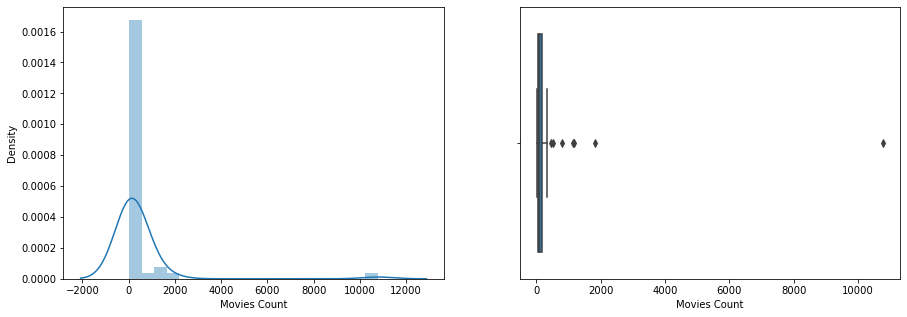

In [ ]:
f, ax = plt.subplots(1, 2 , figsize = (15, 5))
sns.distplot(countries_data_movies['Movies Count'][:50], bins = 20, kde = True, ax = ax[0])
sns.boxplot(countries_data_movies['Movies Count'][:50], ax = ax[1])
plt.show()

In [ ]:
# Creating distinct dataframes only with the movies present on individual streaming platforms
netflix_countries_movies = countries_data_movies[countries_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_countries_movies = netflix_countries_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

hulu_countries_movies = countries_data_movies[countries_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_countries_movies = hulu_countries_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

prime_video_countries_movies = countries_data_movies[countries_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_countries_movies = prime_video_countries_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)

disney_countries_movies = countries_data_movies[countries_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_countries_movies = disney_countries_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)

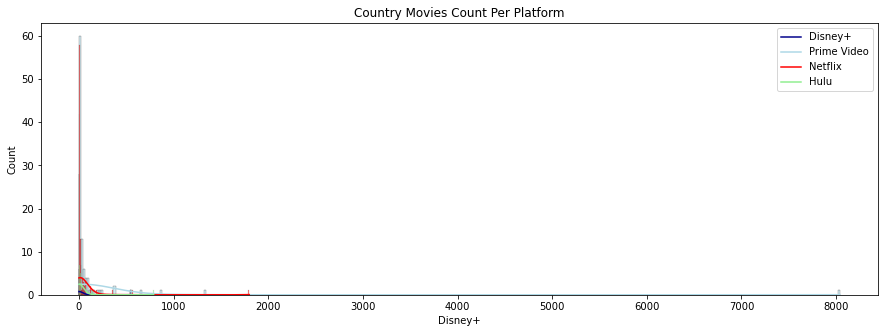

In [ ]:
# Defining plot size and title
plt.figure(figsize = (15, 5))
plt.title('Country Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(disney_countries_movies['Disney+'][:100], color = 'darkblue', legend = True, kde = True)  
sns.histplot(prime_video_countries_movies['Prime Video'][:100], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_countries_movies['Netflix'][:100], color = 'red', legend = True, kde = True)
sns.histplot(hulu_countries_movies['Hulu'][:100], color = 'lightgreen', legend = True, kde = True)                                
 
# Setting the legend
plt.legend(['Disney+', 'Prime Video', 'Netflix', 'Hulu'])
plt.show()

In [ ]:
print(f'''
      The Country with Highest Movies Count Ever Got is '{df_countries_high_movies['Country'][0]}' : '{df_countries_high_movies['Movies Count'].max()}'\n
      The Country with Lowest Movies Count Ever Got is '{df_countries_low_movies['Country'][0]}' : '{df_countries_low_movies['Movies Count'].min()}'\n
      
      The Country with Highest Movies Count on 'Netflix' is '{netflix_countries_high_movies['Country'][0]}' : '{netflix_countries_high_movies['Netflix'].max()}'\n
      The Country with Lowest Movies Count on 'Netflix' is '{netflix_countries_low_movies['Country'][0]}' : '{netflix_countries_low_movies['Netflix'].min()}'\n
      
      The Country with Highest Movies Count on 'Hulu' is '{hulu_countries_high_movies['Country'][0]}' : '{hulu_countries_high_movies['Hulu'].max()}'\n
      The Country with Lowest Movies Count on 'Hulu' is '{hulu_countries_low_movies['Country'][0]}' : '{hulu_countries_low_movies['Hulu'].min()}'\n
      
      The Country with Highest Movies Count on 'Prime Video' is '{prime_video_countries_high_movies['Country'][0]}' : '{prime_video_countries_high_movies['Prime Video'].max()}'\n
      The Country with Lowest Movies Count on 'Prime Video' is '{prime_video_countries_low_movies['Country'][0]}' : '{prime_video_countries_low_movies['Prime Video'].min()}'\n
      
      The Country with Highest Movies Count on 'Disney+' is '{disney_countries_high_movies['Country'][0]}' : '{disney_countries_high_movies['Disney+'].max()}'\n
      The Country with Lowest Movies Count on 'Disney+' is '{disney_countries_low_movies['Country'][0]}' : '{disney_countries_low_movies['Disney+'].min()}'\n 
      ''')


      The Country with Highest Movies Count Ever Got is 'United States' : '10771'

      The Country with Lowest Movies Count Ever Got is 'Macao' : '1'

      
      The Country with Highest Movies Count on 'Netflix' is 'United States' : '1800'

      The Country with Lowest Movies Count on 'Netflix' is 'Macao' : '0'

      
      The Country with Highest Movies Count on 'Hulu' is 'United States' : '790'

      The Country with Lowest Movies Count on 'Hulu' is 'Macao' : '0'

      
      The Country with Highest Movies Count on 'Prime Video' is 'United States' : '8040'

      The Country with Lowest Movies Count on 'Prime Video' is 'Federal Republic of Yugoslavia' : '0'

      
      The Country with Highest Movies Count on 'Disney+' is 'United States' : '546'

      The Country with Lowest Movies Count on 'Disney+' is 'Albania' : '0'
 
      


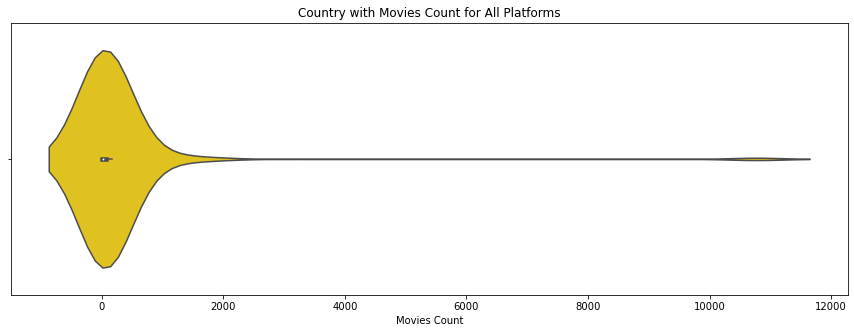

In [ ]:
# Distribution of tvshow rating in each platform
plt.figure(figsize = (15, 5))
plt.title('Country with Movies Count for All Platforms')
sns.violinplot(x = countries_data_movies['Movies Count'][:100], color = 'gold', legend = True, kde = True, shade = False)
plt.show()

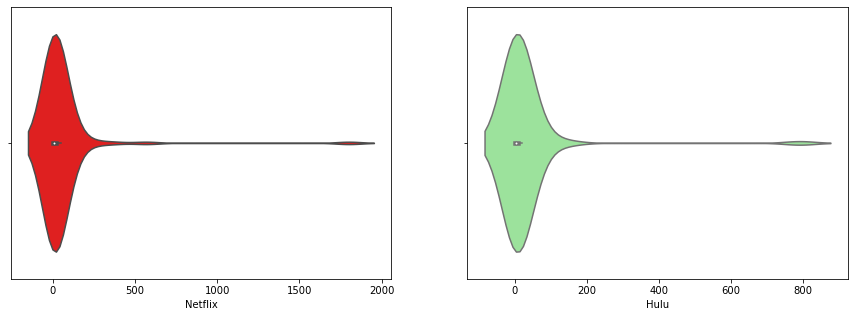

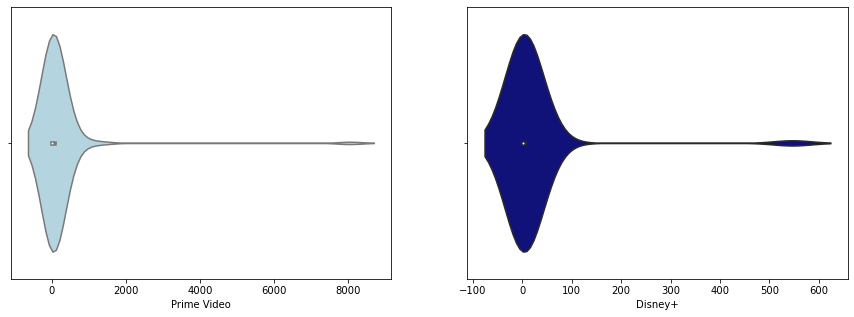

In [ ]:
# Distribution of Country Movies Count in each platform
f1, ax1 = plt.subplots(1, 2 , figsize = (15, 5))
sns.violinplot(x = netflix_countries_movies['Netflix'][:100], color = 'red', ax = ax1[0])
sns.violinplot(x = hulu_countries_movies['Hulu'][:100], color = 'lightgreen', ax = ax1[1])
 
f2, ax2 = plt.subplots(1, 2 , figsize = (15, 5))
sns.violinplot(x = prime_video_countries_movies['Prime Video'][:100], color = 'lightblue', ax = ax2[0])
sns.violinplot(x = disney_countries_movies['Disney+'][:100], color = 'darkblue', ax = ax2[1])
plt.show()

In [ ]:
print(f'''
      Accross All Platforms the Average Movies Count of Country is '{round(countries_data_movies['Movies Count'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Country on 'Netflix' is '{round(netflix_countries_movies['Netflix'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Country on 'Hulu' is '{round(hulu_countries_movies['Hulu'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Country on 'Prime Video' is '{round(prime_video_countries_movies['Prime Video'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Country on 'Disney+' is '{round(disney_countries_movies['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Movies Count of Country is '127.17'

      The Average Movies Count of Country on 'Netflix' is '45.85'

      The Average Movies Count of Country on 'Hulu' is '23.56'

      The Average Movies Count of Country on 'Prime Video' is '94.19'

      The Average Movies Count of Country on 'Disney+' is '17.41'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Country is '{countries_data_movies['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Netflix' is '{netflix_countries_movies['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Hulu' is '{hulu_countries_movies['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Prime Video' is '{prime_video_countries_movies['Country'].unique().shape[0]}'\n
      Total Count of Country on 'Disney+' is '{disney_countries_movies['Country'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Country is '169'

      Total Count of Country on 'Netflix' is '102'

      Total Count of Country on 'Hulu' is '66'

      Total Count of Country on 'Prime Video' is '163'

      Total Count of Country on 'Disney+' is '44'
 
      


In [ ]:
fig = px.bar(x = countries_data_movies['Country'][:50], y = countries_data_movies['Movies Count'][:50], 
             color = countries_data_movies['Movies Count'][:50], color_continuous_scale = 'Teal_r', 
             labels = { 'x' : 'Country', 'y' : 'Number of Movies'})
fig.show()

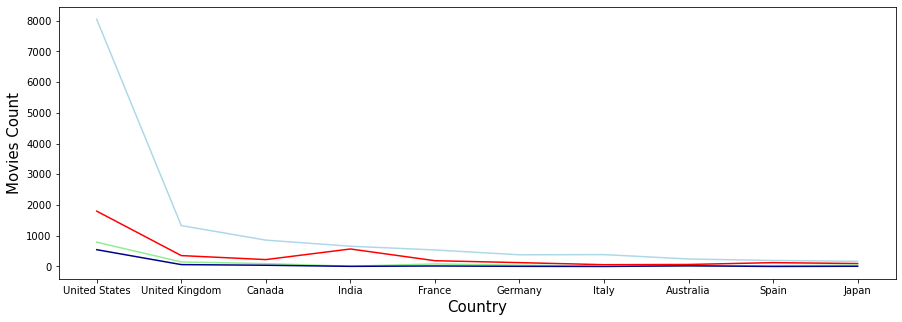

In [ ]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = countries_data_movies['Country'][:10], y = countries_data_movies['Netflix'][:10], color = 'red')
sns.lineplot(x = countries_data_movies['Country'][:10], y = countries_data_movies['Hulu'][:10], color = 'lightgreen')
sns.lineplot(x = countries_data_movies['Country'][:10], y = countries_data_movies['Prime Video'][:10], color = 'lightblue')
sns.lineplot(x = countries_data_movies['Country'][:10], y = countries_data_movies['Disney+'][:10], color = 'darkblue')
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Movies Count', fontsize = 15)
plt.show()

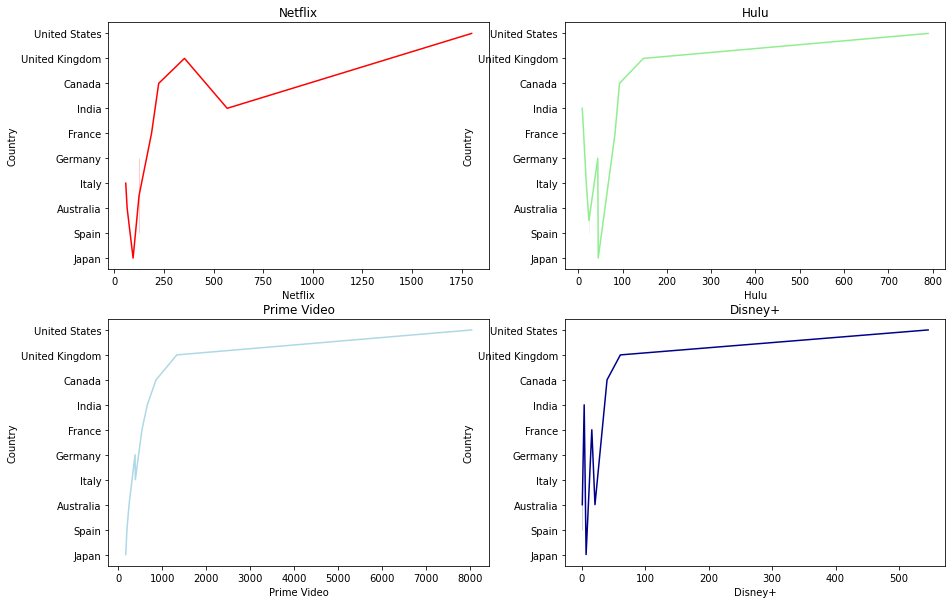

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15 , 10))
 
n_co_ax1 = sns.lineplot(y = countries_data_movies['Country'][:10], x = countries_data_movies['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_co_ax2 = sns.lineplot(y = countries_data_movies['Country'][:10], x = countries_data_movies['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_co_ax3 = sns.lineplot(y = countries_data_movies['Country'][:10], x = countries_data_movies['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_co_ax4 = sns.lineplot(y = countries_data_movies['Country'][:10], x = countries_data_movies['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_co_ax1.title.set_text(labels[0])
h_co_ax2.title.set_text(labels[1])
p_co_ax3.title.set_text(labels[2])
d_co_ax4.title.set_text(labels[3])
 
plt.show()

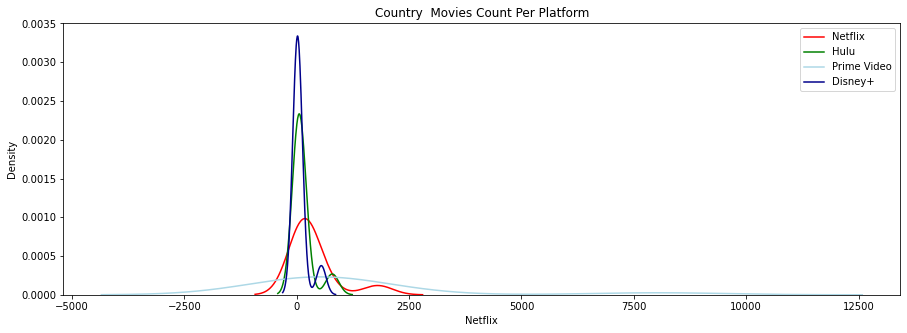

In [ ]:
# Defining plot size and title
plt.figure(figsize = (15, 5))
plt.title('Country  Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_countries_movies['Netflix'][:10], color = 'red', legend = True)
sns.kdeplot(hulu_countries_movies['Hulu'][:10], color = 'green', legend = True)
sns.kdeplot(prime_video_countries_movies['Prime Video'][:10], color = 'lightblue', legend = True)
sns.kdeplot(disney_countries_movies['Disney+'][:10], color = 'darkblue', legend = True)                                      
                                      
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

In [ ]:
df_movies_languages = df_movies.copy()

In [ ]:
# Create languages dict where key=name and value = number of languages
 
languages = {}
 
for i in df_movies_languages['Language'].dropna():
    if i != "NA":
        #print(i,len(i.split(',')))
        languages[i] = len(i.split(','))
    else:
        languages[i] = 0
    
# Add this information to our dataframe as a new column
 
df_movies_languages['Number of Language'] = df_movies_languages['Language'].map(languages).astype(int)

In [ ]:
df_languages_most_movies = df_movies_languages.sort_values(by = 'Number of Language', ascending = False).reset_index()
df_languages_most_movies = df_languages_most_movies.drop(['index'], axis = 1)
# filter = (df_movies_languages['Language'] == (df_movies_languages['Number of Language'].max()))
# df_languages_most_movies = df_movies_languages[filter]
 
# mostest_rated_tvshow = df_movies_languages.loc[df_movies_languages['Number of Language'].idxmax()]
 
print('\nMovies with Highest Ever Language Count are : \n')
df_languages_most_movies.head(5)


Movies with Highest Ever Language Count are : 



ID                             Title  Year Age IMDb Rotten Tomatoes  \
0  15782                   The Jungle Book  1967   7  7.4              94   
1    456                              2012  2009  13  5.8              39   
2    449                   Die Another Day  2002  13  6.1              56   
3    555                 American Assassin  2017  16  6.2              34   
4   3940  Free Willy 2: The Adventure Home  1995   7  5.1              50   

          Directors                                               Cast  \
0       Jon Favreau  Neel Sethi,Bill Murray,Ben Kingsley,Idris Elba...   
1   Roland Emmerich  John Cusack,Amanda Peet,Chiwetel Ejiofor,Thand...   
2      Lee Tamahori  Pierce Brosnan,Halle Berry,Toby Stephens,Rosam...   
3    Michael Cuesta  Dylan O'Brien,Charlotte Vega,Christopher Bomfo...   
4  Dwight H. Little  Jason James Richter,Francis Capra,Mary Kate Sc...   

                           Genres                                     Country  \
0  Adventure,Drama,Family,Fantasy                United Kingdom,United States   
1         Action,Adventure,Sci-Fi                               United States   
2       Action,Adventure,Thriller  United Kingdom,United States,Spain,Iceland   
3                 Action,Thriller                               United States   
4          Adventure,Drama,Family             France,United States,Luxembourg   

   ...                                           Plotline Runtime   Kind  \
0  ...  While the First Order continues to ravage the ...     106  movie   
1  ...  Dr. Adrian Helmsley, part of a worldwide geoph...     158  movie   
2  ...  Pierce Brosnan gives one last mission as James...     133  movie   
3  ...  Twenty three-year-old Mitch lost his parents t...     111  movie   
4  ...  Willy the smart and rebellious whale and Jessi...      95  movie   

  Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  \
0       0     0            0        1     0           Disney+   
1       1     0            0        0     0           Netflix   
2       1     0            0        0     0           Netflix   
3       1     0            0        0     0           Netflix   
4       0     1            0        0     0              Hulu   

  Number of Language  
0                 16  
1                 10  
2                  8  
3                  8  
4                  8  

[5 rows x 21 columns]

In [ ]:
df_languages_least_movies = df_movies_languages.sort_values(by = 'Number of Language', ascending = True).reset_index()
df_languages_least_movies = df_languages_least_movies.drop(['index'], axis = 1)
# filter = (df_movies_languages['Language'] == (df_movies_languages['Number of Language'].min()))
# df_languages_least_movies = df_movies_languages[filter]
 
print('\nMovies with Lowest Ever Language Count are : \n')
df_languages_least_movies.head(5)


Movies with Lowest Ever Language Count are : 



ID                                              Title  Year Age IMDb  \
0  16923                                   Paradise Islands  2017  13   NA   
1   3390  Thomas & Friends: Marvelous Machinery: World o...  2020  NR   NA   
2   3389                    Chhota Bheem Ka Troll Se Takkar  2018  NR   NA   
3   3388               Digs & Discoveries: Mines of Mystery  2019  NR   NA   
4   3387                                   Alakada Reloaded  2017  NR   NA   

  Rotten Tomatoes                Directors  \
0              NA                       NA   
1              NA                       NA   
2              NA                       NA   
3              NA                       NA   
4              NA  Toyin Abraham,Titi Jeje   

                                                Cast  Genres        Country  \
0                                                 NA   Drama  United States   
1                                                 NA      NA             NA   
2                                                 NA      NA             NA   
3                                                 NA      NA             NA   
4  Toyin Abraham,Odunlade Adekola,Gabriel Afolaya...  Comedy        Nigeria   

   ... Plotline Runtime   Kind Netflix  Hulu  Prime Video  Disney+  Type  \
0  ...       NA      NA  movie       0     0            0        1     0   
1  ...       NA      NA  movie       1     0            0        0     0   
2  ...       NA      NA  movie       1     0            0        0     0   
3  ...       NA      NA  movie       1     0            0        0     0   
4  ...       NA     103  movie       1     0            0        0     0   

   Service Provider Number of Language  
0           Disney+                  0  
1           Netflix                  0  
2           Netflix                  0  
3           Netflix                  0  
4           Netflix                  0  

[5 rows x 21 columns]

In [ ]:
print(f'''
      Total '{df_movies_languages['Language'].unique().shape[0]}' unique Language Counts were Given, They were Like this,\n
      
      {df_movies_languages.sort_values(by = 'Number of Language', ascending = False)['Language'].unique()[:5]} .etc\n
 
      The Highest Ever Language Count Any TV Show Got is '{df_languages_most_movies['Title'][0]}' : '{df_languages_most_movies['Number of Language'].max()}'\n
 
      The Lowest Ever Language Count Any TV Show Got is '{df_languages_least_movies['Title'][0]}' : '{df_languages_least_movies['Number of Language'].min()}'\n
      ''')


      Total '1166' unique Language Counts were Given, They were Like this,

      
      ['English,Hindi,Bengali,Kannada,Telugu,Tamil,Assamese,Gujarati,Urdu,Oriya,Punjabi,Malayalam,Marathi,Rajasthani,Haryanvi,Nepali'
 'English,French,Tibetan,Mandarin,Russian,Hindi,Portuguese,Latin,Italian,Spanish'
 'English,Korean,Cantonese,Spanish,German,Icelandic,Italian,Arabic'
 'English,Spanish,Arabic,Polish,Turkish,Russian,Italian,Persian'
 'English,Danish,Malay,Dutch,Indonesian,Finnish,Luxembourgish,French Sign Language'] .etc

 
      The Highest Ever Language Count Any TV Show Got is 'The Jungle Book' : '16'

 
      The Lowest Ever Language Count Any TV Show Got is 'Paradise Islands' : '0'

      


In [ ]:
netflix_languages_most_movies = df_languages_most_movies.loc[df_languages_most_movies['Netflix']==1].reset_index()
netflix_languages_most_movies = netflix_languages_most_movies.drop(['index'], axis = 1)
 
netflix_languages_least_movies = df_languages_least_movies.loc[df_languages_least_movies['Netflix']==1].reset_index()
netflix_languages_least_movies = netflix_languages_least_movies.drop(['index'], axis = 1)
 
netflix_languages_most_movies.head(5)

ID                Title  Year Age IMDb Rotten Tomatoes  \
0  456                 2012  2009  13  5.8              39   
1  449      Die Another Day  2002  13  6.1              56   
2  555    American Assassin  2017  16  6.2              34   
3  144                Babel  2006  16  7.4              69   
4  511  The Wandering Earth  2019  13    6              70   

               Directors                                               Cast  \
0        Roland Emmerich  John Cusack,Amanda Peet,Chiwetel Ejiofor,Thand...   
1           Lee Tamahori  Pierce Brosnan,Halle Berry,Toby Stephens,Rosam...   
2         Michael Cuesta  Dylan O'Brien,Charlotte Vega,Christopher Bomfo...   
3  Alejandro G. Iñárritu  Brad Pitt,Cate Blanchett,Mohamed Akhzam,Peter ...   
4              Frant Gwo  Jing Wu,Chuxiao Qu,Guangjie Li,Man-Tat Ng,Jin ...   

                      Genres                                     Country  ...  \
0    Action,Adventure,Sci-Fi                               United States  ...   
1  Action,Adventure,Thriller  United Kingdom,United States,Spain,Iceland  ...   
2            Action,Thriller                               United States  ...   
3                      Drama   United States,Mexico,France,Morocco,Japan  ...   
4              Action,Sci-Fi                                       China  ...   

                                            Plotline Runtime   Kind Netflix  \
0  Dr. Adrian Helmsley, part of a worldwide geoph...     158  movie       1   
1  Pierce Brosnan gives one last mission as James...     133  movie       1   
2  Twenty three-year-old Mitch lost his parents t...     111  movie       1   
3  4 interlocking stories connected by a single g...     143  movie       1   
4  The sun is dying out. The earth will soon be e...     125  movie       1   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Language  
0     0            0        0     0           Netflix                 10  
1     0            0        0     0           Netflix                  8  
2     0            0        0     0           Netflix                  8  
3     0            0        0     0           Netflix                  8  
4     0            0        0     0           Netflix                  8  

[5 rows x 21 columns]

In [ ]:
hulu_languages_most_movies = df_languages_most_movies.loc[df_languages_most_movies['Hulu']==1].reset_index()
hulu_languages_most_movies = hulu_languages_most_movies.drop(['index'], axis = 1)
 
hulu_languages_least_movies = df_languages_least_movies.loc[df_languages_least_movies['Hulu']==1].reset_index()
hulu_languages_least_movies = hulu_languages_least_movies.drop(['index'], axis = 1)
 
hulu_languages_most_movies.head(5)

ID                             Title  Year Age IMDb Rotten Tomatoes  \
0   3940  Free Willy 2: The Adventure Home  1995   7  5.1              50   
1   3523            Embrace of the Serpent  2015  NR  7.9              96   
2   3777                        Downsizing  2017  16  5.7              47   
3   3916                          Terminal  2018  13  7.4              33   
4  16424                      The Exorcist  2016  16    8              89   

          Directors                                               Cast  \
0  Dwight H. Little  Jason James Richter,Francis Capra,Mary Kate Sc...   
1       Ciro Guerra  Nilbio Torres,Antonio Bolívar,Jan Bijvoet,Brio...   
2   Alexander Payne  Matt Damon,Christoph Waltz,Hong Chau,Kristen W...   
3  Steven Spielberg  Tom Hanks,Catherine Zeta-Jones,Stanley Tucci,C...   
4  William Friedkin  Ellen Burstyn,Max von Sydow,Lee J. Cobb,Kitty ...   

                      Genres                          Country  ...  \
0     Adventure,Drama,Family  France,United States,Luxembourg  ...   
1  Adventure,Biography,Drama     Colombia,Venezuela,Argentina  ...   
2       Drama,Fantasy,Sci-Fi             United States,Norway  ...   
3       Comedy,Drama,Romance                    United States  ...   
4                     Horror                    United States  ...   

                                            Plotline Runtime   Kind Netflix  \
0  Willy the smart and rebellious whale and Jessi...      95  movie       0   
1                                                 NA     125  movie       0   
2  A new world of possibilities awaits, thanks to...     135  movie       0   
3  Victor Navorski reaches JFK airport from a pol...     128  movie       0   
4                                                 NA     122  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Language  
0     1            0        0     0              Hulu                  8  
1     1            1        0     0       Prime Video                  7  
2     1            1        0     0       Prime Video                  7  
3     1            0        0     0              Hulu                  7  
4     1            0        0     0              Hulu                  7  

[5 rows x 21 columns]

In [ ]:
prime_video_languages_most_movies = df_languages_most_movies.loc[df_languages_most_movies['Prime Video']==1].reset_index()
prime_video_languages_most_movies = prime_video_languages_most_movies.drop(['index'], axis = 1)
 
prime_video_languages_least_movies = df_languages_least_movies.loc[df_languages_least_movies['Prime Video']==1].reset_index()
prime_video_languages_least_movies = prime_video_languages_least_movies.drop(['index'], axis = 1)
 
prime_video_languages_most_movies.head(5)

ID                   Title  Year Age IMDb Rotten Tomatoes  \
0  11459      Off Jackson Avenue  2008  NR  6.7              59   
1   3523  Embrace of the Serpent  2015  NR  7.9              96   
2   8500        Crash Test Aglaé  2017  NR  6.6              NA   
3   3777              Downsizing  2017  16  5.7              47   
4   4866             The Vikings  1958  16  6.6              76   

                         Directors  \
0                John-Luke Montias   
1                      Ciro Guerra   
2                      Eric Gravel   
3                  Alexander Payne   
4  John McTiernan,Michael Crichton   

                                                Cast  \
0  Jessica Pimentel,Stivi Paskoski,Jun Suenaga,Jo...   
1  Nilbio Torres,Antonio Bolívar,Jan Bijvoet,Brio...   
2  India Hair,Julie Depardieu,Yolande Moreau,Anne...   
3  Matt Damon,Christoph Waltz,Hong Chau,Kristen W...   
4  Antonio Banderas,Diane Venora,Dennis Storhøi,V...   

                      Genres                       Country  ...  \
0       Crime,Drama,Thriller                 United States  ...   
1  Adventure,Biography,Drama  Colombia,Venezuela,Argentina  ...   
2               Comedy,Drama                        France  ...   
3       Drama,Fantasy,Sci-Fi          United States,Norway  ...   
4   Action,Adventure,History                 United States  ...   

                                            Plotline Runtime   Kind Netflix  \
0  The Attendant tells the story of Alex, a haple...      80  movie       0   
1                                                 NA     125  movie       0   
2  Spetnaz (Special Ops) veteran Nick Cherenko le...      85  movie       0   
3  A new world of possibilities awaits, thanks to...     135  movie       0   
4                                                 NA     102  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Language  
0     0            1        0     0       Prime Video                  7  
1     1            1        0     0       Prime Video                  7  
2     0            1        0     0       Prime Video                  7  
3     1            1        0     0       Prime Video                  7  
4     0            1        0     0       Prime Video                  7  

[5 rows x 21 columns]

In [ ]:
disney_languages_most_movies = df_languages_most_movies.loc[df_languages_most_movies['Disney+']==1].reset_index()
disney_languages_most_movies = disney_languages_most_movies.drop(['index'], axis = 1)
 
disney_languages_least_movies = df_languages_least_movies.loc[df_languages_least_movies['Disney+']==1].reset_index()
disney_languages_least_movies = disney_languages_least_movies.drop(['index'], axis = 1)
 
disney_languages_most_movies.head(5)

ID                       Title  Year Age IMDb Rotten Tomatoes  \
0  15782             The Jungle Book  1967   7  7.4              94   
1  16916                    Iron Man  1994  16  7.9              60   
2  15802      Miracle on 34th Street  1947   7  6.6              96   
3  15733               The Lion King  1994   7  6.9              93   
4  15746  Captain America: Civil War  2016  13  7.8              90   

                 Directors                                               Cast  \
0              Jon Favreau  Neel Sethi,Bill Murray,Ben Kingsley,Idris Elba...   
1              Jon Favreau  Robert Downey Jr.,Terrence Howard,Jeff Bridges...   
2             Les Mayfield  Richard Attenborough,Elizabeth Perkins,Dylan M...   
3              Jon Favreau  Chiwetel Ejiofor,John Oliver,James Earl Jones,...   
4  Anthony Russo,Joe Russo  Chris Evans,Robert Downey Jr.,Scarlett Johanss...   

                                     Genres  \
0            Adventure,Drama,Family,Fantasy   
1                   Action,Adventure,Sci-Fi   
2                            Family,Fantasy   
3  Animation,Adventure,Drama,Family,Musical   
4                   Action,Adventure,Sci-Fi   

                                     Country  ...  \
0               United Kingdom,United States  ...   
1                       United States,Canada  ...   
2                              United States  ...   
3  United States,United Kingdom,South Africa  ...   
4                              United States  ...   

                                            Plotline Runtime   Kind Netflix  \
0  While the First Order continues to ravage the ...     106  movie       0   
1                                                 NA     126  movie       0   
2  A young boy, Pete, is found in a forest where ...     114  movie       0   
3  With many people fearing the actions of super ...     118  movie       0   
4  All looks lost for the Rebellion against the E...     147  movie       0   

   Hulu  Prime Video  Disney+  Type  Service Provider Number of Language  
0     0            0        1     0           Disney+                 16  
1     0            0        1     0           Disney+                  7  
2     0            0        1     0           Disney+                  6  
3     0            0        1     0           Disney+                  6  
4     0            0        1     0           Disney+                  6  

[5 rows x 21 columns]

In [ ]:
print(f'''
      The TV Show with Highest Language Count Ever Got is '{df_languages_most_movies['Title'][0]}' : '{df_languages_most_movies['Number of Language'].max()}'\n
      The TV Show with Lowest Language Count Ever Got is '{df_languages_least_movies['Title'][0]}' : '{df_languages_least_movies['Number of Language'].min()}'\n
      
      The TV Show with Highest Language Count on 'Netflix' is '{netflix_languages_most_movies['Title'][0]}' : '{netflix_languages_most_movies['Number of Language'].max()}'\n
      The TV Show with Lowest Language Count on 'Netflix' is '{netflix_languages_least_movies['Title'][0]}' : '{netflix_languages_least_movies['Number of Language'].min()}'\n
      
      The TV Show with Highest Language Count on 'Hulu' is '{hulu_languages_most_movies['Title'][0]}' : '{hulu_languages_most_movies['Number of Language'].max()}'\n
      The TV Show with Lowest Language Count on 'Hulu' is '{hulu_languages_least_movies['Title'][0]}' : '{hulu_languages_least_movies['Number of Language'].min()}'\n
      
      The TV Show with Highest Language Count on 'Prime Video' is '{prime_video_languages_most_movies['Title'][0]}' : '{prime_video_languages_most_movies['Number of Language'].max()}'\n
      The TV Show with Lowest Language Count on 'Prime Video' is '{prime_video_languages_least_movies['Title'][0]}' : '{prime_video_languages_least_movies['Number of Language'].min()}'\n
      
      The TV Show with Highest Language Count on 'Disney+' is '{disney_languages_most_movies['Title'][0]}' : '{disney_languages_most_movies['Number of Language'].max()}'\n
      The TV Show with Lowest Language Count on 'Disney+' is '{disney_languages_least_movies['Title'][0]}' : '{disney_languages_least_movies['Number of Language'].min()}'\n 
      ''')


      The TV Show with Highest Language Count Ever Got is 'The Jungle Book' : '16'

      The TV Show with Lowest Language Count Ever Got is 'Paradise Islands' : '0'

      
      The TV Show with Highest Language Count on 'Netflix' is '2012' : '10'

      The TV Show with Lowest Language Count on 'Netflix' is 'Thomas & Friends: Marvelous Machinery: World of Tomorrow' : '0'

      
      The TV Show with Highest Language Count on 'Hulu' is 'Free Willy 2: The Adventure Home' : '8'

      The TV Show with Lowest Language Count on 'Hulu' is 'Trust' : '0'

      
      The TV Show with Highest Language Count on 'Prime Video' is 'Off Jackson Avenue' : '7'

      The TV Show with Lowest Language Count on 'Prime Video' is 'Accidentally Engaged' : '0'

      
      The TV Show with Highest Language Count on 'Disney+' is 'The Jungle Book' : '16'

      The TV Show with Lowest Language Count on 'Disney+' is 'Paradise Islands' : '0'
 
      


In [ ]:
print(f'''
      Accross All Platforms the Average Language Count is '{round(df_movies_languages['Number of Language'].mean(), ndigits = 2)}'\n
      The Average Language Count on 'Netflix' is '{round(netflix_languages_most_movies['Number of Language'].mean(), ndigits = 2)}'\n
      The Average Language Count on 'Hulu' is '{round(hulu_languages_most_movies['Number of Language'].mean(), ndigits = 2)}'\n
      The Average Language Count on 'Prime Video' is '{round(prime_video_languages_most_movies['Number of Language'].mean(), ndigits = 2)}'\n
      The Average Language Count on 'Disney+' is '{round(disney_languages_most_movies['Number of Language'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Language Count is '1.25'

      The Average Language Count on 'Netflix' is '1.35'

      The Average Language Count on 'Hulu' is '1.45'

      The Average Language Count on 'Prime Video' is '1.21'

      The Average Language Count on 'Disney+' is '1.32'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Language is '{df_movies_languages['Language'].unique().shape[0]}'\n
      Total Count of Language on 'Netflix' is '{netflix_languages_most_movies['Language'].unique().shape[0]}'\n
      Total Count of Language on 'Hulu' is '{hulu_languages_most_movies['Language'].unique().shape[0]}'\n
      Total Count of Language on 'Prime Video' is '{prime_video_languages_most_movies['Language'].unique().shape[0]}'\n
      Total Count of Language on 'Disney+' is '{disney_languages_most_movies['Language'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Language is '1166'

      Total Count of Language on 'Netflix' is '467'

      Total Count of Language on 'Hulu' is '180'

      Total Count of Language on 'Prime Video' is '820'

      Total Count of Language on 'Disney+' is '62'
 
      


In [ ]:
df_movies_languages.drop(df_movies_languages.loc[df_movies_languages['Language'] == "NA"].index, inplace = True)
# df_movies_languages = df_movies_languages[df_movies_languages.Language != "NA"]

In [ ]:
df_lan = df_movies_languages['Language'].str.split(',').apply(pd.Series).stack()
del df_movies_languages['Language']
df_lan.index = df_lan.index.droplevel(-1)
df_lan.name = 'Language'
df_movies_languages = df_movies_languages.join(df_lan)
df_movies_languages.drop_duplicates(inplace = True)

In [ ]:
df_movies_languages.head(5)

ID                   Title  Year Age IMDb Rotten Tomatoes  \
0   1               Inception  2010  13  8.8              87   
0   1               Inception  2010  13  8.8              87   
0   1               Inception  2010  13  8.8              87   
1   2              The Matrix  1999  16  8.7              88   
2   3  Avengers: Infinity War  2018  13  8.4              85   

                        Directors  \
0               Christopher Nolan   
0               Christopher Nolan   
0               Christopher Nolan   
1  Lana Wachowski,Lilly Wachowski   
2         Anthony Russo,Joe Russo   

                                                Cast  \
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
0  Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...   
1  Keanu Reeves,Laurence Fishburne,Carrie-Anne Mo...   
2  Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...   

                             Genres                       Country  ...  \
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom  ...   
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom  ...   
0  Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom  ...   
1                     Action,Sci-Fi                 United States  ...   
2           Action,Adventure,Sci-Fi                 United States  ...   

  Runtime   Kind Netflix  Hulu  Prime Video  Disney+  Type  Service Provider  \
0     148  movie       1     0            0        0     0           Netflix   
0     148  movie       1     0            0        0     0           Netflix   
0     148  movie       1     0            0        0     0           Netflix   
1     136  movie       1     0            0        0     0           Netflix   
2     149  movie       1     0            0        0     0           Netflix   

  Number of Language  Language  
0                  3   English  
0                  3  Japanese  
0                  3    French  
1                  1   English  
2                  1   English  

[5 rows x 21 columns]

In [ ]:
languages_count = df_movies_languages.groupby('Language')['Title'].count()
languages_tvshow = df_movies_languages.groupby('Language')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
languages_data_movies = pd.concat([languages_count, languages_tvshow], axis = 1).reset_index().rename(columns = {'Title' : 'Movies Count'})
languages_data_movies = languages_data_movies.sort_values(by = 'Movies Count', ascending = False)

In [ ]:
# Language with Movies Counts - All Platforms Combined
languages_data_movies.sort_values(by = 'Movies Count', ascending = False)[:10]

Language  Movies Count  Netflix  Hulu  Prime Video  Disney+
46    English         13524     2370   950        10146      556
156   Spanish           953      356    88          528       23
53     French           875      239   102          553       28
69      Hindi           720      368     6          410        7
58     German           526      118    53          361       16
77    Italian           491       87    32          378       11
102  Mandarin           371       91    21          276        9
78   Japanese           340      101    49          199        5
139   Russian           238       60    24          159        6
11     Arabic           196       91    12           93        5

In [ ]:
# Language with Movies Counts - All Platforms Combined
languages_data_movies.sort_values(by = 'Movies Count', ascending = False)[:10]
 
df_languages_high_movies = languages_data_movies.sort_values(by = 'Movies Count', ascending = False).reset_index()
df_languages_high_movies = df_languages_high_movies.drop(['index'], axis = 1)
# filter = (languages_data_movies['Movies Count'] = =  (languages_data_movies['Movies Count'].max()))
# df_languages_high_movies = languages_data_movies[filter]
 
# highest_rated_tvshow = languages_data_movies.loc[languages_data_movies['Movies Count'].idxmax()]
 
print('\nLanguage with Highest Ever Movies Count are : All Platforms Combined\n')
df_languages_high_movies.head(5)


Language with Highest Ever Movies Count are : All Platforms Combined



Language  Movies Count  Netflix  Hulu  Prime Video  Disney+
0  English         13524     2370   950        10146      556
1  Spanish           953      356    88          528       23
2   French           875      239   102          553       28
3    Hindi           720      368     6          410        7
4   German           526      118    53          361       16

In [ ]:
df_languages_low_movies = languages_data_movies.sort_values(by = 'Movies Count', ascending = True).reset_index()
df_languages_low_movies = df_languages_low_movies.drop(['index'], axis = 1)
# filter = (languages_data_movies['Movies Count'] = =  (languages_data_movies['Movies Count'].min()))
# df_languages_low_movies = languages_data_movies[filter]
 
print('\nLanguage with Lowest Ever Movies Count are : All Platforms Combined\n')
df_languages_low_movies.head(5)


Language with Lowest Ever Movies Count are : All Platforms Combined



Language  Movies Count  Netflix  Hulu  Prime Video  Disney+
0               Lao             1        0     0            1        0
1        Belarusian             1        0     0            1        0
2             Bemba             1        0     1            0        0
3             Hakka             1        0     0            1        0
4  Berber languages             1        1     0            0        0

In [ ]:
print(f'''
      Total '{df_movies['Language'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see Movies from Total '{languages_data_movies['Language'].unique().shape[0]}' Language, They were Like this, \n
 
      {languages_data_movies.sort_values(by = 'Movies Count', ascending = False)['Language'].head(5).unique()} etc. \n
 
      The Language with Highest Movies Count have '{languages_data_movies['Movies Count'].max()}' Movies Available is '{df_languages_high_movies['Language'][0]}', &\n
      The Language with Lowest Movies Count have '{languages_data_movies['Movies Count'].min()}' Movies Available is '{df_languages_low_movies['Language'][0]}'
      ''')


      Total '16923' Titles are available on All Platforms, out of which

      You Can Choose to see Movies from Total '183' Language, They were Like this, 

 
      ['English' 'Spanish' 'French' 'Hindi' 'German'] etc. 

 
      The Language with Highest Movies Count have '13524' Movies Available is 'English', &

      The Language with Lowest Movies Count have '1' Movies Available is 'Lao'
      


In [ ]:
fig = px.pie(languages_data_movies[:10], names = 'Language', values = 'Movies Count')
fig.update_traces(textinfo = 'percent+label', title = 'Movies Count based on IMDb Counts')
fig.show()

In [ ]:
# netflix_languages_movies = languages_data_movies[languages_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
# netflix_languages_movies = netflix_languages_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
netflix_languages_high_movies = df_languages_high_movies.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_languages_high_movies = netflix_languages_high_movies.drop(['index'], axis = 1)
 
netflix_languages_low_movies = df_languages_high_movies.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_languages_low_movies = netflix_languages_low_movies.drop(['index'], axis = 1)
 
netflix_languages_high_movies.head(5)

Language  Movies Count  Netflix  Hulu  Prime Video  Disney+
0  English         13524     2370   950        10146      556
1    Hindi           720      368     6          410        7
2  Spanish           953      356    88          528       23
3   French           875      239   102          553       28
4   German           526      118    53          361       16

In [ ]:
# hulu_languages_movies = languages_data_movies[languages_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
# hulu_languages_movies = hulu_languages_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
hulu_languages_high_movies = df_languages_high_movies.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_languages_high_movies = hulu_languages_high_movies.drop(['index'], axis = 1)
 
hulu_languages_low_movies = df_languages_high_movies.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_languages_low_movies = hulu_languages_low_movies.drop(['index'], axis = 1)
 
hulu_languages_high_movies.head(5)

Language  Movies Count  Netflix  Hulu  Prime Video  Disney+
0   English         13524     2370   950        10146      556
1    French           875      239   102          553       28
2   Spanish           953      356    88          528       23
3    German           526      118    53          361       16
4  Japanese           340      101    49          199        5

In [ ]:
# prime_video_languages_movies = languages_data_movies[languages_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
# prime_video_languages_movies = prime_video_languages_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)
 
prime_video_languages_high_movies = df_languages_high_movies.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_languages_high_movies = prime_video_languages_high_movies.drop(['index'], axis = 1)
 
prime_video_languages_low_movies = df_languages_high_movies.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_languages_low_movies = prime_video_languages_low_movies.drop(['index'], axis = 1)
 
prime_video_languages_high_movies.head(5)

Language  Movies Count  Netflix  Hulu  Prime Video  Disney+
0  English         13524     2370   950        10146      556
1   French           875      239   102          553       28
2  Spanish           953      356    88          528       23
3    Hindi           720      368     6          410        7
4  Italian           491       87    32          378       11

In [ ]:
# disney_languages_movies = languages_data_movies[languages_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
# disney_languages_movies = disney_languages_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)
 
disney_languages_high_movies = df_languages_high_movies.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_languages_high_movies = disney_languages_high_movies.drop(['index'], axis = 1)
 
disney_languages_low_movies = df_languages_high_movies.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_languages_low_movies = disney_languages_low_movies.drop(['index'], axis = 1)
 
disney_languages_high_movies.head(5)

Language  Movies Count  Netflix  Hulu  Prime Video  Disney+
0  English         13524     2370   950        10146      556
1   French           875      239   102          553       28
2  Spanish           953      356    88          528       23
3   German           526      118    53          361       16
4  Italian           491       87    32          378       11

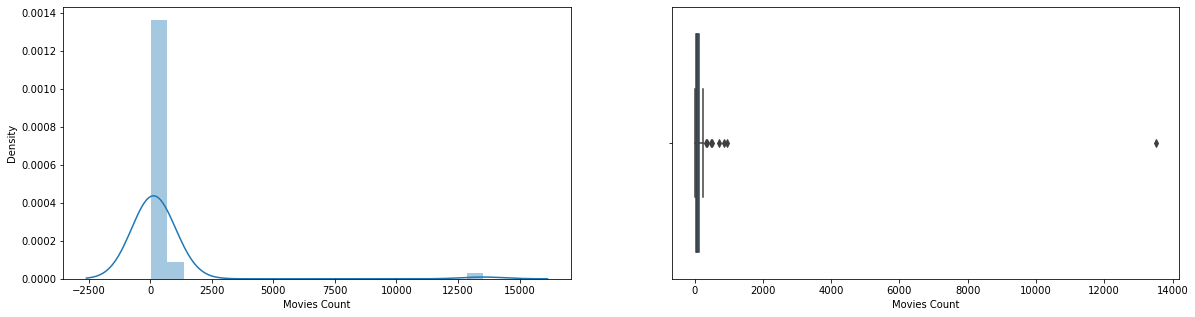

In [ ]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(languages_data_movies['Movies Count'][:50], bins = 20, kde = True, ax = ax[0])
sns.boxplot(languages_data_movies['Movies Count'][:50], ax = ax[1])
plt.show()

In [ ]:
# Creating distinct dataframes only with the movies present on individual streaming platforms
netflix_languages_movies = languages_data_movies[languages_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_languages_movies = netflix_languages_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

hulu_languages_movies = languages_data_movies[languages_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_languages_movies = hulu_languages_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)

prime_video_languages_movies = languages_data_movies[languages_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_languages_movies = prime_video_languages_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)

disney_languages_movies = languages_data_movies[languages_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_languages_movies = disney_languages_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)

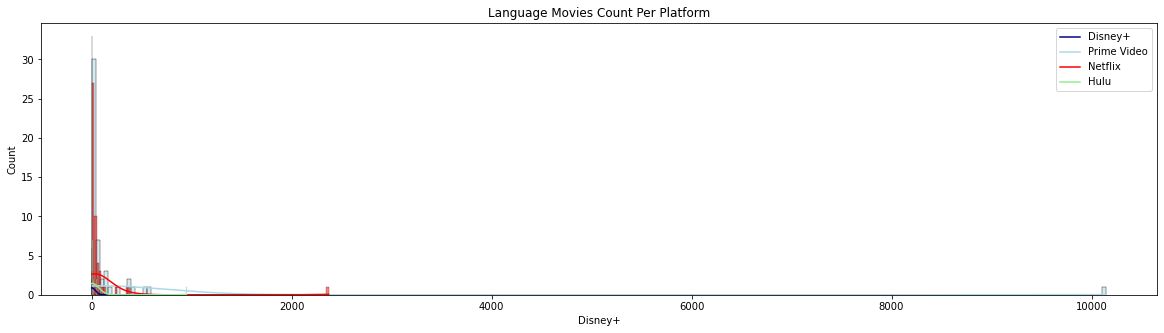

In [ ]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Language Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
 
sns.histplot(disney_languages_movies['Disney+'][:50], color = 'darkblue', legend = True, kde = True)  
sns.histplot(prime_video_languages_movies['Prime Video'][:50], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_languages_movies['Netflix'][:50], color = 'red', legend = True, kde = True)
sns.histplot(hulu_languages_movies['Hulu'][:50], color = 'lightgreen', legend = True, kde = True)                                
 
# Setting the legend
plt.legend(['Disney+', 'Prime Video', 'Netflix', 'Hulu'])
plt.show()

In [ ]:
print(f'''
      The Language with Highest Movies Count Ever Got is '{df_languages_high_movies['Language'][0]}' : '{df_languages_high_movies['Movies Count'].max()}'\n
      The Language with Lowest Movies Count Ever Got is '{df_languages_low_movies['Language'][0]}' : '{df_languages_low_movies['Movies Count'].min()}'\n
      
      The Language with Highest Movies Count on 'Netflix' is '{netflix_languages_high_movies['Language'][0]}' : '{netflix_languages_high_movies['Netflix'].max()}'\n
      The Language with Lowest Movies Count on 'Netflix' is '{netflix_languages_low_movies['Language'][0]}' : '{netflix_languages_low_movies['Netflix'].min()}'\n
      
      The Language with Highest Movies Count on 'Hulu' is '{hulu_languages_high_movies['Language'][0]}' : '{hulu_languages_high_movies['Hulu'].max()}'\n
      The Language with Lowest Movies Count on 'Hulu' is '{hulu_languages_low_movies['Language'][0]}' : '{hulu_languages_low_movies['Hulu'].min()}'\n
      
      The Language with Highest Movies Count on 'Prime Video' is '{prime_video_languages_high_movies['Language'][0]}' : '{prime_video_languages_high_movies['Prime Video'].max()}'\n
      The Language with Lowest Movies Count on 'Prime Video' is '{prime_video_languages_low_movies['Language'][0]}' : '{prime_video_languages_low_movies['Prime Video'].min()}'\n
      
      The Language with Highest Movies Count on 'Disney+' is '{disney_languages_high_movies['Language'][0]}' : '{disney_languages_high_movies['Disney+'].max()}'\n
      The Language with Lowest Movies Count on 'Disney+' is '{disney_languages_low_movies['Language'][0]}' : '{disney_languages_low_movies['Disney+'].min()}'\n 
      ''')


      The Language with Highest Movies Count Ever Got is 'English' : '13524'

      The Language with Lowest Movies Count Ever Got is 'Lao' : '1'

      
      The Language with Highest Movies Count on 'Netflix' is 'English' : '2370'

      The Language with Lowest Movies Count on 'Netflix' is 'North American Indian' : '0'

      
      The Language with Highest Movies Count on 'Hulu' is 'English' : '950'

      The Language with Lowest Movies Count on 'Hulu' is 'North American Indian' : '0'

      
      The Language with Highest Movies Count on 'Prime Video' is 'English' : '10146'

      The Language with Lowest Movies Count on 'Prime Video' is 'Greenlandic' : '0'

      
      The Language with Highest Movies Count on 'Disney+' is 'English' : '556'

      The Language with Lowest Movies Count on 'Disney+' is 'Lao' : '0'
 
      


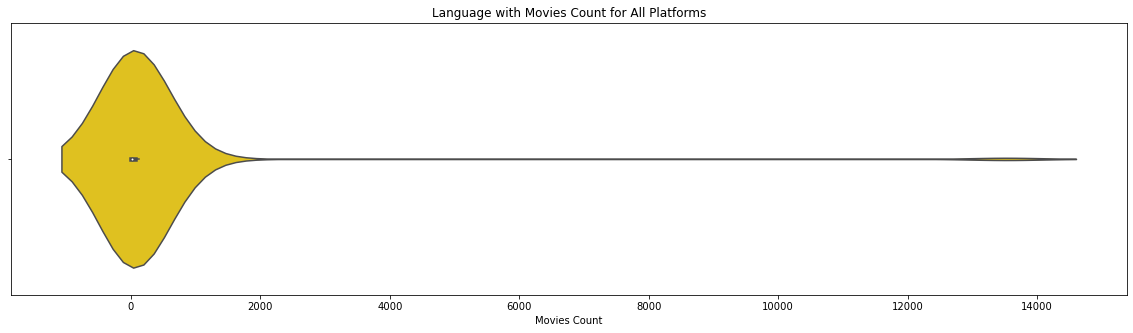

In [ ]:
# Distribution of tvshow rating in each platform
plt.figure(figsize = (20, 5))
plt.title('Language with Movies Count for All Platforms')
sns.violinplot(x = languages_data_movies['Movies Count'][:100], color = 'gold', legend = True, kde = True, shade = False)
plt.show()

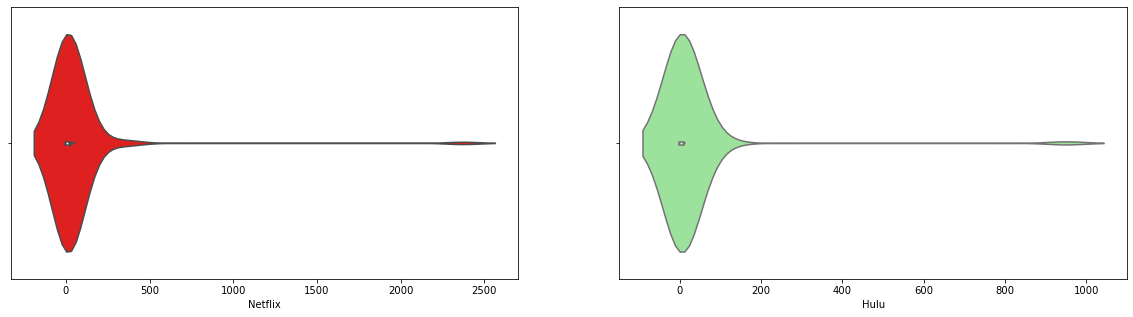

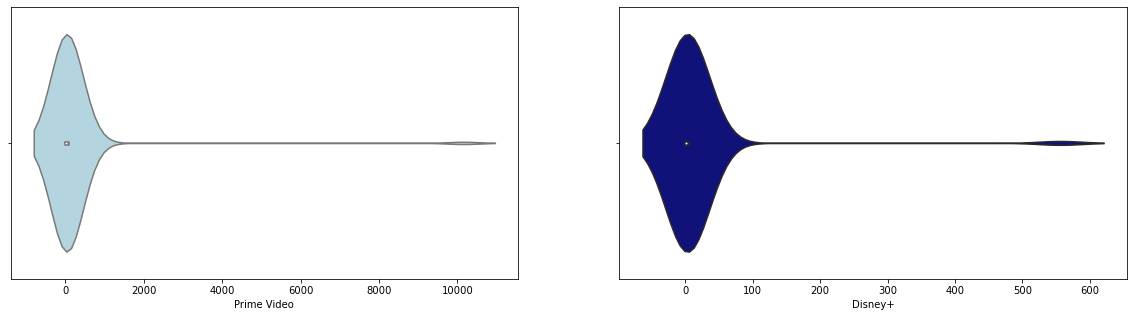

In [ ]:
# Distribution of Language Movies Count in each platform
f1, ax1 = plt.subplots(1, 2 , figsize = (20, 5))
sns.violinplot(x = netflix_languages_movies['Netflix'][:100], color = 'red', ax = ax1[0])
sns.violinplot(x = hulu_languages_movies['Hulu'][:100], color = 'lightgreen', ax = ax1[1])
 
f2, ax2 = plt.subplots(1, 2 , figsize = (20, 5))
sns.violinplot(x = prime_video_languages_movies['Prime Video'][:100], color = 'lightblue', ax = ax2[0])
sns.violinplot(x = disney_languages_movies['Disney+'][:100], color = 'darkblue', ax = ax2[1])
plt.show()

In [ ]:
print(f'''
      Accross All Platforms the Average Movies Count of Language is '{round(languages_data_movies['Movies Count'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Language on 'Netflix' is '{round(netflix_languages_movies['Netflix'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Language on 'Hulu' is '{round(hulu_languages_movies['Hulu'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Language on 'Prime Video' is '{round(prime_video_languages_movies['Prime Video'].mean(), ndigits = 2)}'\n
      The Average Movies Count of Language on 'Disney+' is '{round(disney_languages_movies['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Movies Count of Language is '115.41'

      The Average Movies Count of Language on 'Netflix' is '40.8'

      The Average Movies Count of Language on 'Hulu' is '20.52'

      The Average Movies Count of Language on 'Prime Video' is '95.85'

      The Average Movies Count of Language on 'Disney+' is '12.81'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Language is '{languages_data_movies['Language'].unique().shape[0]}'\n
      Total Count of Language on 'Netflix' is '{netflix_languages_movies['Language'].unique().shape[0]}'\n
      Total Count of Language on 'Hulu' is '{hulu_languages_movies['Language'].unique().shape[0]}'\n
      Total Count of Language on 'Prime Video' is '{prime_video_languages_movies['Language'].unique().shape[0]}'\n
      Total Count of Language on 'Disney+' is '{disney_languages_movies['Language'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Language is '183'

      Total Count of Language on 'Netflix' is '120'

      Total Count of Language on 'Hulu' is '75'

      Total Count of Language on 'Prime Video' is '155'

      Total Count of Language on 'Disney+' is '58'
 
      


In [ ]:
fig = px.bar(x = languages_data_movies['Language'][:50], y = languages_data_movies['Movies Count'][:50], 
             color = languages_data_movies['Movies Count'][:50], color_continuous_scale = 'Teal_r', 
             labels = { 'x' : 'Language', 'y' : 'Number of Movies'})
fig.show()

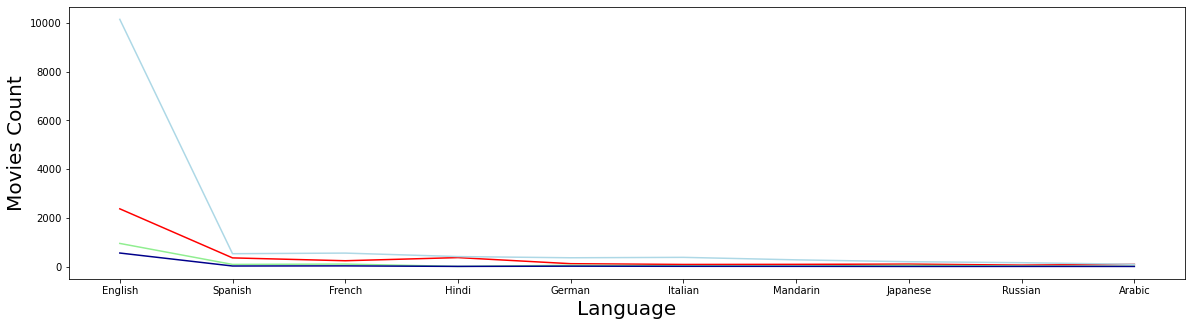

In [ ]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = languages_data_movies['Language'][:10], y = languages_data_movies['Netflix'][:10], color = 'red')
sns.lineplot(x = languages_data_movies['Language'][:10], y = languages_data_movies['Hulu'][:10], color = 'lightgreen')
sns.lineplot(x = languages_data_movies['Language'][:10], y = languages_data_movies['Prime Video'][:10], color = 'lightblue')
sns.lineplot(x = languages_data_movies['Language'][:10], y = languages_data_movies['Disney+'][:10], color = 'darkblue')
plt.xlabel('Language', fontsize = 20)
plt.ylabel('Movies Count', fontsize = 20)
plt.show()

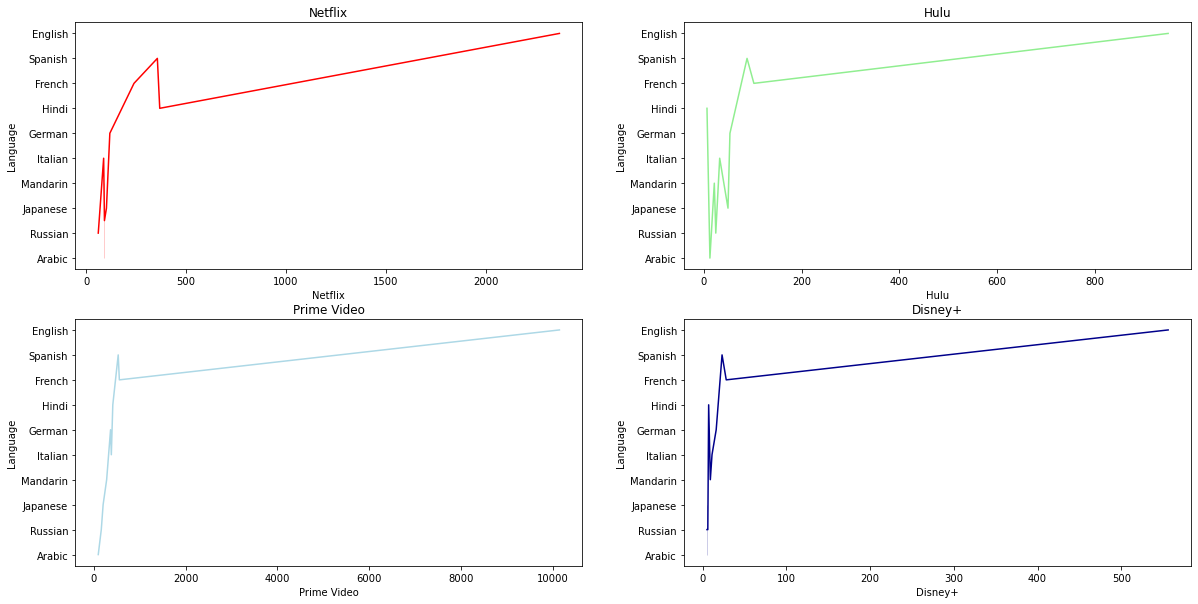

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 10))
 
n_l_ax1 = sns.lineplot(y = languages_data_movies['Language'][:10], x = languages_data_movies['Netflix'][:10], color = 'red', ax = axes[0, 0])
h_l_ax2 = sns.lineplot(y = languages_data_movies['Language'][:10], x = languages_data_movies['Hulu'][:10], color = 'lightgreen', ax = axes[0, 1])
p_l_ax3 = sns.lineplot(y = languages_data_movies['Language'][:10], x = languages_data_movies['Prime Video'][:10], color = 'lightblue', ax = axes[1, 0])
d_l_ax4 = sns.lineplot(y = languages_data_movies['Language'][:10], x = languages_data_movies['Disney+'][:10], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_l_ax1.title.set_text(labels[0])
h_l_ax2.title.set_text(labels[1])
p_l_ax3.title.set_text(labels[2])
d_l_ax4.title.set_text(labels[3])
 
plt.show()

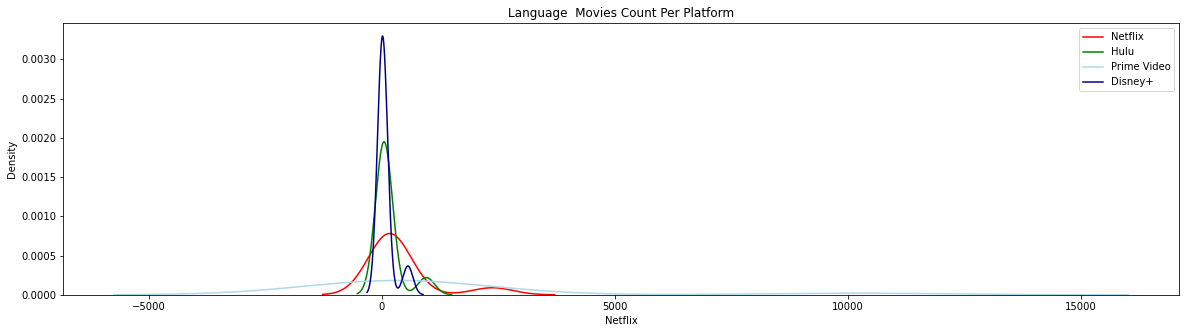

In [ ]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Language  Movies Count Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.kdeplot(netflix_languages_movies['Netflix'][:10], color = 'red', legend = True)
sns.kdeplot(hulu_languages_movies['Hulu'][:10], color = 'green', legend = True)
sns.kdeplot(prime_video_languages_movies['Prime Video'][:10], color = 'lightblue', legend = True)
sns.kdeplot(disney_languages_movies['Disney+'][:10], color = 'darkblue', legend = True)                                      
                                      
# Setting the legend
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'])
plt.show()

In [ ]:
df_movies_plotlines = df_movies.copy()

In [ ]:
df_movies_plotlines.drop(df_movies_plotlines.loc[df_movies_plotlines['Plotline'] == "NA"].index, inplace = True)
# df_movies_plotlines = df_movies_plotlines[df_movies_plotlines.Plotline != "NA"]

In [ ]:
# Creating distinct dataframes only with the movies present on individual streaming platforms
netflix_plotlines_movies = df_movies_plotlines.loc[df_movies_plotlines['Netflix'] == 1]
hulu_plotlines_movies = df_movies_plotlines.loc[df_movies_plotlines['Hulu'] == 1]
prime_video_plotlines_movies = df_movies_plotlines.loc[df_movies_plotlines['Prime Video'] == 1]
disney_plotlines_movies = df_movies_plotlines.loc[df_movies_plotlines['Disney+'] == 1]

In [ ]:
df_movies_plotlines = df_movies_plotlines['Plotline']
plotline_movies_w = " ".join(df_movies_plotlines)

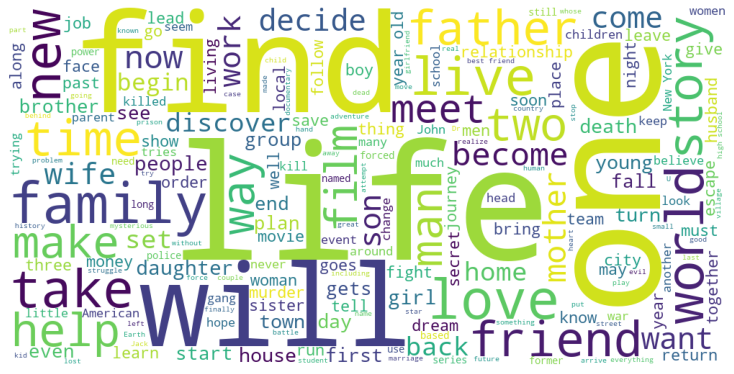

In [ ]:
from wordcloud import WordCloud, STOPWORDS
 
stopwords = set(STOPWORDS)
 
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(plotline_movies_w)
  
# plot the WordCloud image                       
plt.figure(figsize = (10, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [ ]:
df_movies_runtimes = df_movies.copy()

In [ ]:
df_movies_runtimes.drop(df_movies_runtimes.loc[df_movies_runtimes['Runtime'] == "NA"].index, inplace = True)
# df_movies_runtimes = df_movies_runtimes[df_movies_runtimes.Runtime != "NA"]
df_movies_runtimes['Runtime'] = df_movies_runtimes['Runtime'].astype(int)

In [ ]:
df_runtimes_high_movies = df_movies_runtimes.sort_values(by = 'Runtime', ascending = False).reset_index()
df_runtimes_high_movies = df_runtimes_high_movies.drop(['index'], axis = 1)
# filter = (df_movies_runtimes['Runtime'] == (df_movies_runtimes['Runtime'].max()))
# df_runtimes_high_movies = df_movies_runtimes[filter]
 
# highest_rated_tvshow = df_movies_runtimes.loc[df_movies_runtimes['Runtime'].idxmax()]
 
print('\nMovies with Highest Ever Runtime  are : \n')
df_runtimes_high_movies.head(5)


Movies with Highest Ever Runtime  are : 



ID                                              Title  Year Age IMDb  \
0  16741                        The Remarkable 20th Century  2004  NR  7.8   
1  16720  The Ultimate Civil War Series: 150th Anniversa...  2012  NR  6.9   
2  12686                                Custer's Last Stand  1936  NR  4.7   
3   3755                                               Dina  2017  13  6.8   
4   5520                       The Greatest Story Ever Told  1965   0  6.6   

  Rotten Tomatoes                                 Directors  \
0              NA              Scott Popjes,Steven Vosburgh   
1              NA                      Kevin R. Hershberger   
2              NA                             Elmer Clifton   
3              98                          Denis Villeneuve   
4              41  George Stevens,David Lean,Jean Negulesco   

                                                Cast  \
0                       Howard K. Smith,Jimmy Hodson   
1  Steve Alexander,Randy Allen,Coby Batty,Scott W...   
2  Rex Lease,Lona Andre,William Farnum,Ruth Mix,J...   
3  Zendaya,Rebecca Ferguson,Jason Momoa,Dave Baut...   
4  Max von Sydow,Michael Anderson Jr.,Carroll Bak...   

                                  Genres                       Country  \
0                            Documentary                 United States   
1   Documentary,Action,Drama,History,War                 United States   
2  Adventure,History,Romance,War,Western                 United States   
3                 Adventure,Drama,Sci-Fi  Canada,Hungary,United States   
4                Biography,Drama,History                 United States   

  Language                                           Plotline  Runtime   Kind  \
0       NA  This four-part series takes an in-depth look a...      600  movie   
1  English                                                 NA      353  movie   
2  English  A cruel and ruthless bandit kills a tavern own...      328  movie   
3  English  A mythic and emotionally charged hero's journe...      265  movie   
4  English  At 30, Patrick O'Brien was TransFatty, a New Y...      260  movie   

   Netflix  Hulu  Prime Video  Disney+  Type Service Provider  
0        0     0            1        0     0      Prime Video  
1        0     0            1        0     0      Prime Video  
2        0     0            1        0     0      Prime Video  
3        0     1            0        0     0             Hulu  
4        0     0            1        0     0      Prime Video

In [ ]:
df_runtimes_low_movies = df_movies_runtimes.sort_values(by = 'Runtime', ascending = True).reset_index()
df_runtimes_low_movies = df_runtimes_low_movies.drop(['index'], axis = 1)
# filter = (df_movies_runtimes['Runtime'] == (df_movies_runtimes['Runtime'].min()))
# df_runtimes_low_movies = df_movies_runtimes[filter]
 
print('\nMovies with Lowest Ever Runtime  are : \n')
df_runtimes_low_movies.head(5)


Movies with Lowest Ever Runtime  are : 



ID            Title  Year Age IMDb Rotten Tomatoes         Directors  \
0  13905     Thanksgiving  2014  NR  7.7             100          Eli Roth   
1  15583  Jurassic Africa  2018  NR  6.6              NA                NA   
2  15971         Luxo Jr.  1986   0  7.3              NA     John Lasseter   
3  14728        #LoveSwag  2015  13  4.4              NA    Austin Davoren   
4  16572  A Brief History  2016  NR  7.5              NA  Ion Popescu-Gopo   

                                                Cast  \
0  Mark Bakunas,Vendula Bednarova,Chris Briggs,Da...   
1       Rick Carter,Gerald R. Molen,Steven Spielberg   
2                                                 NA   
3     Giovanni Watson,Yaritza Betancourt,Shaun Royer   
4                                                 NA   

                       Genres        Country  Language  \
0         Short,Comedy,Horror  United States   English   
1                       Short  United States   English   
2      Animation,Short,Family  United States      None   
3  Short,Comedy,Drama,Romance  United States   English   
4             Animation,Short        Romania  Romanian   

                                            Plotline  Runtime   Kind  Netflix  \
0  Anthony Dexter---bare-chested most of the film...        2  movie        0   
1  Baseball Hall of Famer Reggie Jackson provides...        2  movie        0   
2  Alameda Slim (Randy Quaid), a wanted cattle ru...        2  movie        0   
3  Dead bodies are being found in the New York ha...        2  movie        0   
4  Three-part series, Around the Way, celebrates ...        3  movie        0   

   Hulu  Prime Video  Disney+  Type Service Provider  
0     0            1        0     0      Prime Video  
1     0            1        0     0      Prime Video  
2     0            0        1     0          Disney+  
3     0            1        0     0      Prime Video  
4     1            0        0     0             Hulu

In [ ]:
print(f'''
      Total '{df_movies_runtimes['Runtime'].unique().shape[0]}' unique Runtime s were Given, They were Like this,\n
      
{df_movies_runtimes.sort_values(by = 'Runtime', ascending = False)['Runtime'].unique()}\n
 
      The Highest Ever Runtime Ever Any TV Show Got is '{df_runtimes_high_movies['Title'][0]}' : '{df_runtimes_high_movies['Runtime'].max()}'\n
 
      The Lowest Ever Runtime Ever Any TV Show Got is '{df_runtimes_low_movies['Title'][0]}' : '{df_runtimes_low_movies['Runtime'].min()}'\n
      ''')


      Total '220' unique Runtime s were Given, They were Like this,

      
[600 353 328 265 260 259 258 256 255 242 240 238 233 227 224 220 216 215
 213 212 210 209 206 204 201 200 197 195 194 193 192 191 189 188 187 186
 185 184 183 182 181 180 179 178 177 176 175 174 173 172 171 170 169 168
 167 166 165 164 163 162 161 160 159 158 157 156 155 154 153 152 151 150
 149 148 147 146 145 144 143 142 141 140 139 138 137 136 135 134 133 132
 131 130 129 128 127 126 125 124 123 122 121 120 119 118 117 116 115 114
 113 112 111 110 109 108 107 106 105 104 103 102 101 100  99  98  97  96
  95  94  93  92  91  90  89  88  87  86  85  84  83  82  81  80  79  78
  77  76  75  74  73  72  71  70  69  68  67  66  65  64  63  62  61  60
  59  58  57  56  55  54  53  52  51  50  49  48  47  46  45  44  43  42
  41  40  39  38  37  36  35  34  33  32  31  30  29  28  27  26  25  24
  23  22  21  20  19  18  17  16  15  14  13  12  11  10   9   8   7   6
   5   4   3   2]

 
      The Highest Ever Run

In [ ]:
netflix_runtimes_high_movies = df_runtimes_high_movies.loc[df_runtimes_high_movies['Netflix']==1].reset_index()
netflix_runtimes_high_movies = netflix_runtimes_high_movies.drop(['index'], axis = 1)
 
netflix_runtimes_low_movies = df_runtimes_low_movies.loc[df_runtimes_low_movies['Netflix']==1].reset_index()
netflix_runtimes_low_movies = netflix_runtimes_low_movies.drop(['index'], axis = 1)
 
netflix_runtimes_high_movies.head(5)

ID                              Title  Year Age IMDb Rotten Tomatoes  \
0  2207              The Gospel of Matthew  2014   0  7.7              NA   
1    80  Lagaan: Once Upon a Time in India  2001   7  8.1              95   
2  2248                    Jatt James Bond  2014   7  6.7              NA   
3  2485                 The Gospel of Luke  2015  NR  7.1              NA   
4   368                       Jodhaa Akbar  2008  13  7.6              75   

               Directors                                               Cast  \
0  Regardt van den Bergh  Richard Kiley,Bruce Marchiano,Gerrit Schoonhov...   
1     Ashutosh Gowariker  Aamir Khan,Gracy Singh,Rachel Shelley,Paul Bla...   
2           Rohit Jugraj  Gippy Grewal,Zareen Khan,Gurpreet Ghuggi,Yashp...   
3            David Batty  Selva Rasalingam,Karima Gouit,Mourad Zaoui,El ...   
4     Ashutosh Gowariker  Hrithik Roshan,Aishwarya Rai Bachchan,Sonu Soo...   

                             Genres                               Country  \
0           Biography,Drama,History                          South Africa   
1               Drama,Musical,Sport                  India,United Kingdom   
2                            Comedy                                 India   
3                             Drama  United States,United Kingdom,Morocco   
4  Action,Drama,History,Romance,War                                 India   

          Language                                           Plotline  \
0          English  Matthew 15:1 - 28:20 - The year is about 62 A....   
1    Hindi,English  This is the story about the resilience shown b...   
2          Punjabi                                                 NA   
3  English,Spanish                                                 NA   
4       Hindi,Urdu  Jodhaa Akbar is a sixteenth century love story...   

   Runtime   Kind  Netflix  Hulu  Prime Video  Disney+  Type Service Provider  
0      258  movie        1     0            0        0     0          Netflix  
1      224  movie        1     0            0        0     0          Netflix  
2      220  movie        1     0            0        0     0          Netflix  
3      215  movie        1     0            0        0     0          Netflix  
4      213  movie        1     0            0        0     0          Netflix

In [ ]:
hulu_runtimes_high_movies = df_runtimes_high_movies.loc[df_runtimes_high_movies['Hulu']==1].reset_index()
hulu_runtimes_high_movies = hulu_runtimes_high_movies.drop(['index'], axis = 1)
 
hulu_runtimes_low_movies = df_runtimes_low_movies.loc[df_runtimes_low_movies['Hulu']==1].reset_index()
hulu_runtimes_low_movies = hulu_runtimes_low_movies.drop(['index'], axis = 1)
 
hulu_runtimes_high_movies.head(5)

ID                                     Title  Year Age IMDb  \
0   3755                                      Dina  2017  13  6.8   
1   3977  Dark Shadows: The Haunting of Collinwood  2009   7  7.7   
2   4201           Dark Shadows: The Vampire Curse  2009  NR  7.7   
3   3464                            The Green Mile  1999  16  8.6   
4  16580                                  Fear Box  2018  13  6.2   

  Rotten Tomatoes         Directors  \
0              98  Denis Villeneuve   
1              NA                NA   
2              NA                NA   
3              78    Frank Darabont   
4              NA       Michael Bay   

                                                Cast  \
0  Zendaya,Rebecca Ferguson,Jason Momoa,Dave Baut...   
1  Joan Bennett,Thayer David,Louis Edmonds,Jonath...   
2  Joan Bennett,Thayer David,Louis Edmonds,Jonath...   
3  Tom Hanks,David Morse,Bonnie Hunt,Michael Clar...   
4  Ben Affleck,Josh Hartnett,Kate Beckinsale,Will...   

                             Genres                       Country  \
0            Adventure,Drama,Sci-Fi  Canada,Hungary,United States   
1              Drama,Fantasy,Horror                 United States   
2              Drama,Fantasy,Horror                 United States   
3       Crime,Drama,Fantasy,Mystery                 United States   
4  Action,Drama,History,Romance,War                 United States   

                  Language                                           Plotline  \
0                  English  A mythic and emotionally charged hero's journe...   
1                  English                                                 NA   
2                  English                                                 NA   
3           English,French  Death Row guards at a penitentiary, in the 193...   
4  English,Japanese,French                                                 NA   

   Runtime   Kind  Netflix  Hulu  Prime Video  Disney+  Type Service Provider  
0      265  movie        0     1            0        0     0             Hulu  
1      210  movie        0     1            1        0     0      Prime Video  
2      210  movie        0     1            1        0     0      Prime Video  
3      189  movie        0     1            0        0     0             Hulu  
4      183  movie        0     1            0        0     0             Hulu

In [ ]:
prime_video_runtimes_high_movies = df_runtimes_high_movies.loc[df_runtimes_high_movies['Prime Video']==1].reset_index()
prime_video_runtimes_high_movies = prime_video_runtimes_high_movies.drop(['index'], axis = 1)
 
prime_video_runtimes_low_movies = df_runtimes_low_movies.loc[df_runtimes_low_movies['Prime Video']==1].reset_index()
prime_video_runtimes_low_movies = prime_video_runtimes_low_movies.drop(['index'], axis = 1)
 
prime_video_runtimes_high_movies.head(5)

ID                                              Title  Year Age IMDb  \
0  16741                        The Remarkable 20th Century  2004  NR  7.8   
1  16720  The Ultimate Civil War Series: 150th Anniversa...  2012  NR  6.9   
2  12686                                Custer's Last Stand  1936  NR  4.7   
3   5520                       The Greatest Story Ever Told  1965   0  6.6   
4   4536  Tom Petty and the Heartbreakers: Runnin' Down ...  2007  NR  8.6   

  Rotten Tomatoes                                 Directors  \
0              NA              Scott Popjes,Steven Vosburgh   
1              NA                      Kevin R. Hershberger   
2              NA                             Elmer Clifton   
3              41  George Stevens,David Lean,Jean Negulesco   
4             100                         Peter Bogdanovich   

                                                Cast  \
0                       Howard K. Smith,Jimmy Hodson   
1  Steve Alexander,Randy Allen,Coby Batty,Scott W...   
2  Rex Lease,Lona Andre,William Farnum,Ruth Mix,J...   
3  Max von Sydow,Michael Anderson Jr.,Carroll Bak...   
4  Neil Armstrong,Mick Avory,Ron Blair,Peter Bogd...   

                                  Genres        Country Language  \
0                            Documentary  United States       NA   
1   Documentary,Action,Drama,History,War  United States  English   
2  Adventure,History,Romance,War,Western  United States  English   
3                Biography,Drama,History  United States  English   
4                      Documentary,Music  United States  English   

                                            Plotline  Runtime   Kind  Netflix  \
0  This four-part series takes an in-depth look a...      600  movie        0   
1                                                 NA      353  movie        0   
2  A cruel and ruthless bandit kills a tavern own...      328  movie        0   
3  At 30, Patrick O'Brien was TransFatty, a New Y...      260  movie        0   
4                                                 NA      259  movie        0   

   Hulu  Prime Video  Disney+  Type Service Provider  
0     0            1        0     0      Prime Video  
1     0            1        0     0      Prime Video  
2     0            1        0     0      Prime Video  
3     0            1        0     0      Prime Video  
4     0            1        0     0      Prime Video

In [ ]:
disney_runtimes_high_movies = df_runtimes_high_movies.loc[df_runtimes_high_movies['Disney+']==1].reset_index()
disney_runtimes_high_movies = disney_runtimes_high_movies.drop(['index'], axis = 1)
 
disney_runtimes_low_movies = df_runtimes_low_movies.loc[df_runtimes_low_movies['Disney+']==1].reset_index()
disney_runtimes_low_movies = disney_runtimes_low_movies.drop(['index'], axis = 1)
 
disney_runtimes_high_movies.head(5)

ID                                     Title  Year Age IMDb  \
0  15735                         Avengers: Endgame  2019  13  8.4   
1  15774                        The Sound of Music  1965   0    8   
2  15803  Pirates of the Caribbean: At World's End  2007  13  7.1   
3  15970               Around the World in 80 Days  2004   0  6.8   
4  15793                  Star Wars: The Last Jedi  2017  13    7   

  Rotten Tomatoes                     Directors  \
0              94       Anthony Russo,Joe Russo   
1              83                   Robert Wise   
2              44                Gore Verbinski   
3              32  Michael Anderson,John Farrow   
4              90                  Rian Johnson   

                                                Cast  \
0  Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chr...   
1  Julie Andrews,Christopher Plummer,Eleanor Park...   
2  Johnny Depp,Geoffrey Rush,Orlando Bloom,Keira ...   
3  Cantinflas,Finlay Currie,Robert Morley,Ronald ...   
4  Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ri...   

                                   Genres        Country  \
0           Action,Adventure,Drama,Sci-Fi  United States   
1  Biography,Drama,Family,Musical,Romance  United States   
2                Action,Adventure,Fantasy  United States   
3         Adventure,Comedy,Family,Romance  United States   
4         Action,Adventure,Fantasy,Sci-Fi  United States   

                        Language  \
0  English,Japanese,Xhosa,German   
1                 English,German   
2                        English   
3         English,Spanish,French   
4                        English   

                                            Plotline  Runtime   Kind  Netflix  \
0  An elderly man reads the book "The Princess Br...      181  movie        0   
1  In this animated comedy from the folks at Disn...      172  movie        0   
2  The Good Dinosaur asks the question: What if t...      169  movie        0   
3  Race car driver, Jim Douglas goes to Monte Car...      167  movie        0   
4  While living the quiet life in a swamp, Kermit...      152  movie        0   

   Hulu  Prime Video  Disney+  Type Service Provider  
0     0            0        1     0          Disney+  
1     0            0        1     0          Disney+  
2     0            0        1     0          Disney+  
3     0            0        1     0          Disney+  
4     0            0        1     0          Disney+

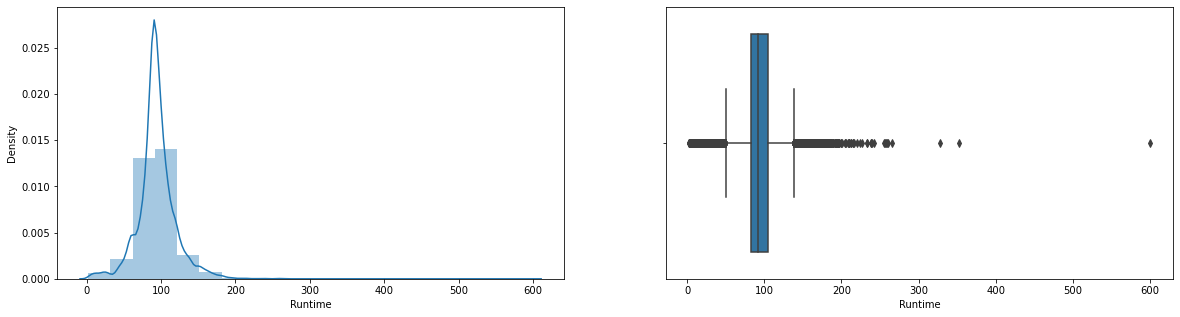

In [ ]:
f, ax = plt.subplots(1, 2 , figsize = (20, 5))
sns.distplot(df_movies_runtimes['Runtime'],bins = 20, kde = True, ax = ax[0])
sns.boxplot(df_movies_runtimes['Runtime'], ax = ax[1])
plt.show()

In [ ]:
# Creating distinct dataframes only with the movies present on individual streaming platforms
netflix_runtimes_movies = df_movies_runtimes.loc[df_movies_runtimes['Netflix'] == 1]
hulu_runtimes_movies = df_movies_runtimes.loc[df_movies_runtimes['Hulu'] == 1]
prime_video_runtimes_movies = df_movies_runtimes.loc[df_movies_runtimes['Prime Video'] == 1]
disney_runtimes_movies = df_movies_runtimes.loc[df_movies_runtimes['Disney+'] == 1]

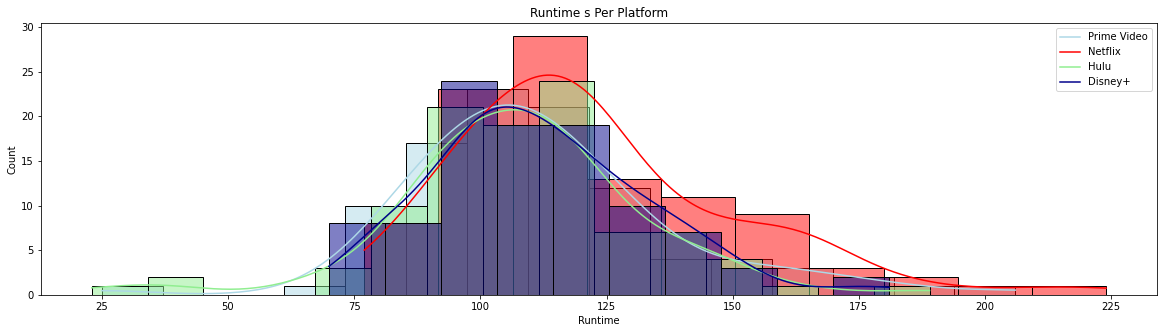

In [ ]:
# Defining plot size and title
plt.figure(figsize = (20, 5))
plt.title('Runtime s Per Platform')
 
# Plotting the information from each dataset into a histogram
sns.histplot(prime_video_runtimes_movies['Runtime'][:100], color = 'lightblue', legend = True, kde = True)
sns.histplot(netflix_runtimes_movies['Runtime'][:100], color = 'red', legend = True, kde = True)
sns.histplot(hulu_runtimes_movies['Runtime'][:100], color = 'lightgreen', legend = True, kde = True)
sns.histplot(disney_runtimes_movies['Runtime'][:100], color = 'darkblue', legend = True, kde = True) 
 
# Setting the legend
plt.legend(['Prime Video', 'Netflix', 'Hulu', 'Disney+'])
plt.show()

In [ ]:
print(f'''
      The TV Show with Highest Runtime  Ever Got is '{df_runtimes_high_movies['Title'][0]}' : '{df_runtimes_high_movies['Runtime'].max()}'\n
      The TV Show with Lowest Runtime  Ever Got is '{df_runtimes_low_movies['Title'][0]}' : '{df_runtimes_low_movies['Runtime'].min()}'\n
      
      The TV Show with Highest Runtime  on 'Netflix' is '{netflix_runtimes_high_movies['Title'][0]}' : '{netflix_runtimes_high_movies['Runtime'].max()}'\n
      The TV Show with Lowest Runtime  on 'Netflix' is '{netflix_runtimes_low_movies['Title'][0]}' : '{netflix_runtimes_low_movies['Runtime'].min()}'\n
      
      The TV Show with Highest Runtime  on 'Hulu' is '{hulu_runtimes_high_movies['Title'][0]}' : '{hulu_runtimes_high_movies['Runtime'].max()}'\n
      The TV Show with Lowest Runtime  on 'Hulu' is '{hulu_runtimes_low_movies['Title'][0]}' : '{hulu_runtimes_low_movies['Runtime'].min()}'\n
      
      The TV Show with Highest Runtime  on 'Prime Video' is '{prime_video_runtimes_high_movies['Title'][0]}' : '{prime_video_runtimes_high_movies['Runtime'].max()}'\n
      The TV Show with Lowest Runtime  on 'Prime Video' is '{prime_video_runtimes_low_movies['Title'][0]}' : '{prime_video_runtimes_low_movies['Runtime'].min()}'\n
      
      The TV Show with Highest Runtime  on 'Disney+' is '{disney_runtimes_high_movies['Title'][0]}' : '{disney_runtimes_high_movies['Runtime'].max()}'\n
      The TV Show with Lowest Runtime  on 'Disney+' is '{disney_runtimes_low_movies['Title'][0]}' : '{disney_runtimes_low_movies['Runtime'].min()}'\n 
      ''')


      The TV Show with Highest Runtime  Ever Got is 'The Remarkable 20th Century' : '600'

      The TV Show with Lowest Runtime  Ever Got is 'Thanksgiving' : '2'

      
      The TV Show with Highest Runtime  on 'Netflix' is 'The Gospel of Matthew' : '258'

      The TV Show with Lowest Runtime  on 'Netflix' is 'Silent' : '3'

      
      The TV Show with Highest Runtime  on 'Hulu' is 'Dina' : '265'

      The TV Show with Lowest Runtime  on 'Hulu' is 'A Brief History' : '3'

      
      The TV Show with Highest Runtime  on 'Prime Video' is 'The Remarkable 20th Century' : '600'

      The TV Show with Lowest Runtime  on 'Prime Video' is 'Thanksgiving' : '2'

      
      The TV Show with Highest Runtime  on 'Disney+' is 'Avengers: Endgame' : '181'

      The TV Show with Lowest Runtime  on 'Disney+' is 'Luxo Jr.' : '2'
 
      


In [ ]:
print(f'''
      Accross All Platforms the Average Runtime  is '{round(df_movies_runtimes['Runtime'].mean(), ndigits = 2)}'\n
      The Average Runtime  on 'Netflix' is '{round(netflix_runtimes_movies['Runtime'].mean(), ndigits = 2)}'\n
      The Average Runtime  on 'Hulu' is '{round(hulu_runtimes_movies['Runtime'].mean(), ndigits = 2)}'\n
      The Average Runtime  on 'Prime Video' is '{round(prime_video_runtimes_movies['Runtime'].mean(), ndigits = 2)}'\n
      The Average Runtime  on 'Disney+' is '{round(disney_runtimes_movies['Runtime'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Average Runtime  is '94.08'

      The Average Runtime  on 'Netflix' is '100.04'

      The Average Runtime  on 'Hulu' is '97.49'

      The Average Runtime  on 'Prime Video' is '92.71'

      The Average Runtime  on 'Disney+' is '91.59'
 
      


In [ ]:
def round_val(data):
    if str(data) != 'nan':
        return round(data)
        
def round_fix(data):
    if data in range(0,51):
        # print(data)
        return 50
    if data in range(51,101):
        return 100
    if data in range(101,151):
        return 150
    if data in range(151,201):
        return 200
    if data in range(201,251):
        return 250
    if data in range(251,301):
        return 300
    if data in range(301,351):
        return 350
    if data in range(351,401):
        return 400
    if data in range(401,451):
        return 450
    if data in range(451,501):
        return 500
    if data in range(501,551):
        return 550
    if data in range(551,601):
        return 600
    if data in range(601,651):
        return 650
    if data in range(651,701):
        return 700
    if data in range(701,751):
        return 750
    if data in range(751,801):
        return 800
    if data in range(801,851):
        return 850
    if data in range(851,901):
        return 900
    if data in range(901,951):
        return 950
    if data in range(951,1001):
        return 1000
    if data in range(1001,1051):
        return 1050
    if data in range(1051,1101):
        return 1100
    if data in range(1101,1151):
        return 1150
    if data in range(1151,1201):
        return 1200
    if data in range(1201,1251):
        return 1250
    if data in range(1251,1301):
        return 1300
    if data in range(1301,1351):
        return 1350
    if data in range(1351,2001):
        return 2000
    
df_movies_runtimes['Runtime Group'] = df_movies_runtimes['Runtime'].apply(round_fix)
 
runtimes_values = df_movies_runtimes['Runtime Group'].value_counts().sort_index(ascending = False).tolist()
runtimes_index = df_movies_runtimes['Runtime Group'].value_counts().sort_index(ascending = False).index
 
runtimes_values, runtimes_index

([1, 1, 1, 6, 24, 444, 4641, 10787, 636],
 Int64Index([600, 400, 350, 300, 250, 200, 150, 100, 50], dtype='int64'))

In [ ]:
runtimes_group_count = df_movies_runtimes.groupby('Runtime Group')['Title'].count()
runtimes_group_tvshow = df_movies_runtimes.groupby('Runtime Group')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
runtimes_group_data_movies = pd.concat([runtimes_group_count, runtimes_group_tvshow], axis = 1).reset_index().rename(columns = {'Title' : 'Movies Count'})
runtimes_group_data_movies = runtimes_group_data_movies.sort_values(by = 'Movies Count', ascending = False)

In [ ]:
# Runtime Group with Movies Counts - All Platforms Combined
runtimes_group_data_movies.sort_values(by = 'Movies Count', ascending = False)

Runtime Group  Movies Count  Netflix  Hulu  Prime Video  Disney+
1            100         10787     1788   616         8328      330
2            150          4641     1415   380         2978      169
0             50           636      144    28          442       46
3            200           444      144    15          311        7
4            250            24        9     2           17        0
5            300             6        1     1            4        0
6            350             1        0     0            1        0
7            400             1        0     0            1        0
8            600             1        0     0            1        0

In [ ]:
runtimes_group_data_movies.sort_values(by = 'Runtime Group', ascending = False)

Runtime Group  Movies Count  Netflix  Hulu  Prime Video  Disney+
8            600             1        0     0            1        0
7            400             1        0     0            1        0
6            350             1        0     0            1        0
5            300             6        1     1            4        0
4            250            24        9     2           17        0
3            200           444      144    15          311        7
2            150          4641     1415   380         2978      169
1            100         10787     1788   616         8328      330
0             50           636      144    28          442       46

In [ ]:
df_runtimes_group_high_movies = runtimes_group_data_movies.sort_values(by = 'Movies Count', ascending = False).reset_index()
df_runtimes_group_high_movies = df_runtimes_group_high_movies.drop(['index'], axis = 1)
# filter = (runtimes_group_data_movies['Movies Count'] ==  (runtimes_group_data_movies['Movies Count'].max()))
# df_runtimes_group_high_movies = runtimes_group_data_movies[filter]
 
# highest_rated_tvshow = runtimes_group_data_movies.loc[runtimes_group_data_movies['Movies Count'].idxmax()]
 
# print('\nRuntime with Highest Ever Movies Count are : All Platforms Combined\n')
# df_runtimes_group_high_movies.head(5)

In [ ]:
df_runtimes_group_low_movies = runtimes_group_data_movies.sort_values(by = 'Movies Count', ascending = True).reset_index()
df_runtimes_group_low_movies = df_runtimes_group_low_movies.drop(['index'], axis = 1)
# filter = (runtimes_group_data_movies['Movies Count'] = =  (runtimes_group_data_movies['Movies Count'].min()))
# df_runtimes_group_low_movies = runtimes_group_data_movies[filter]
 
# print('\nRuntime with Lowest Ever Movies Count are : All Platforms Combined\n')
# df_runtimes_group_low_movies.head(5)

In [ ]:
print(f'''
      Total '{df_movies_runtimes['Runtime Group'].count()}' Titles are available on All Platforms, out of which\n
      You Can Choose to see Movies from Total '{runtimes_group_data_movies['Runtime Group'].unique().shape[0]}' Runtime Group, They were Like this, \n
 
      {runtimes_group_data_movies.sort_values(by = 'Movies Count', ascending = False)['Runtime Group'].unique()} etc. \n
 
      The Runtime Group with Highest Movies Count have '{runtimes_group_data_movies['Movies Count'].max()}' Movies Available is '{df_runtimes_group_high_movies['Runtime Group'][0]}', &\n
      The Runtime Group with Lowest Movies Count have '{runtimes_group_data_movies['Movies Count'].min()}' Movies Available is '{df_runtimes_group_low_movies['Runtime Group'][0]}'
      ''')


      Total '16541' Titles are available on All Platforms, out of which

      You Can Choose to see Movies from Total '9' Runtime Group, They were Like this, 

 
      [100 150  50 200 250 300 350 400 600] etc. 

 
      The Runtime Group with Highest Movies Count have '10787' Movies Available is '100', &

      The Runtime Group with Lowest Movies Count have '1' Movies Available is '350'
      


In [ ]:
fig = px.pie(runtimes_group_data_movies[:10], names = 'Runtime Group', values = 'Movies Count')
fig.update_traces(textinfo = 'percent+label', title = 'Movies Count based on Runtime Group s')
fig.show()

In [ ]:
netflix_runtimes_group_movies = runtimes_group_data_movies[runtimes_group_data_movies['Netflix'] !=  0].sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_runtimes_group_movies = netflix_runtimes_group_movies.drop(['index', 'Hulu', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
netflix_runtimes_group_high_movies = df_runtimes_group_high_movies.sort_values(by = 'Netflix', ascending = False).reset_index()
netflix_runtimes_group_high_movies = netflix_runtimes_group_high_movies.drop(['index'], axis = 1)
 
netflix_runtimes_group_low_movies = df_runtimes_group_high_movies.sort_values(by = 'Netflix', ascending = True).reset_index()
netflix_runtimes_group_low_movies = netflix_runtimes_group_low_movies.drop(['index'], axis = 1)
 
netflix_runtimes_group_high_movies.head(5)

Runtime Group  Movies Count  Netflix  Hulu  Prime Video  Disney+
0            100         10787     1788   616         8328      330
1            150          4641     1415   380         2978      169
2             50           636      144    28          442       46
3            200           444      144    15          311        7
4            250            24        9     2           17        0

In [ ]:
hulu_runtimes_group_movies = runtimes_group_data_movies[runtimes_group_data_movies['Hulu'] !=  0].sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_runtimes_group_movies = hulu_runtimes_group_movies.drop(['index', 'Netflix', 'Prime Video', 'Disney+', 'Movies Count'], axis = 1)
 
hulu_runtimes_group_high_movies = df_runtimes_group_high_movies.sort_values(by = 'Hulu', ascending = False).reset_index()
hulu_runtimes_group_high_movies = hulu_runtimes_group_high_movies.drop(['index'], axis = 1)
 
hulu_runtimes_group_low_movies = df_runtimes_group_high_movies.sort_values(by = 'Hulu', ascending = True).reset_index()
hulu_runtimes_group_low_movies = hulu_runtimes_group_low_movies.drop(['index'], axis = 1)
 
hulu_runtimes_group_high_movies.head(5)

Runtime Group  Movies Count  Netflix  Hulu  Prime Video  Disney+
0            100         10787     1788   616         8328      330
1            150          4641     1415   380         2978      169
2             50           636      144    28          442       46
3            200           444      144    15          311        7
4            250            24        9     2           17        0

In [ ]:
prime_video_runtimes_group_movies = runtimes_group_data_movies[runtimes_group_data_movies['Prime Video'] !=  0].sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_runtimes_group_movies = prime_video_runtimes_group_movies.drop(['index', 'Netflix', 'Hulu', 'Disney+', 'Movies Count'], axis = 1)
 
prime_video_runtimes_group_high_movies = df_runtimes_group_high_movies.sort_values(by = 'Prime Video', ascending = False).reset_index()
prime_video_runtimes_group_high_movies = prime_video_runtimes_group_high_movies.drop(['index'], axis = 1)
 
prime_video_runtimes_group_low_movies = df_runtimes_group_high_movies.sort_values(by = 'Prime Video', ascending = True).reset_index()
prime_video_runtimes_group_low_movies = prime_video_runtimes_group_low_movies.drop(['index'], axis = 1)
 
prime_video_runtimes_group_high_movies.head(5)

Runtime Group  Movies Count  Netflix  Hulu  Prime Video  Disney+
0            100         10787     1788   616         8328      330
1            150          4641     1415   380         2978      169
2             50           636      144    28          442       46
3            200           444      144    15          311        7
4            250            24        9     2           17        0

In [ ]:
disney_runtimes_group_movies = runtimes_group_data_movies[runtimes_group_data_movies['Disney+'] !=  0].sort_values(by = 'Disney+', ascending = False).reset_index()
disney_runtimes_group_movies = disney_runtimes_group_movies.drop(['index', 'Netflix', 'Hulu', 'Prime Video', 'Movies Count'], axis = 1)
 
disney_runtimes_group_high_movies = df_runtimes_group_high_movies.sort_values(by = 'Disney+', ascending = False).reset_index()
disney_runtimes_group_high_movies = disney_runtimes_group_high_movies.drop(['index'], axis = 1)
 
disney_runtimes_group_low_movies = df_runtimes_group_high_movies.sort_values(by = 'Disney+', ascending = True).reset_index()
disney_runtimes_group_low_movies = disney_runtimes_group_low_movies.drop(['index'], axis = 1)
 
disney_runtimes_group_high_movies.head(5)

Runtime Group  Movies Count  Netflix  Hulu  Prime Video  Disney+
0            100         10787     1788   616         8328      330
1            150          4641     1415   380         2978      169
2             50           636      144    28          442       46
3            200           444      144    15          311        7
4            250            24        9     2           17        0

In [ ]:
print(f'''
      The Runtime Group with Highest Movies Count Ever Got is '{df_runtimes_group_high_movies['Runtime Group'][0]}' : '{df_runtimes_group_high_movies['Movies Count'].max()}'\n
      The Runtime Group with Lowest Movies Count Ever Got is '{df_runtimes_group_low_movies['Runtime Group'][0]}' : '{df_runtimes_group_low_movies['Movies Count'].min()}'\n
      
      The Runtime Group with Highest Movies Count on 'Netflix' is '{netflix_runtimes_group_high_movies['Runtime Group'][0]}' : '{netflix_runtimes_group_high_movies['Netflix'].max()}'\n
      The Runtime Group with Lowest Movies Count on 'Netflix' is '{netflix_runtimes_group_low_movies['Runtime Group'][0]}' : '{netflix_runtimes_group_low_movies['Netflix'].min()}'\n
      
      The Runtime Group with Highest Movies Count on 'Hulu' is '{hulu_runtimes_group_high_movies['Runtime Group'][0]}' : '{hulu_runtimes_group_high_movies['Hulu'].max()}'\n
      The Runtime Group with Lowest Movies Count on 'Hulu' is '{hulu_runtimes_group_low_movies['Runtime Group'][0]}' : '{hulu_runtimes_group_low_movies['Hulu'].min()}'\n
      
      The Runtime Group with Highest Movies Count on 'Prime Video' is '{prime_video_runtimes_group_high_movies['Runtime Group'][0]}' : '{prime_video_runtimes_group_high_movies['Prime Video'].max()}'\n
      The Runtime Group with Lowest Movies Count on 'Prime Video' is '{prime_video_runtimes_group_low_movies['Runtime Group'][0]}' : '{prime_video_runtimes_group_low_movies['Prime Video'].min()}'\n
      
      The Runtime Group with Highest Movies Count on 'Disney+' is '{disney_runtimes_group_high_movies['Runtime Group'][0]}' : '{disney_runtimes_group_high_movies['Disney+'].max()}'\n
      The Runtime Group with Lowest Movies Count on 'Disney+' is '{disney_runtimes_group_low_movies['Runtime Group'][0]}' : '{disney_runtimes_group_low_movies['Disney+'].min()}'\n 
      ''')


      The Runtime Group with Highest Movies Count Ever Got is '100' : '10787'

      The Runtime Group with Lowest Movies Count Ever Got is '350' : '1'

      
      The Runtime Group with Highest Movies Count on 'Netflix' is '100' : '1788'

      The Runtime Group with Lowest Movies Count on 'Netflix' is '350' : '0'

      
      The Runtime Group with Highest Movies Count on 'Hulu' is '100' : '616'

      The Runtime Group with Lowest Movies Count on 'Hulu' is '350' : '0'

      
      The Runtime Group with Highest Movies Count on 'Prime Video' is '100' : '8328'

      The Runtime Group with Lowest Movies Count on 'Prime Video' is '350' : '1'

      
      The Runtime Group with Highest Movies Count on 'Disney+' is '100' : '330'

      The Runtime Group with Lowest Movies Count on 'Disney+' is '250' : '0'
 
      


In [ ]:
print(f'''
      Accross All Platforms the Averruntimes_group Movies Count of Runtime Group is '{round(runtimes_group_data_movies['Movies Count'].mean(), ndigits = 2)}'\n
      The Average runtimes_group Movies Count of Runtime Group on 'Netflix' is '{round(netflix_runtimes_group_movies['Netflix'].mean(), ndigits = 2)}'\n
      The Average runtimes_group Movies Count of Runtime Group on 'Hulu' is '{round(hulu_runtimes_group_movies['Hulu'].mean(), ndigits = 2)}'\n
      The Average runtimes_group Movies Count of Runtime Group on 'Prime Video' is '{round(prime_video_runtimes_group_movies['Prime Video'].mean(), ndigits = 2)}'\n
      The Average runtimes_group Movies Count of Runtime Group on 'Disney+' is '{round(disney_runtimes_group_movies['Disney+'].mean(), ndigits = 2)}'\n 
      ''')


      Accross All Platforms the Averruntimes_group Movies Count of Runtime Group is '1837.89'

      The Average runtimes_group Movies Count of Runtime Group on 'Netflix' is '583.5'

      The Average runtimes_group Movies Count of Runtime Group on 'Hulu' is '173.67'

      The Average runtimes_group Movies Count of Runtime Group on 'Prime Video' is '1342.56'

      The Average runtimes_group Movies Count of Runtime Group on 'Disney+' is '138.0'
 
      


In [ ]:
print(f'''
      Accross All Platforms Total Count of Runtime Group is '{runtimes_group_data_movies['Runtime Group'].unique().shape[0]}'\n
      Total Count of Runtime Group on 'Netflix' is '{netflix_runtimes_group_movies['Runtime Group'].unique().shape[0]}'\n
      Total Count of Runtime Group on 'Hulu' is '{hulu_runtimes_group_movies['Runtime Group'].unique().shape[0]}'\n
      Total Count of Runtime Group on 'Prime Video' is '{prime_video_runtimes_group_movies['Runtime Group'].unique().shape[0]}'\n
      Total Count of Runtime Group on 'Disney+' is '{disney_runtimes_group_movies['Runtime Group'].unique().shape[0]}'\n 
      ''')


      Accross All Platforms Total Count of Runtime Group is '9'

      Total Count of Runtime Group on 'Netflix' is '6'

      Total Count of Runtime Group on 'Hulu' is '6'

      Total Count of Runtime Group on 'Prime Video' is '9'

      Total Count of Runtime Group on 'Disney+' is '4'
 
      


In [ ]:
fig = px.bar(x = runtimes_group_data_movies['Runtime Group'], y = runtimes_group_data_movies['Movies Count'], 
             color = runtimes_group_data_movies['Movies Count'], color_continuous_scale = 'Teal_r', 
             labels = { 'x' : 'Runtime Group', 'y' : 'Number of Movies'})
fig.show()

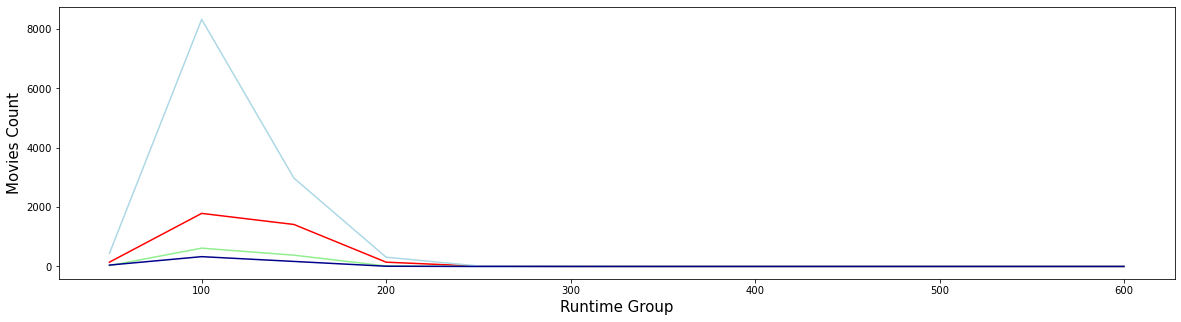

In [ ]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = runtimes_group_data_movies['Runtime Group'], y = runtimes_group_data_movies['Netflix'], color = 'red')
sns.lineplot(x = runtimes_group_data_movies['Runtime Group'], y = runtimes_group_data_movies['Hulu'], color = 'lightgreen')
sns.lineplot(x = runtimes_group_data_movies['Runtime Group'], y = runtimes_group_data_movies['Prime Video'], color = 'lightblue')
sns.lineplot(x = runtimes_group_data_movies['Runtime Group'], y = runtimes_group_data_movies['Disney+'], color = 'darkblue')
plt.xlabel('Runtime Group', fontsize = 15)
plt.ylabel('Movies Count', fontsize = 15)
plt.show()

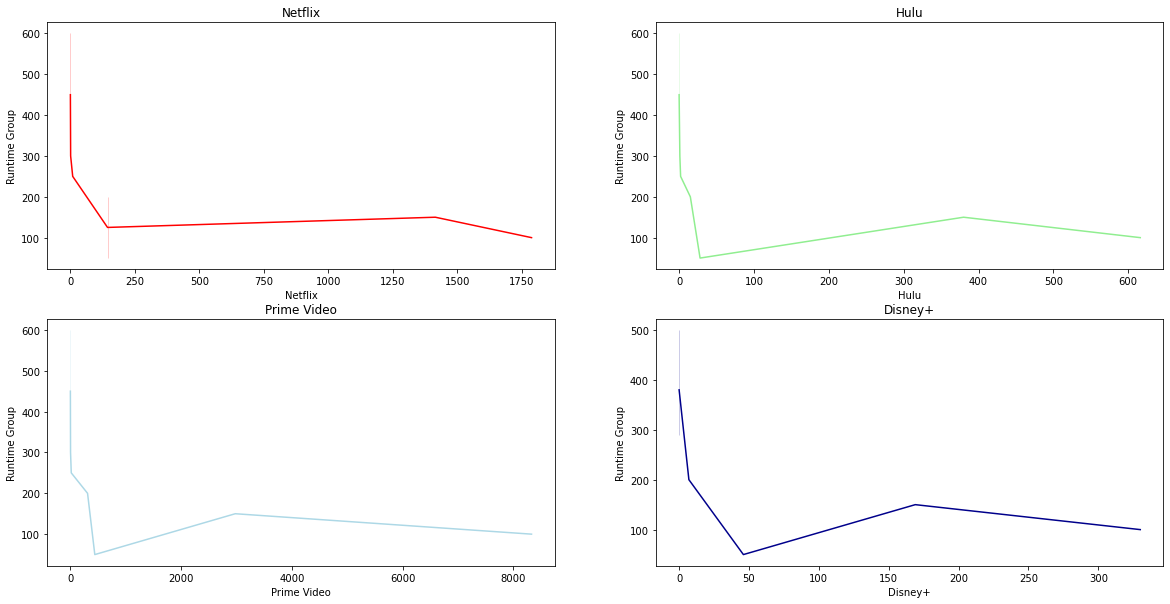

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (20 , 10))
 
n_ru_ax1 = sns.lineplot(y = runtimes_group_data_movies['Runtime Group'], x = runtimes_group_data_movies['Netflix'], color = 'red', ax = axes[0, 0])
h_ru_ax2 = sns.lineplot(y = runtimes_group_data_movies['Runtime Group'], x = runtimes_group_data_movies['Hulu'], color = 'lightgreen', ax = axes[0, 1])
p_ru_ax3 = sns.lineplot(y = runtimes_group_data_movies['Runtime Group'], x = runtimes_group_data_movies['Prime Video'], color = 'lightblue', ax = axes[1, 0])
d_ru_ax4 = sns.lineplot(y = runtimes_group_data_movies['Runtime Group'], x = runtimes_group_data_movies['Disney+'], color = 'darkblue', ax = axes[1, 1])
 
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
 
n_ru_ax1.title.set_text(labels[0])
h_ru_ax2.title.set_text(labels[1])
p_ru_ax3.title.set_text(labels[2])
d_ru_ax4.title.set_text(labels[3])
 
plt.show()